In [1]:
# Generic python packages
import gym
import gym.spaces
import copy
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from matplotlib import animation
from JSAnimation.IPython_display import display_animation
%matplotlib inline

# Customized classes
from skiier import *
from ski_env import *

ImportError: No module named 'JSAnimation'

# Class to run the model and collect data

In [4]:
class Data_Collector(object):
    def __init__(self, model_name, repeat_freq):
        self.ski_env = gym.make("Skiing-v0")
        self.ski_env_w = Env_wrapper(self.ski_env,repeat_freq)
        self.skiier = Skiier(action_space = 3, learning_rate = 0.001, 
                    LAMBDA = 0.5, GAMMA = 0.9, MEMORY_CAPACITY = 25000, repeat_freq = repeat_freq)
        self.skiier.brain.load_model(model_name)
    
    def play_one_episode(self, max_num_steps = 10000):
        images = []
        states = []

        image = self.ski_env.reset()
        images.append(copy.copy(image))
        state = self.ski_env_w.process_state(image)    
        states.append(copy.copy(state))

        for num_step in range(max_num_steps):
            # Take action and get data
            action = self.skiier.act(state)
            image, reward, done, info = self.ski_env.step(action)
            state = self.ski_env_w.process_state(image)

            # Record data
            images.append(copy.copy(image))
            states.append(copy.copy(state))
            if done:
                break
        return [images, states, reward, num_step]
        
    def collect_RL_data(self, num_episodes, 
                        max_num_steps = 10000,
                        output_filename = None):
        history = []
        for episode in range(num_episodes):
            history_t = self.play_one_episode(max_num_steps)
            history.append([episode] + history_t)
            self.skiier.episode = episode
        
        if output_filename is not None:
            np.save(output_filename, np.array(history, dtype=object))
            print("Collected data is saved at {}".format(output_filename))
        else:
            return history

In [5]:
dc = Data_Collector("models/test_run.hdf5")
dc.collect_RL_data(10, output_filename="data/test_history.npy")

Collected data is saved at data/test_history.npy


# Example of replaying the game

In [7]:
def display_frames_as_gif(frames):
    """
    Displays a list of frames as a gif, with controls
    """
    plt.figure(figsize=(frames[0].shape[1] / 36.0, frames[0].shape[0] / 36.0), dpi = 72)
    patch = plt.imshow(frames[0])
    plt.axis('off')

    def animate(i):
        patch.set_data(frames[i])

    anim = animation.FuncAnimation(plt.gcf(), animate, frames = len(frames), interval=50)
    display(display_animation(anim, default_mode='loop'))

#display_frames_as_gif(frames)

In [6]:
history_load = np.load("data/test_history.npy")


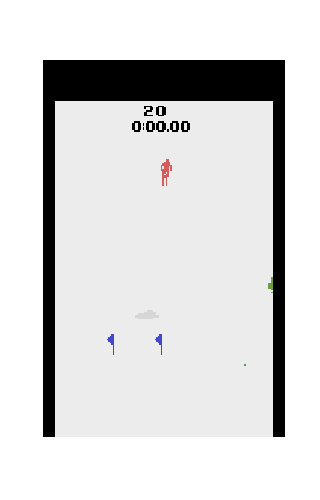
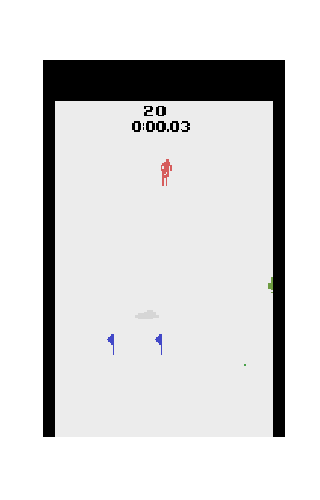
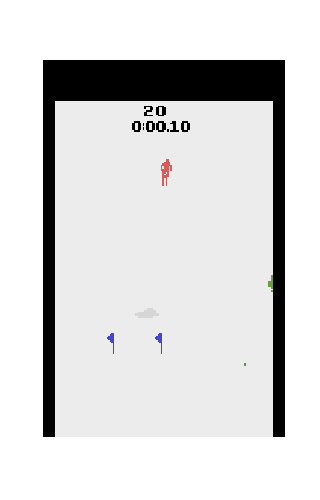
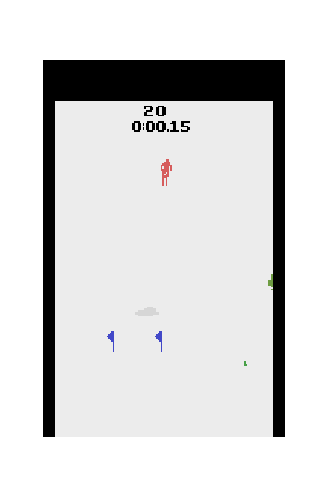
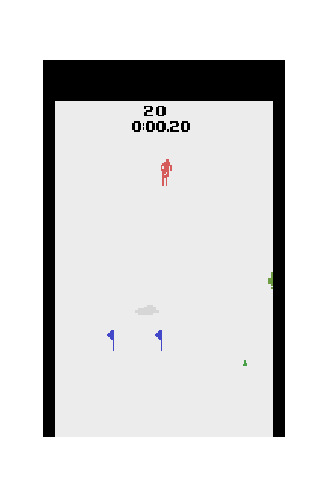
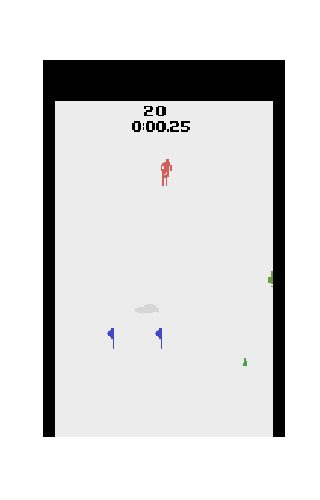
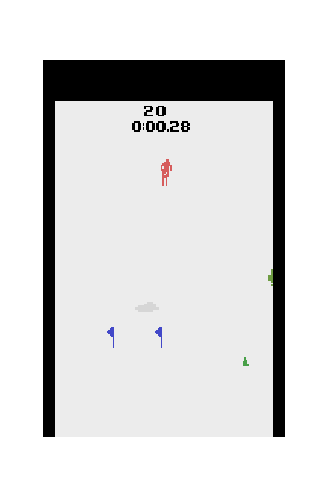
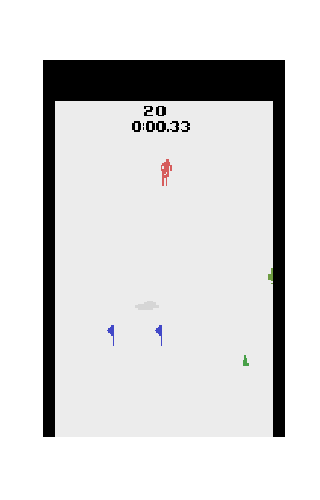
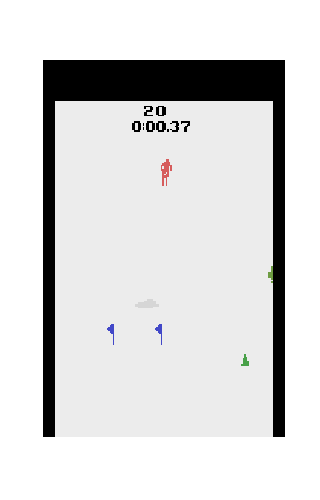
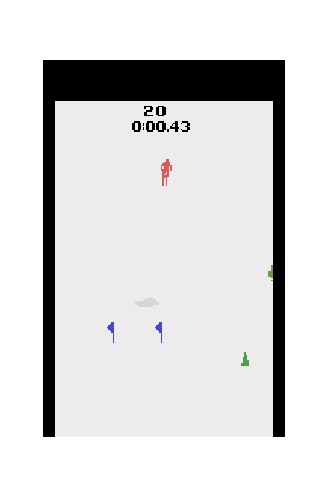
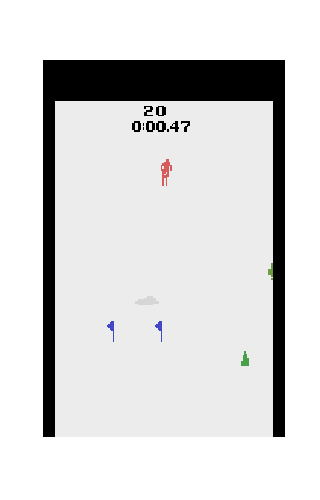
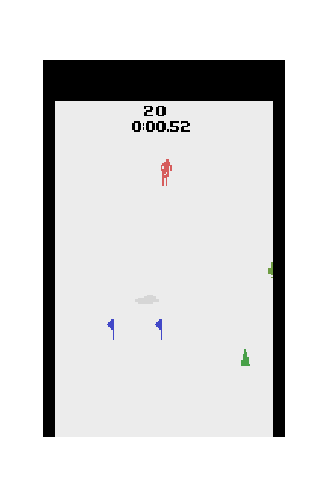
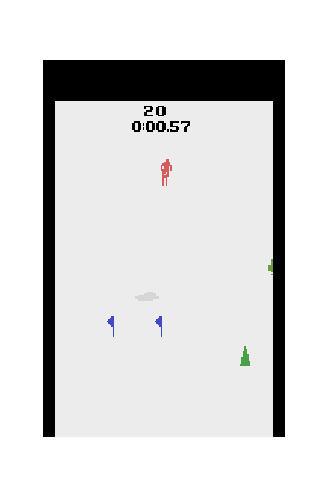
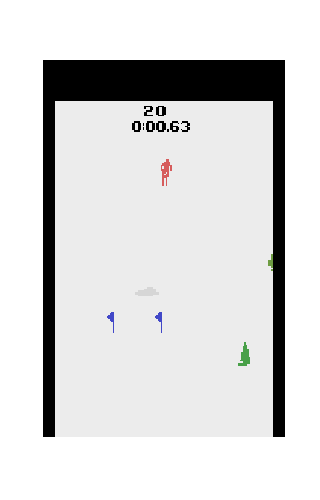
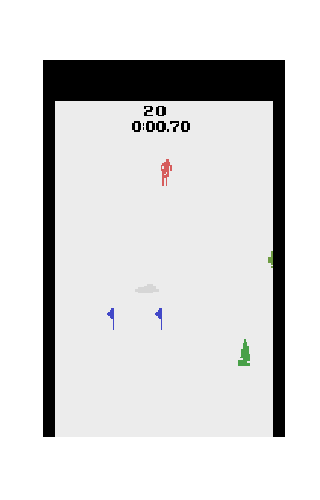
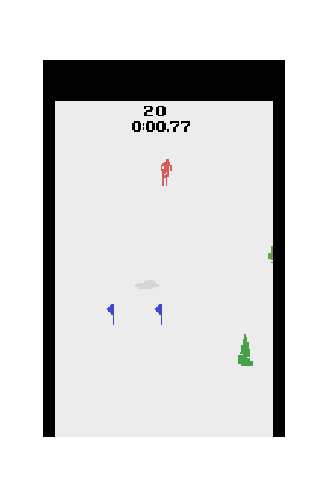
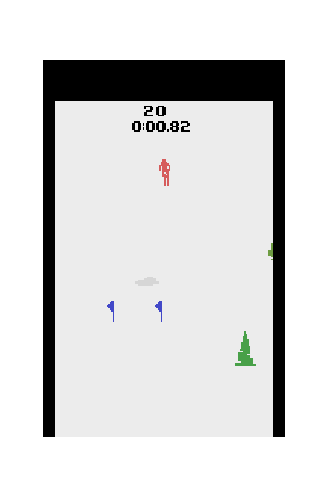
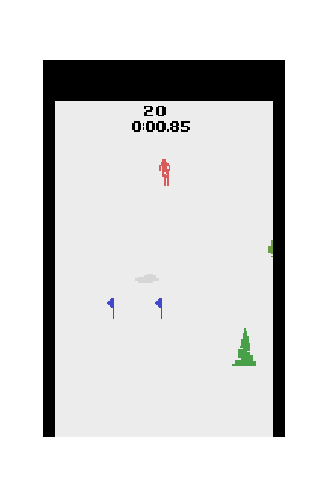
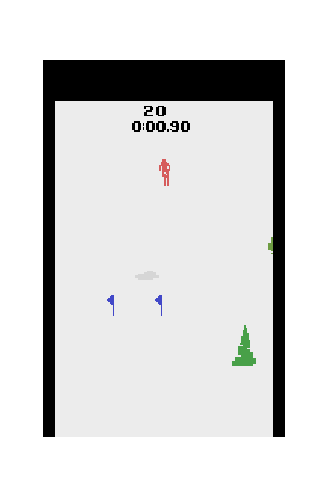
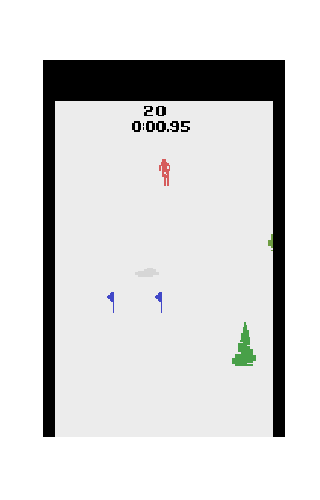
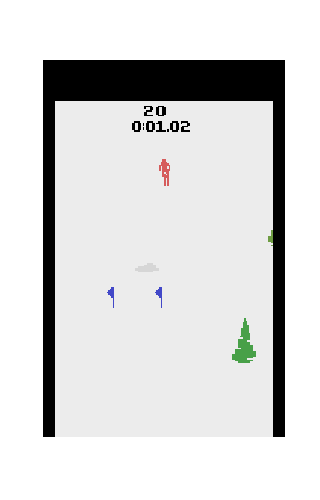
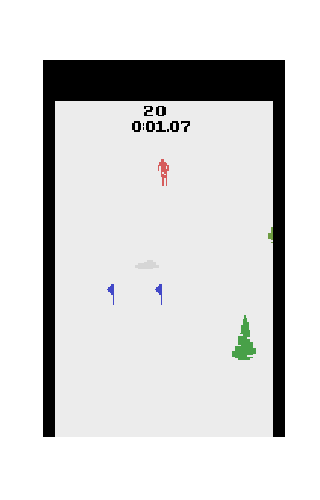
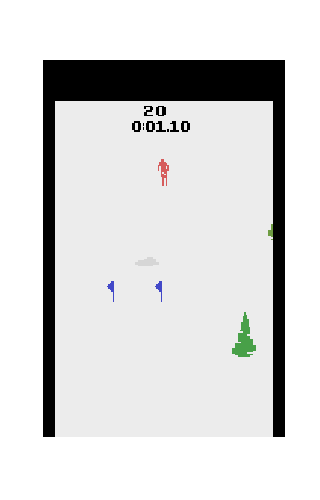
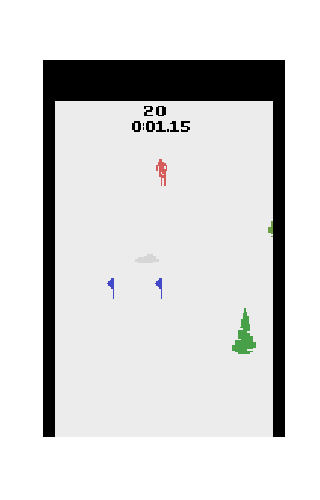
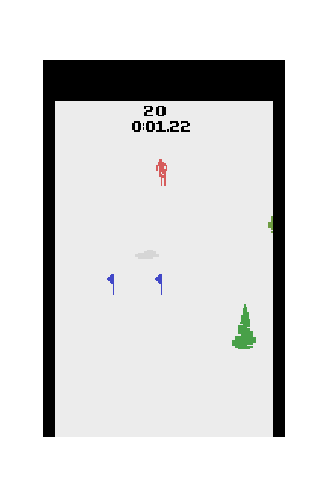
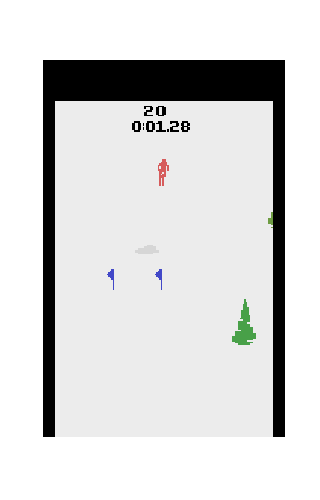
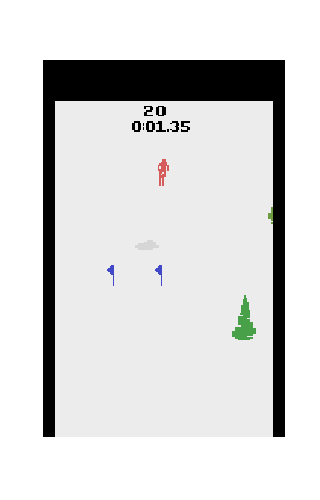
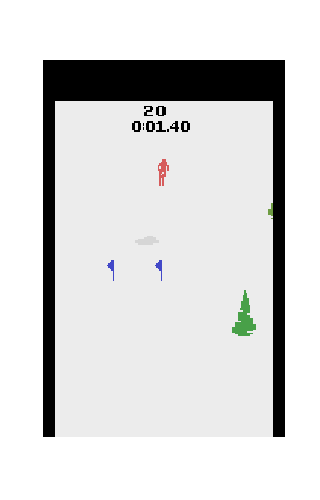
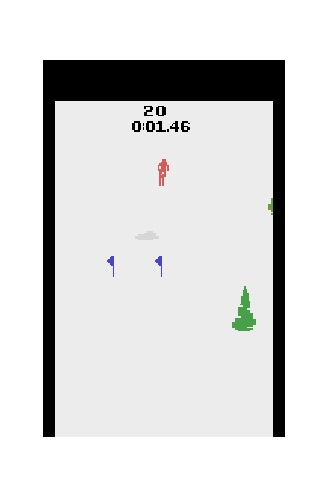
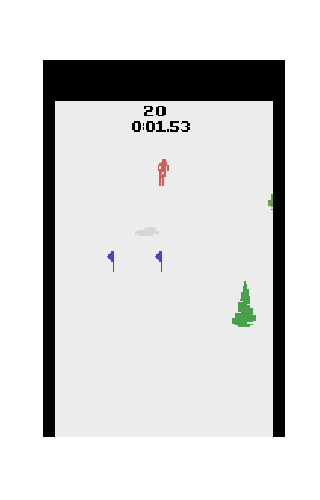
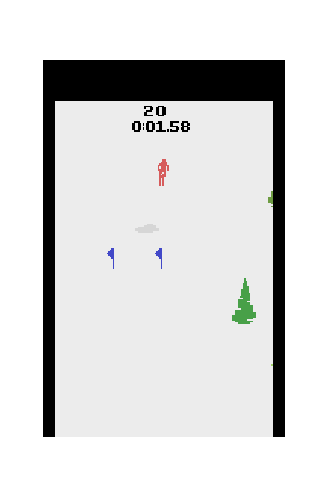
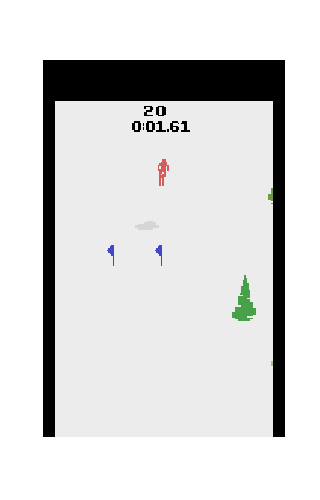
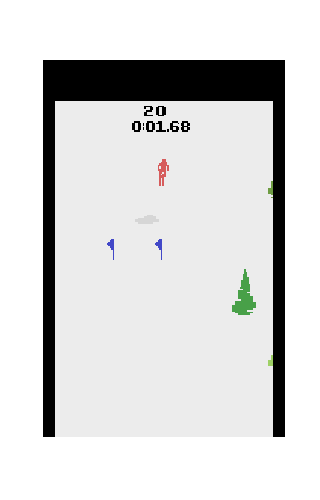
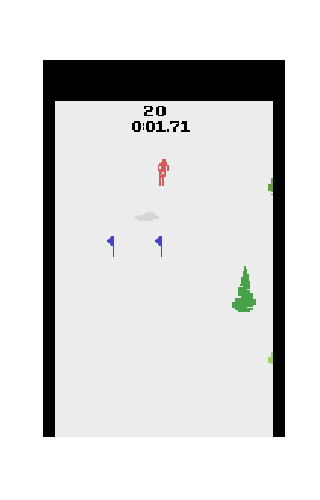
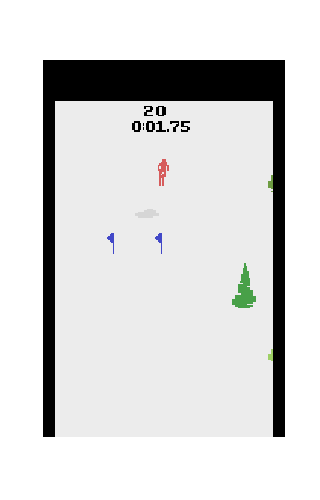
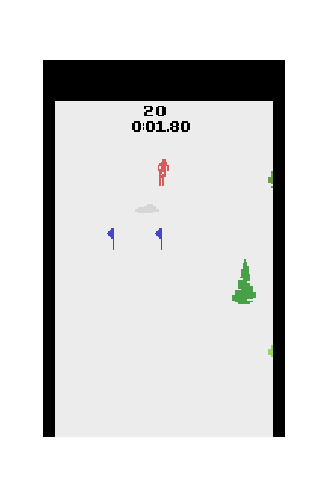
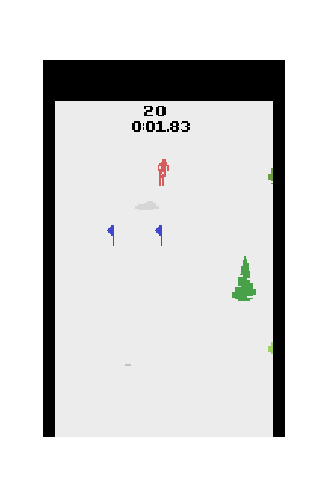
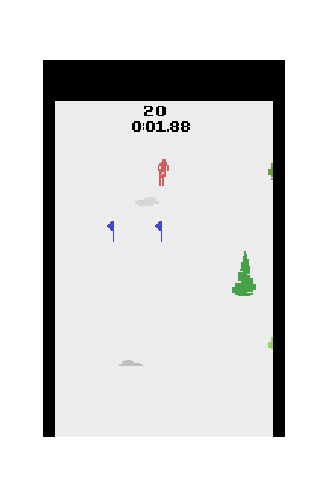
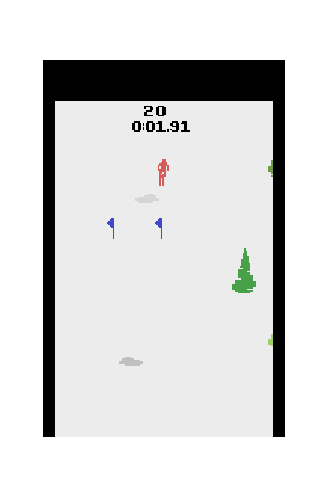
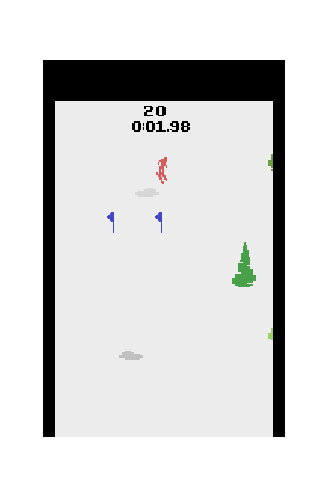
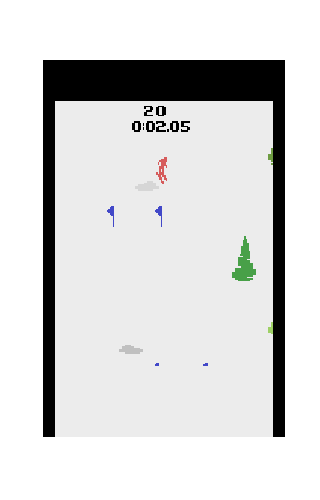
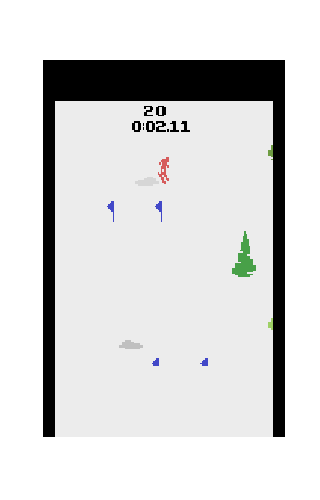
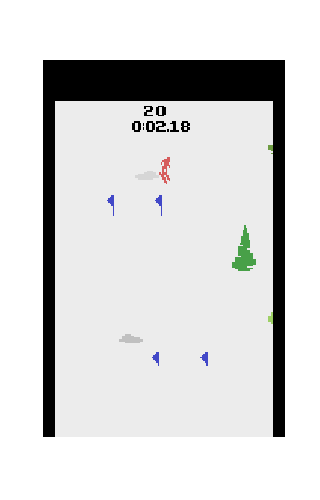
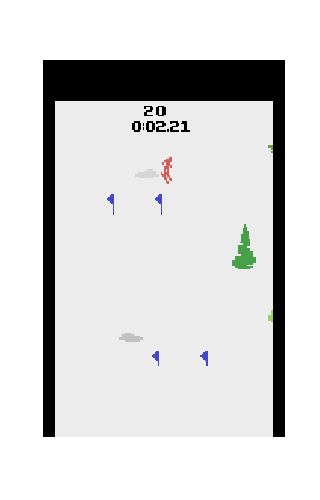
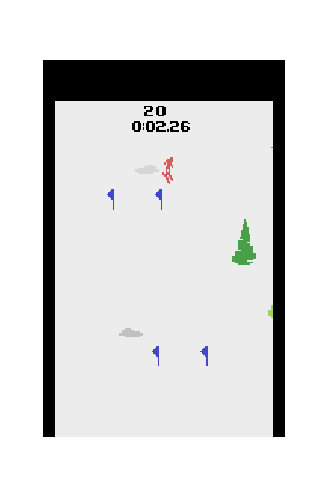
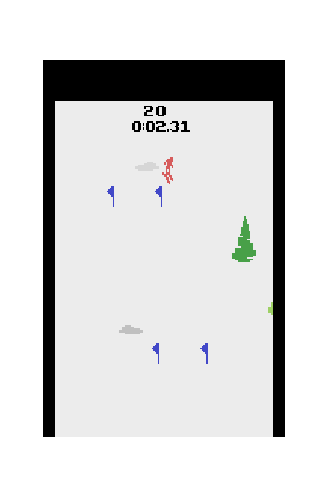
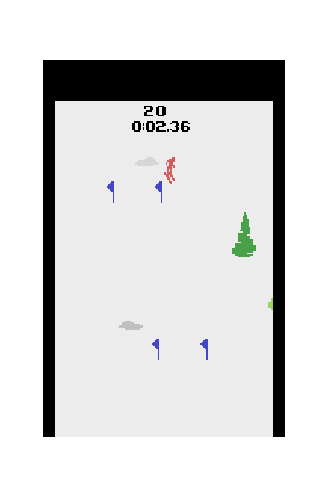
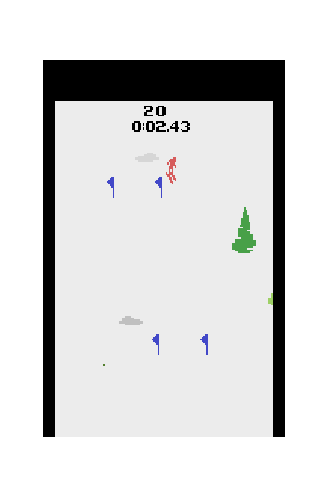
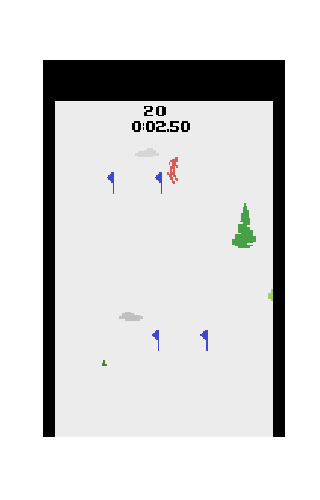
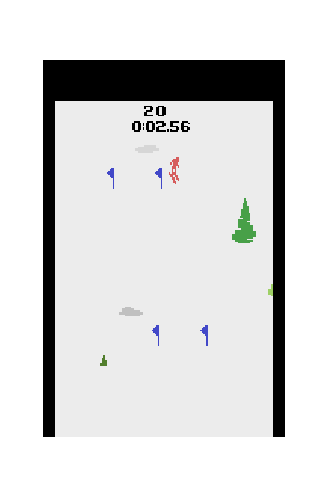
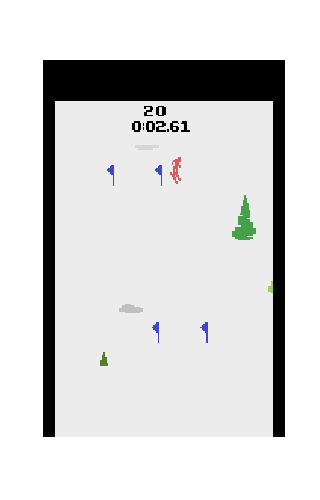
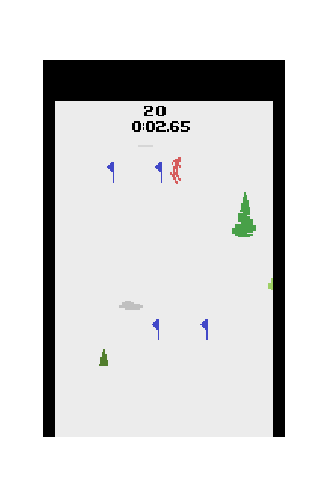
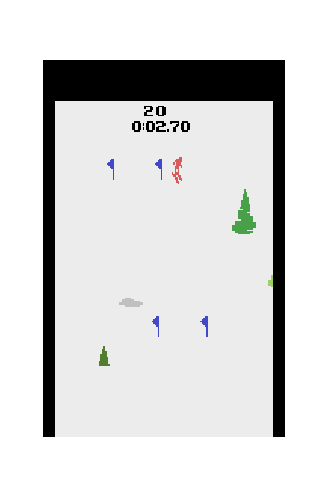
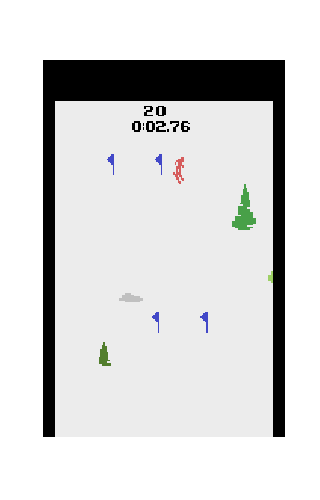
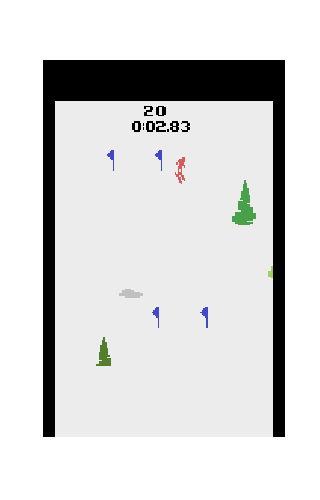
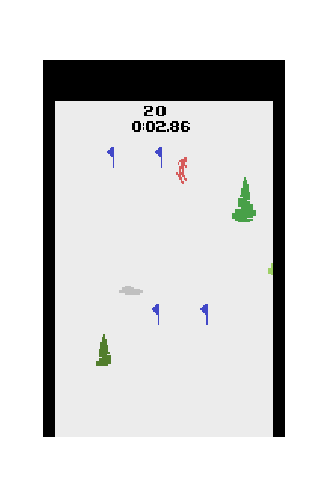
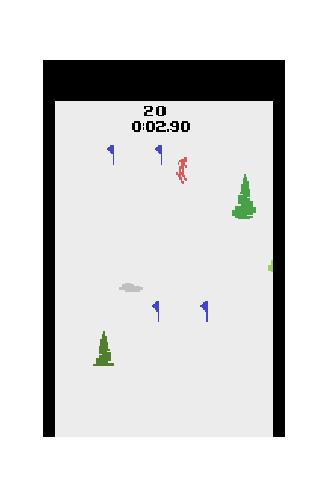
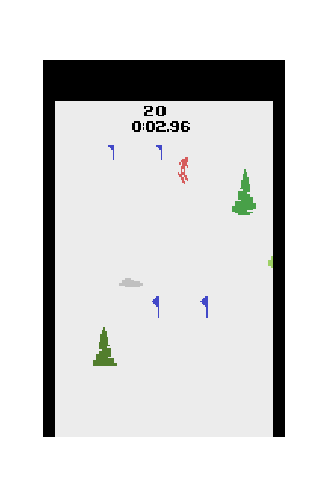
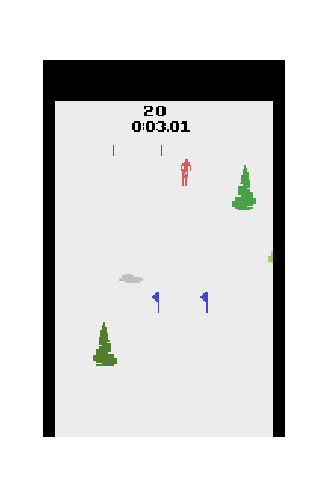
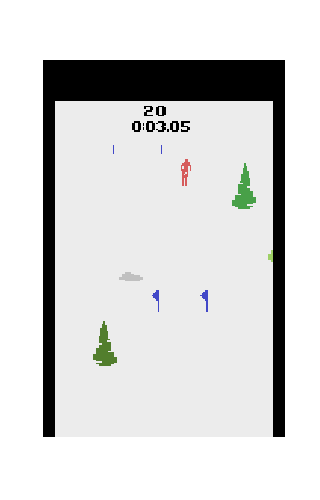
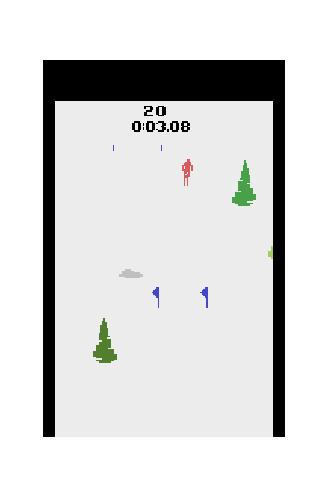
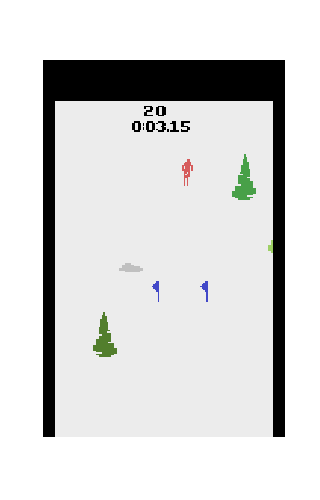
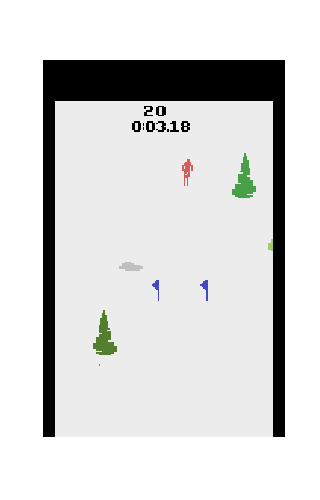
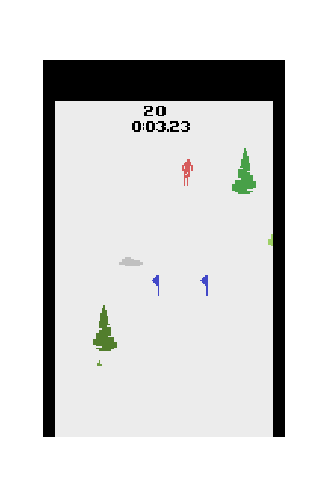
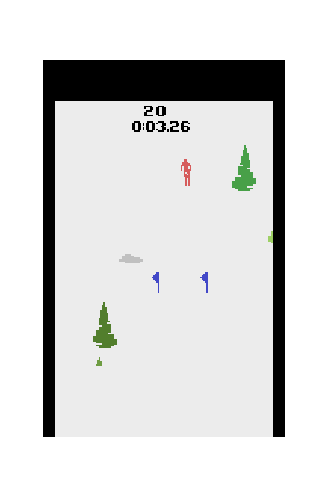
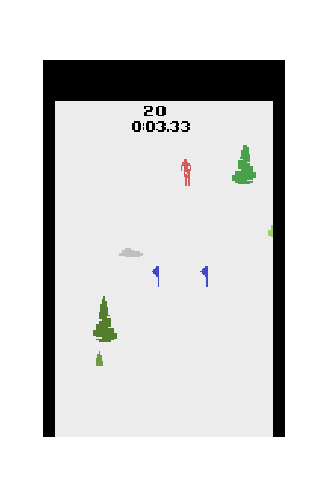
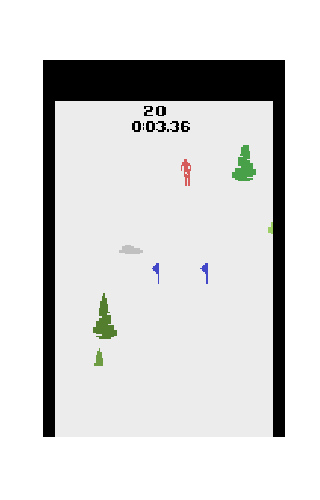
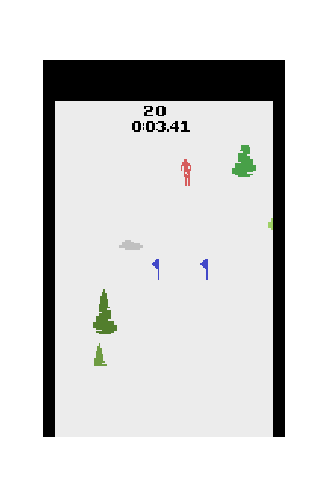
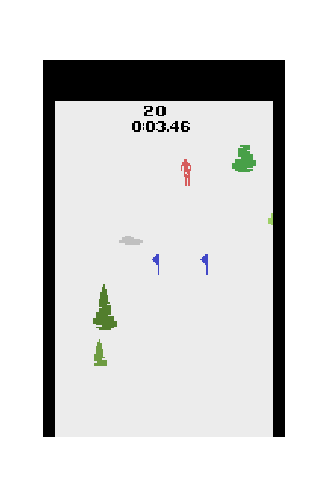
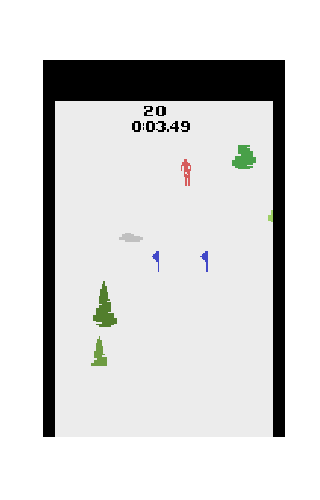
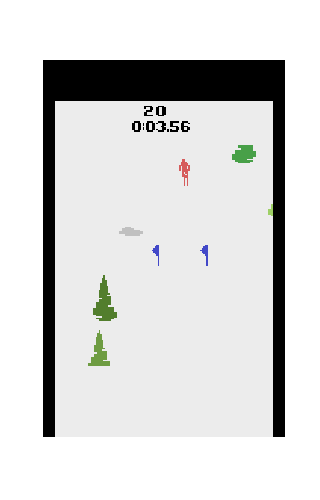
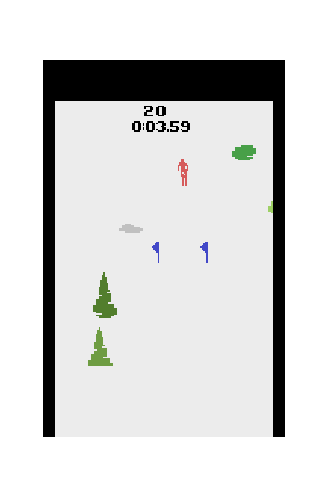
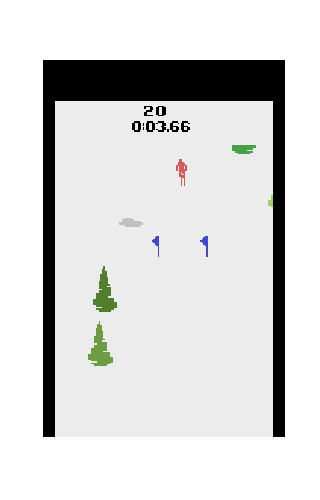
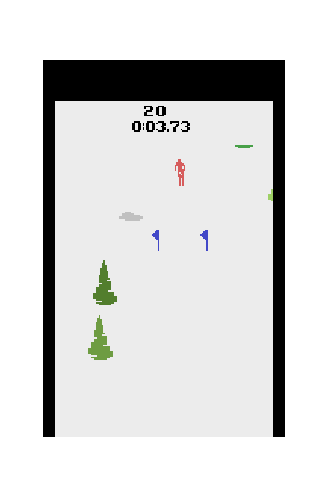
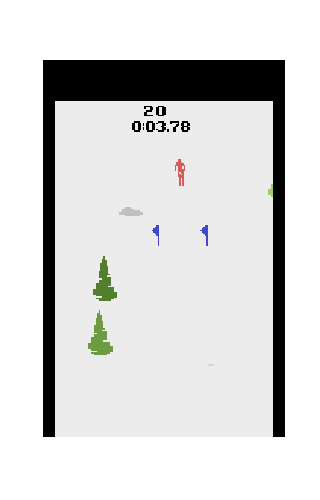
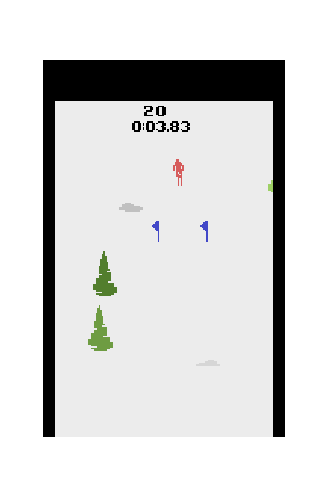
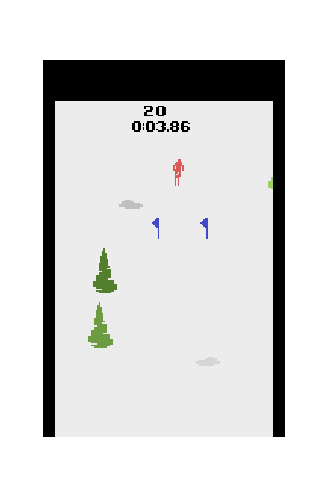
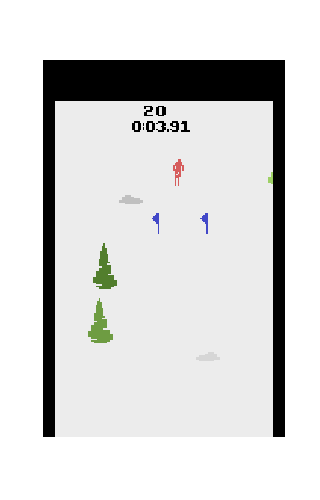
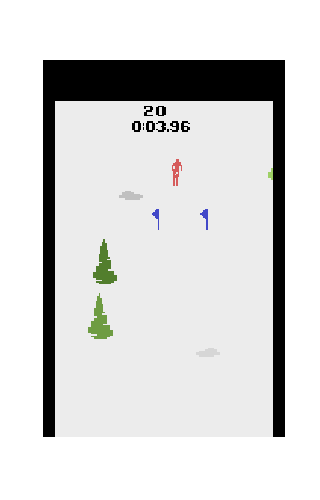
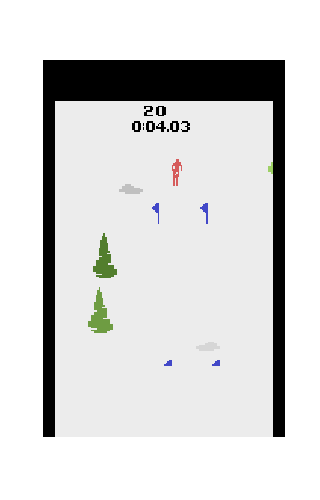
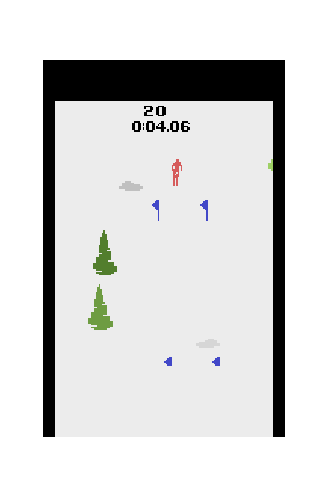
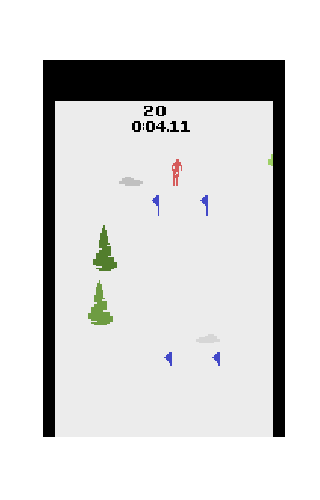
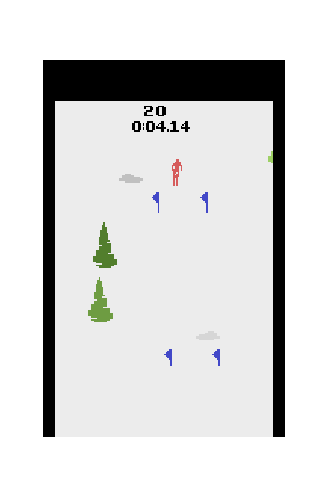
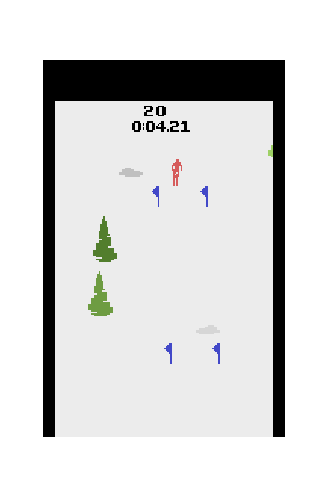
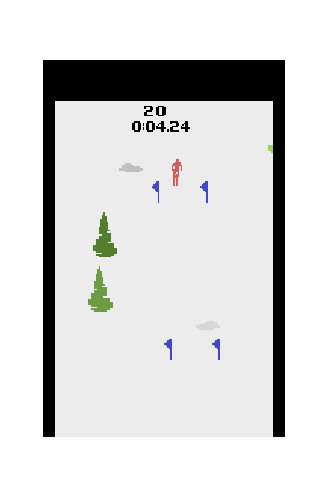
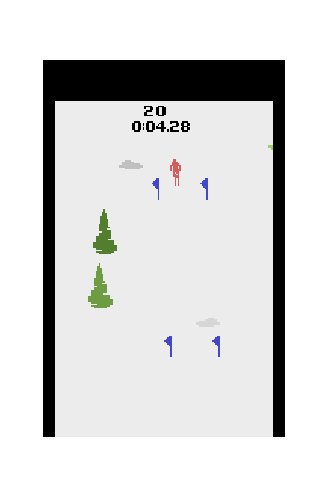
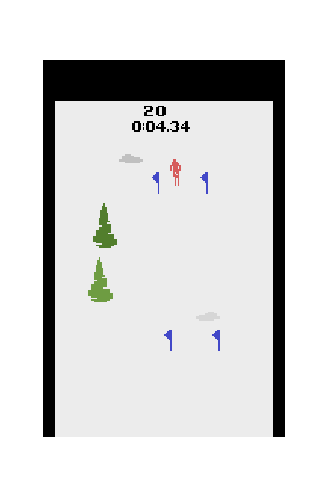
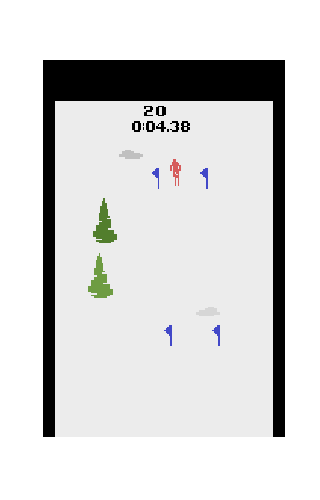
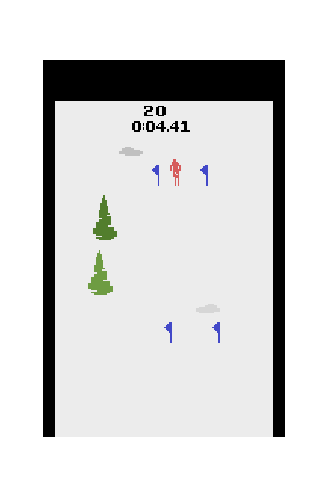
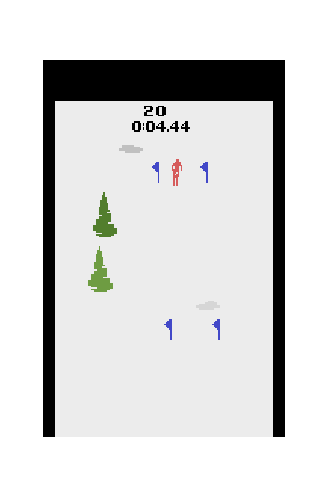
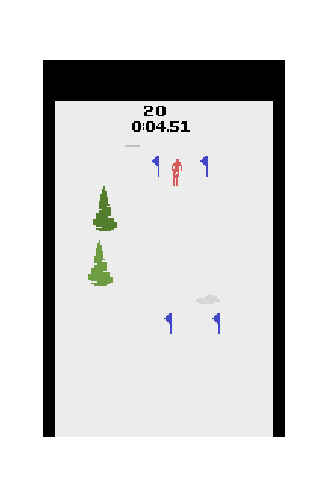
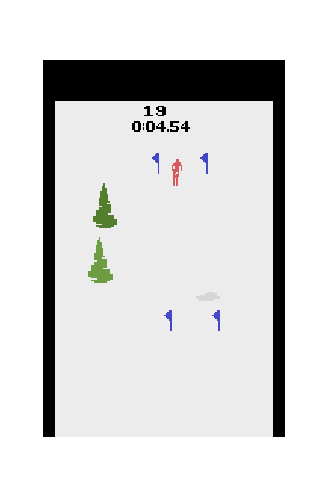
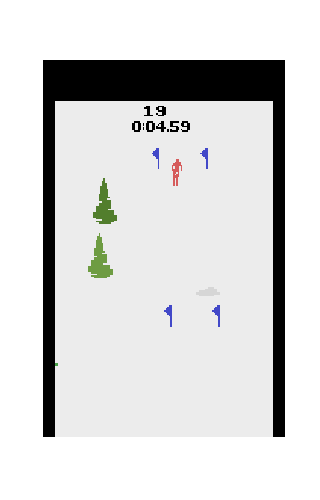
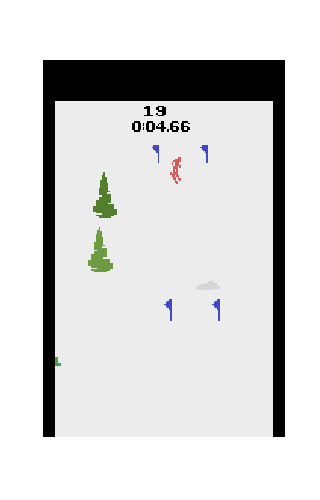
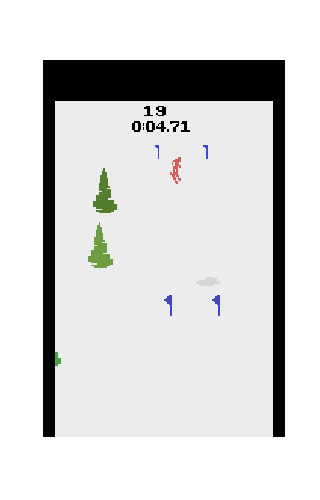
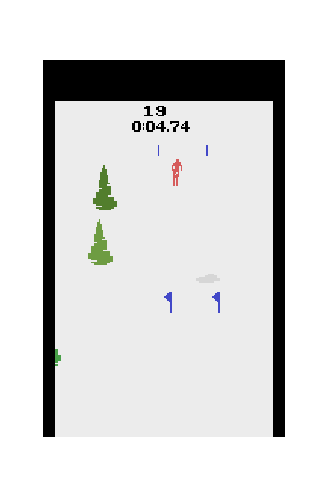
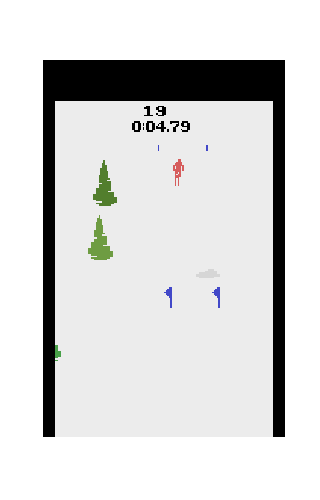
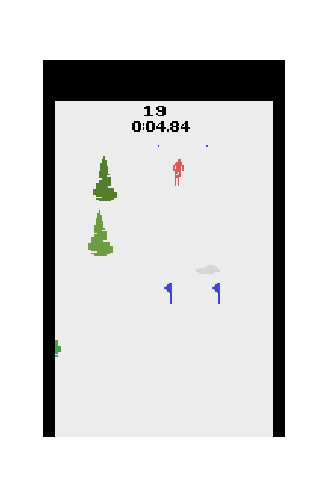
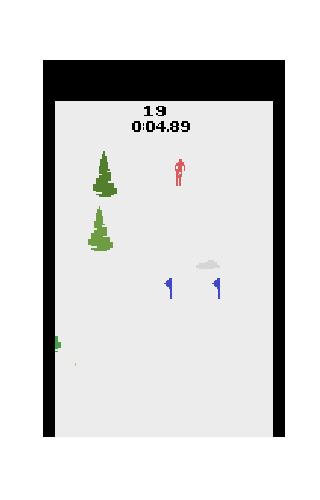
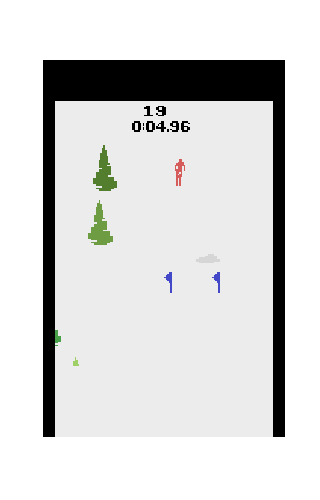
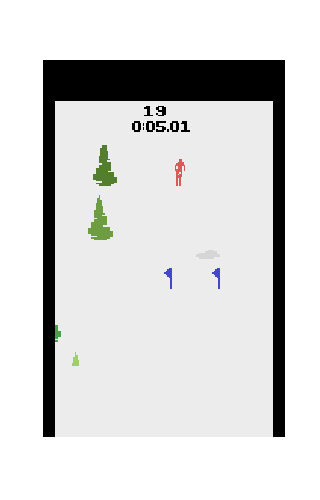
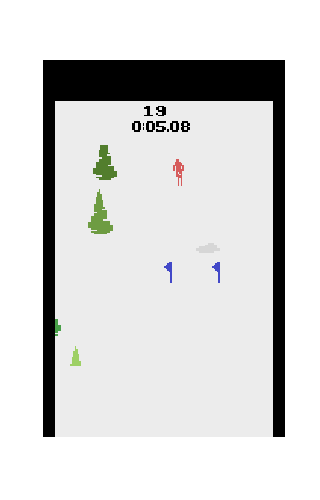
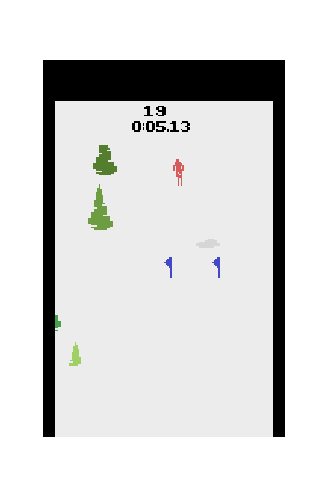
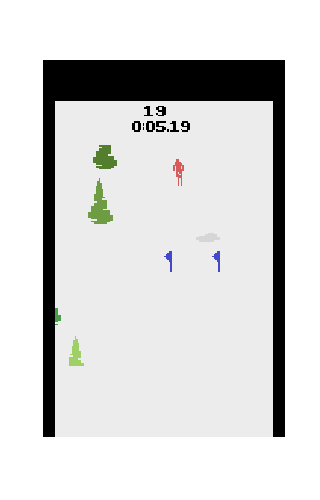
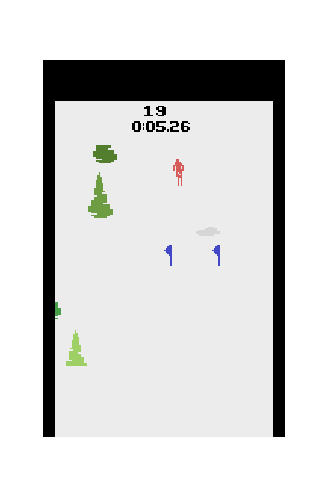
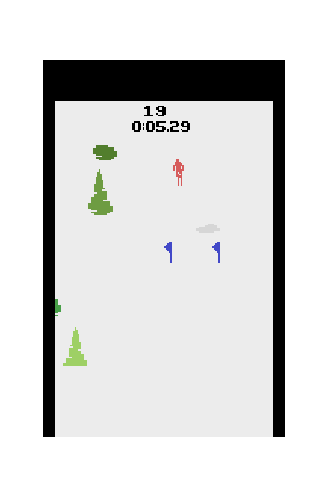
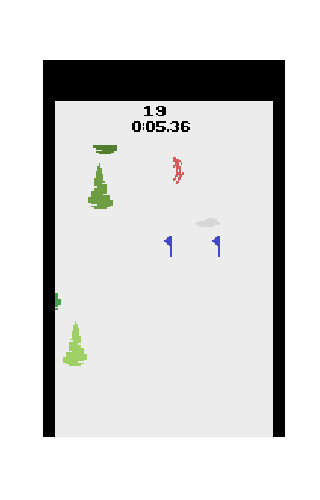
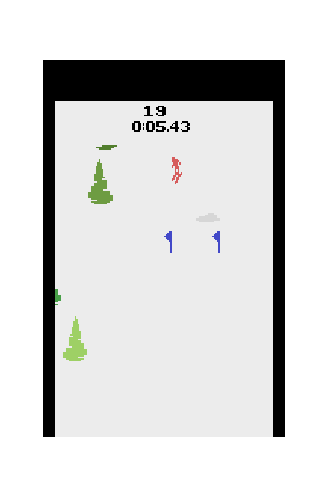
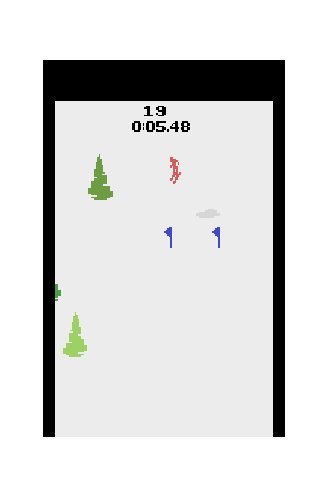
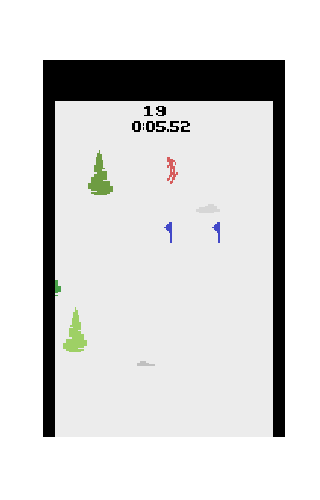
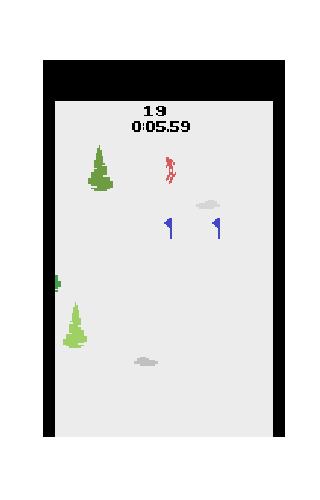
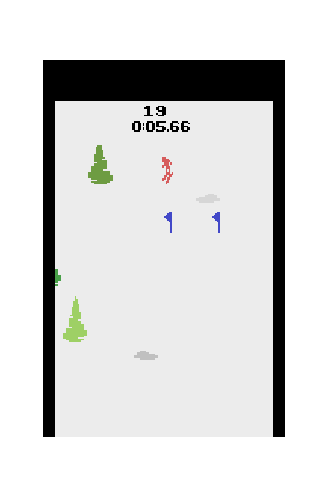
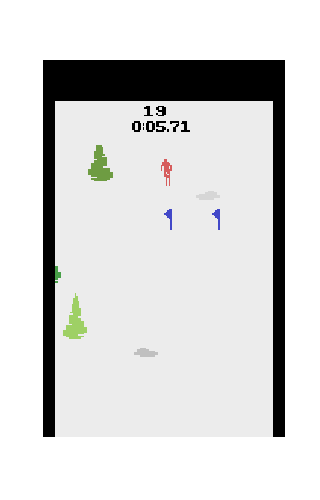
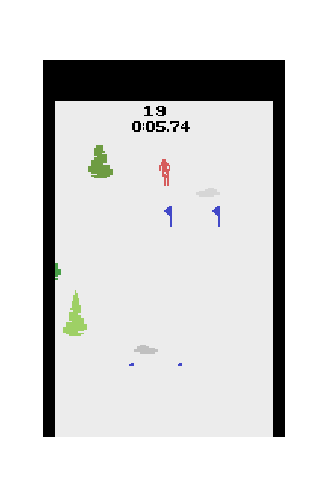
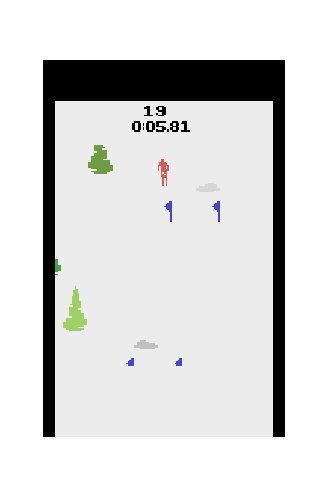
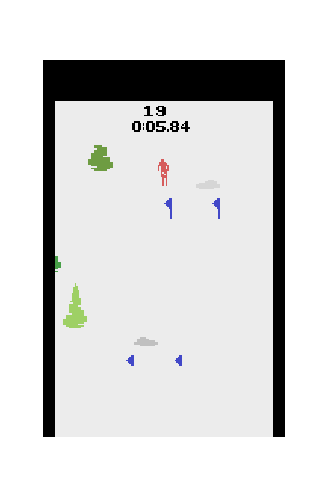
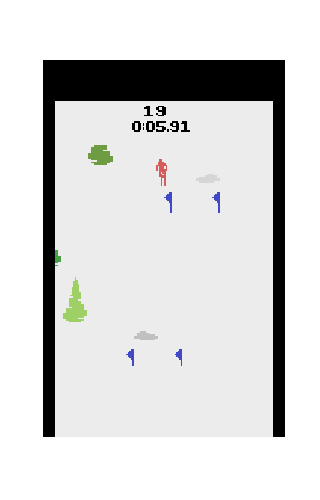
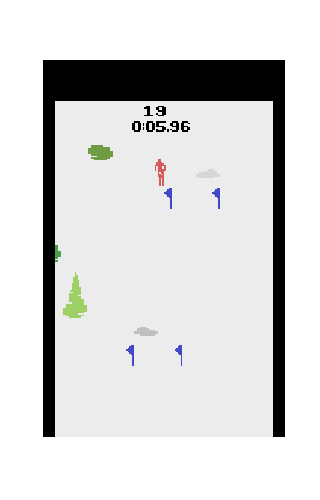
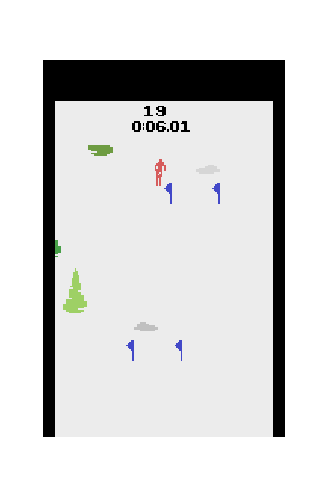
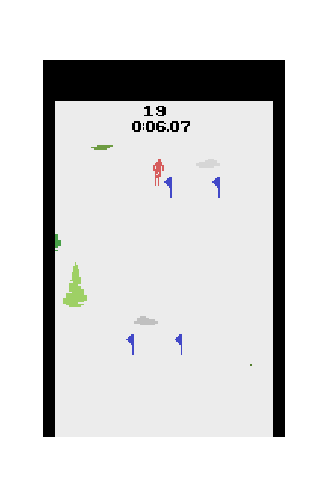
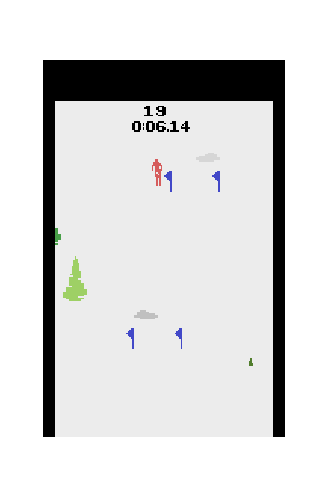
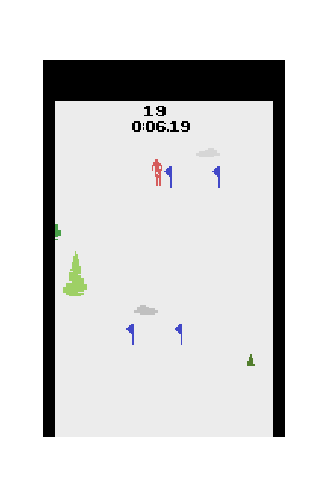
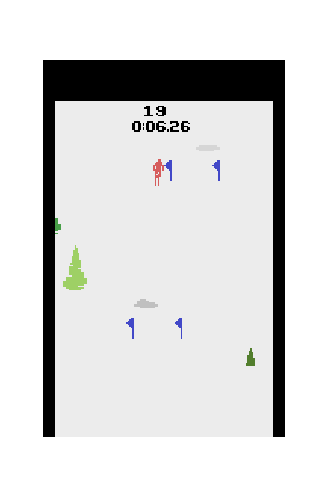
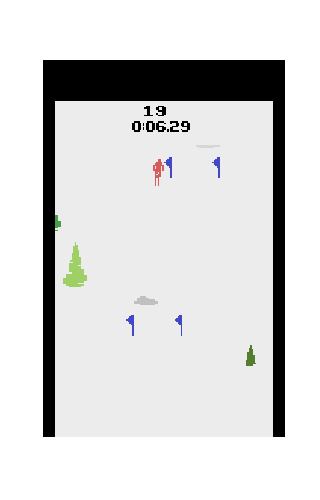
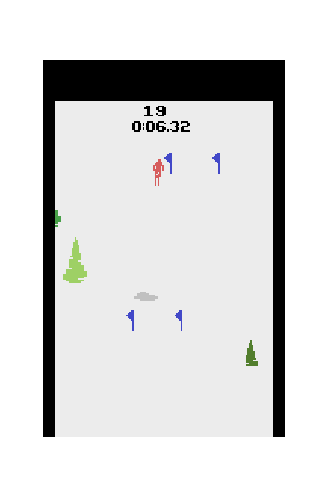
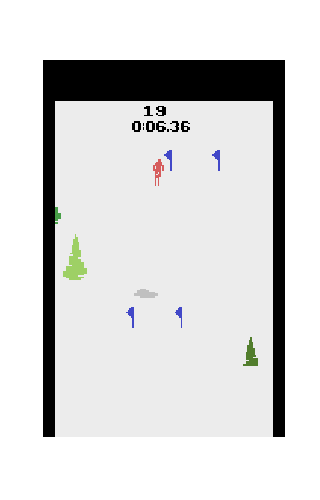
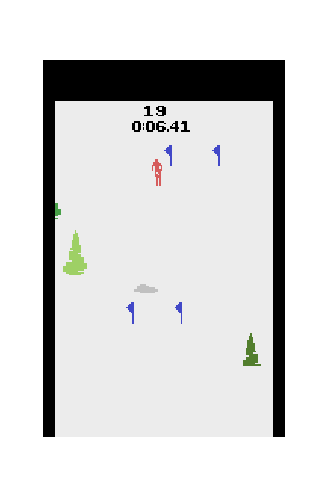
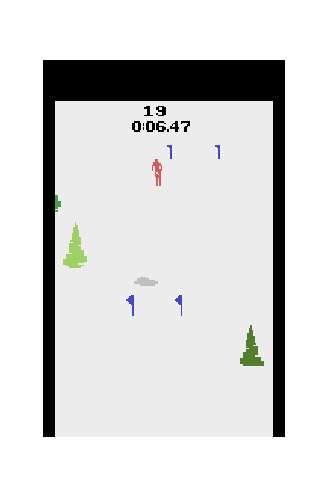
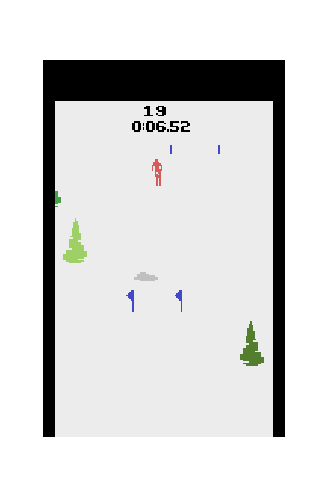
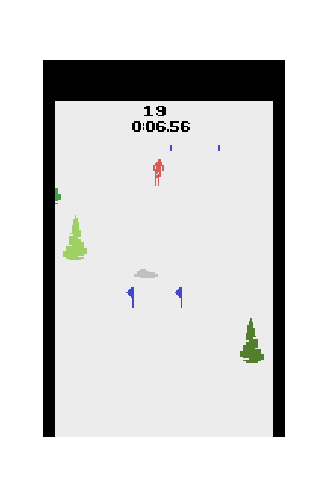
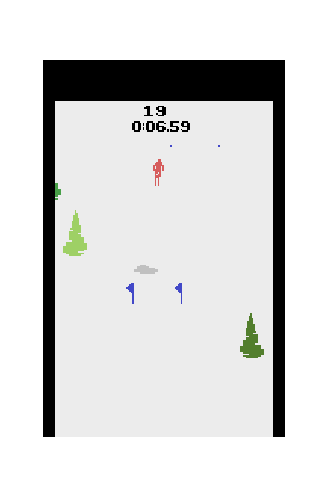
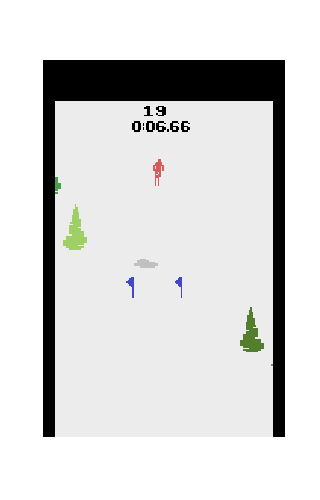
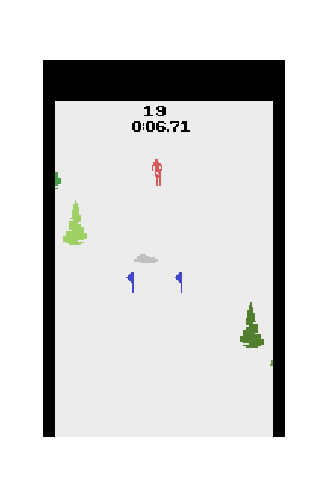
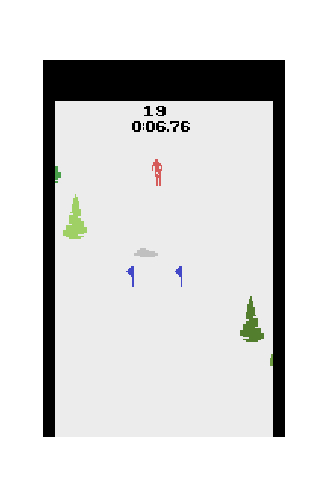
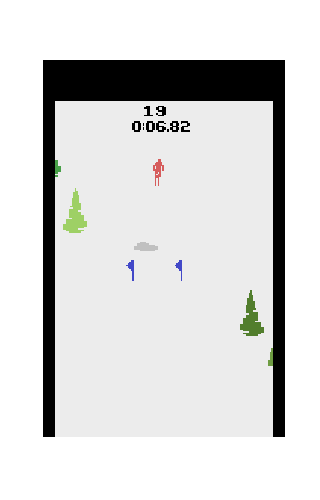
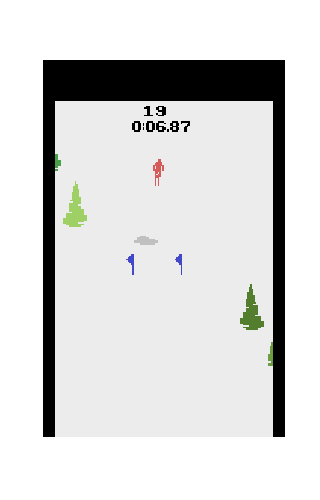
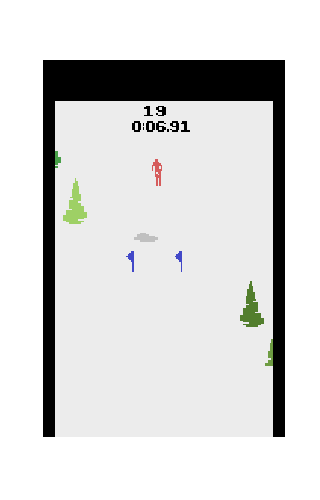
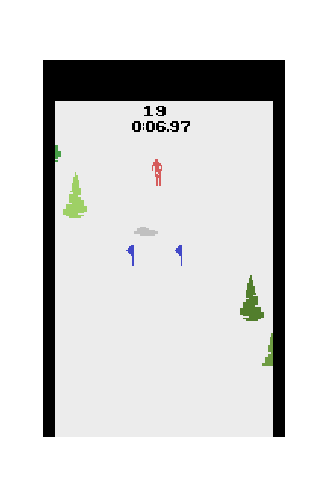
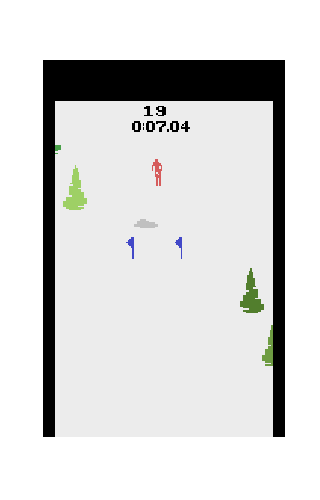
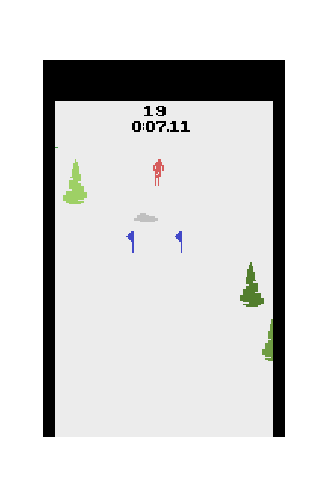
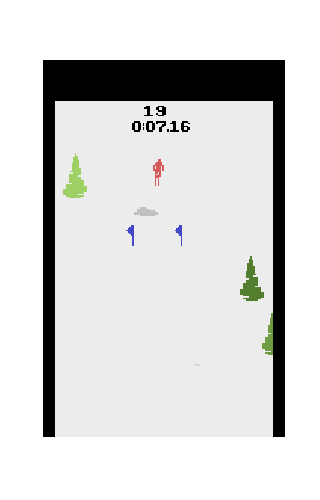
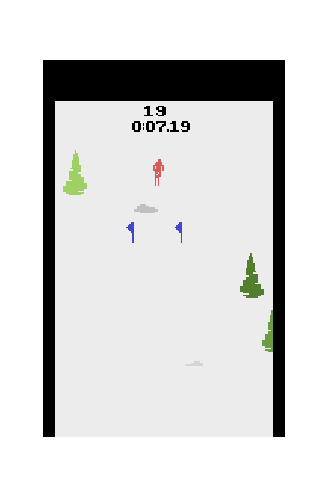
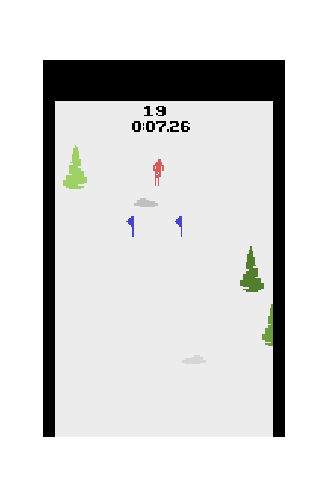
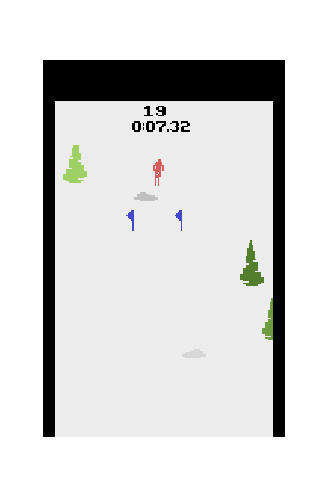
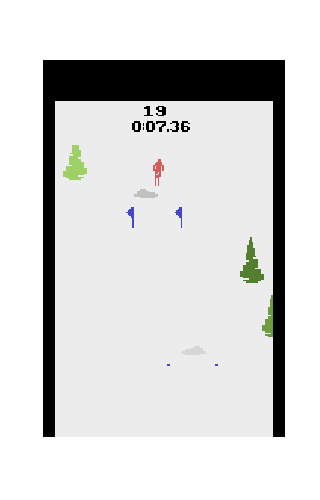
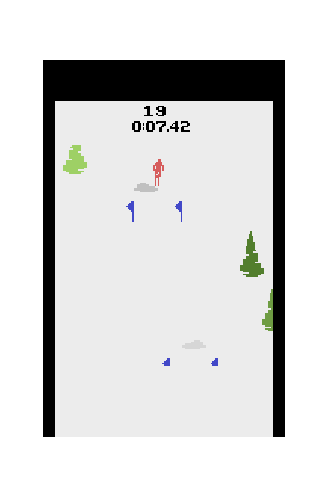
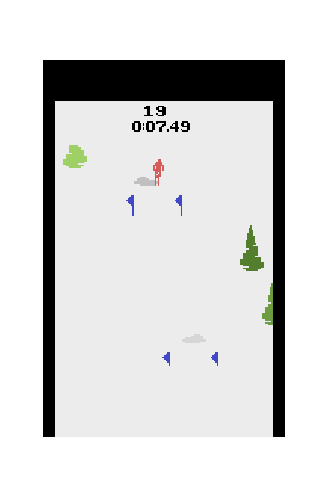
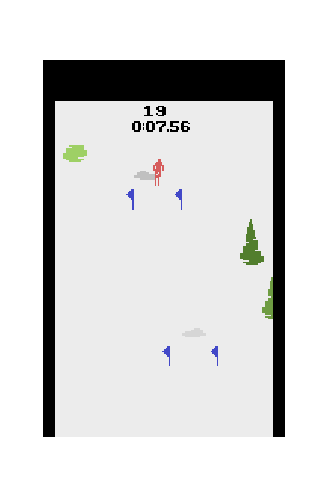
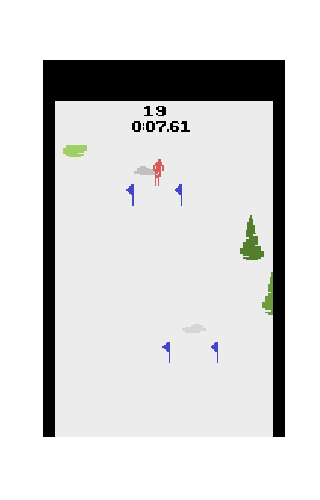
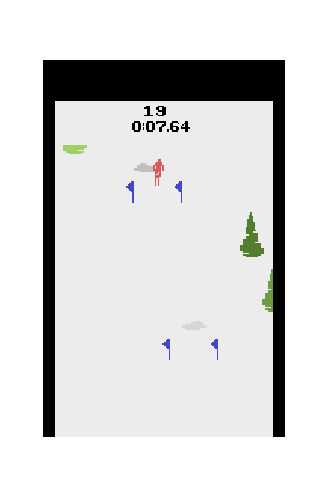
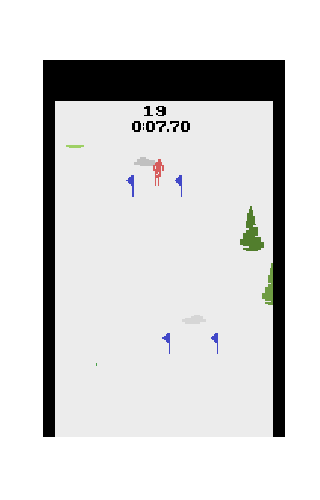
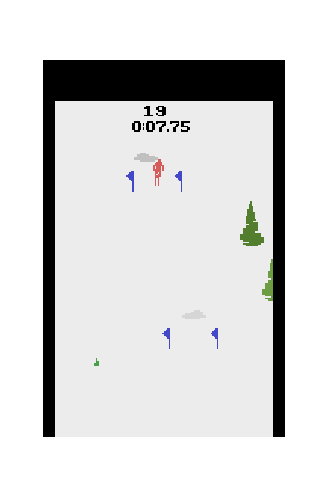
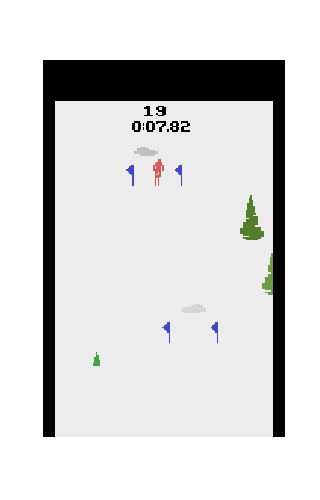
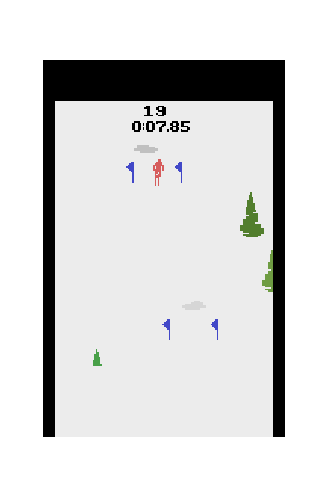
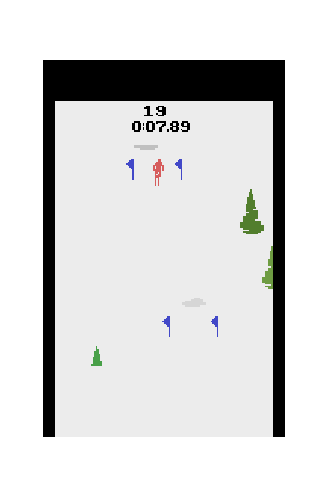
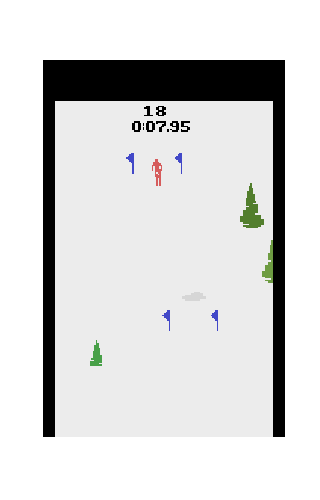
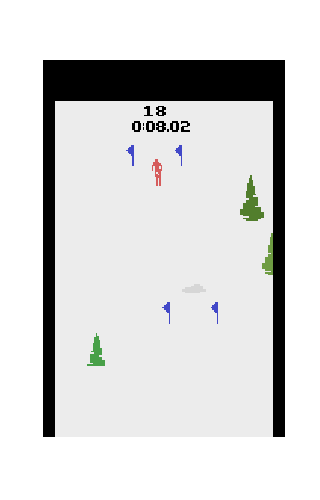
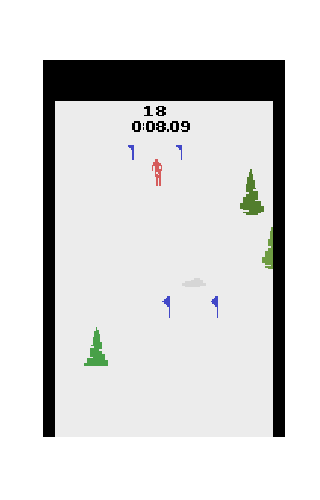
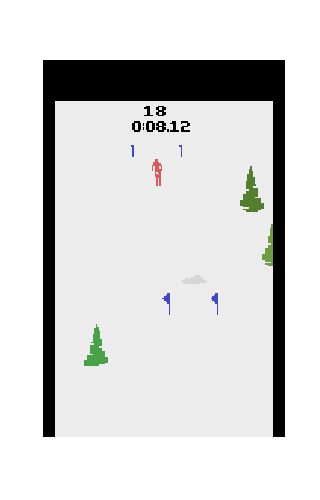
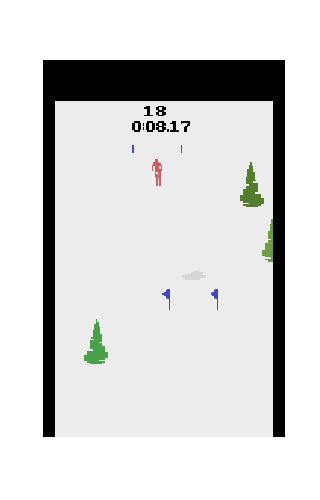
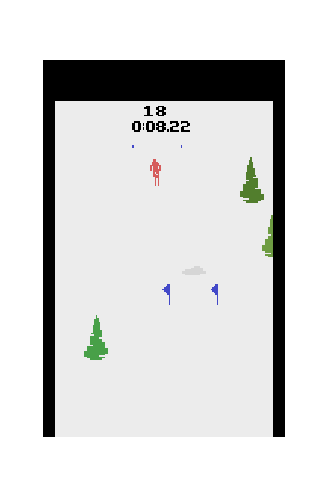
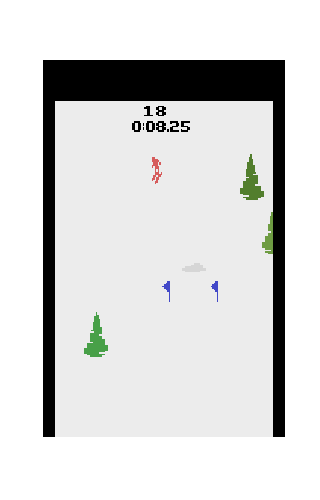
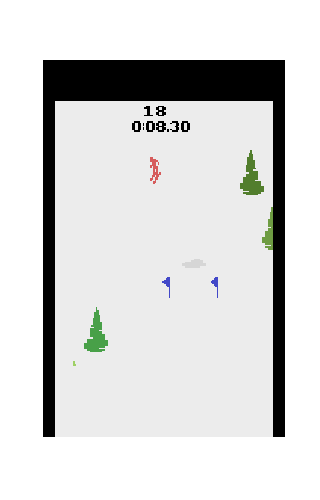
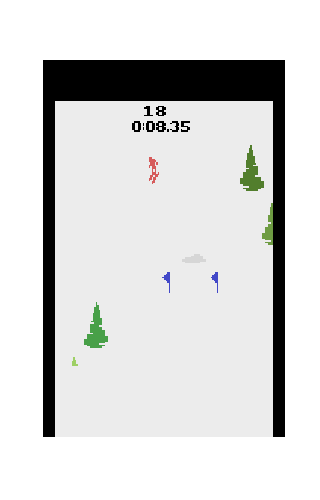
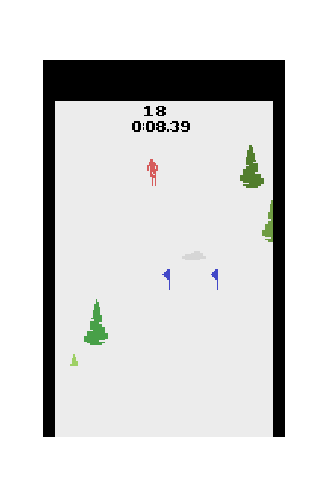
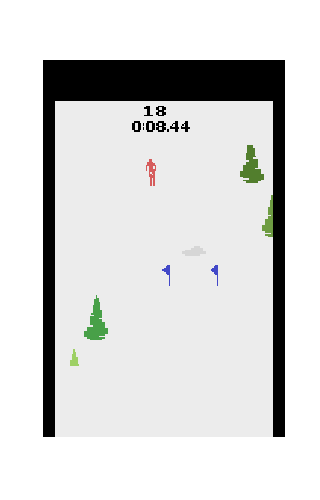
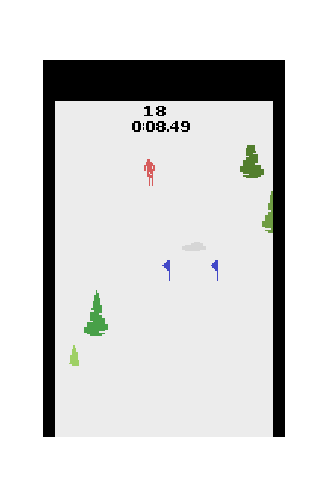
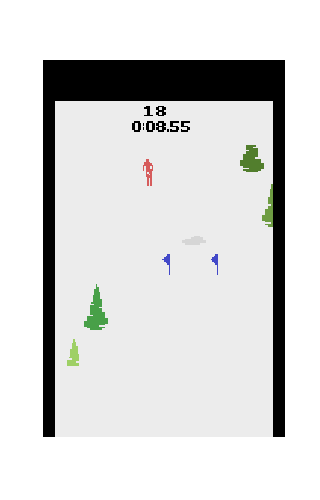
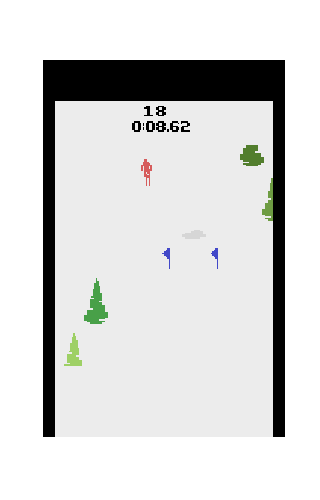
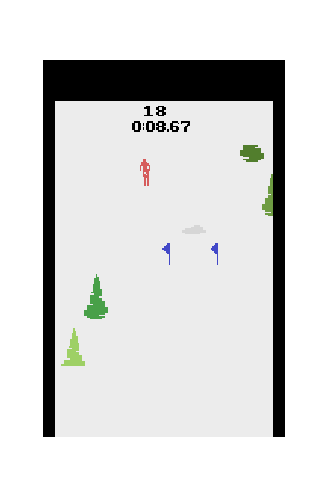
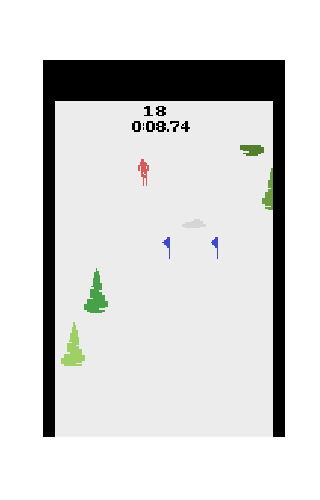
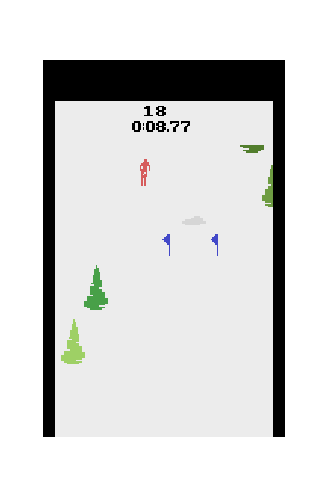
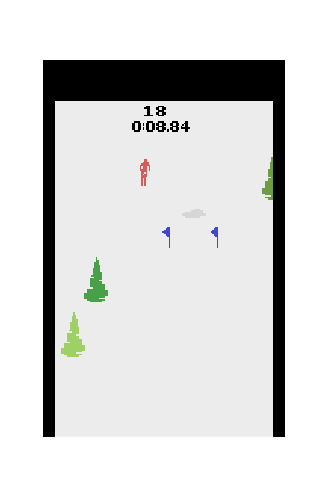
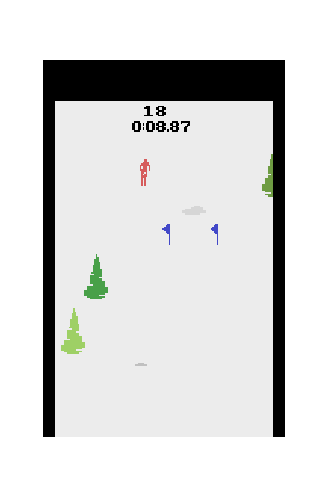
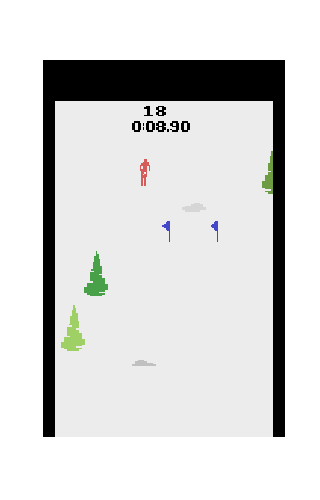
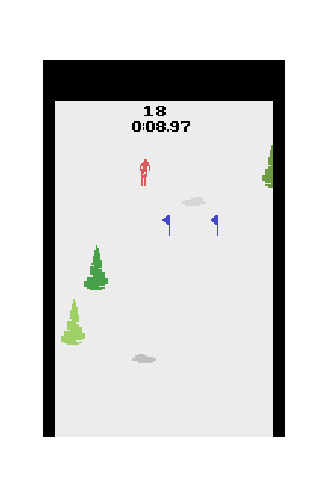
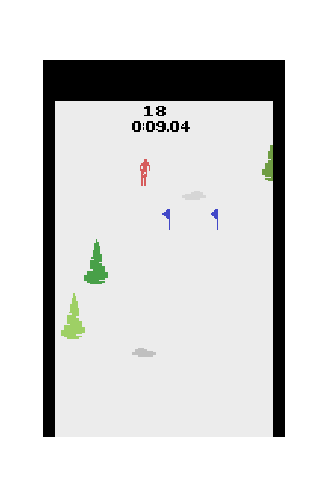
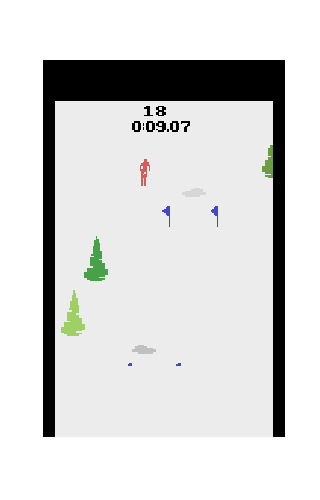
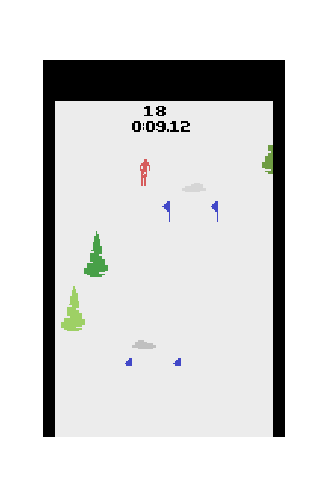
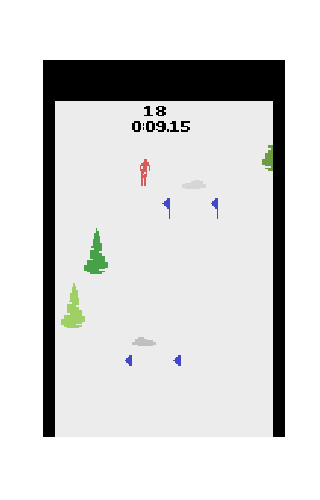
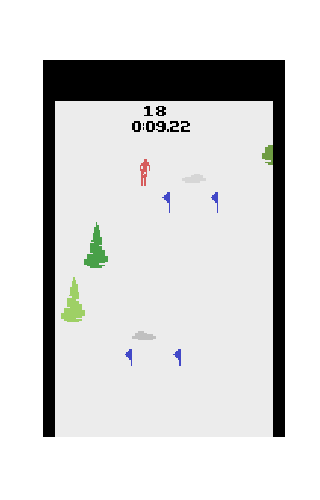
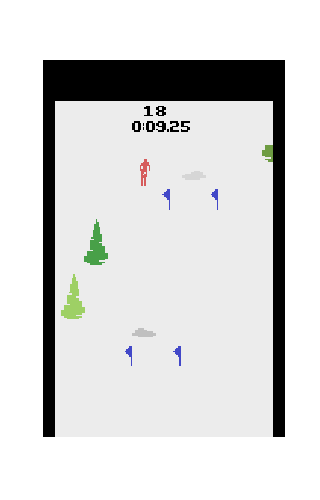
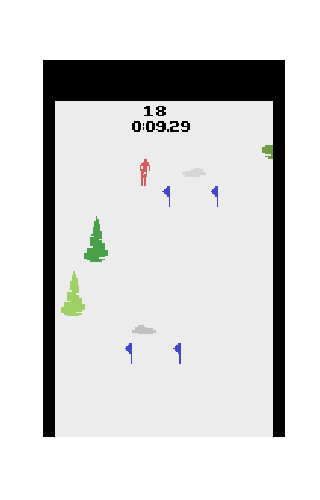
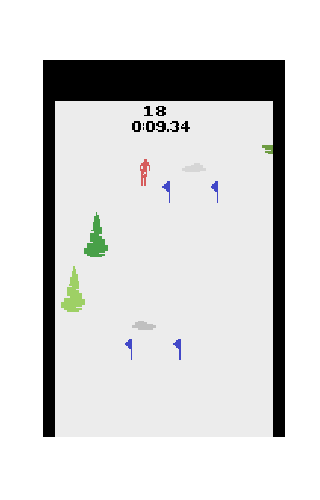
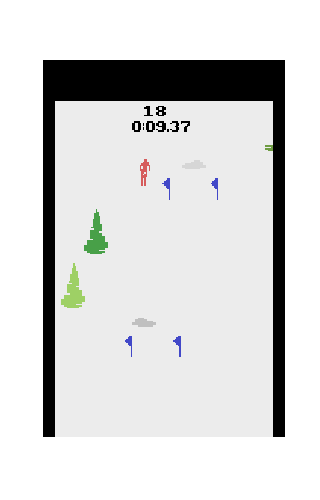
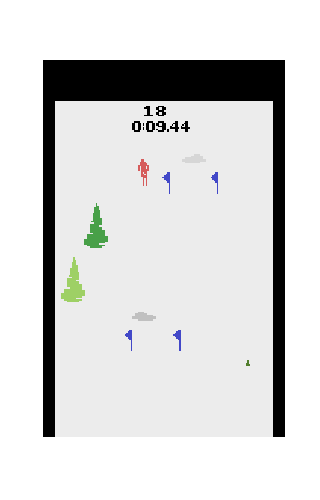
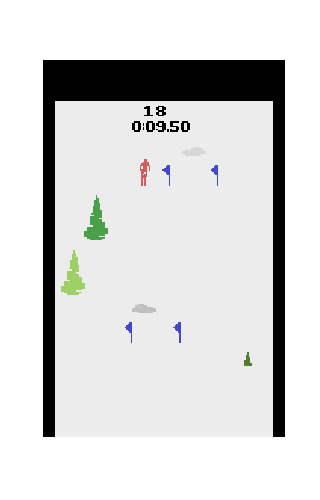
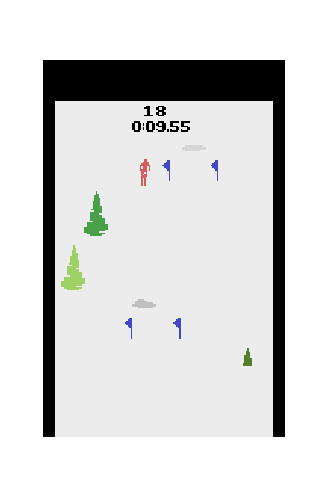
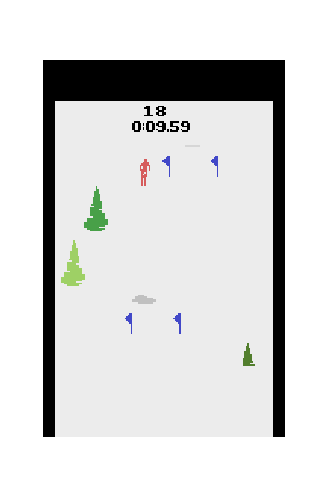
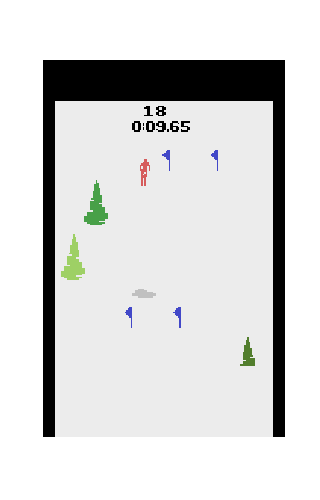
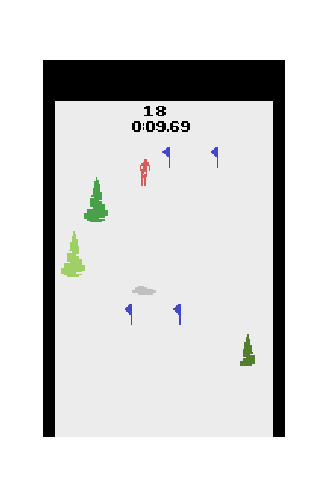
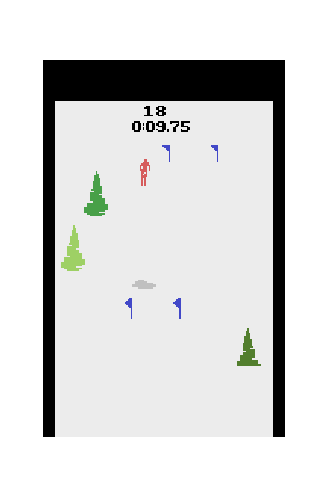
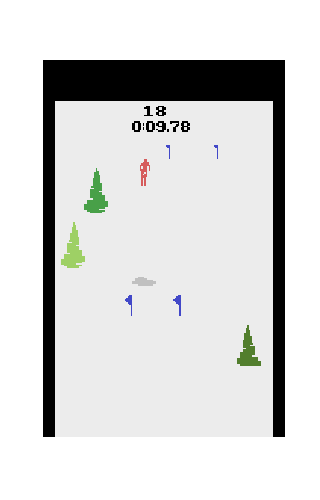
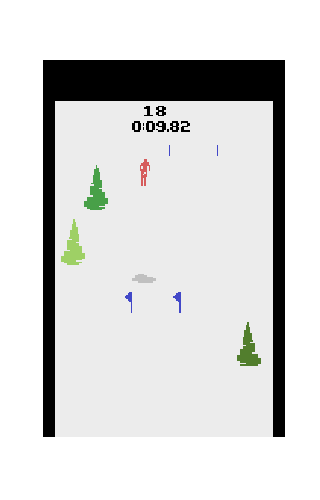
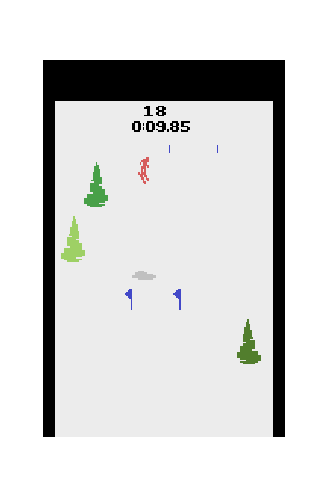
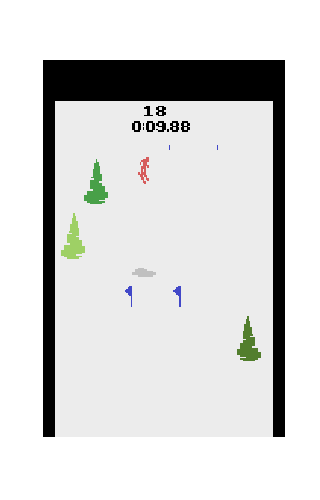
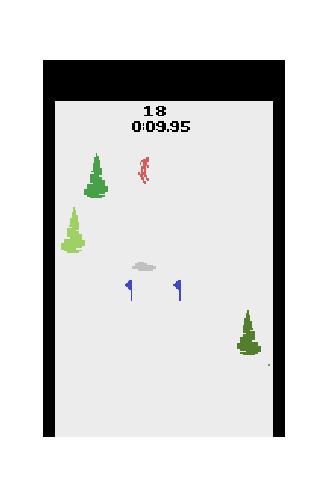
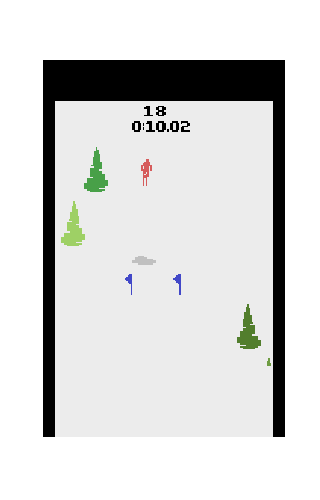
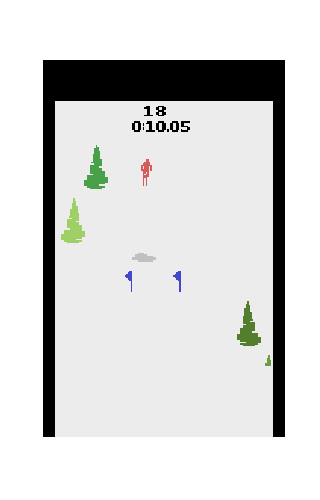
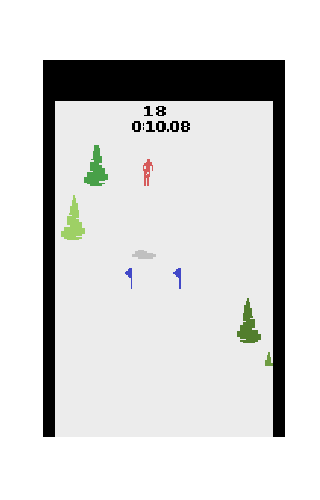
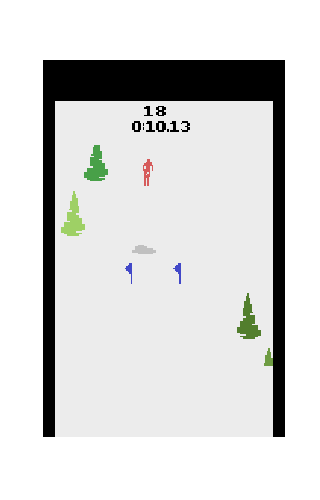
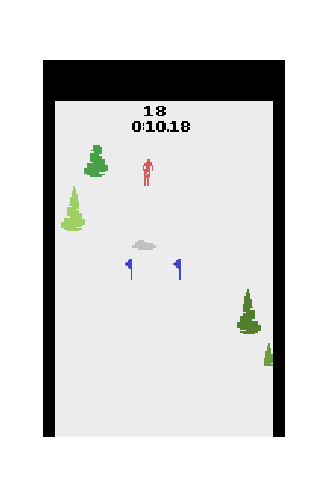
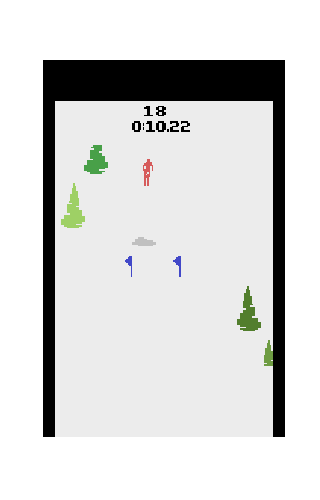
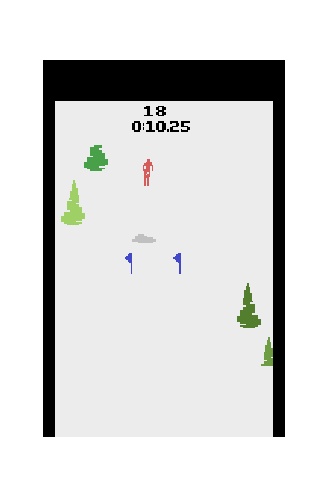
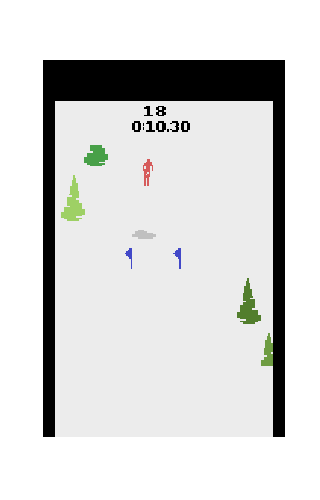
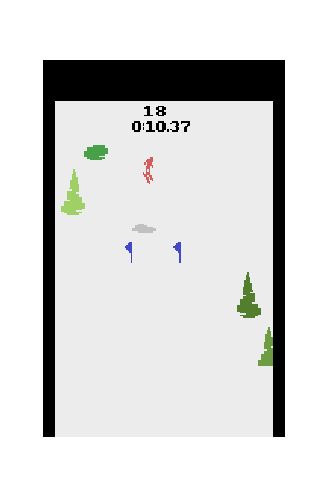
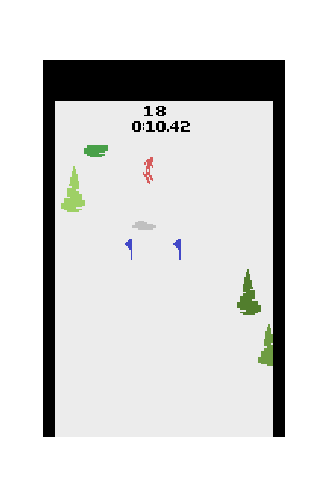
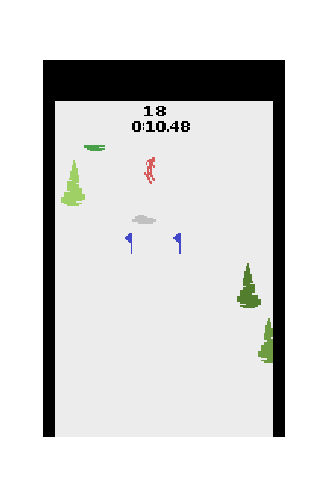
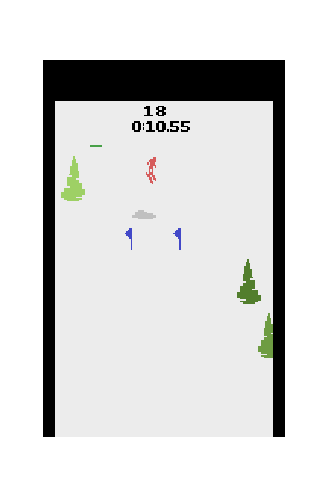
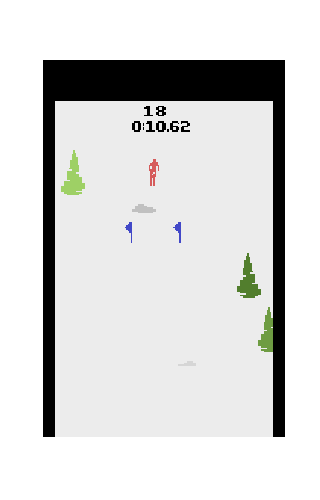
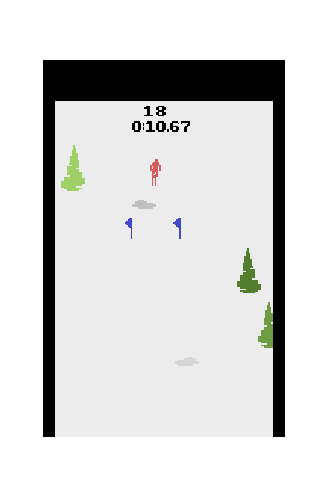
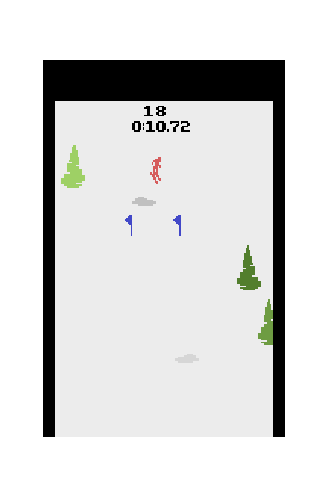
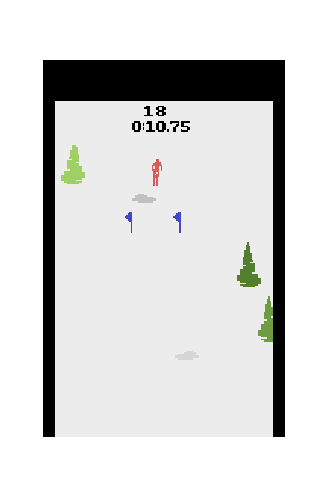
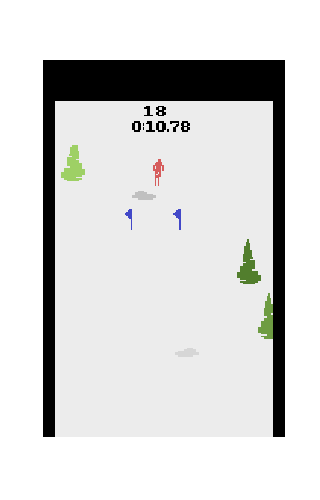
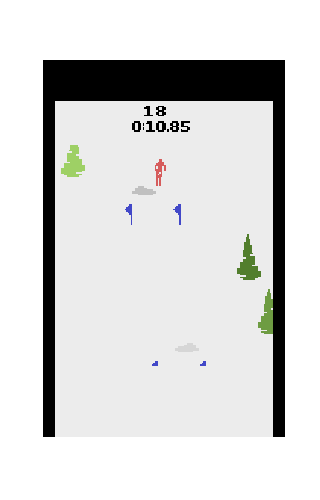
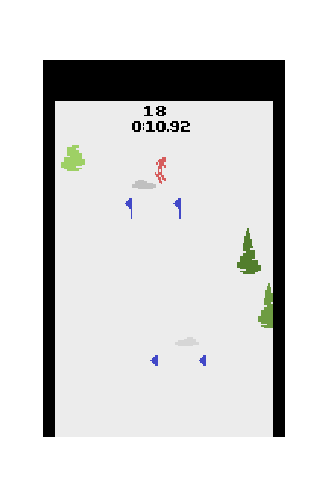
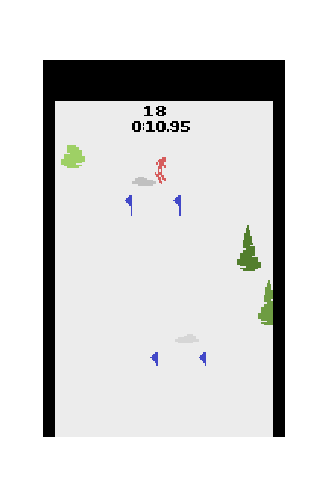
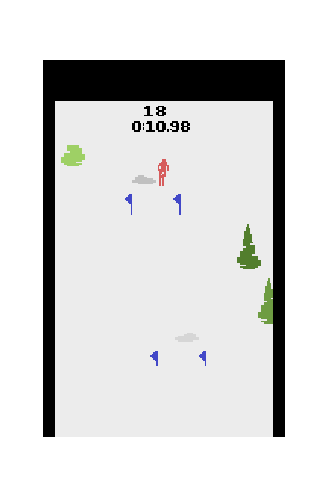
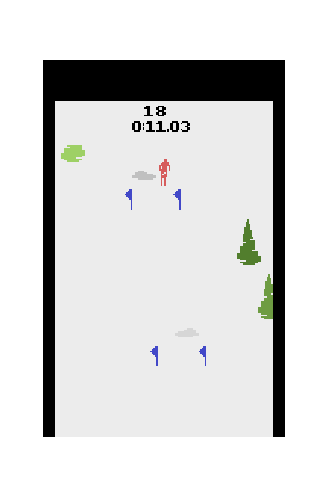
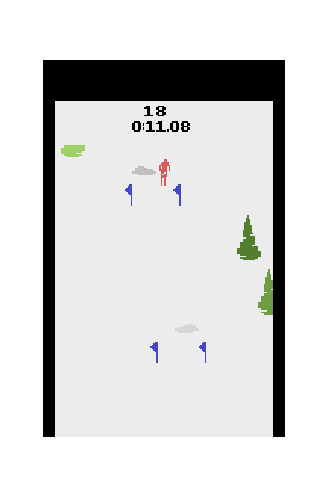
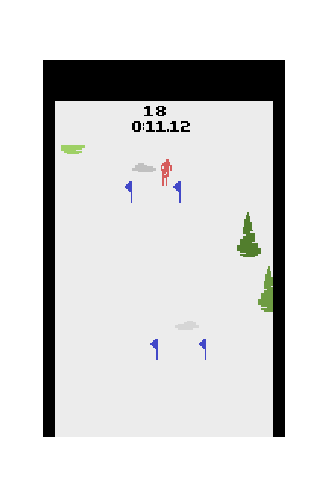
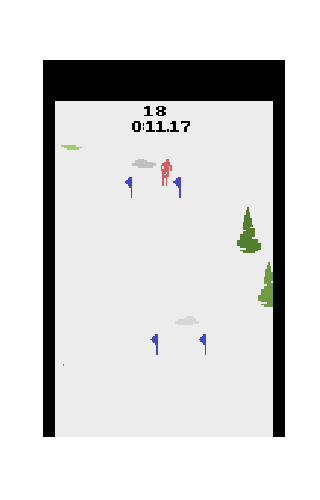
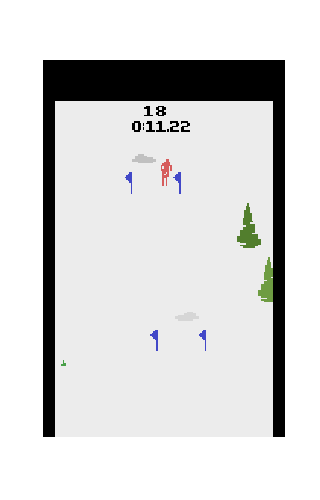
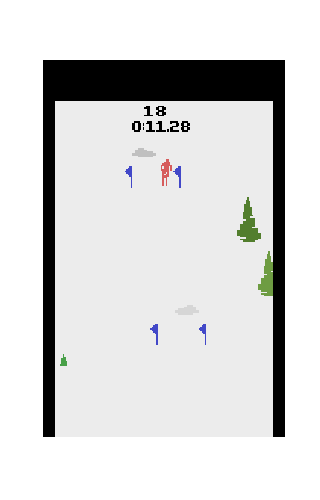
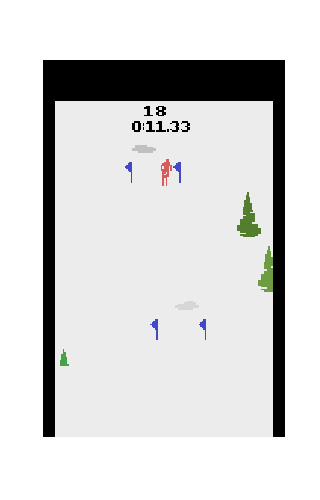
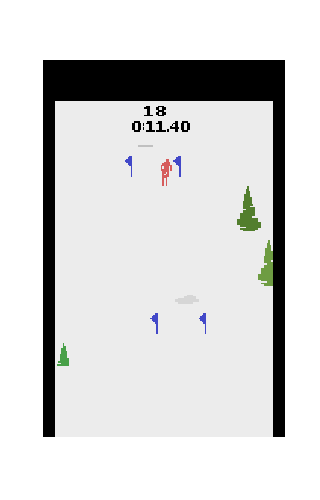
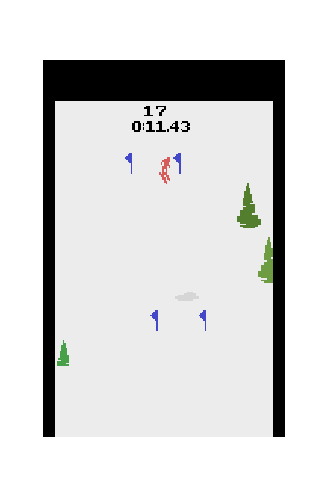
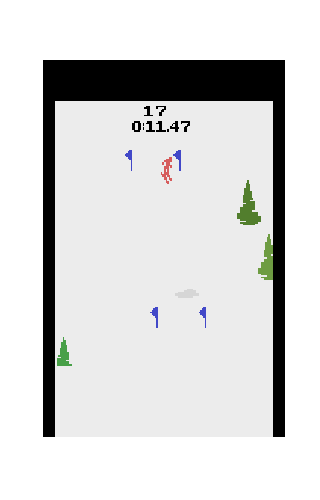
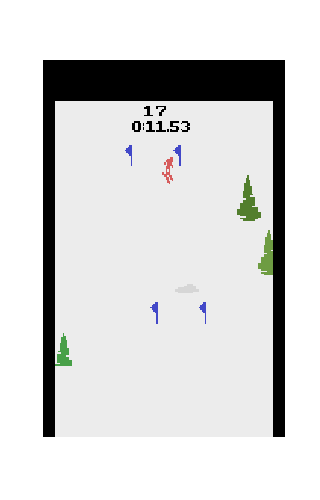
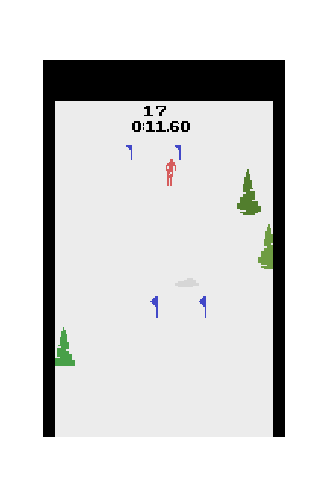
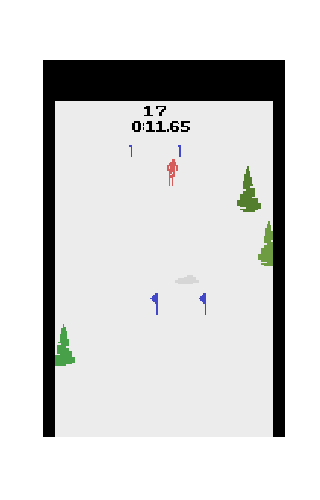
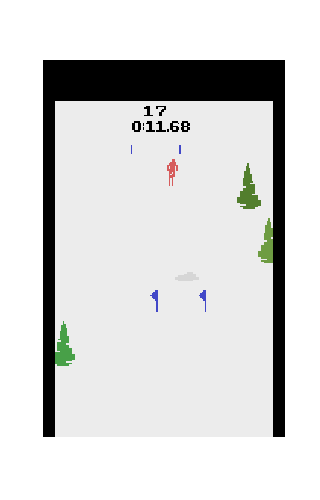
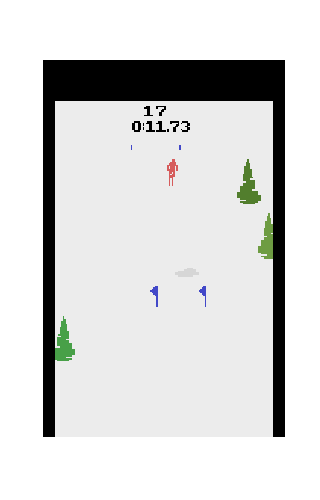
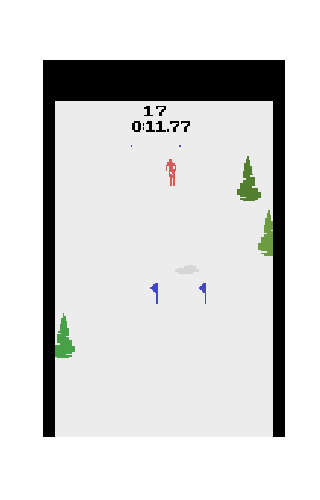
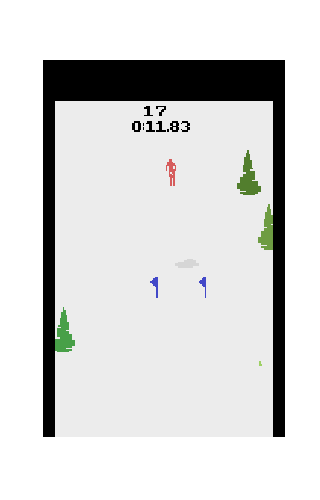
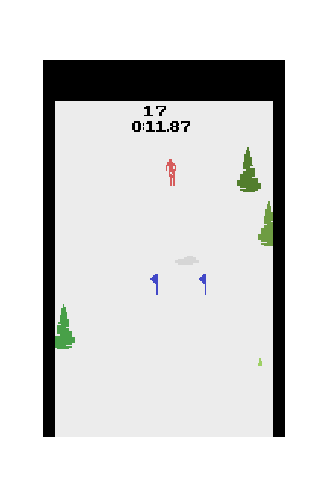
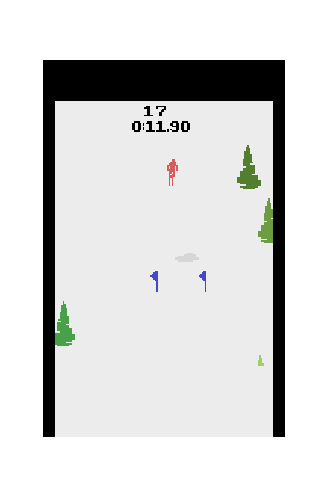
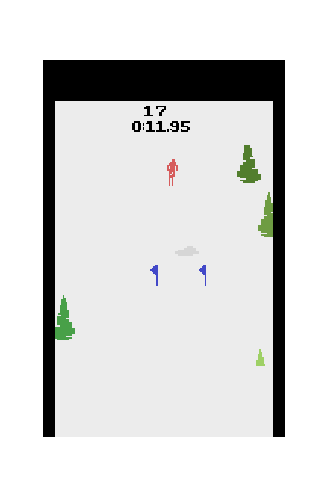
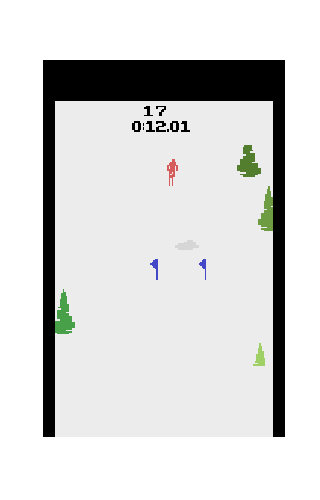
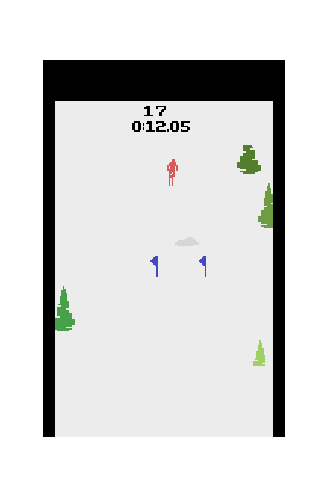
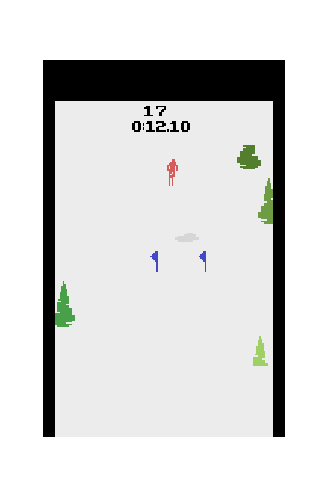
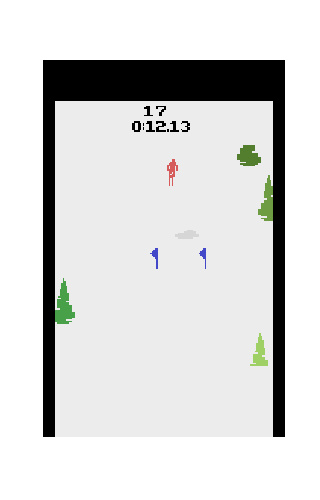
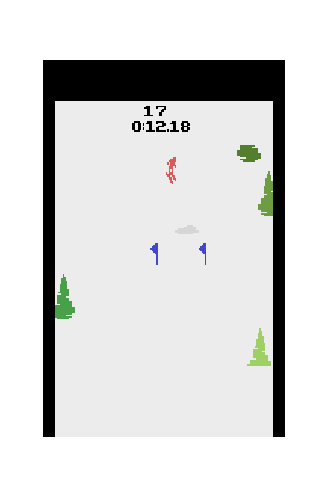
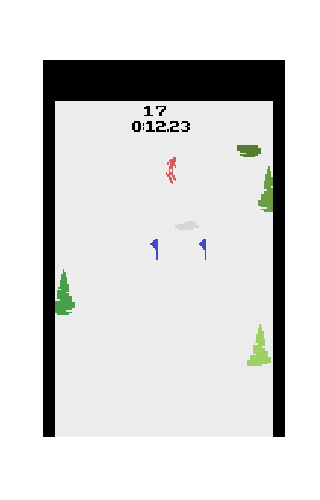
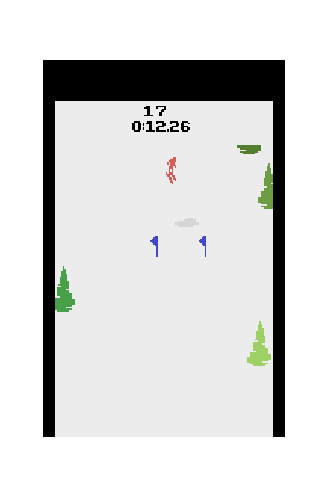
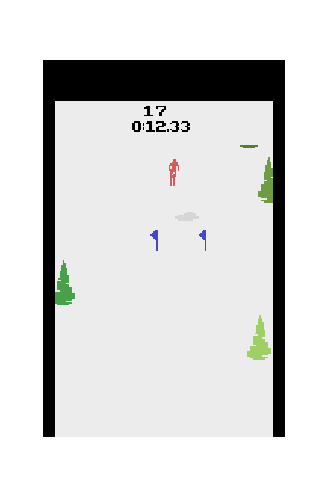
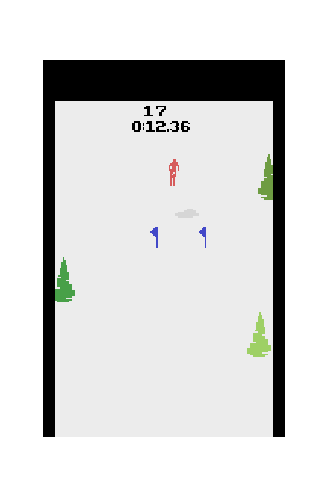
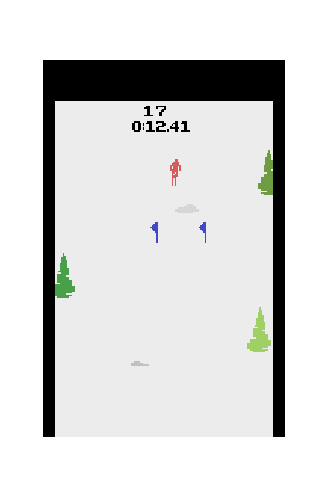
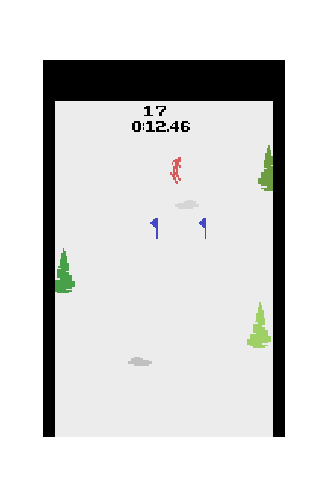
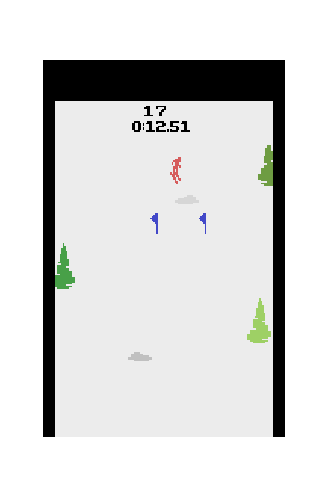
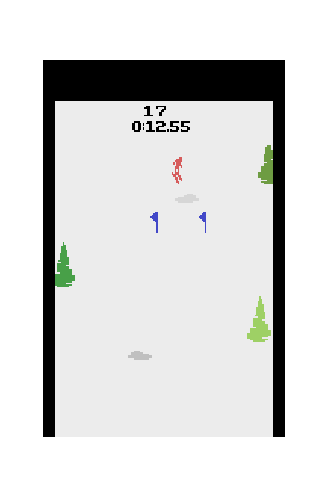
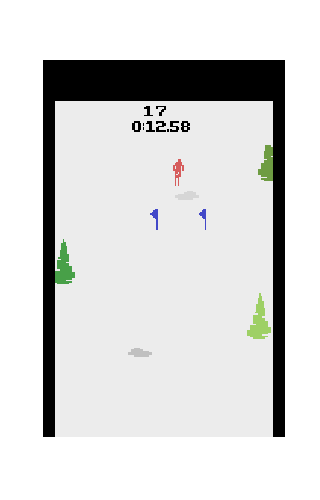
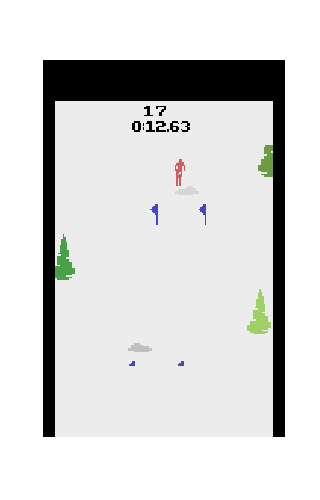
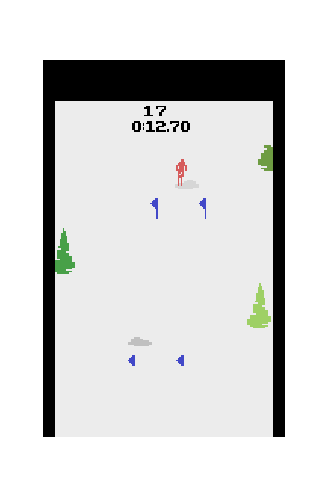
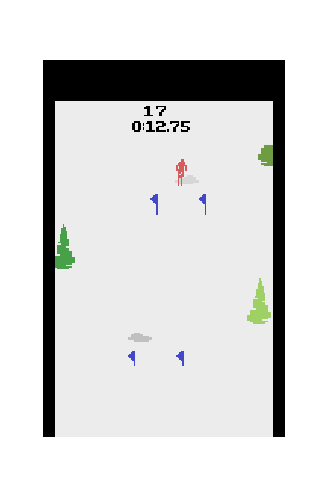
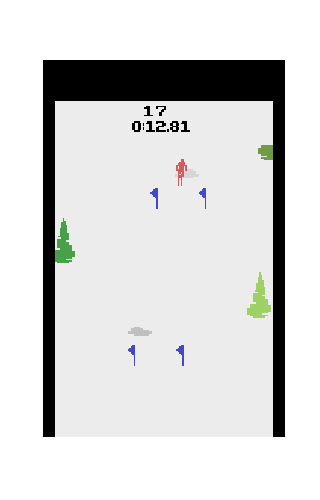
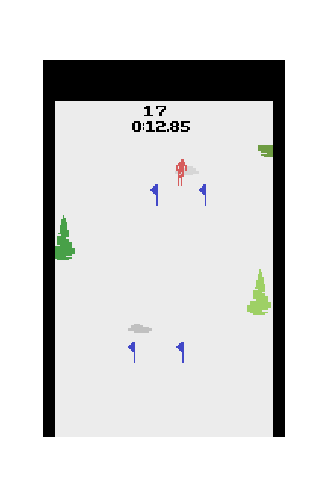
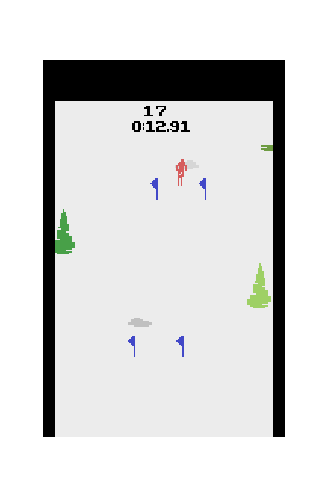
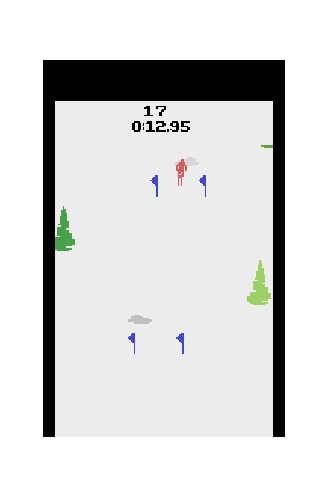
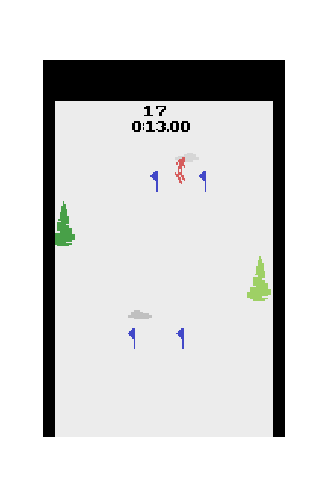
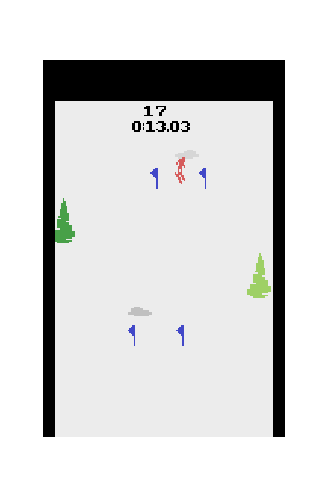
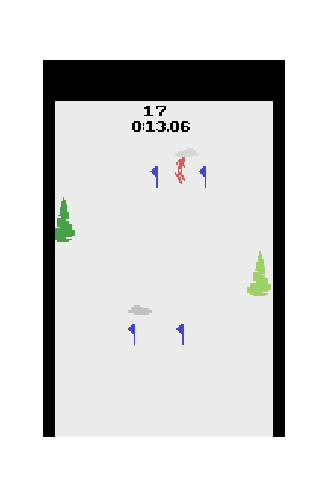
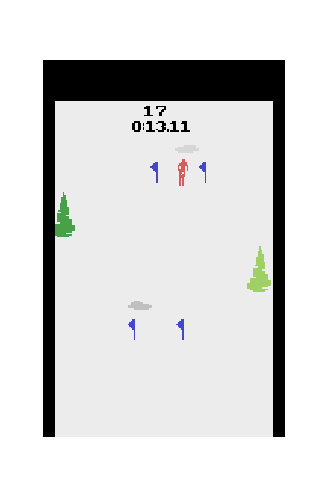
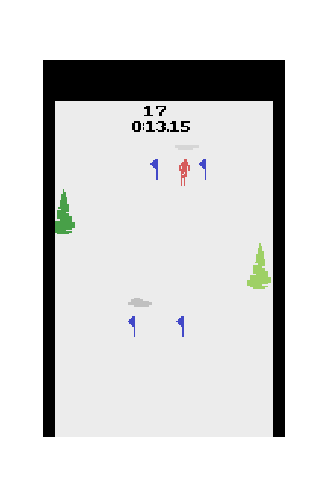
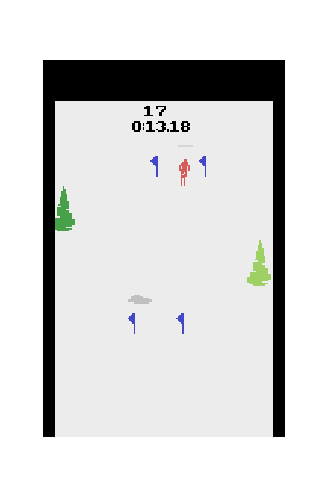
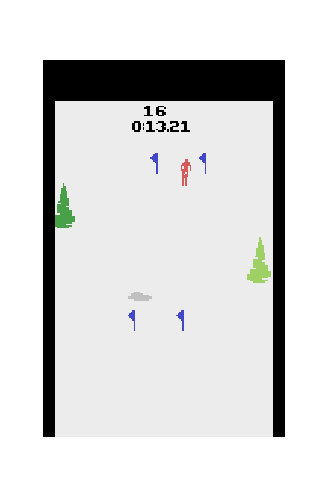
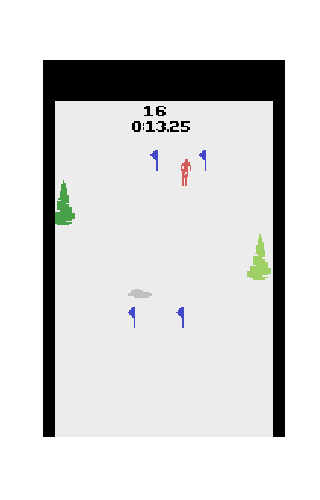
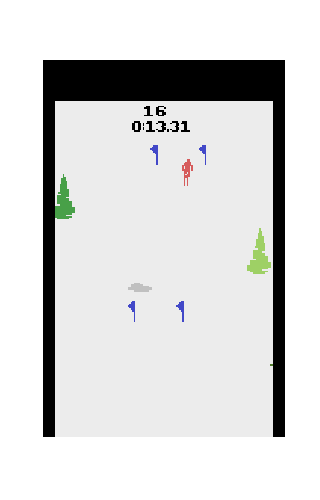
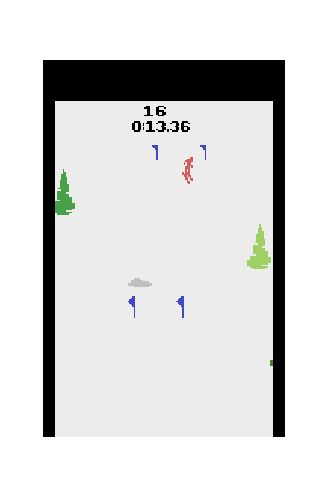
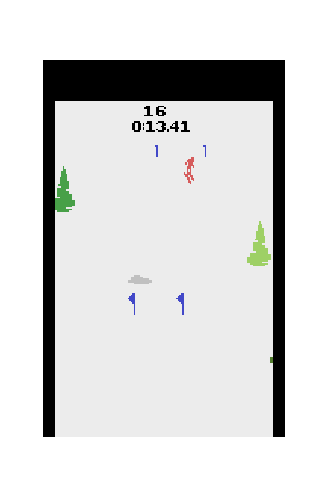
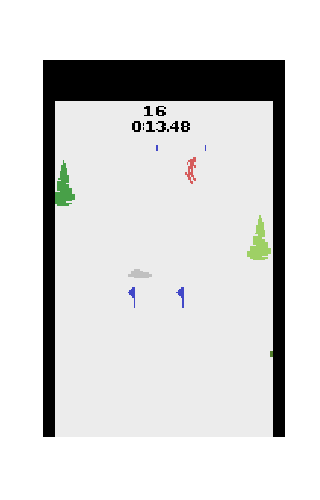
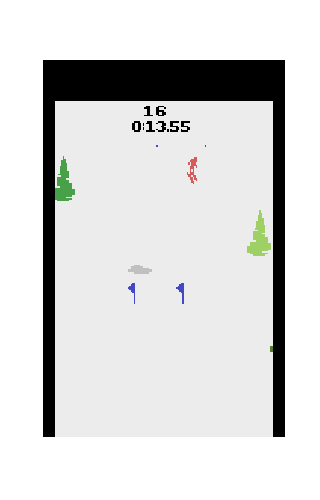
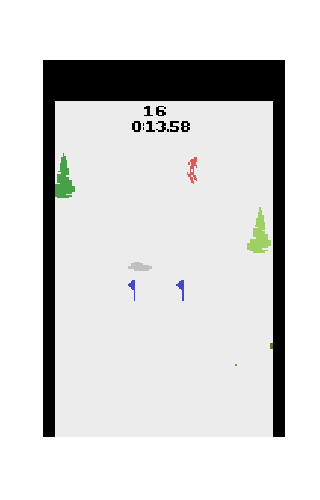
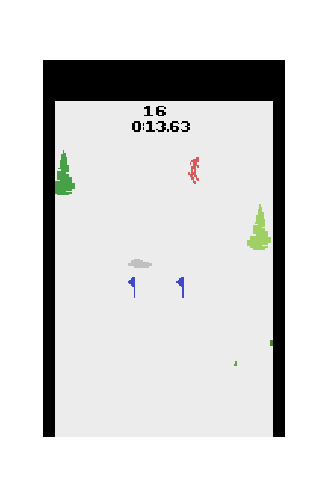
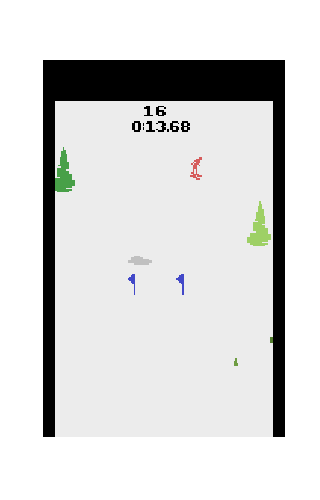
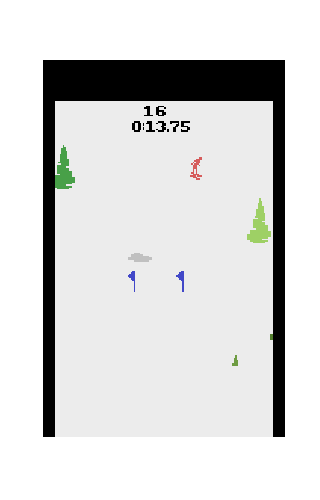
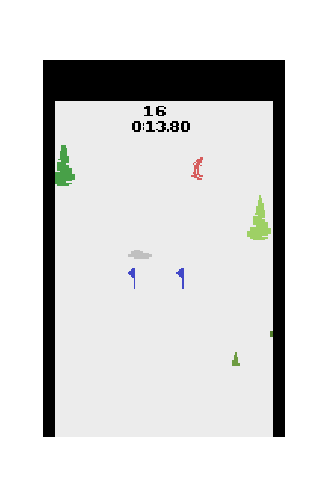
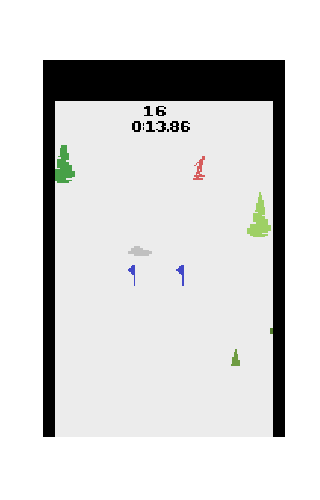
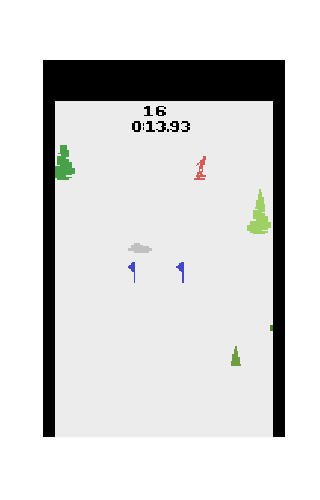
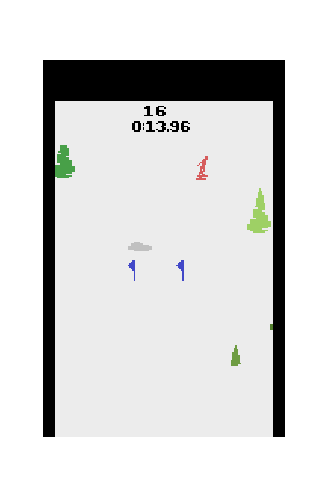
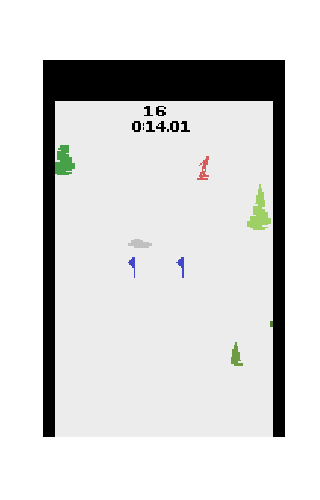
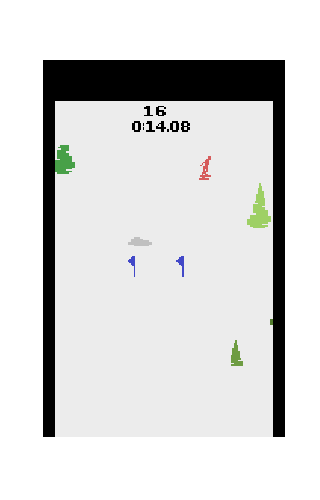
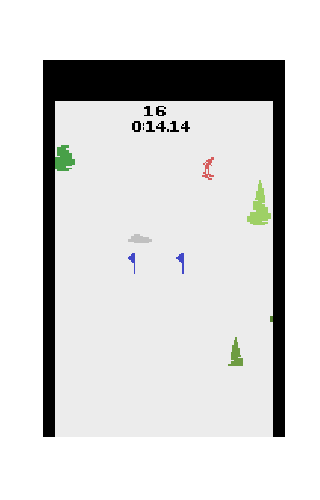
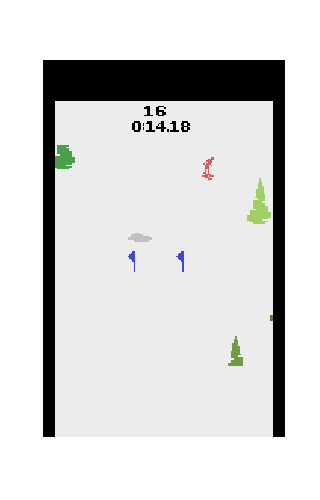
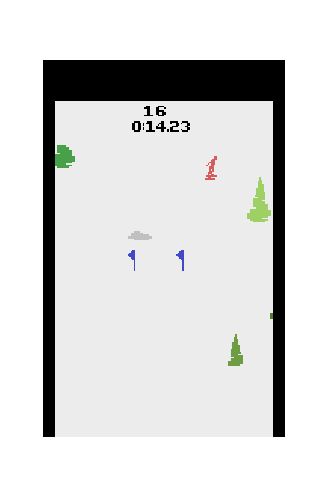
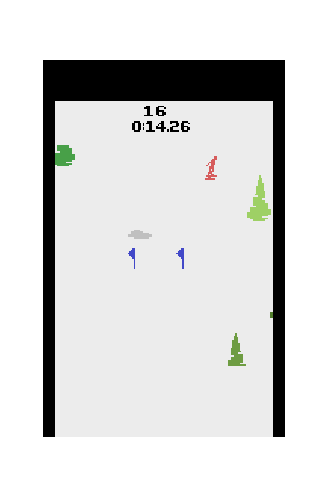
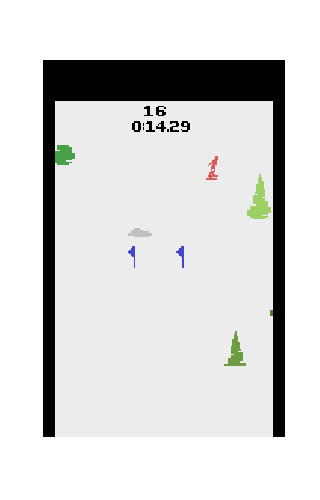
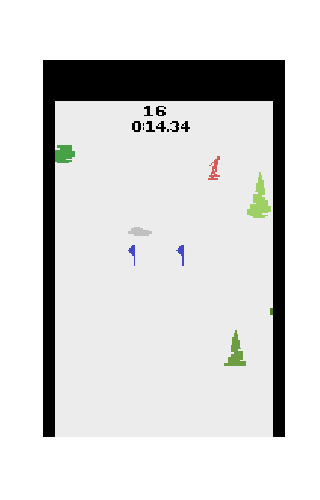
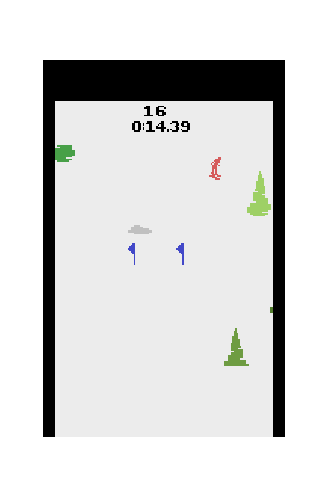
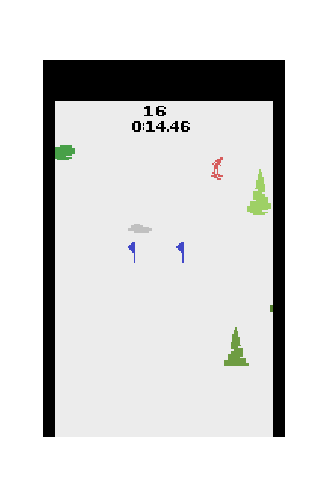
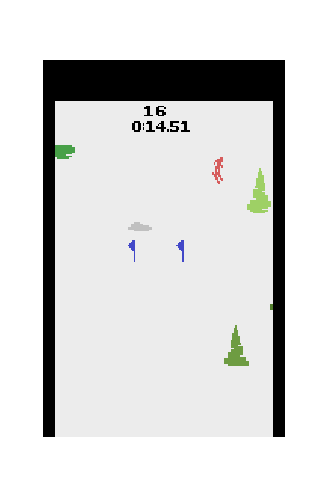
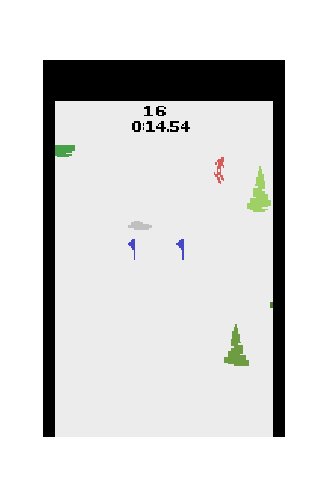
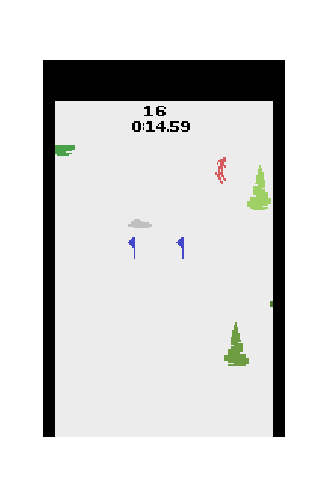
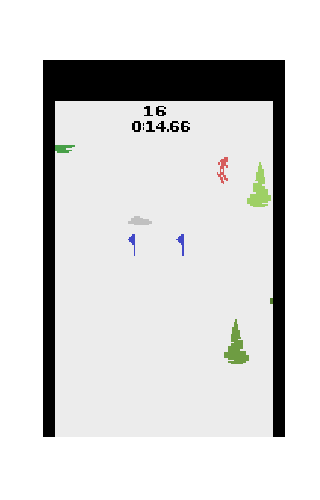
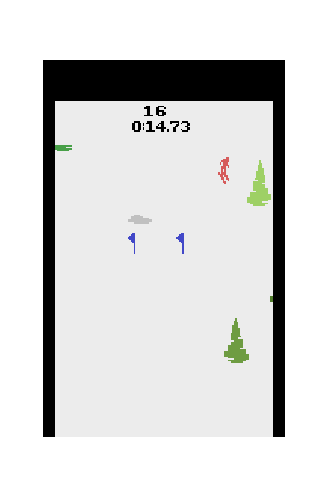
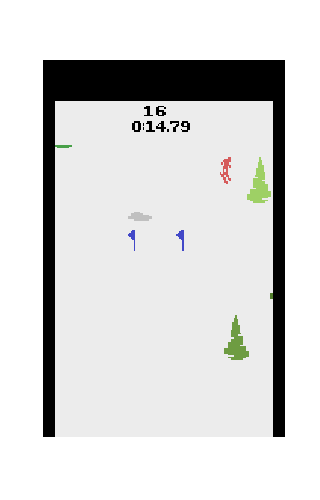
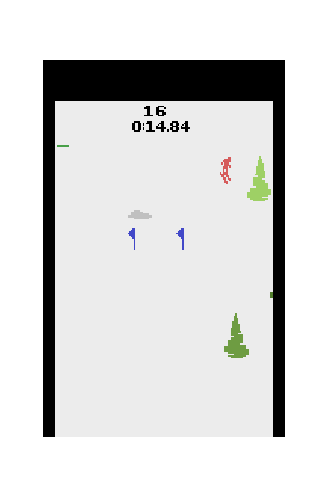
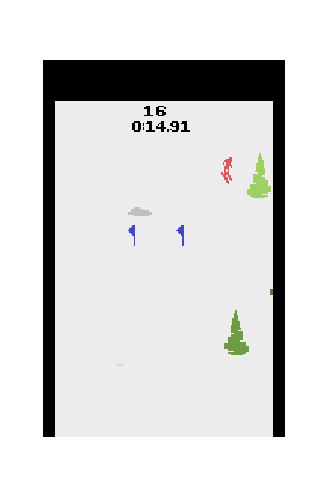
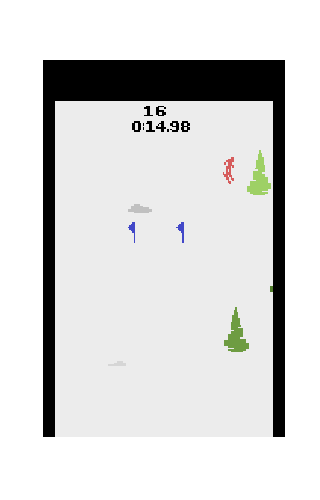
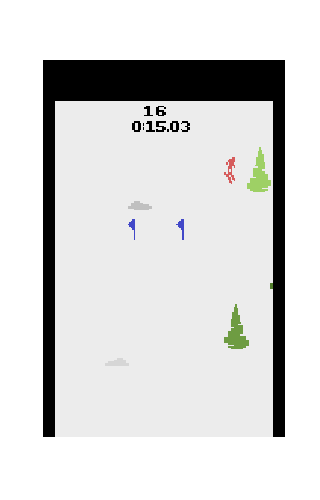
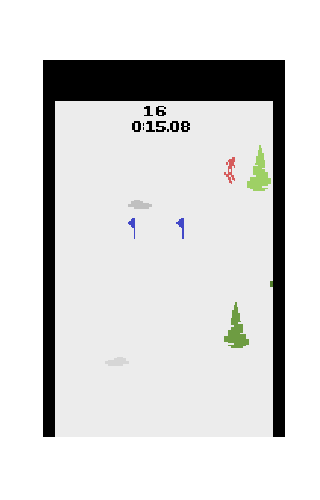
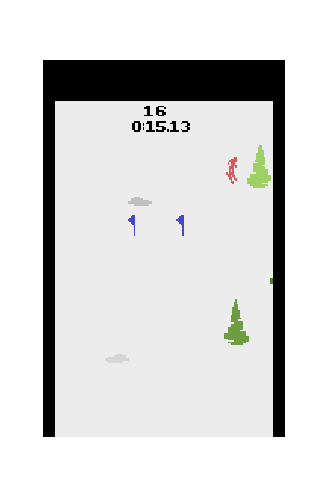
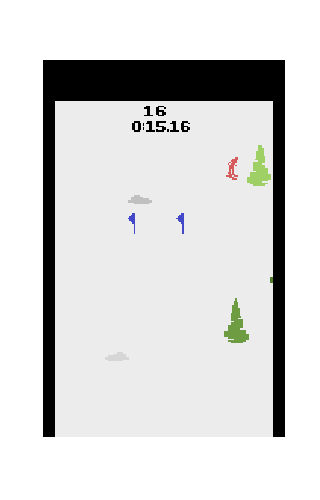
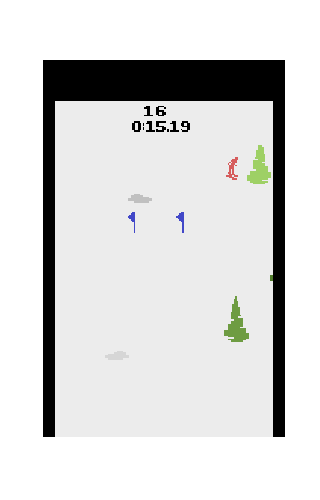
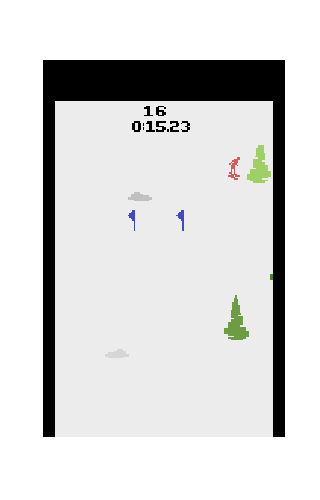
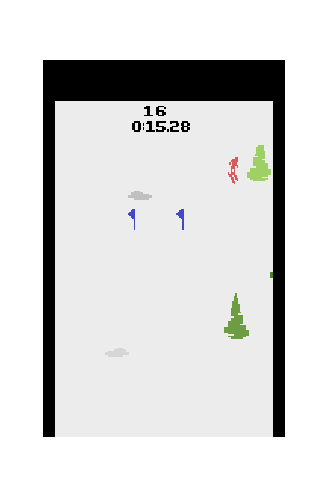
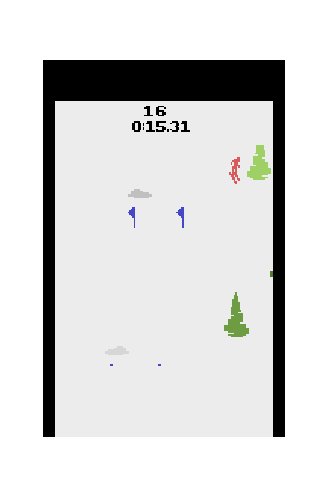
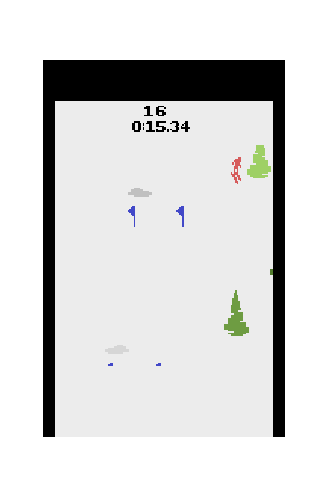
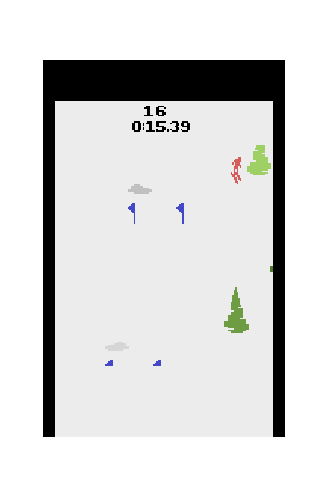
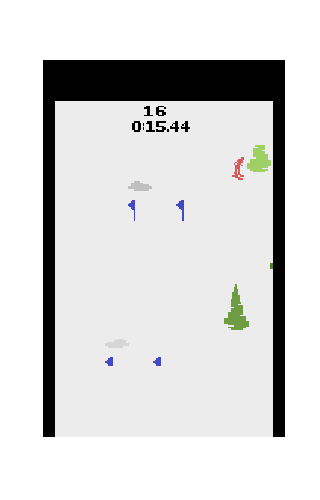
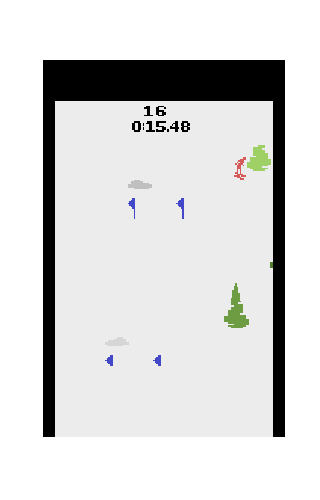
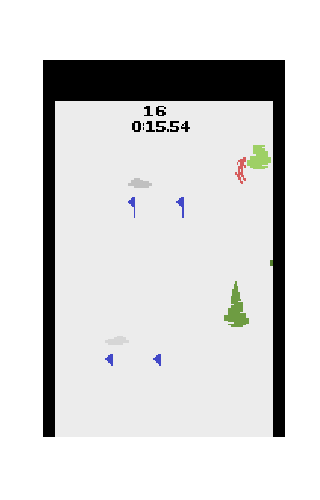
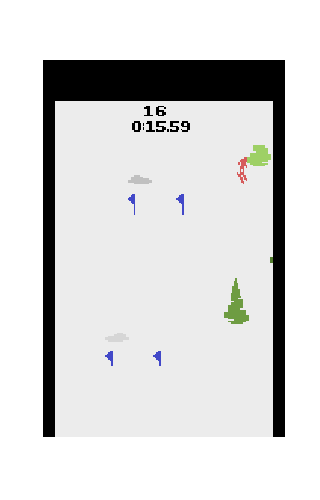
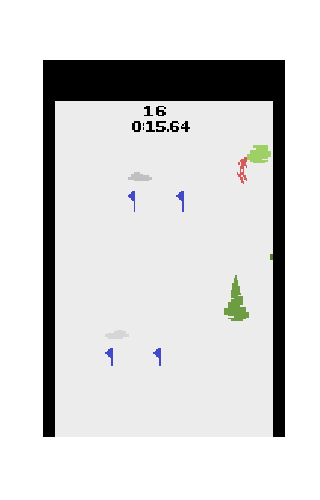
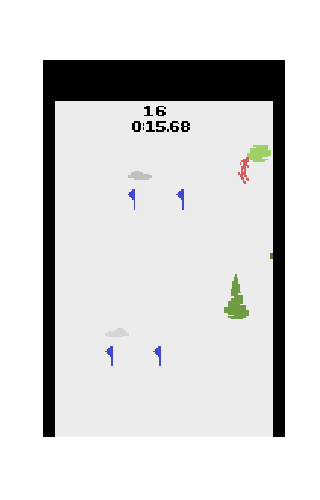
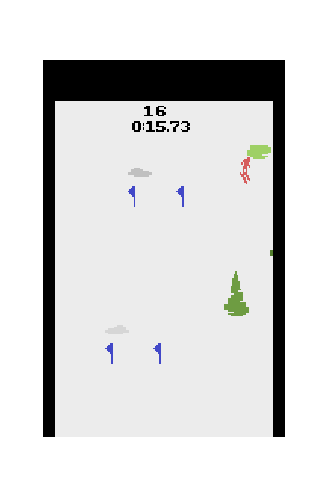
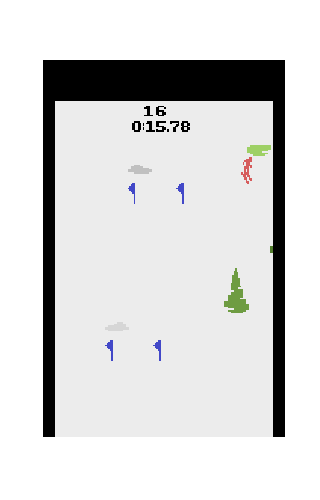
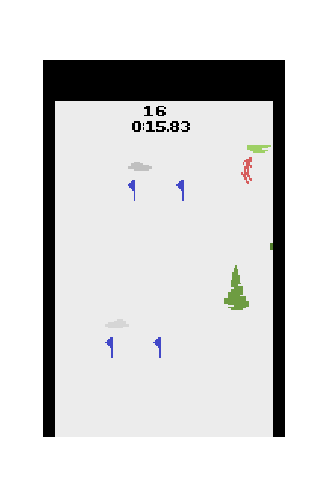
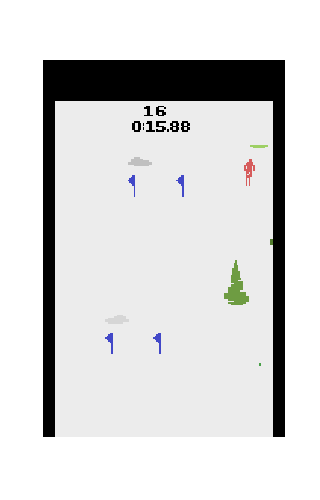
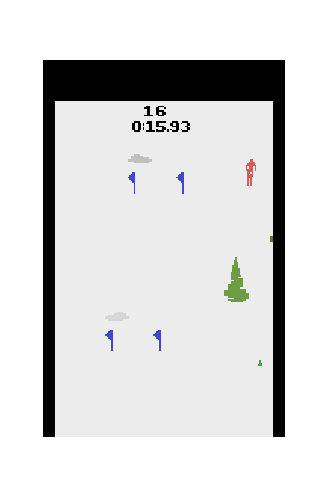
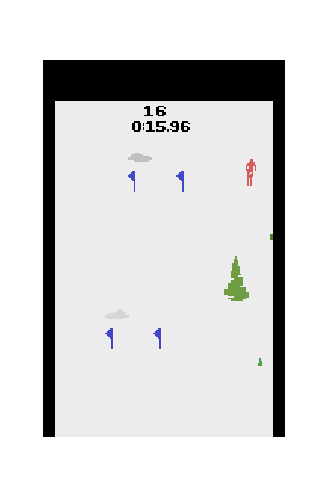
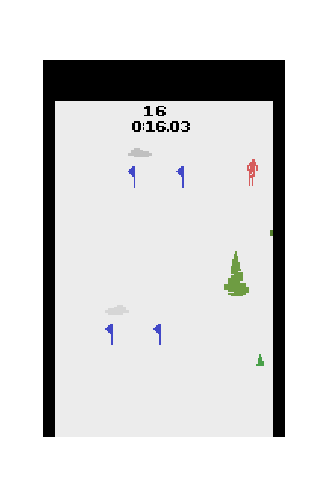
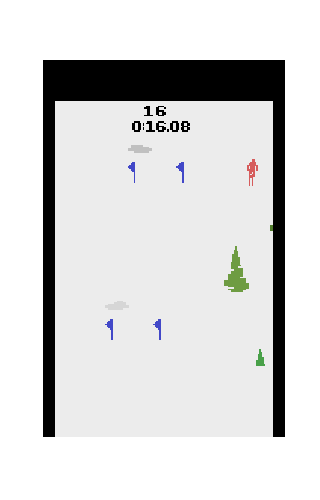
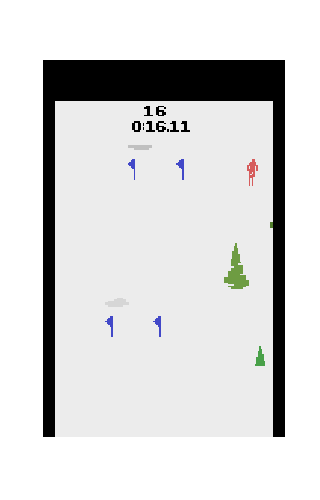
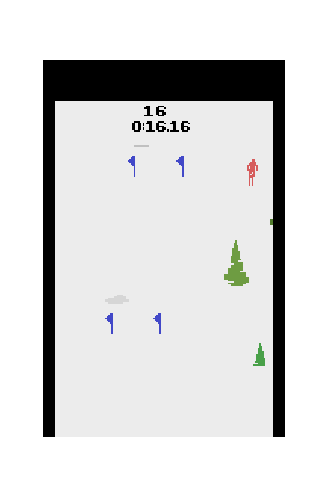
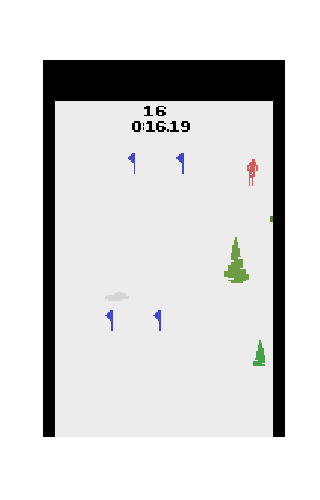
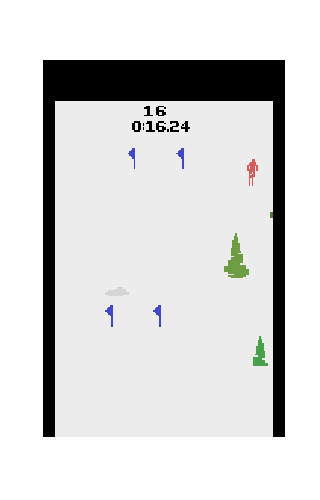
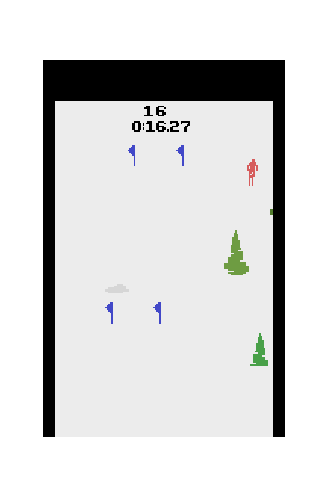
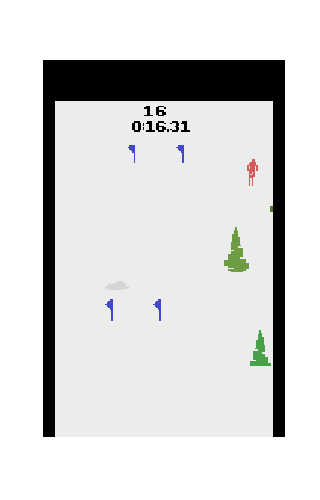
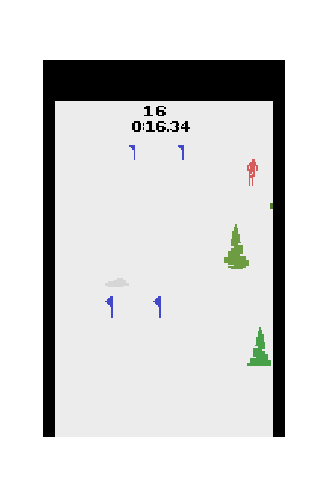
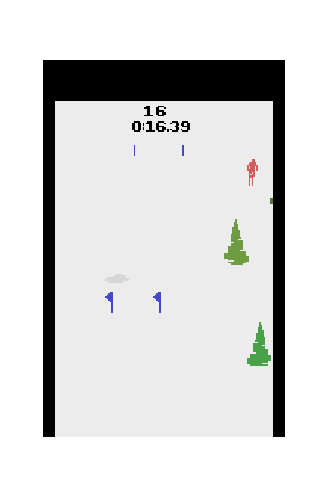
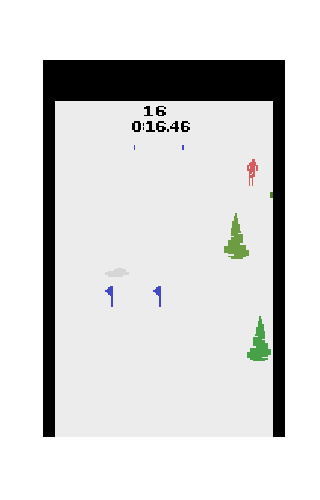
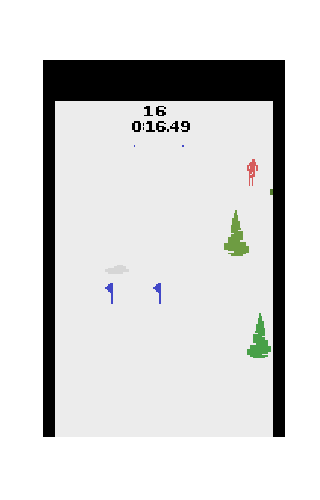
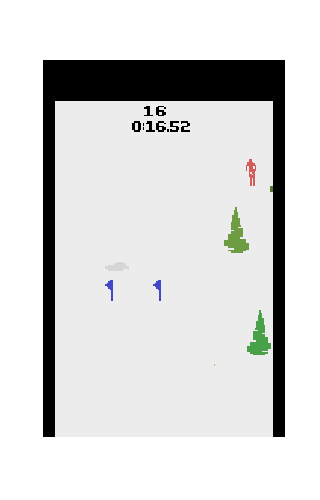
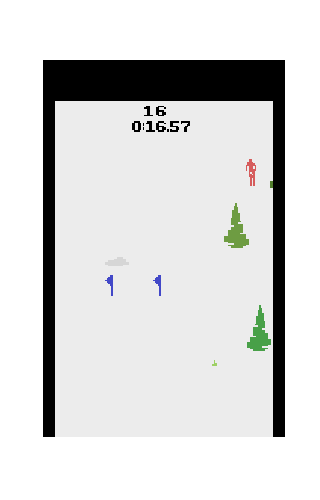
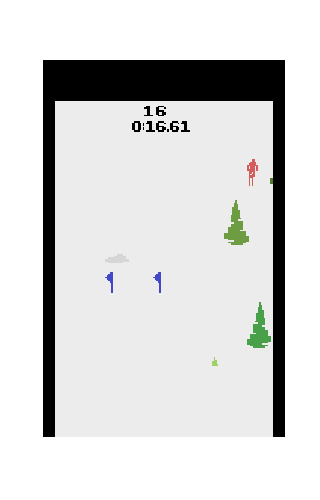
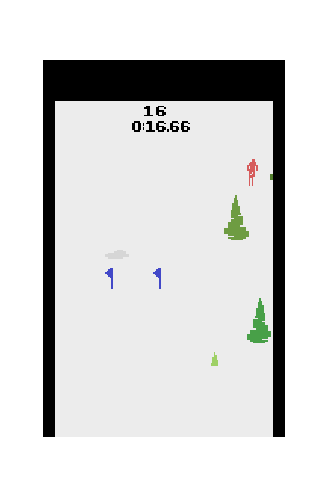
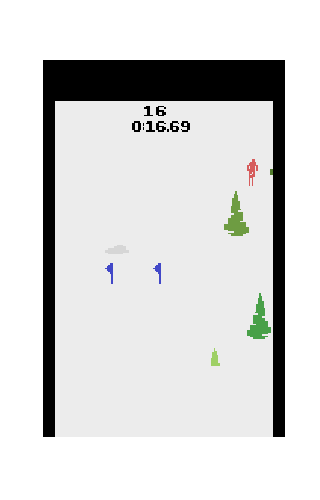
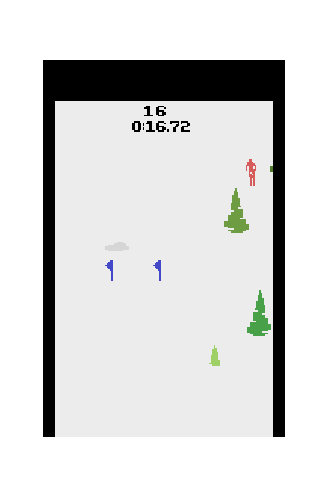
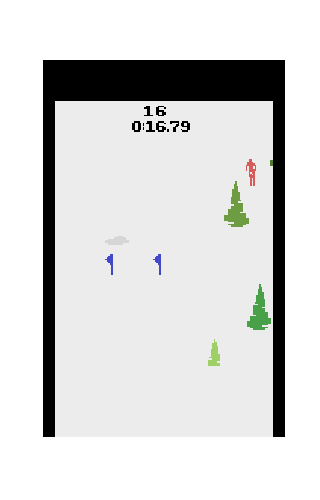
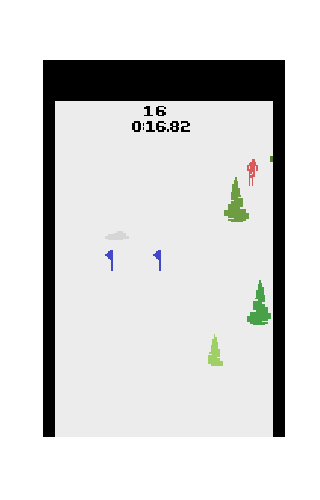
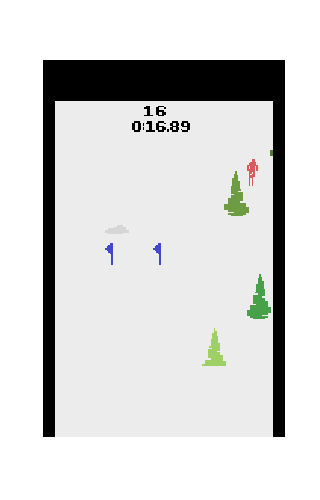
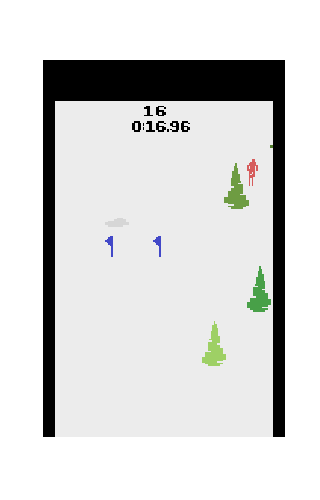
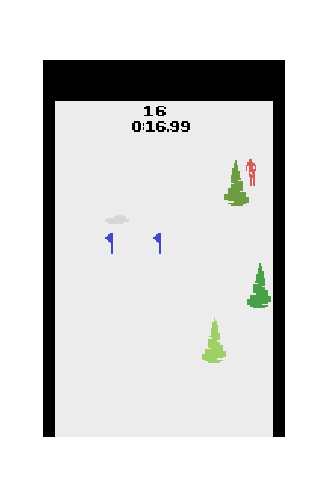
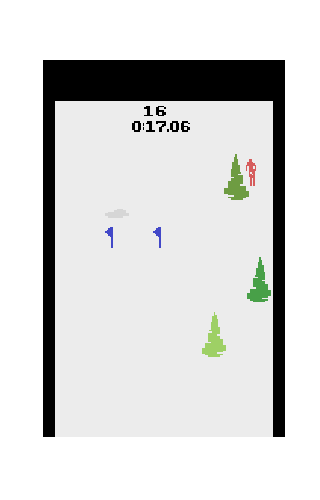
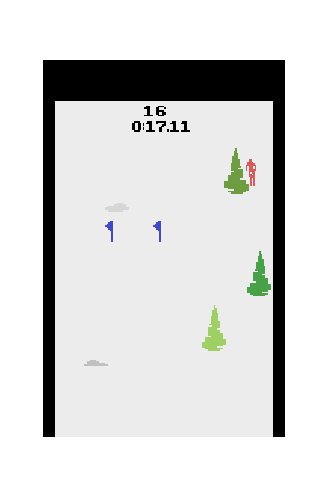
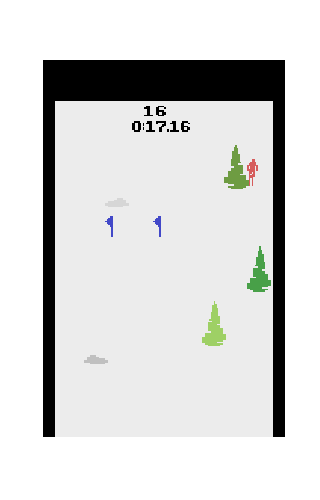
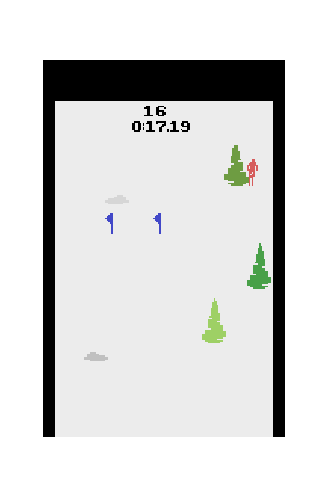
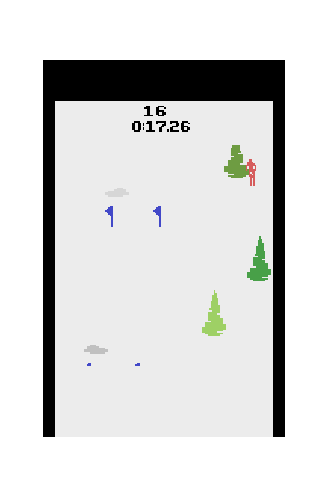
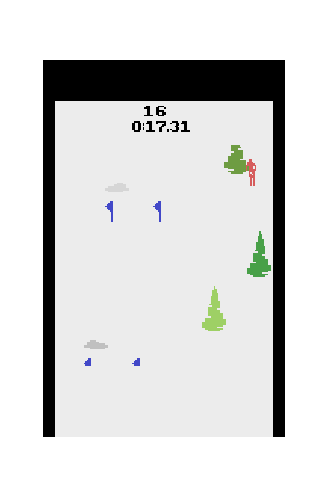
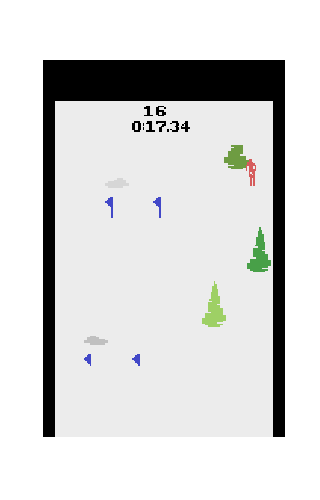
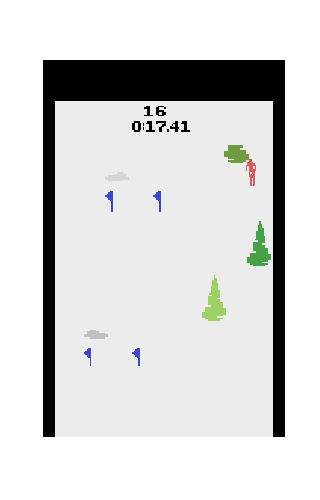
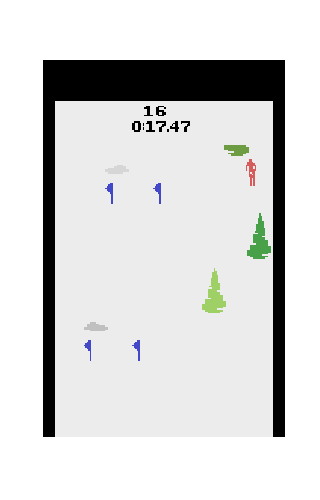
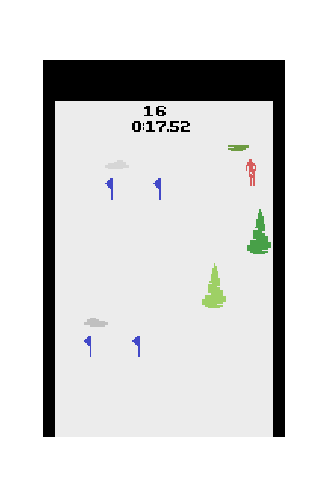
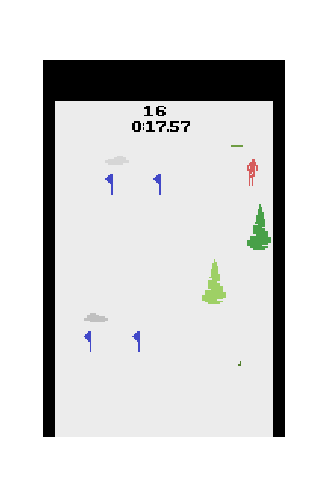
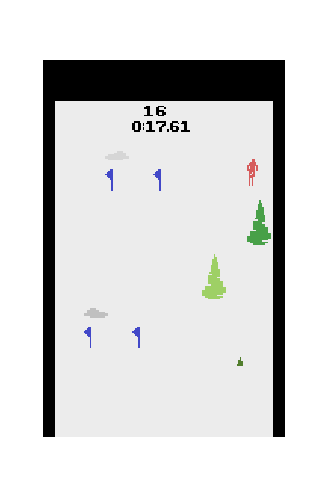
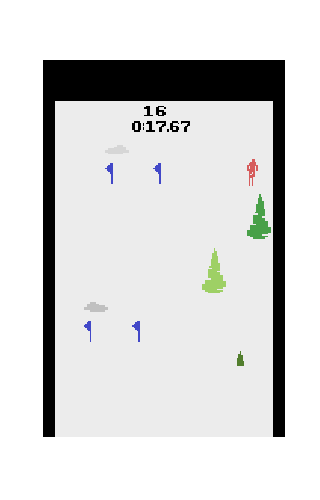
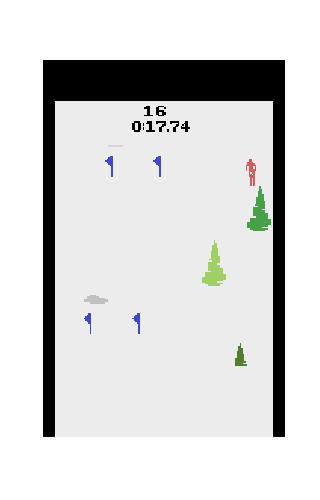
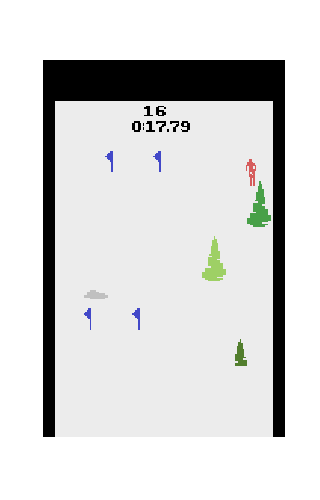
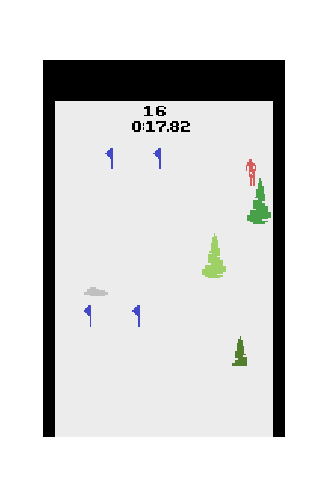
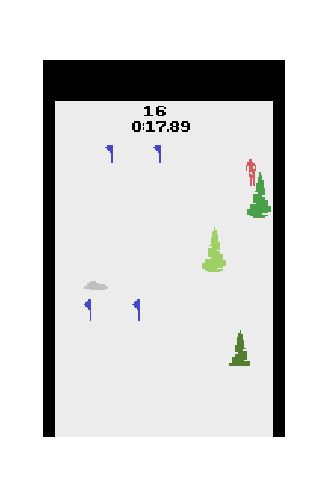
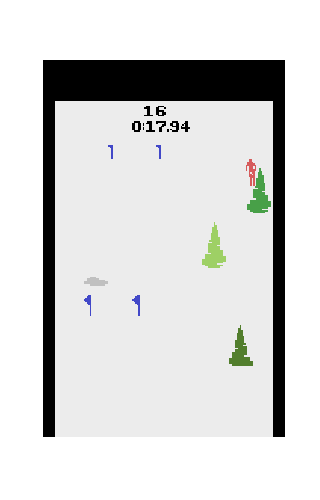
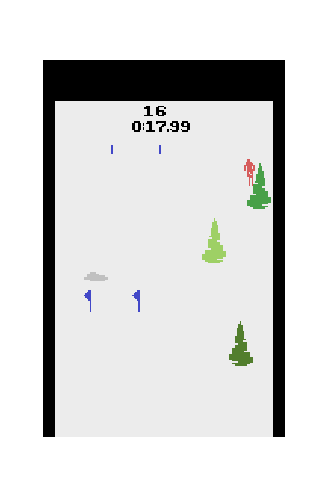
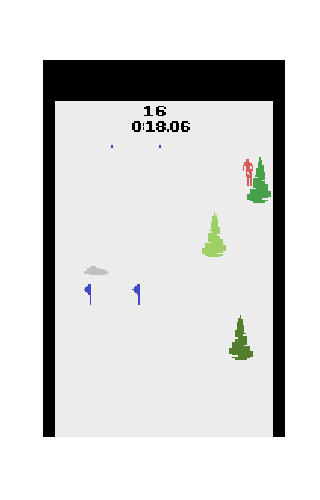
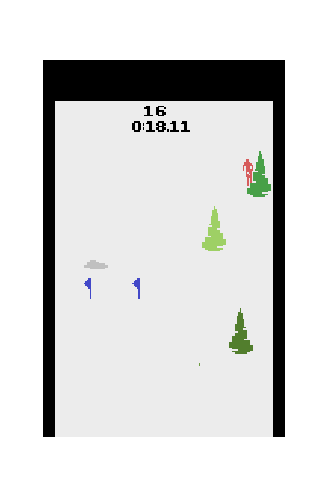
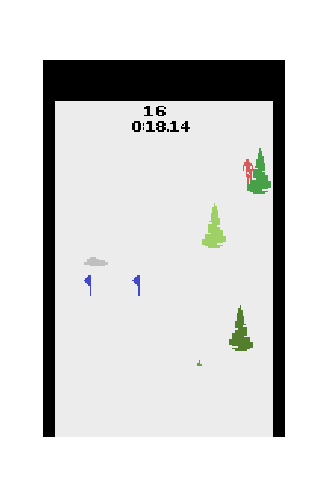
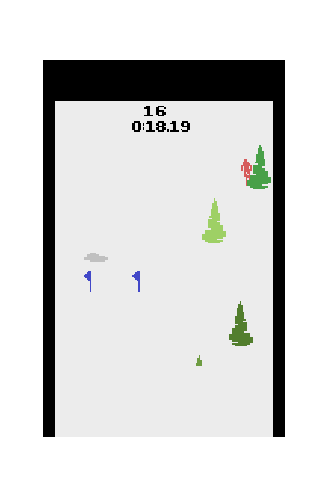
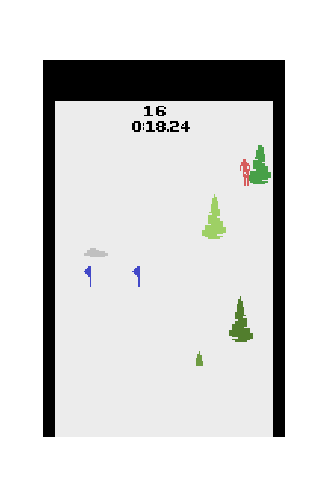
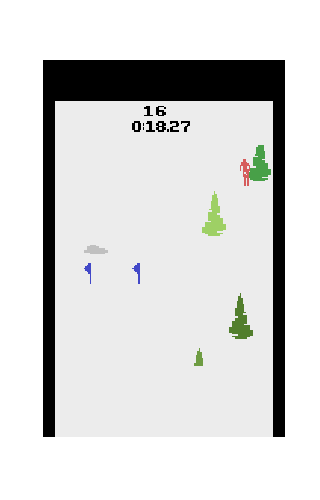
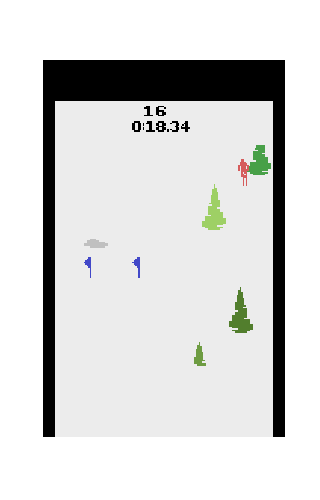
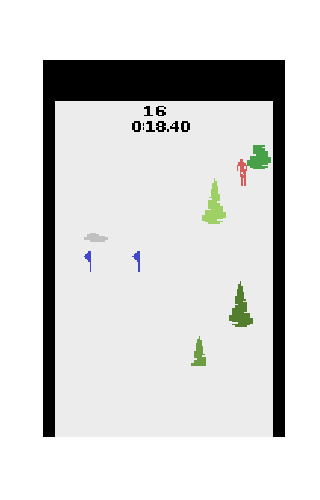
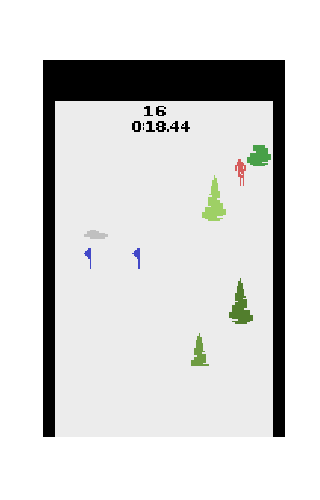
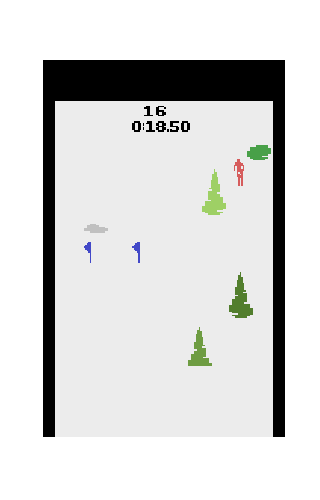
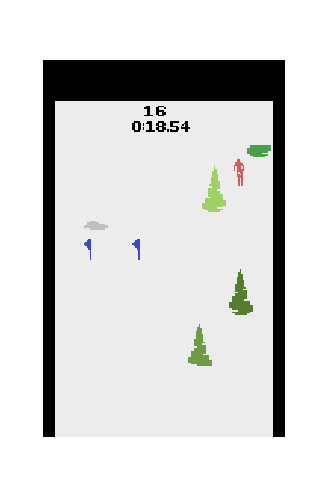
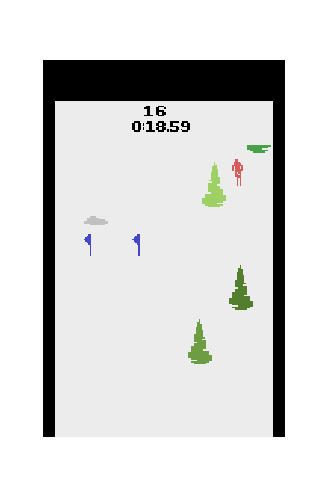
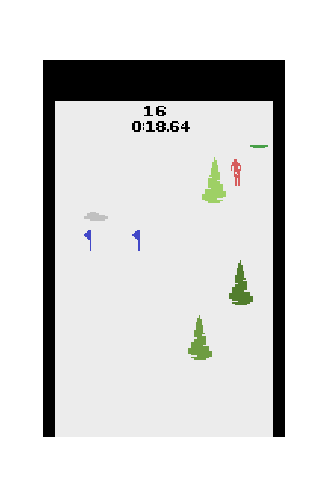
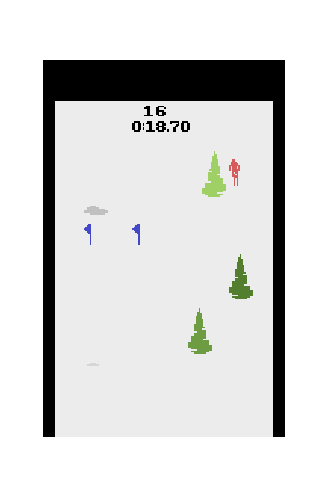
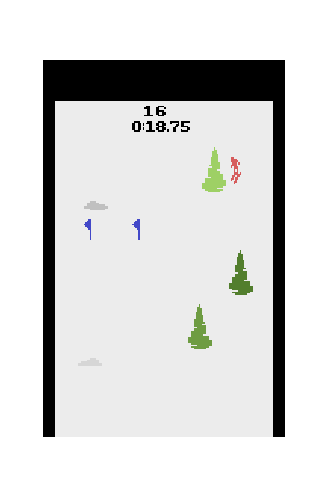
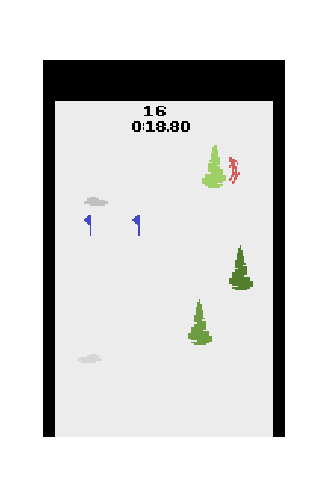
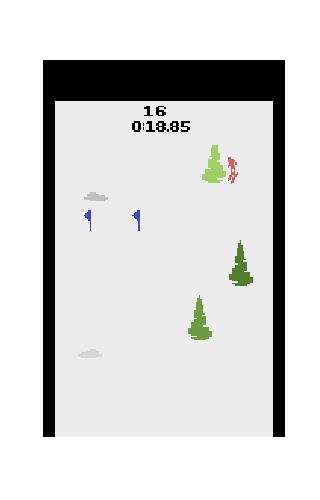
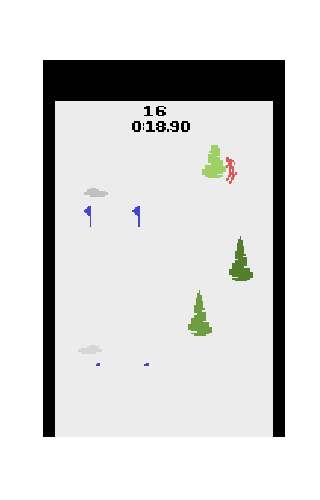
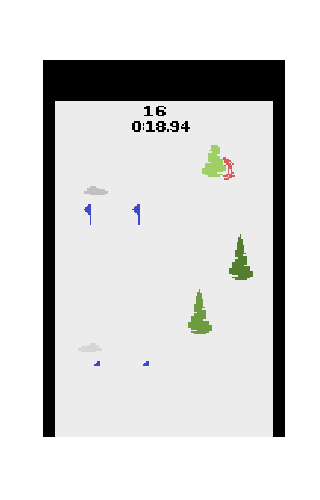
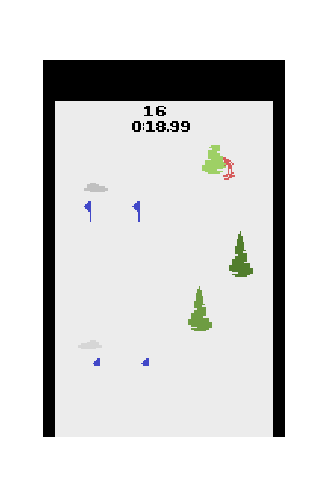
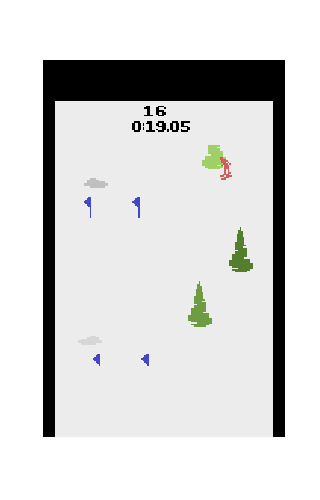
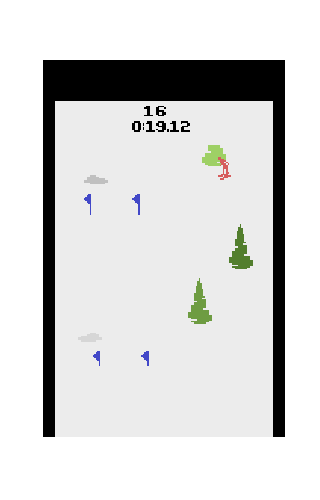
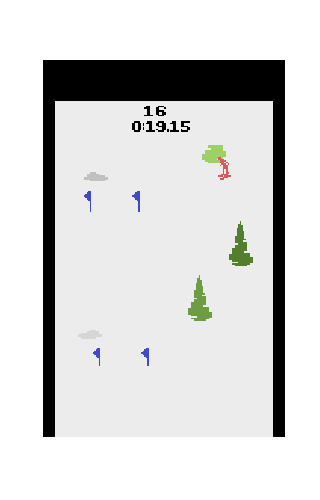
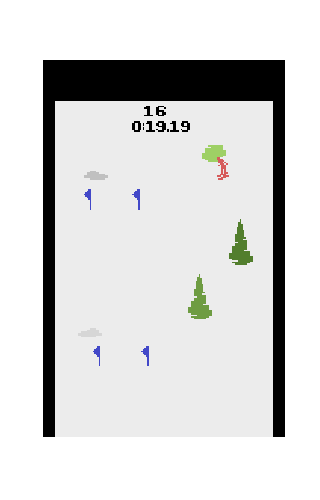
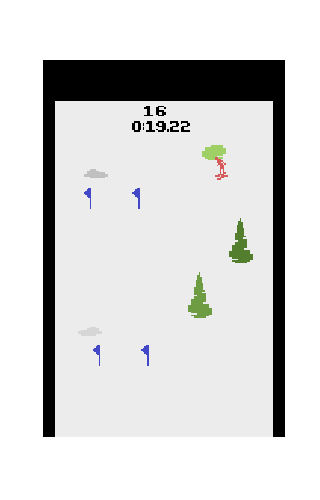
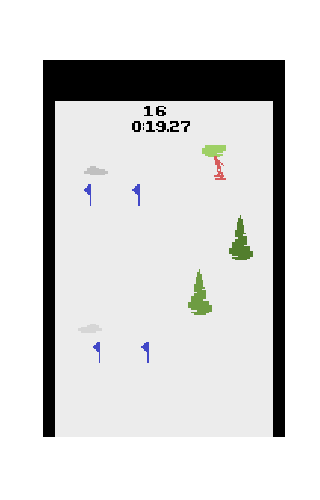
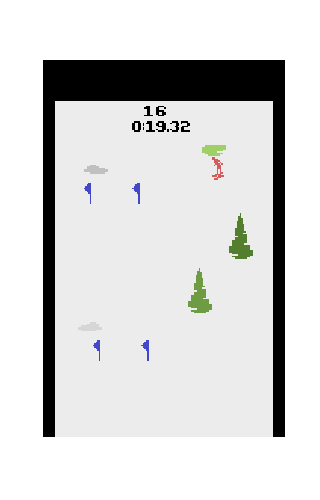
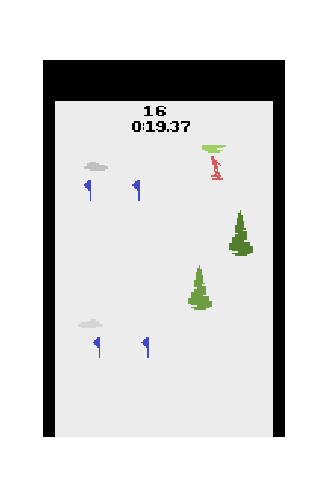
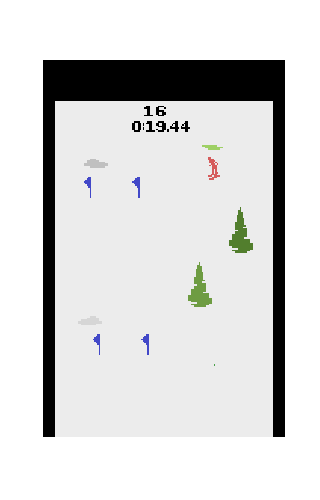
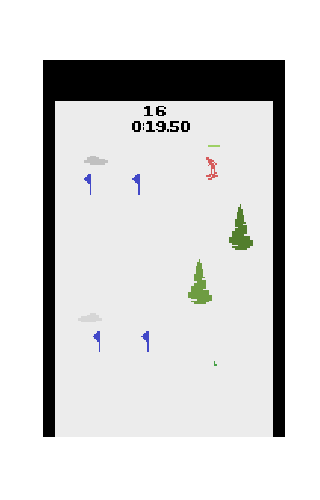
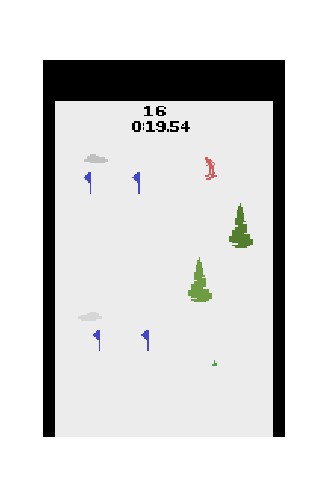
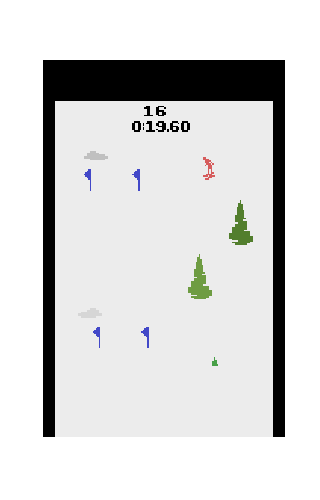
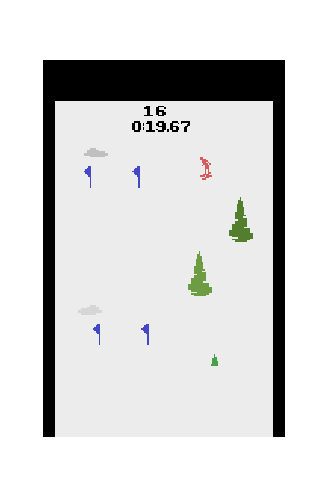
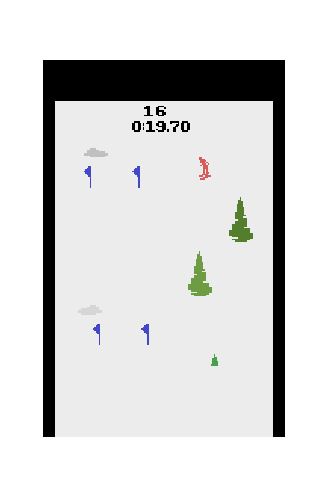
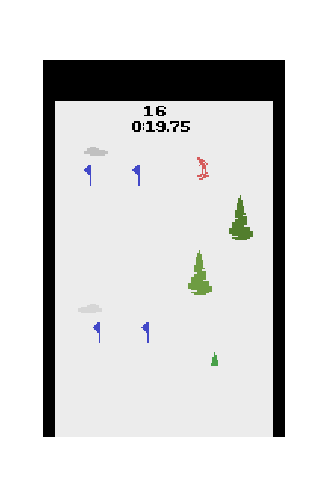
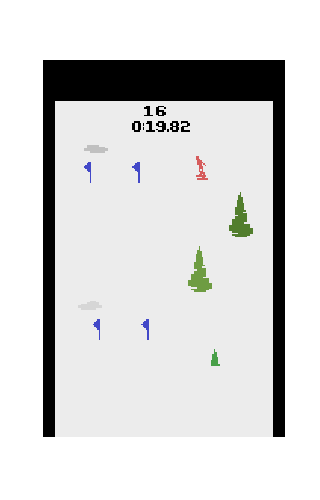
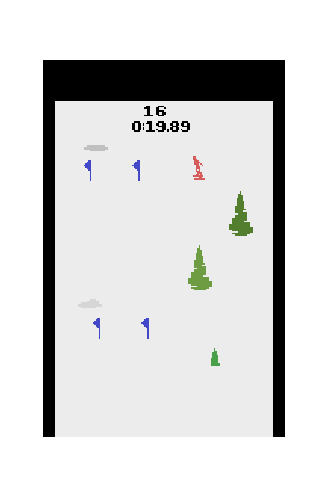
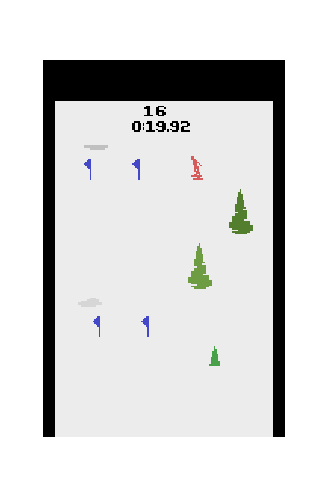
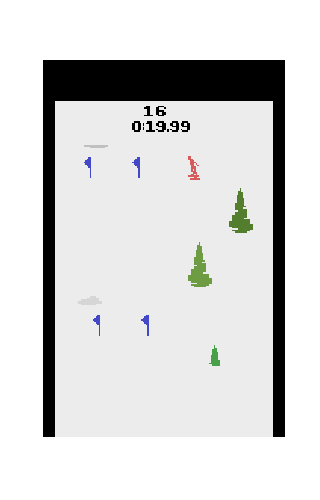
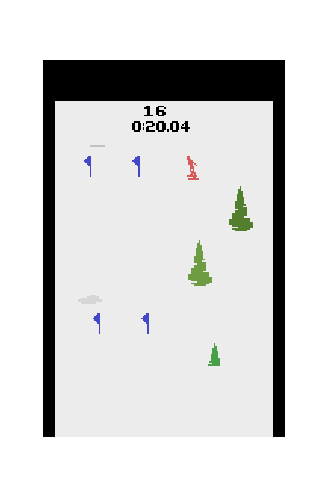
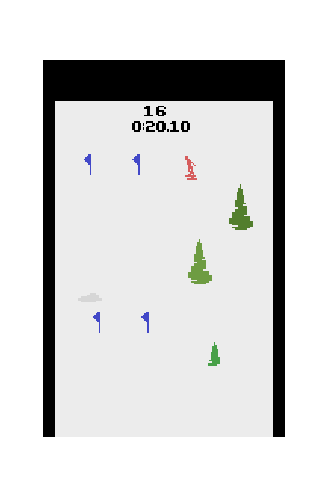
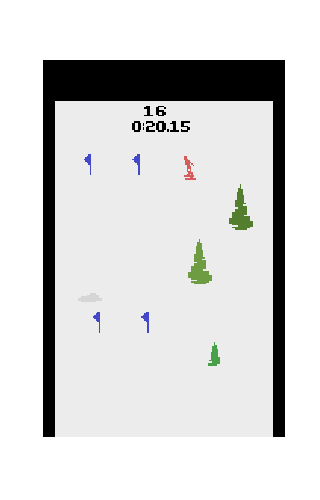
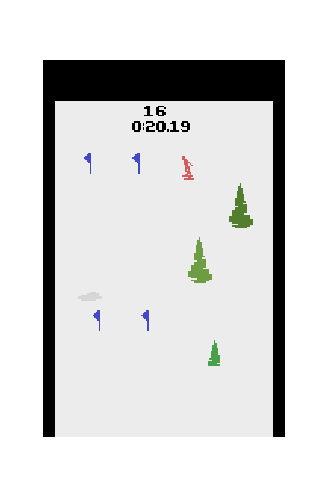
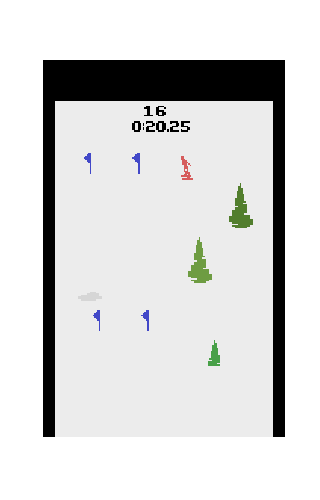
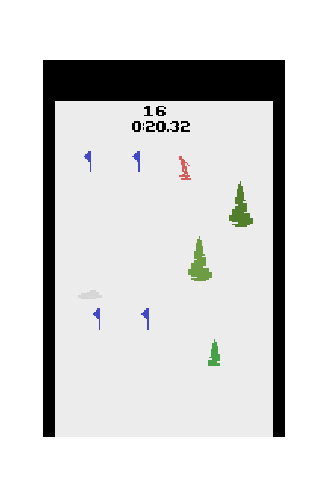
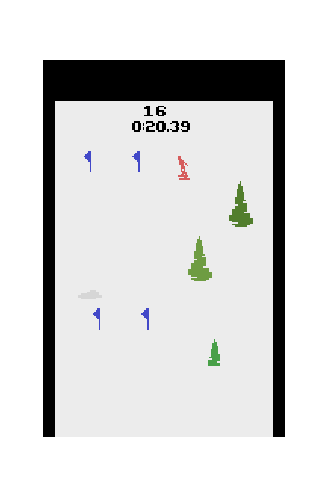
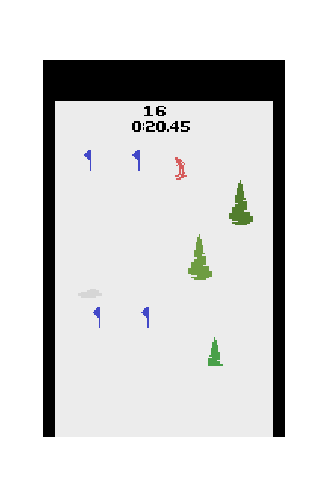
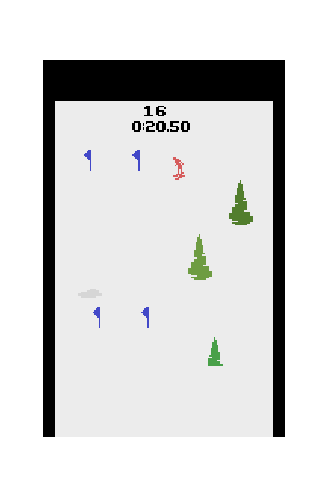
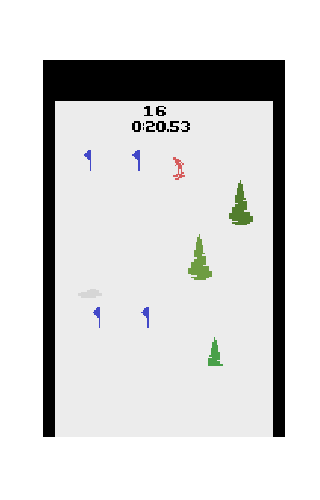
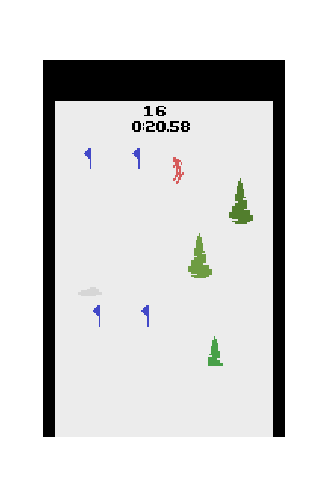
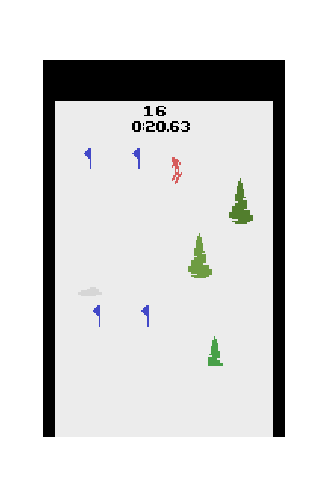
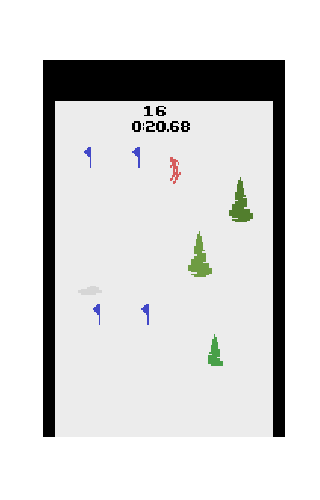
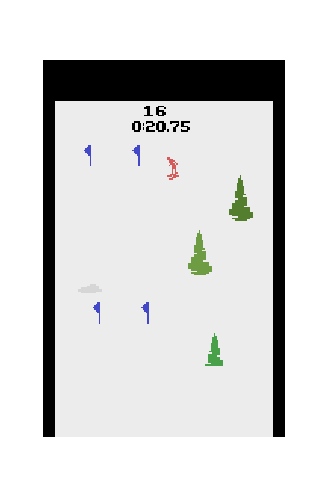
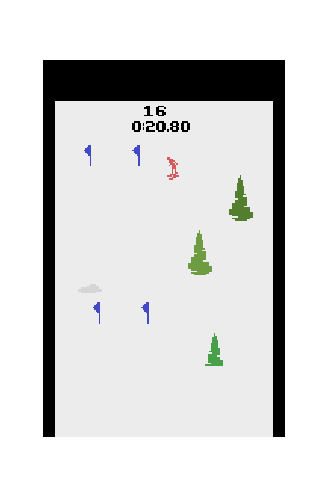
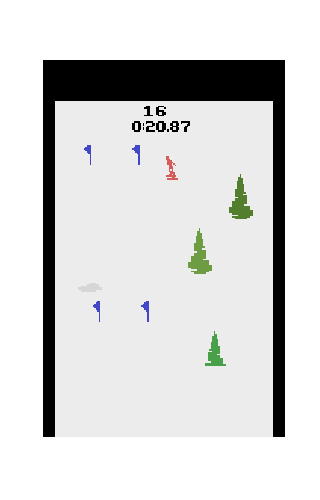
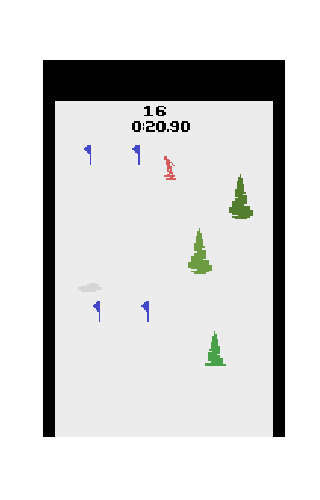
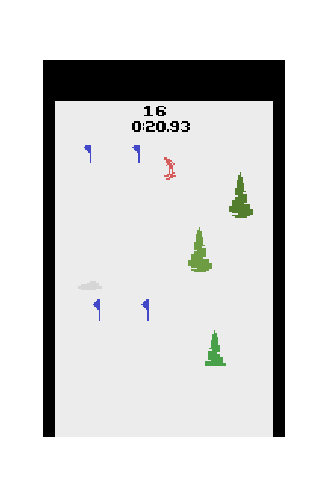
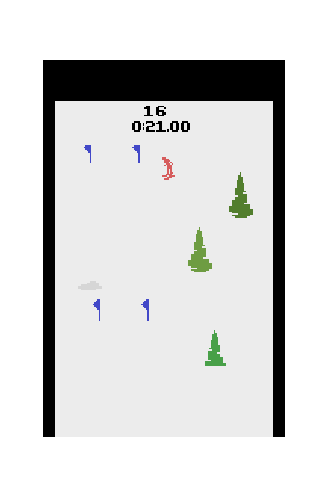
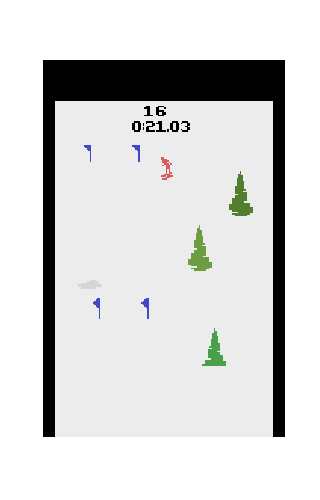
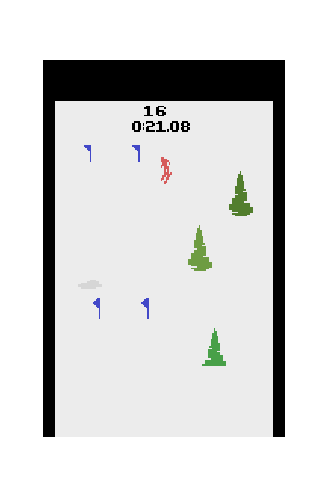
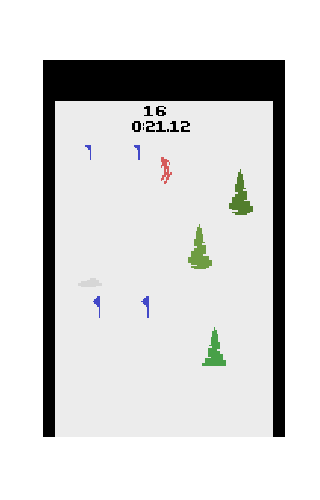
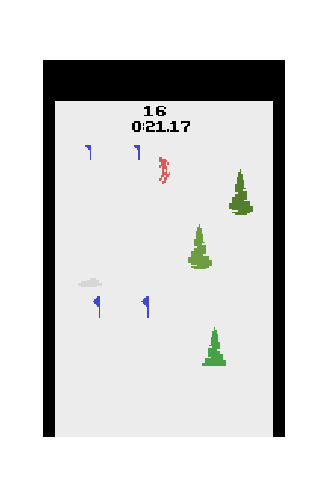
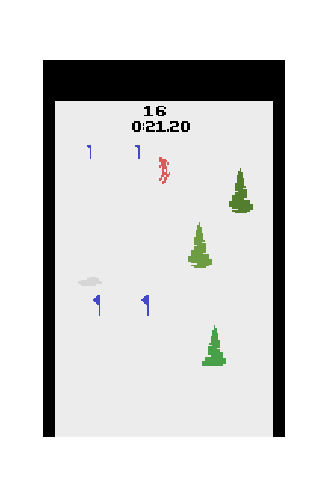
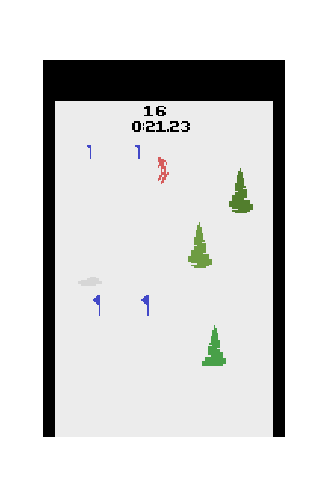
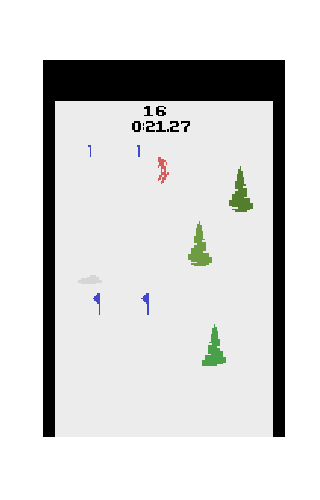
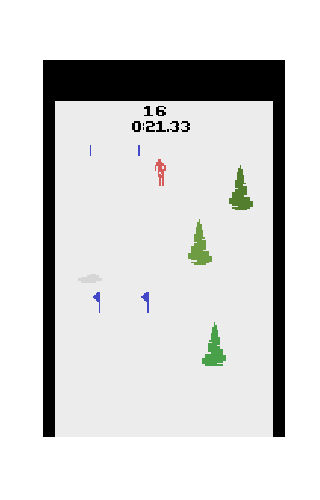
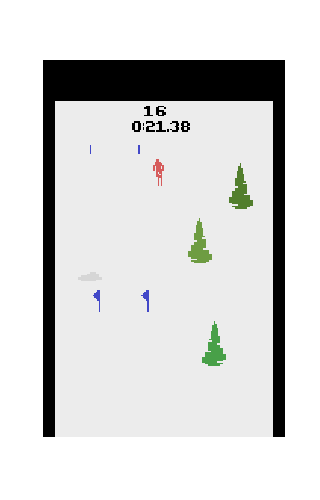
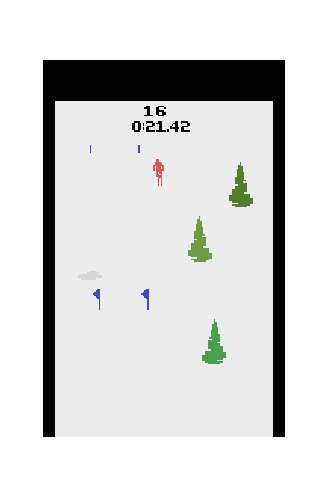
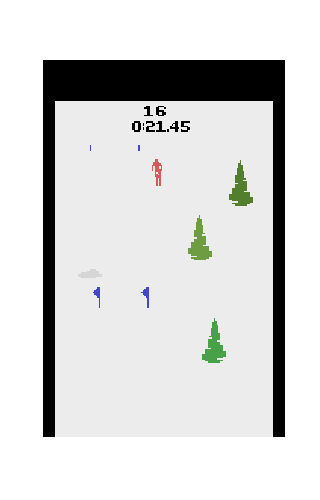
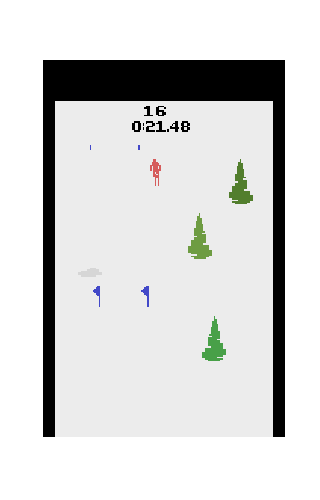
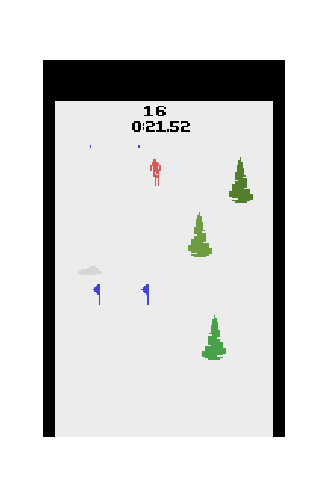
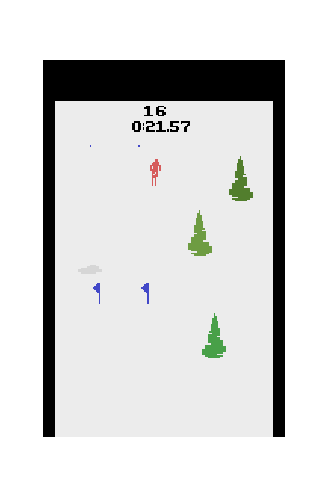
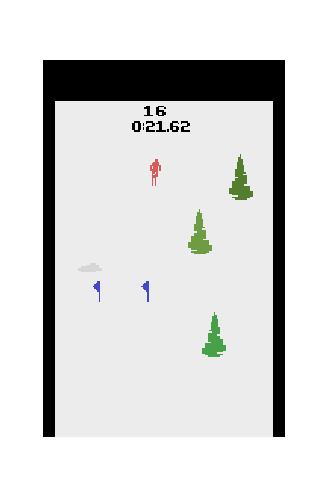
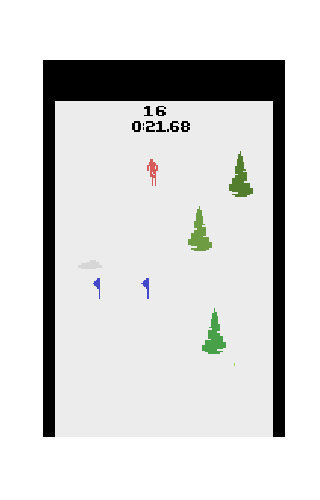
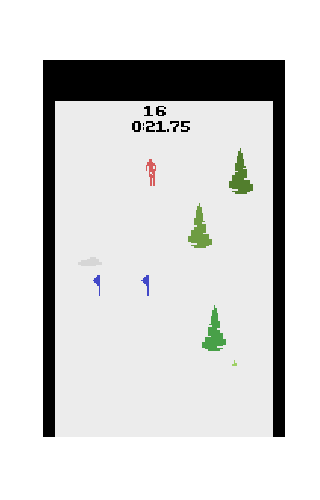
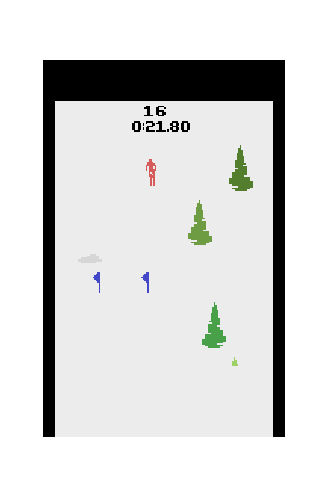
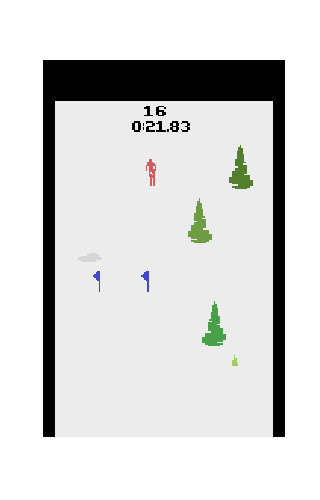
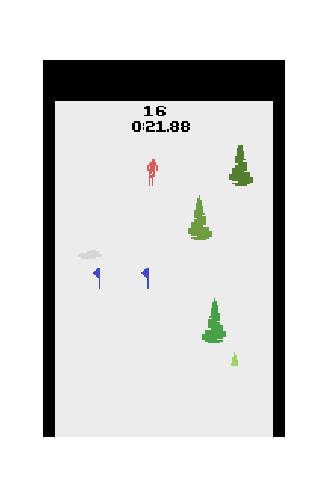
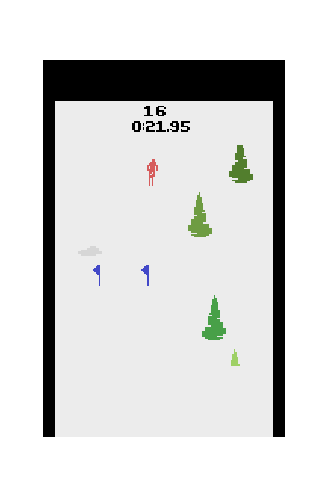
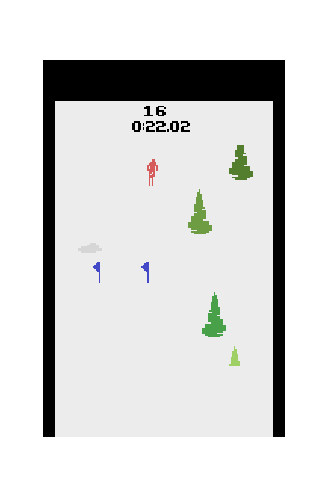
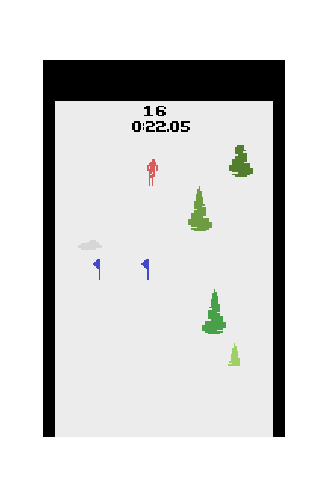
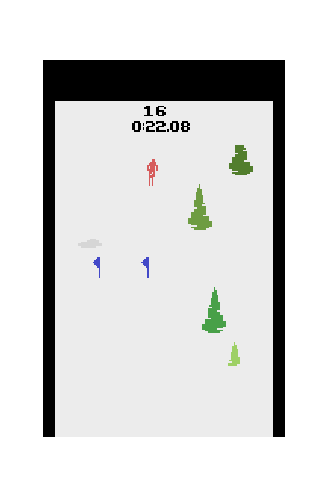
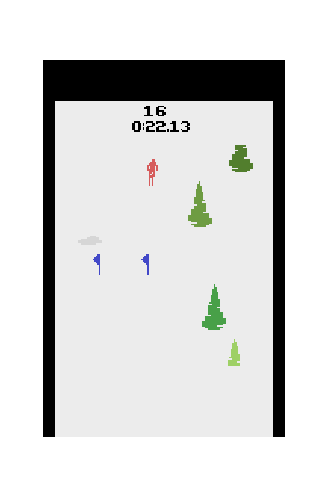
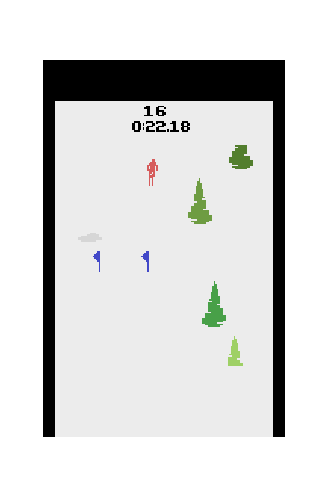
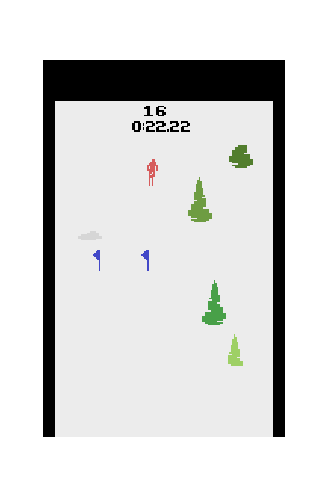
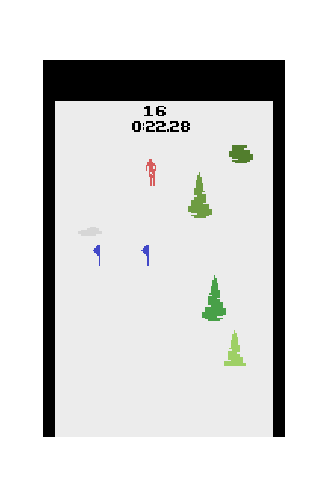
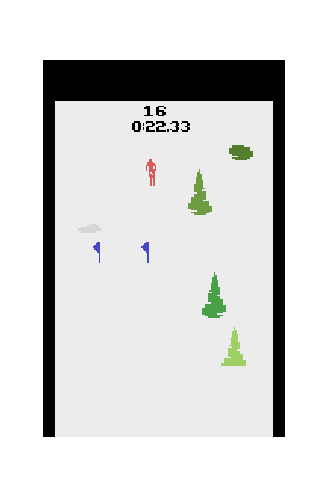
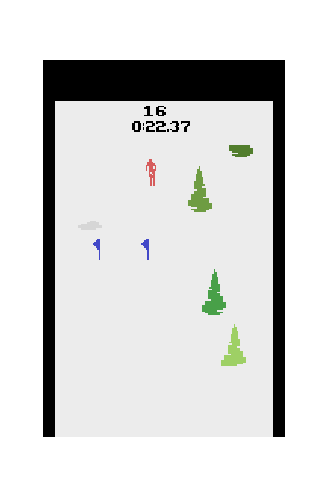
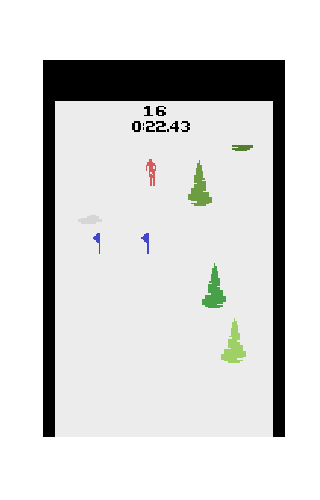
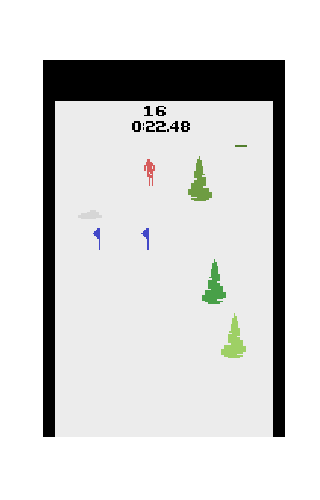
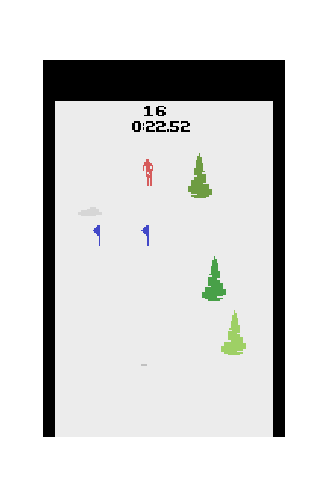
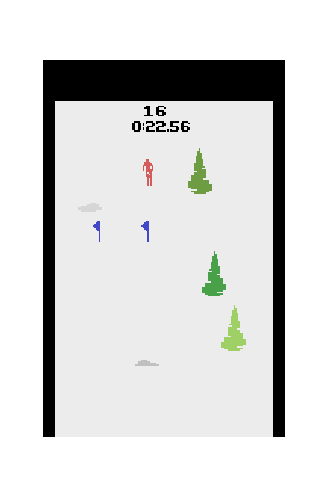
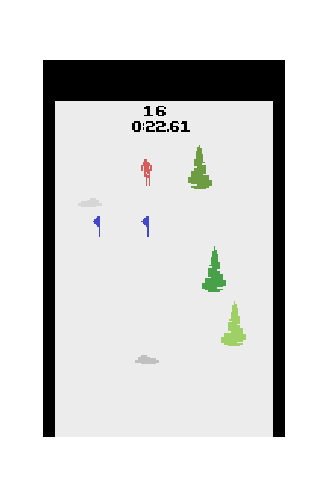
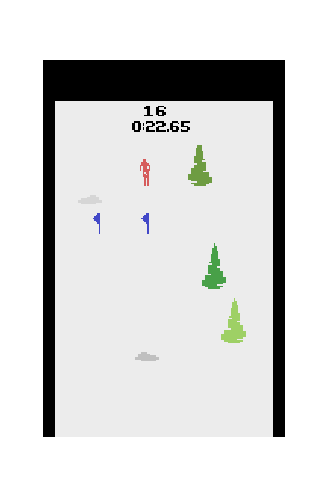
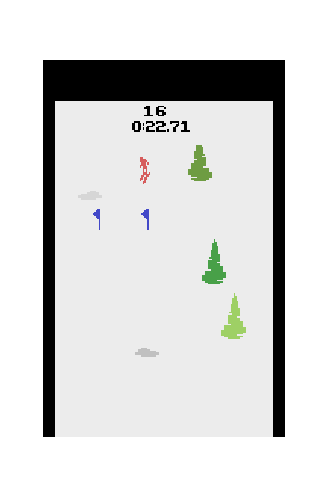
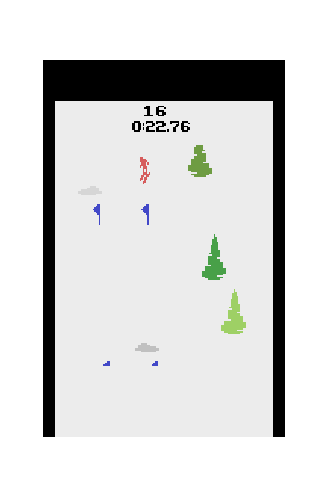
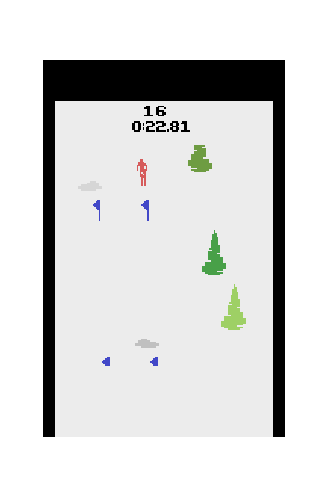
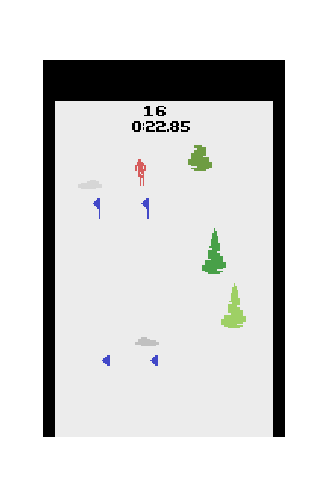
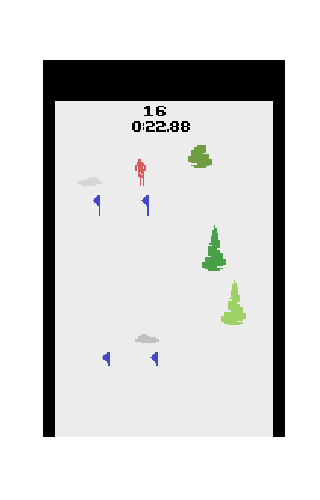
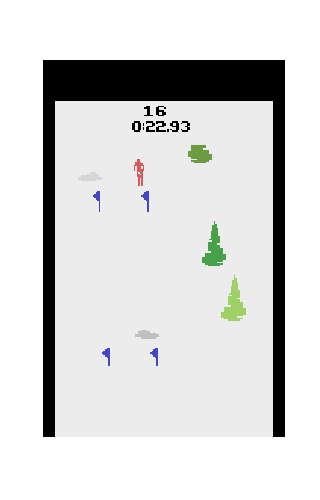
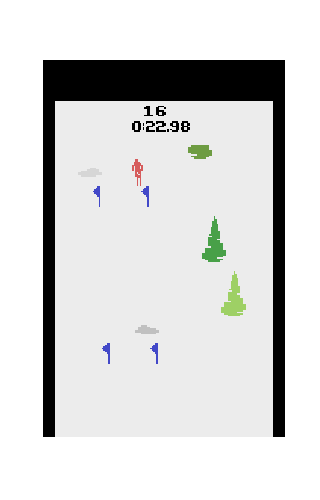
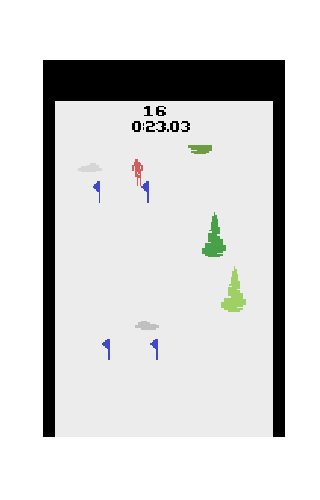
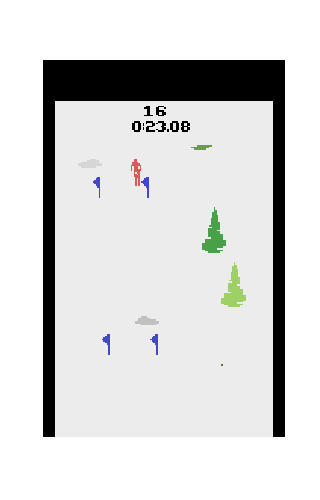
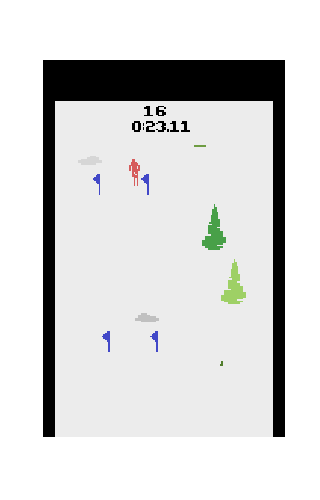
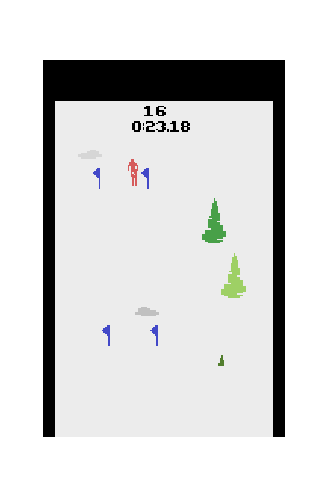
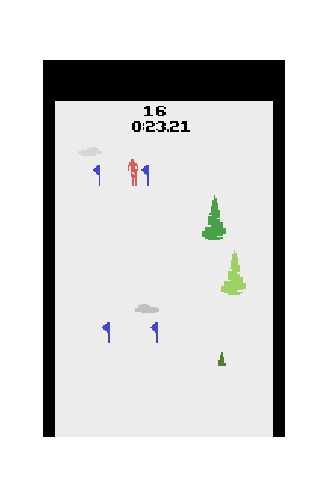
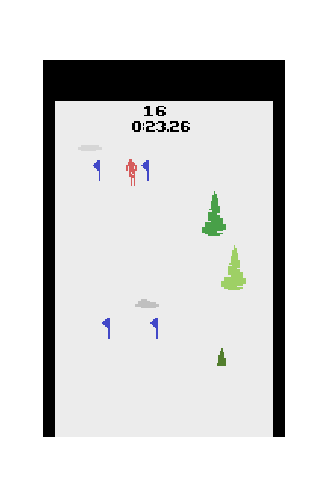
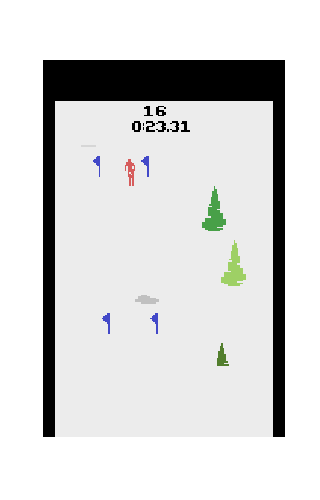
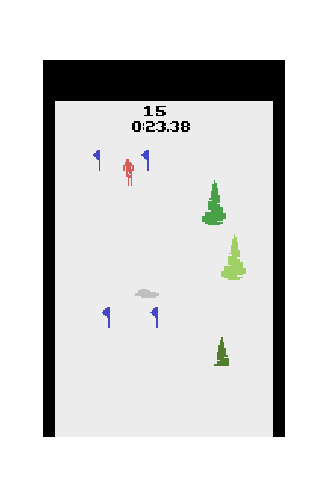
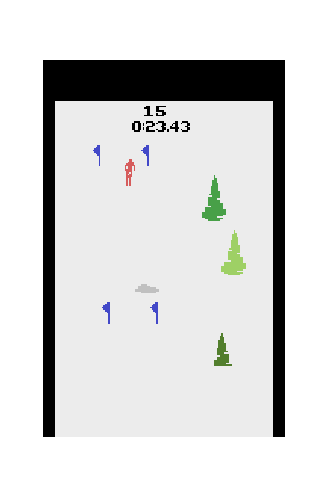
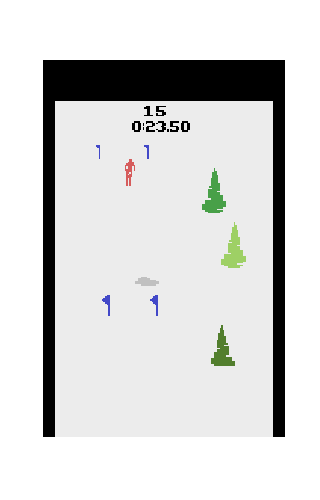
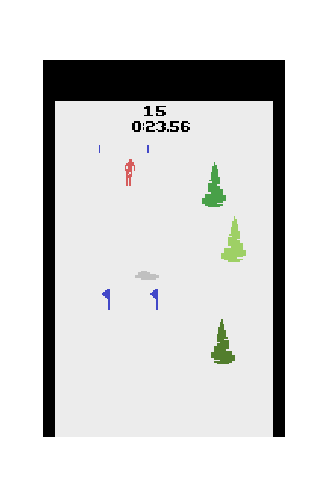
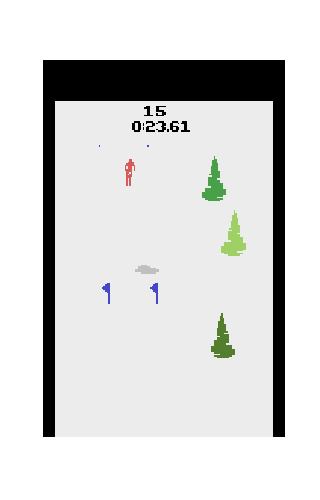
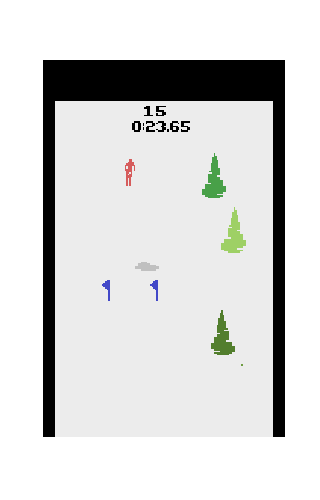
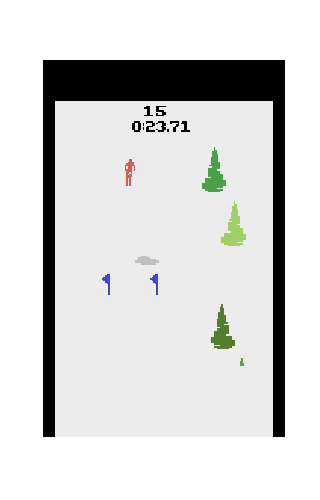
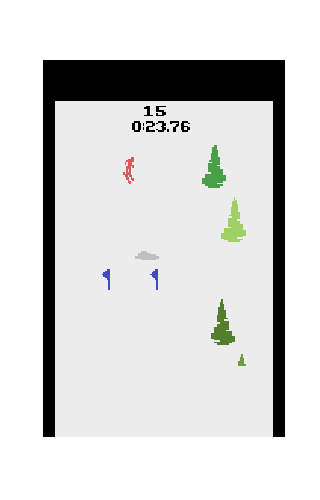
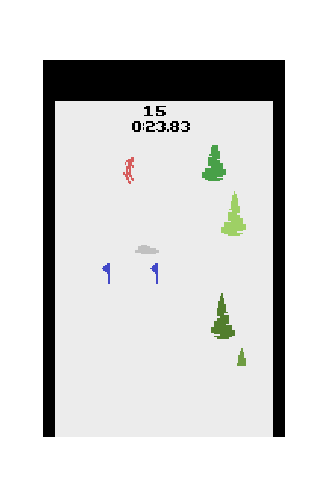
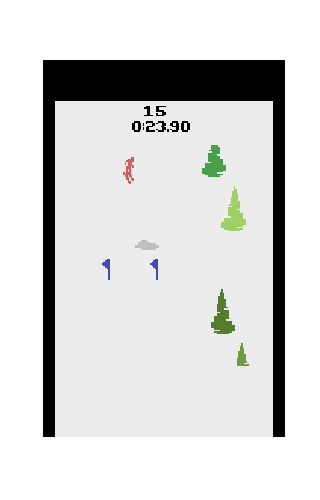
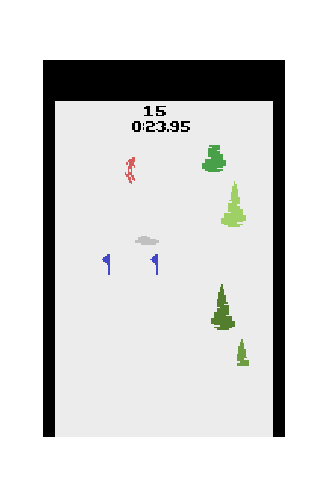
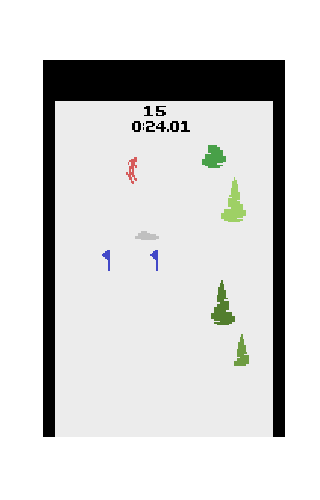
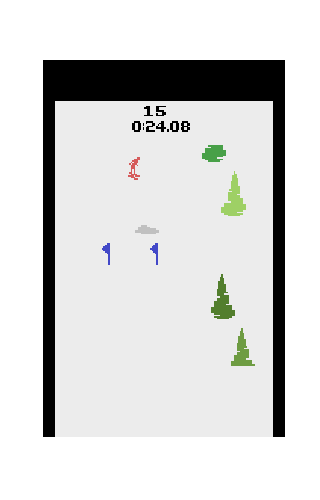
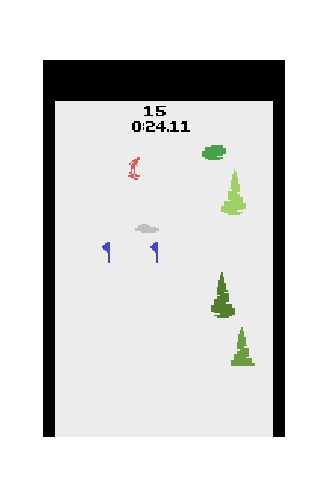
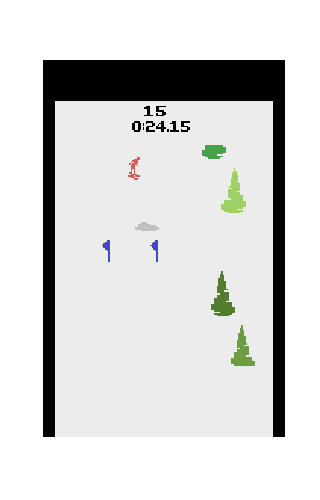
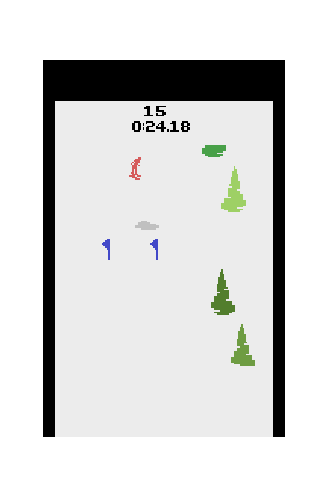
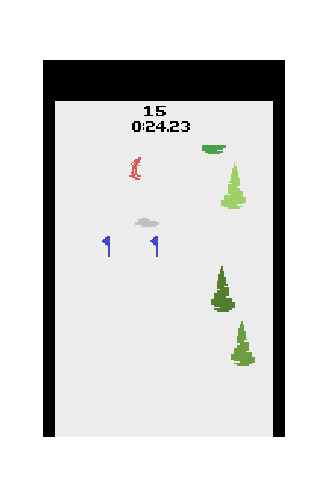
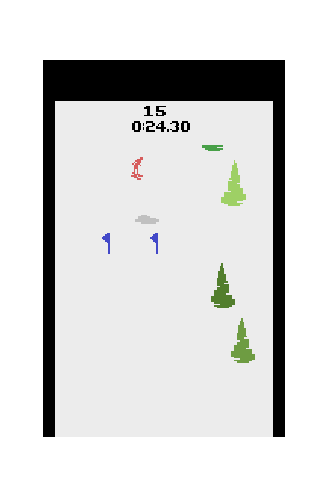
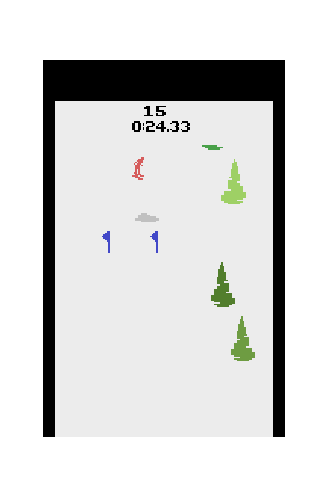
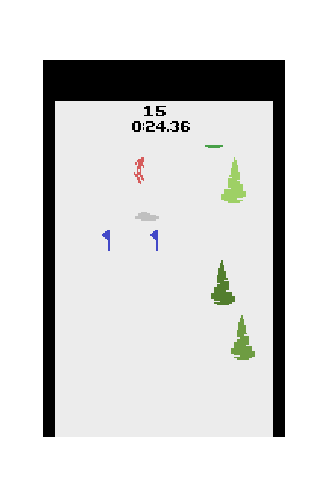
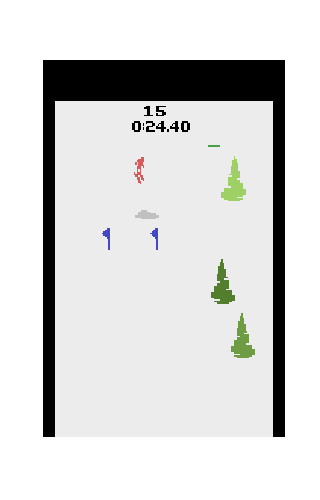
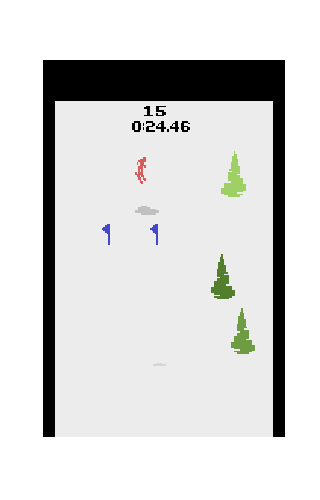
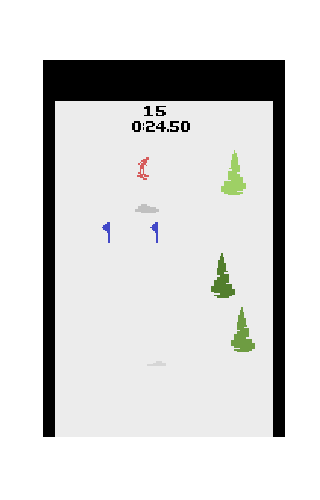
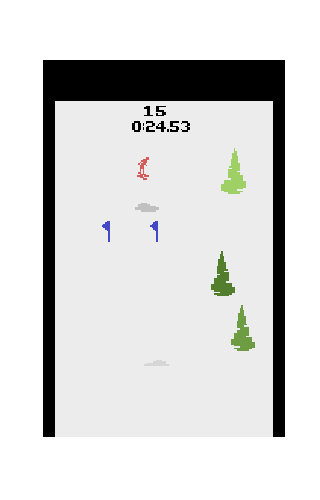
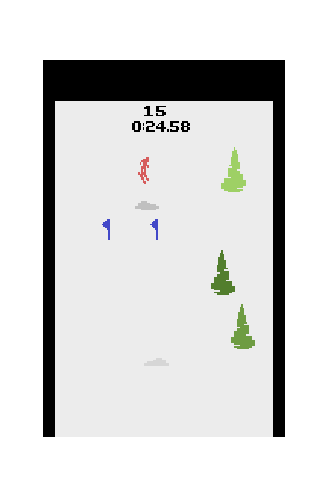
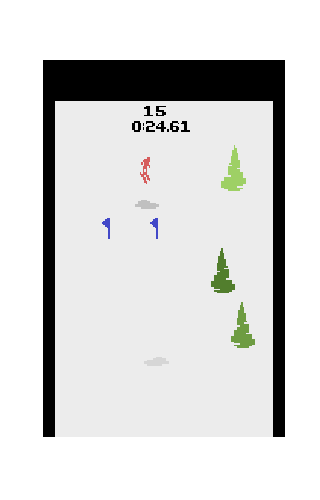
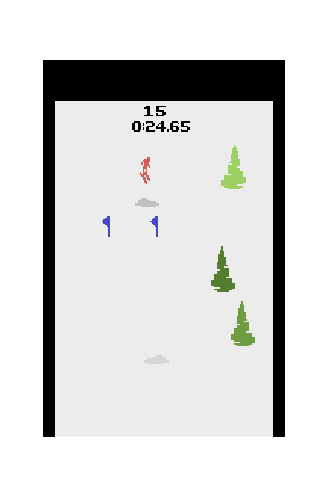
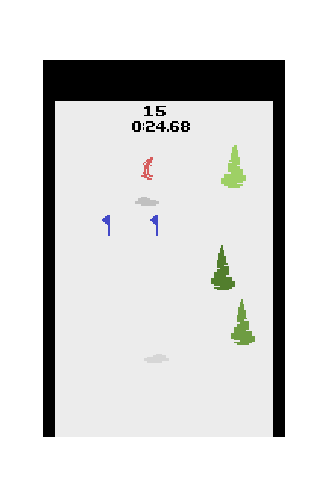
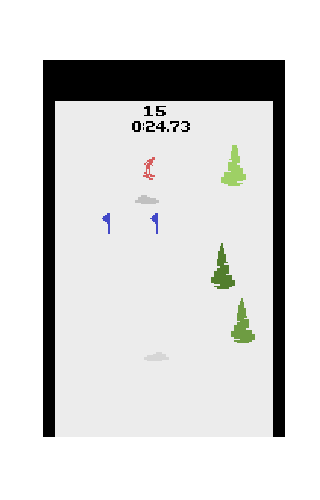
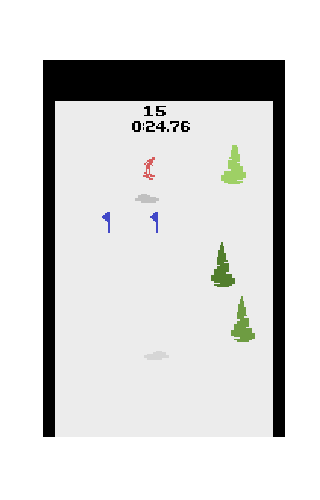
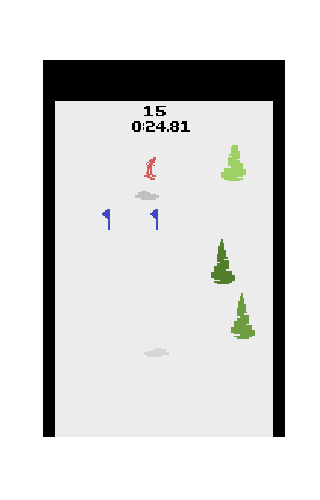
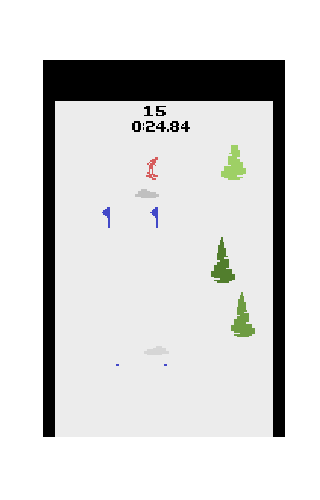
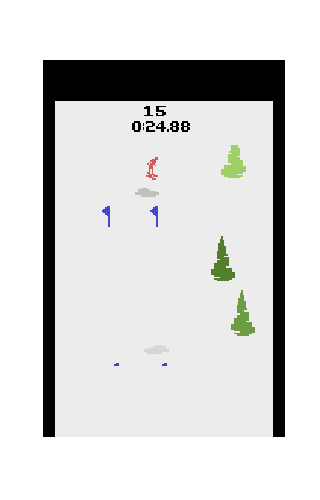
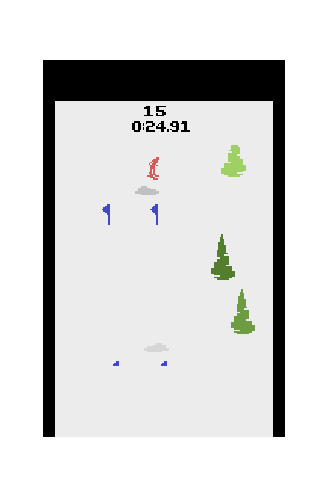
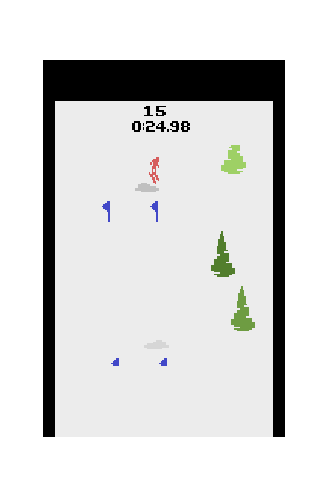
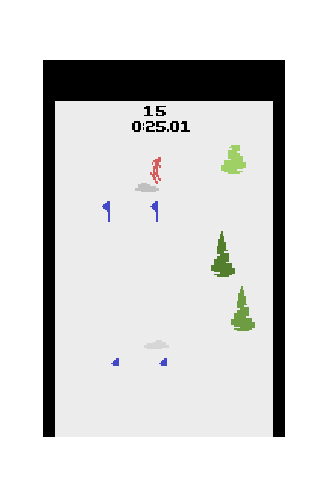
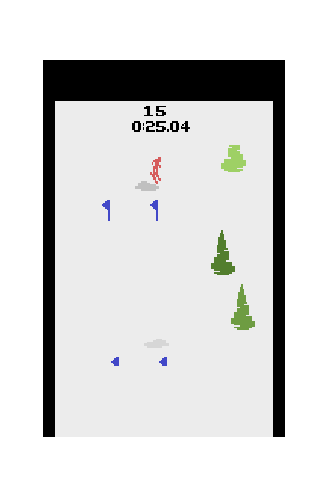
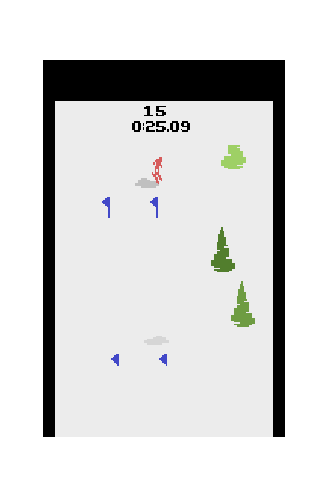
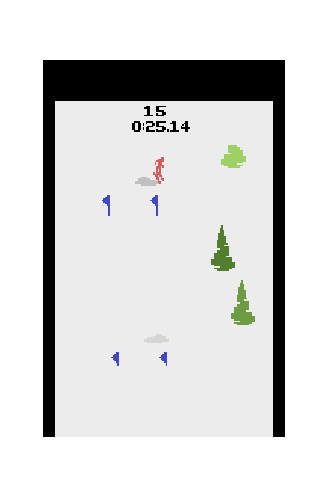
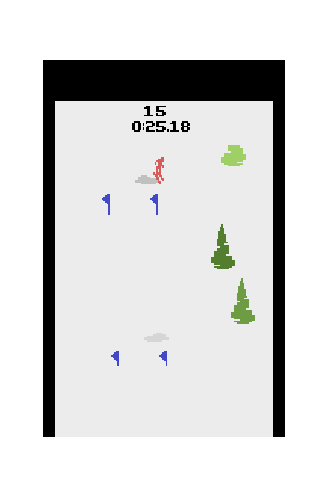
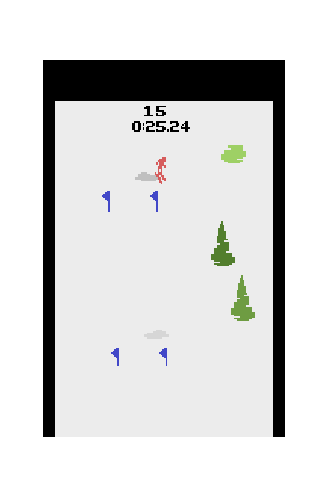
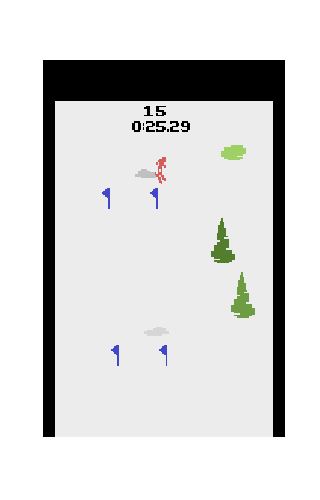
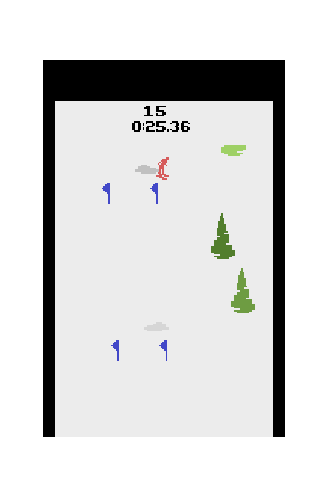
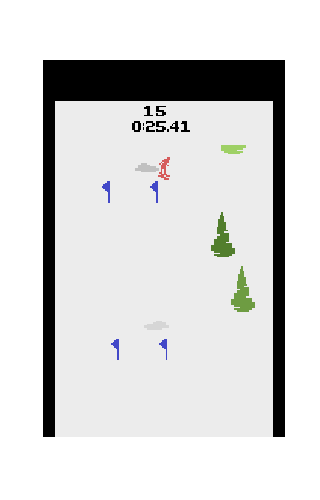
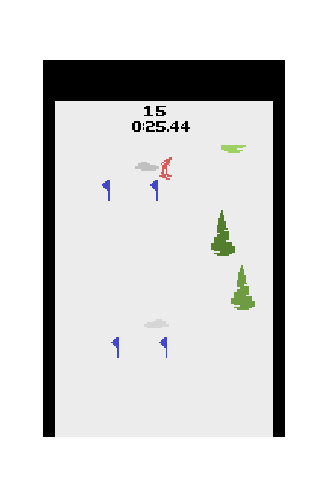
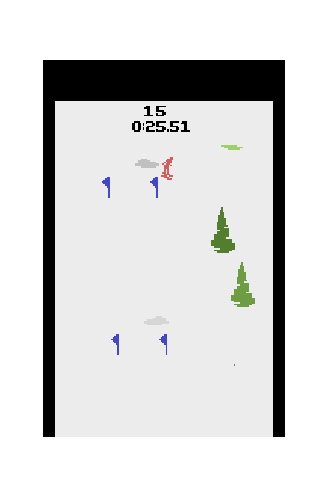
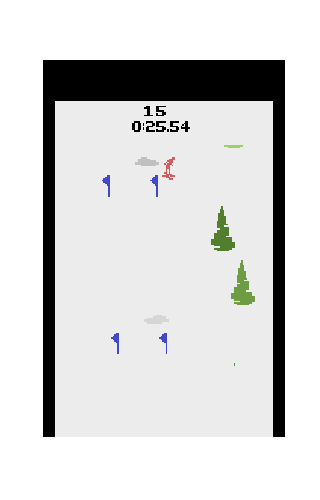
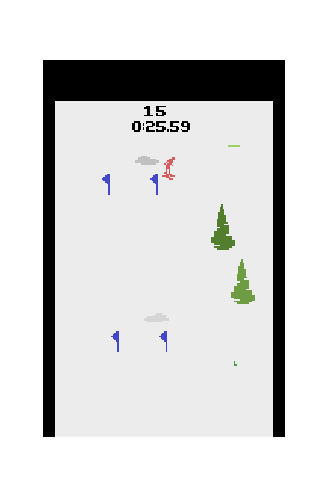
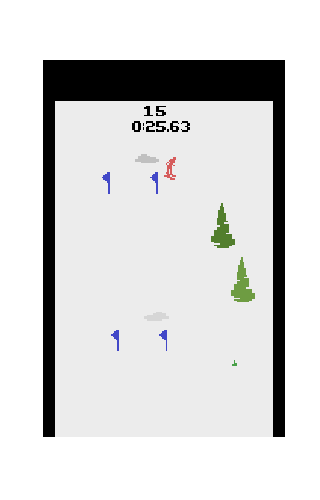
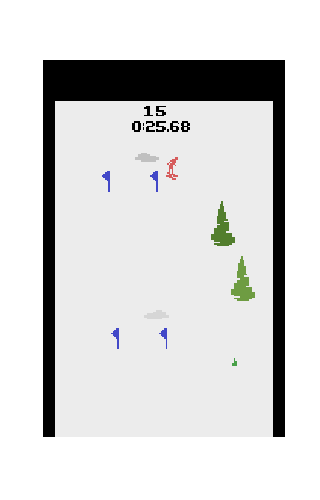
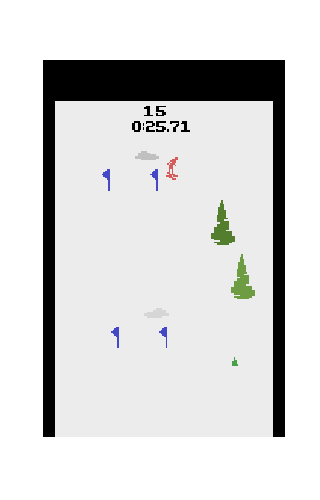
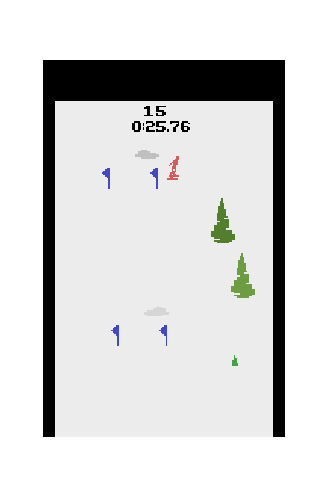
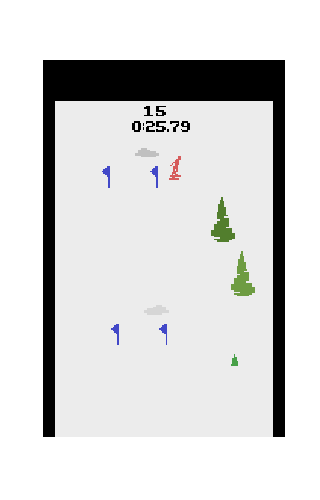
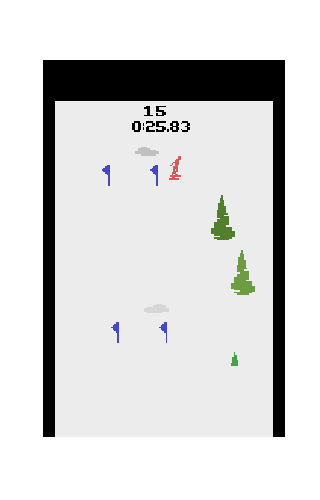
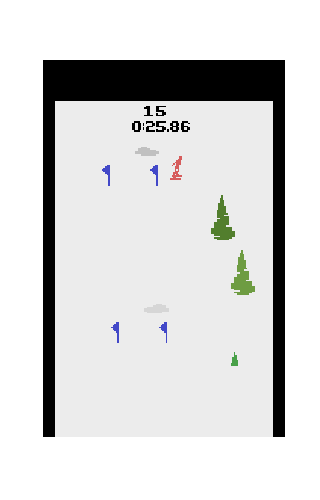
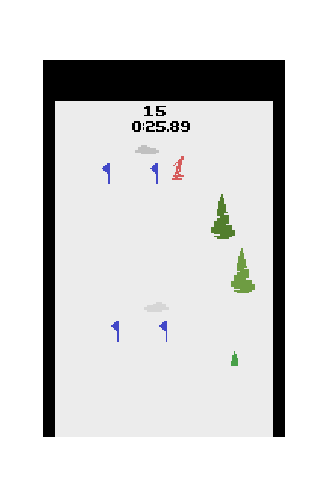
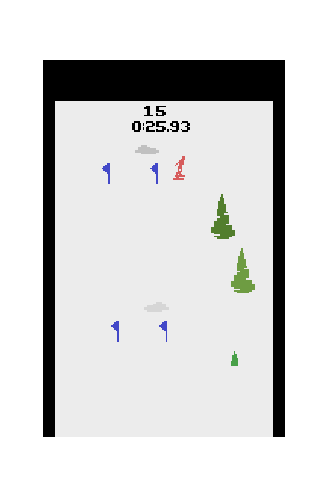
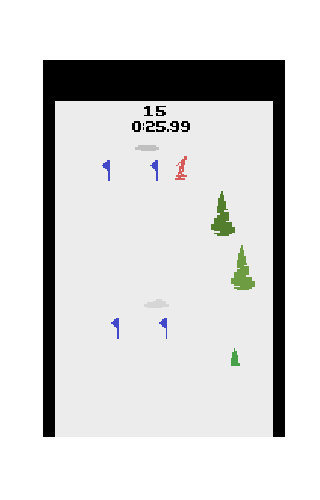
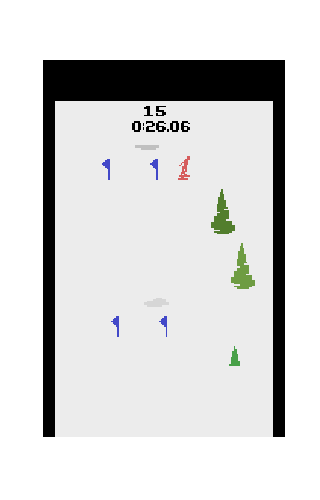
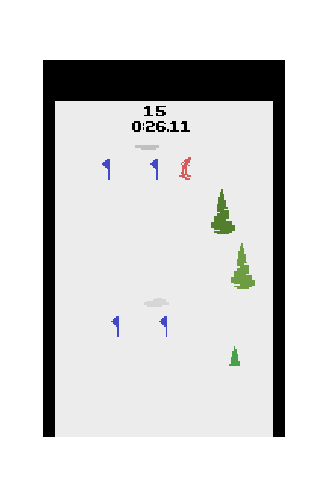
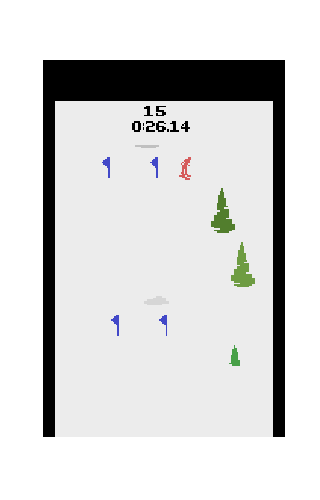
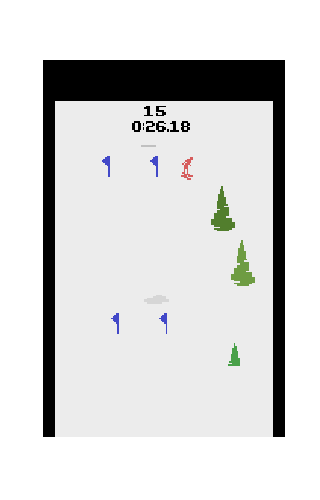
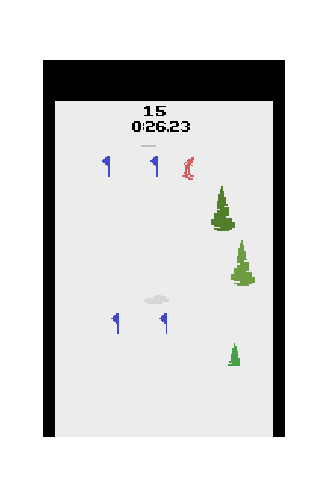
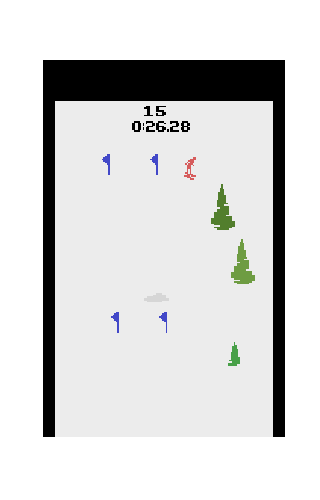
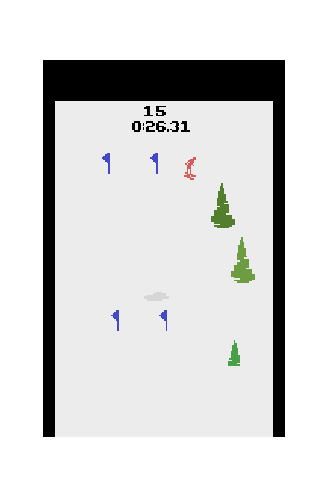
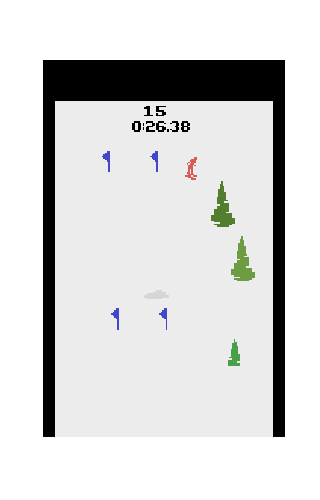
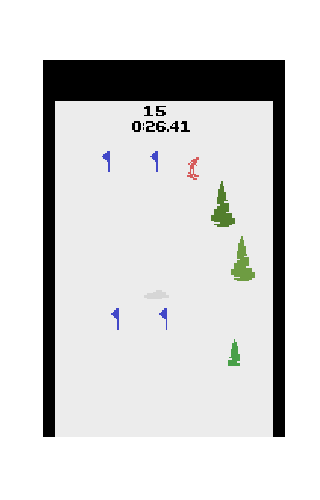
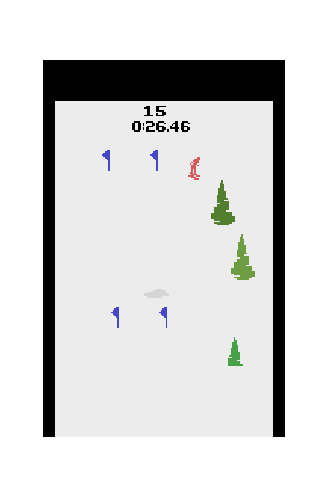
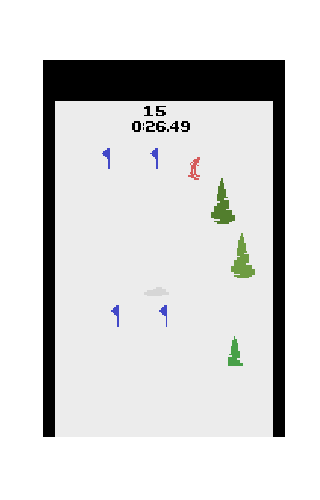
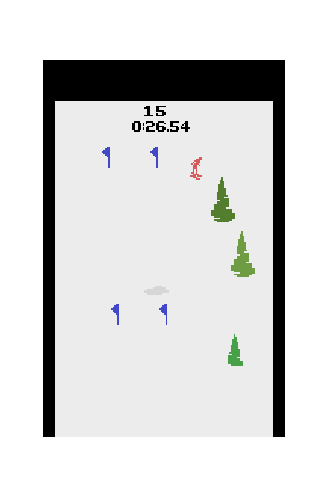
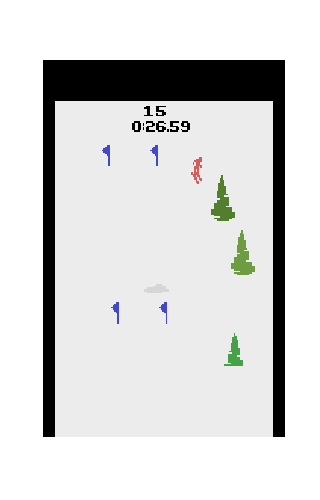
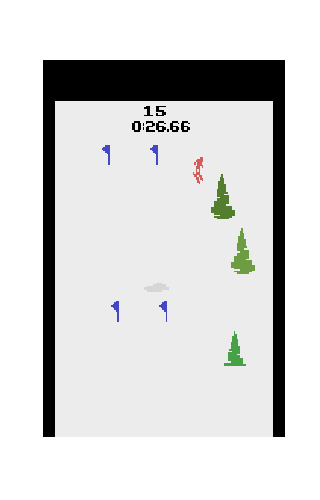
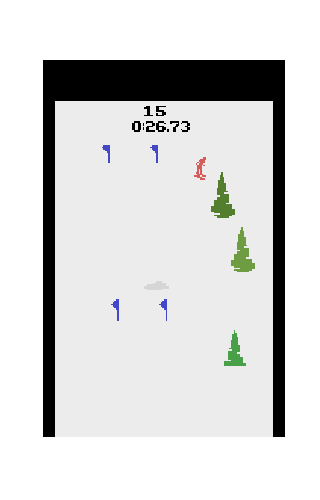
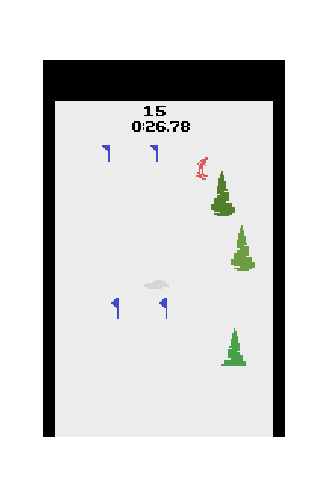
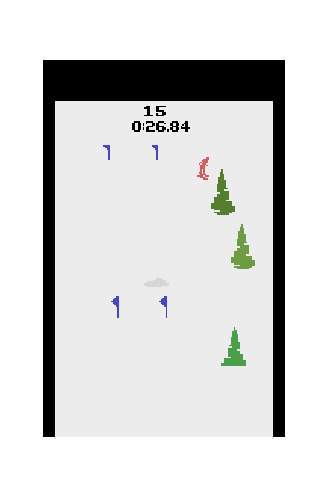
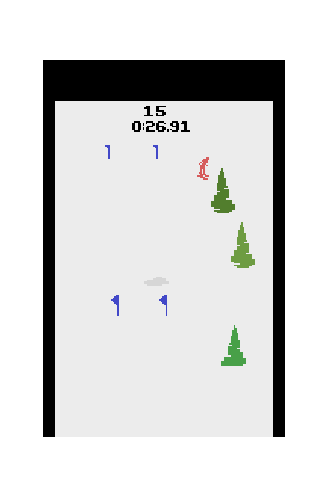
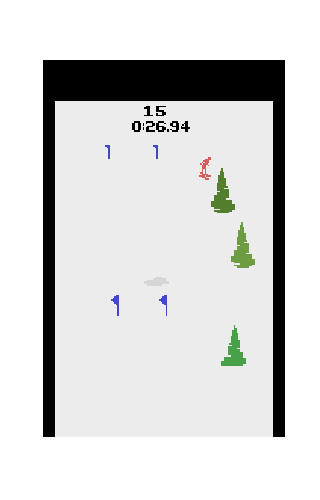
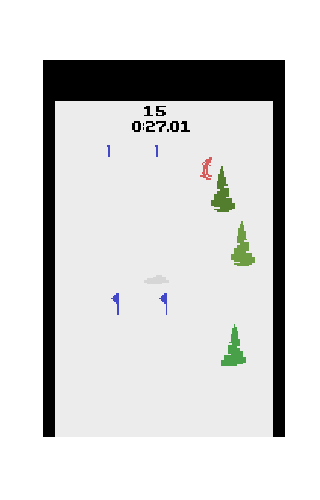
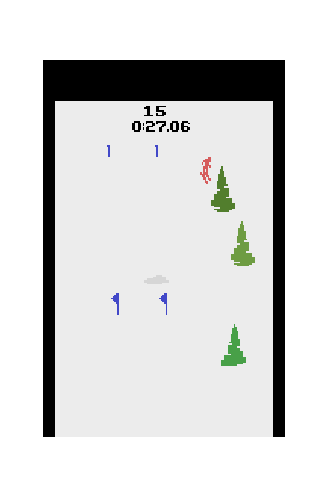
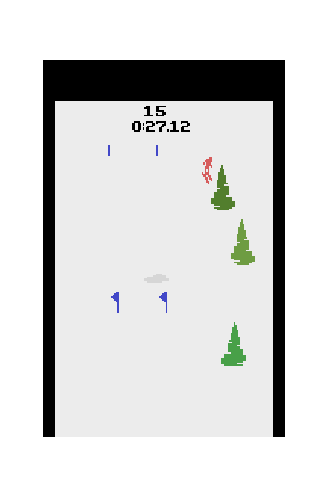
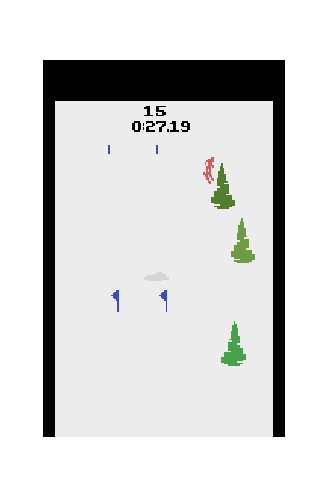
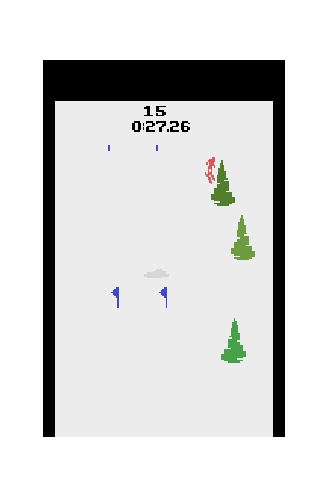
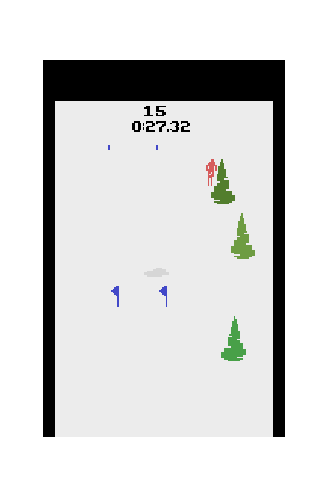
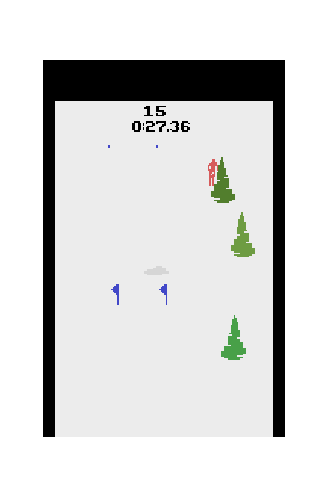
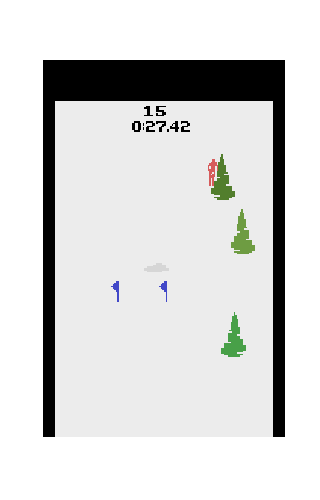
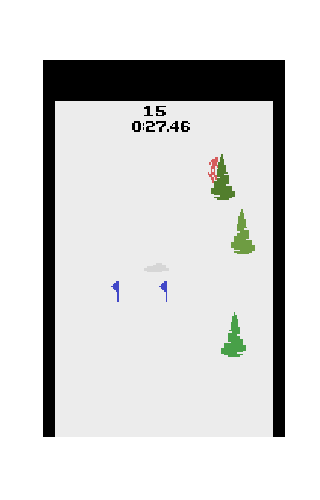
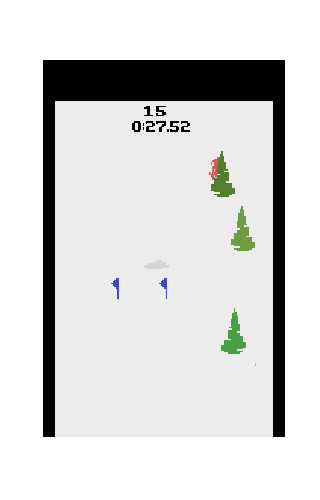
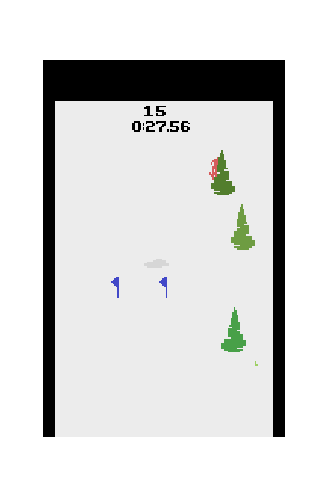
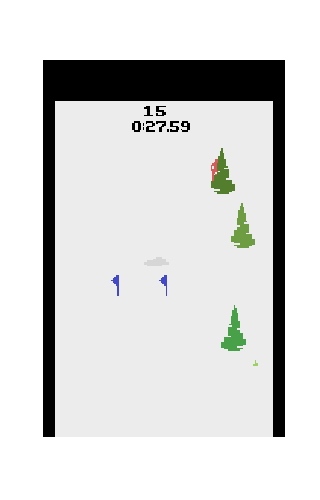
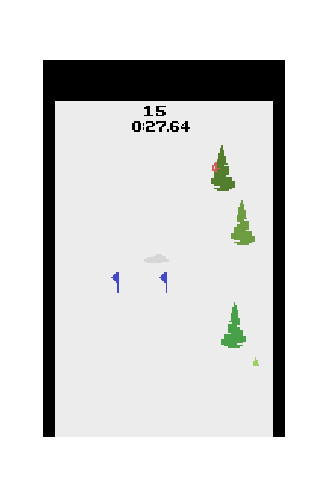
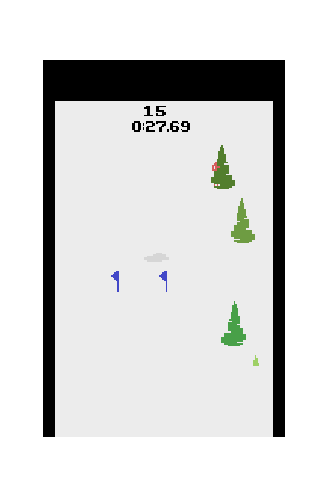
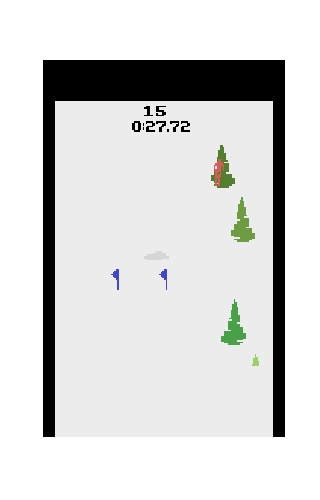
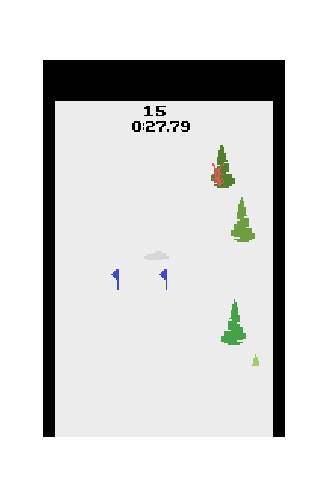
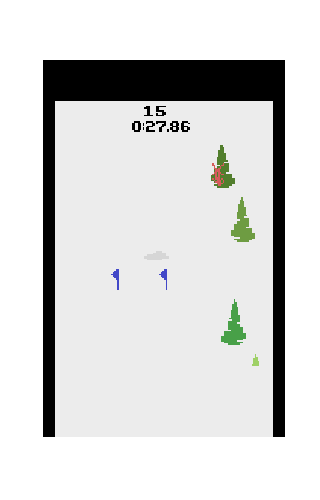
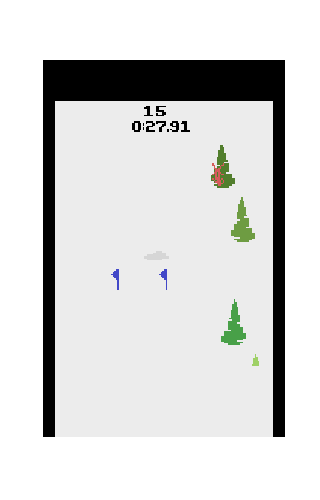
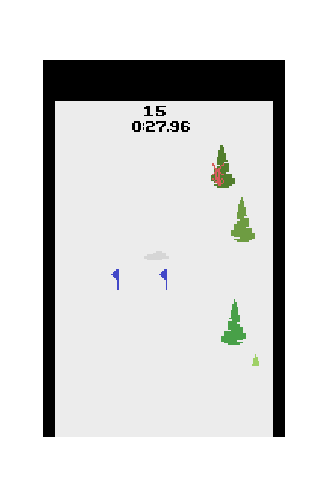
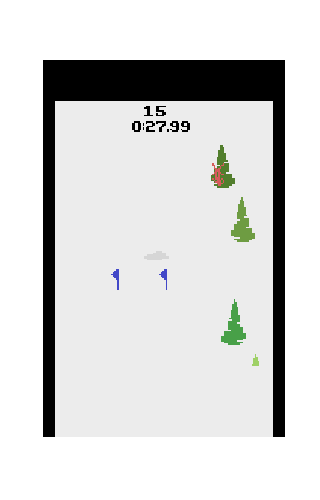
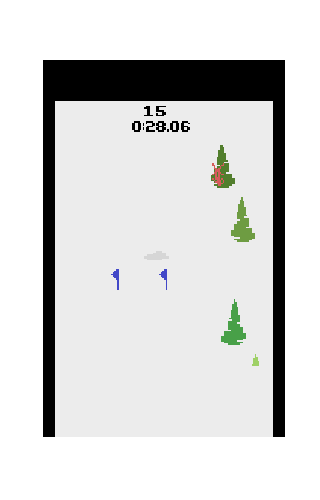
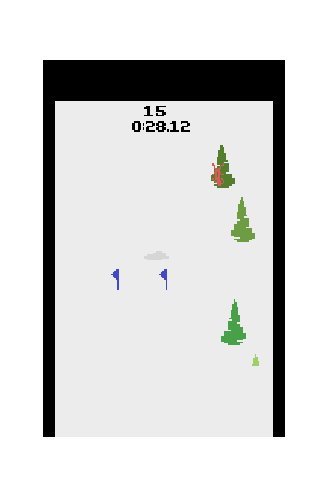
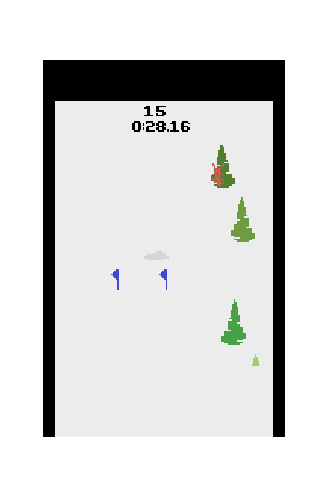
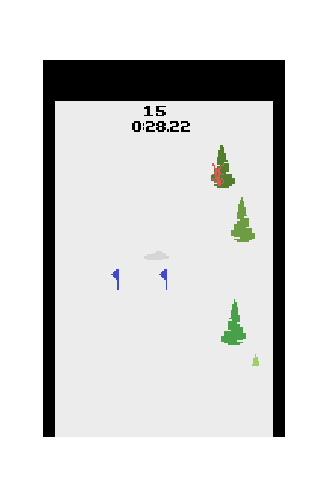
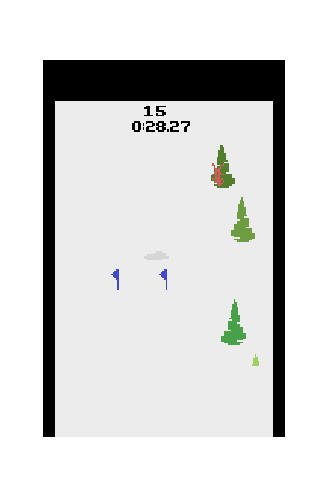
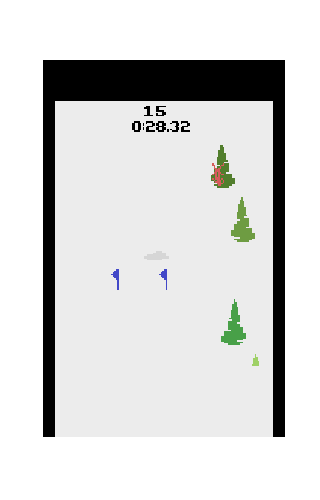
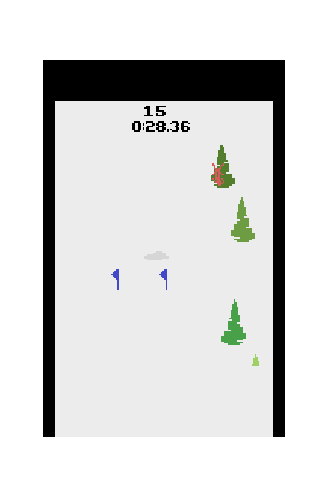
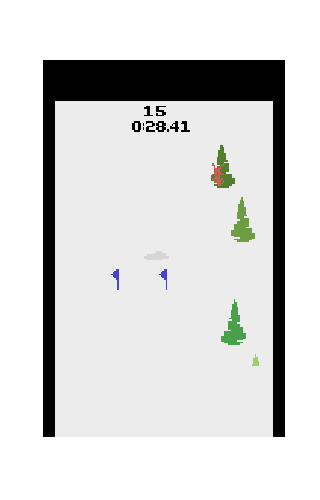
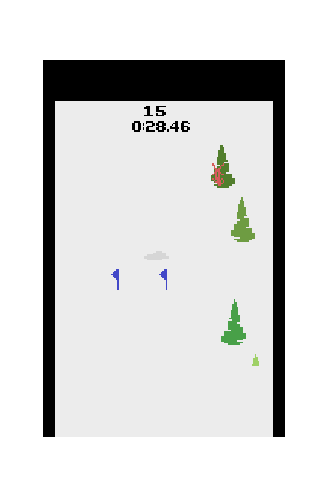
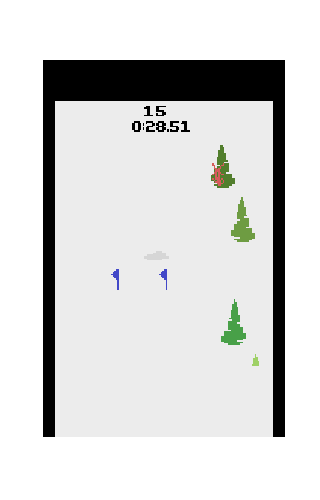
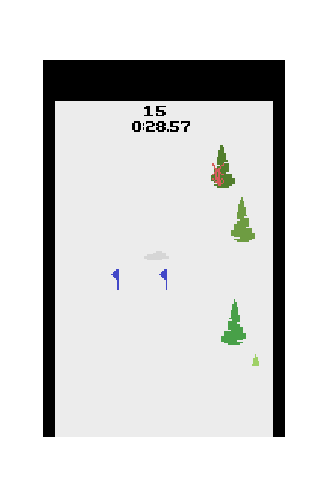
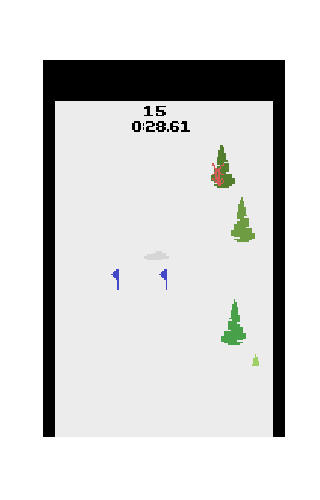
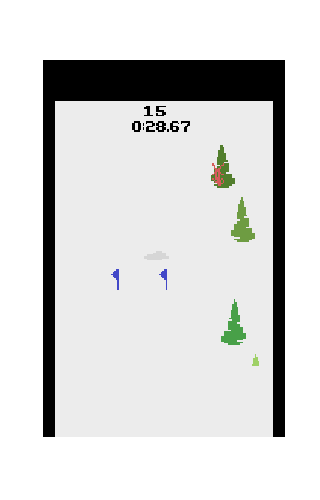
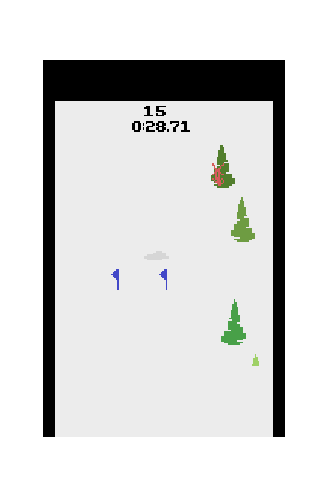
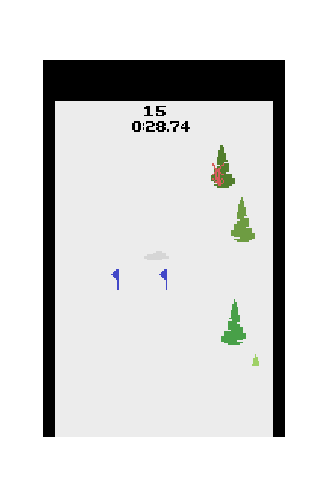
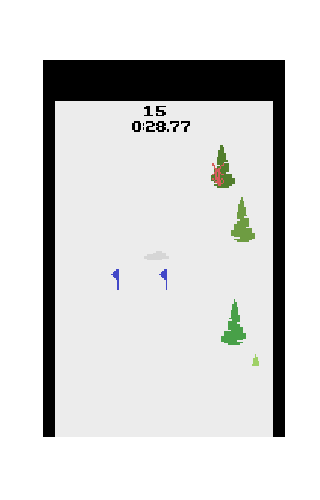
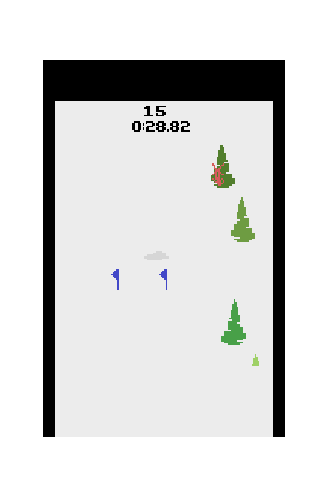
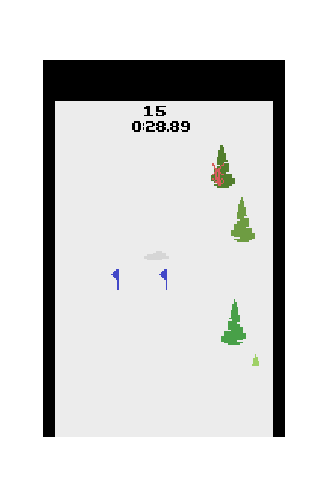
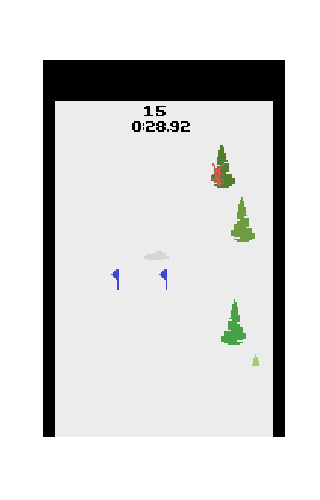
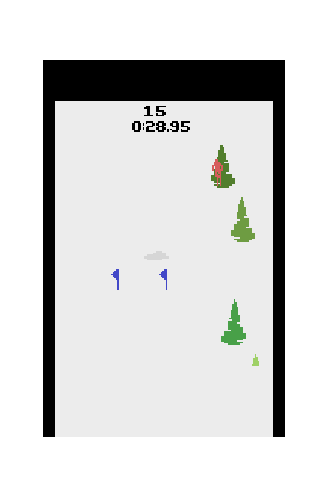
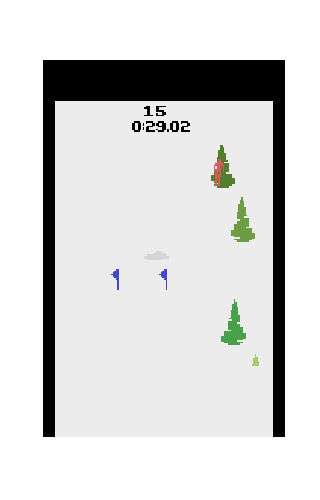
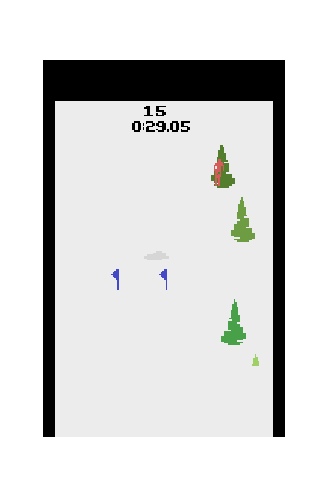
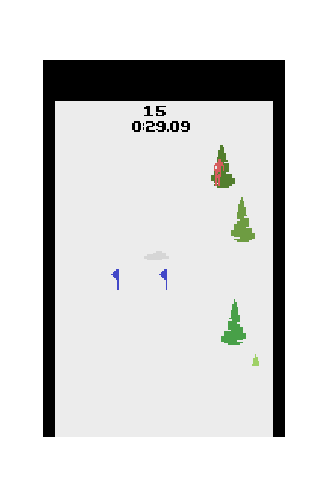
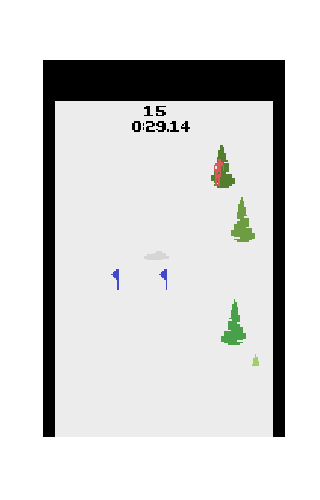
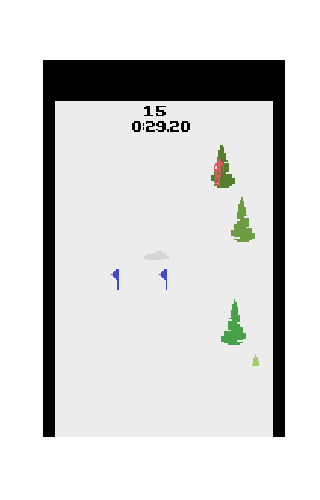
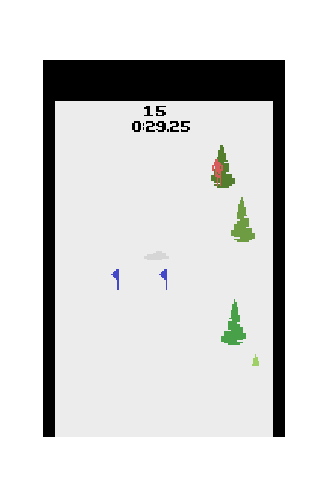
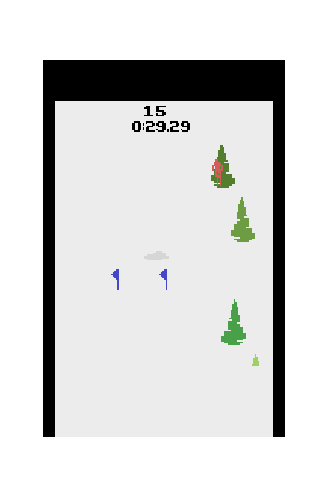
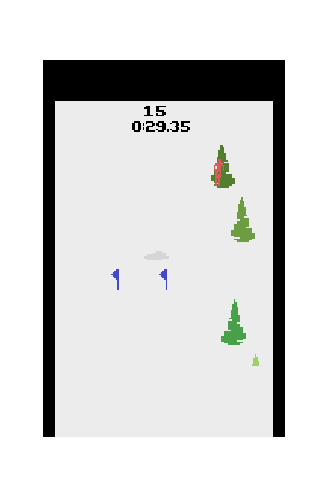
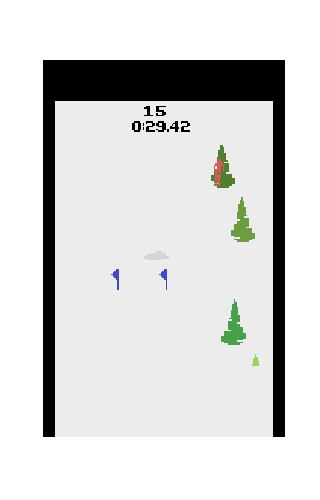
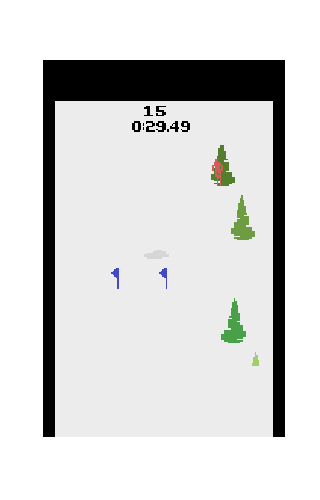
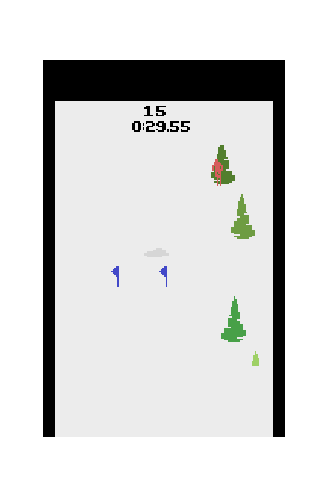
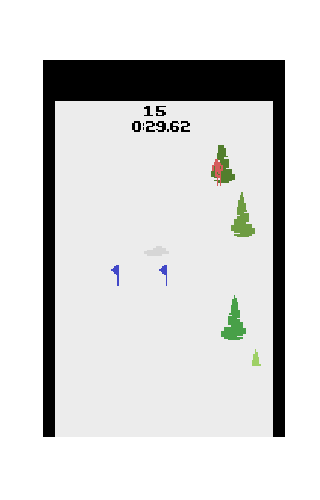
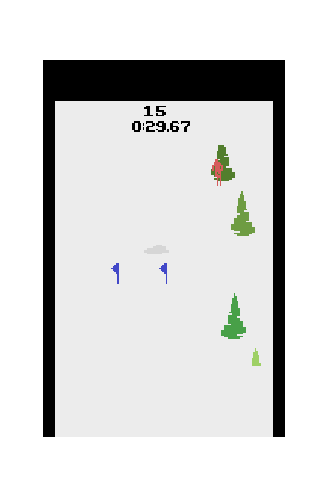
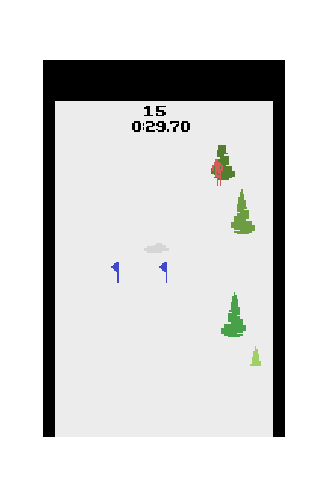
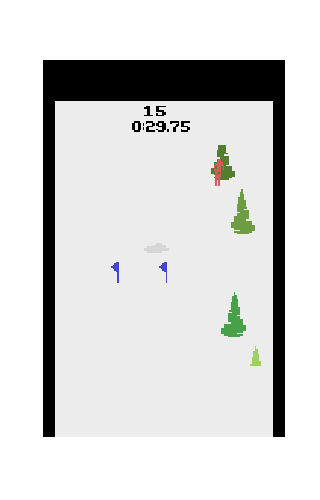
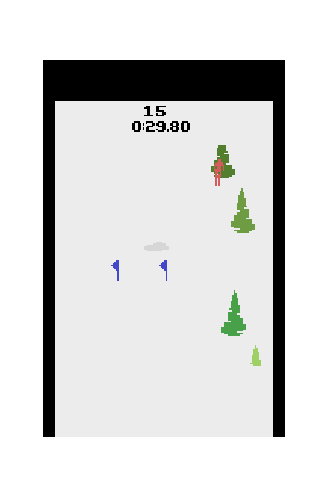
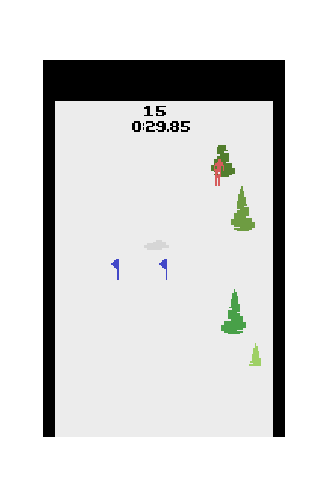
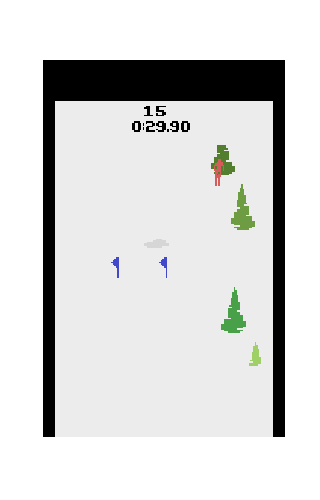
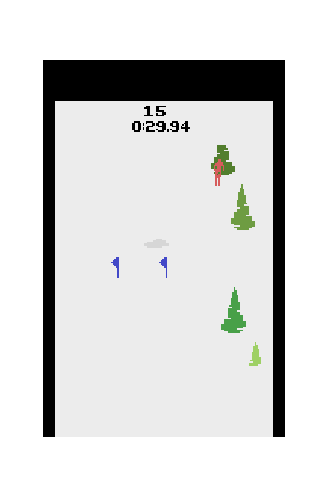
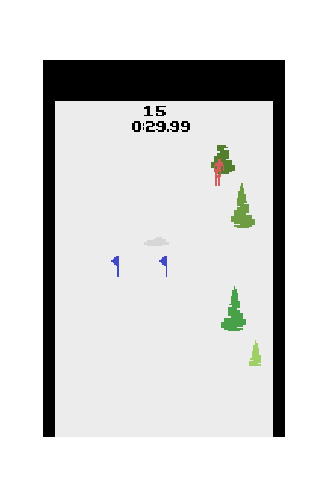
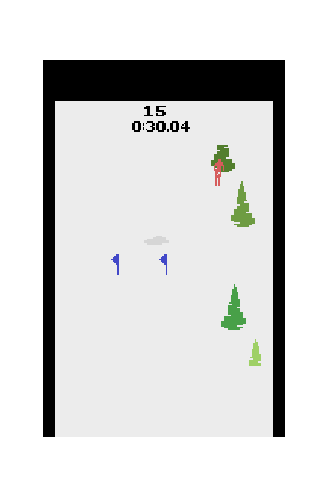
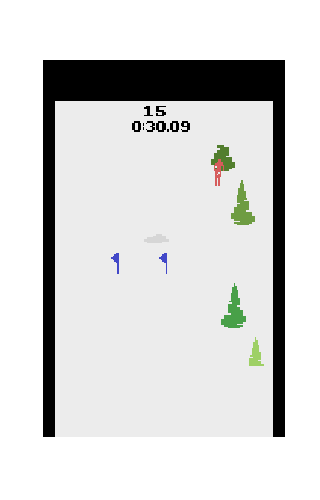
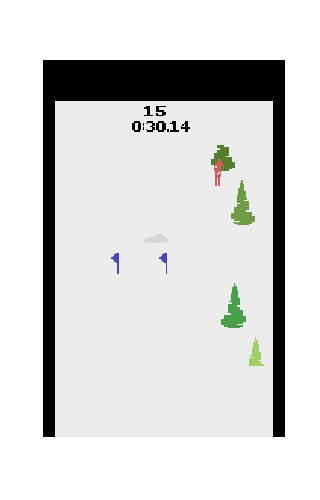
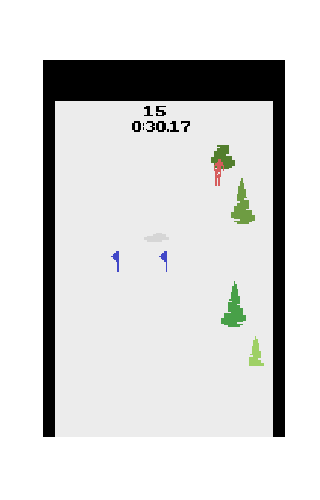
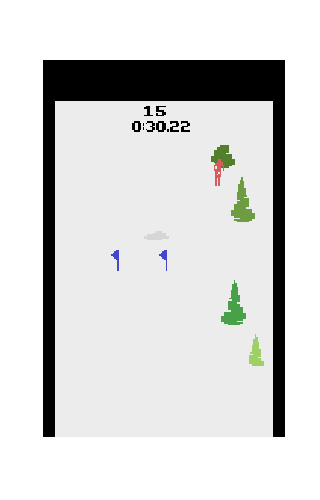
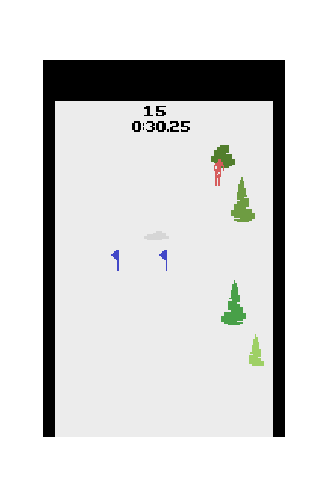
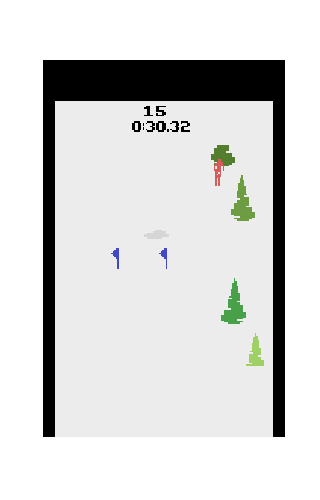
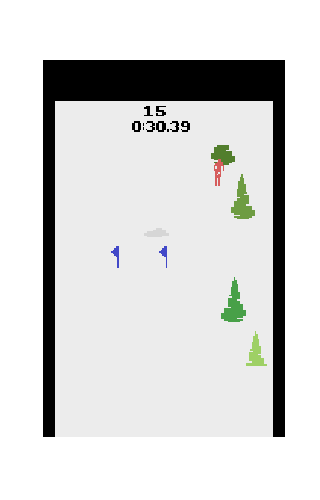
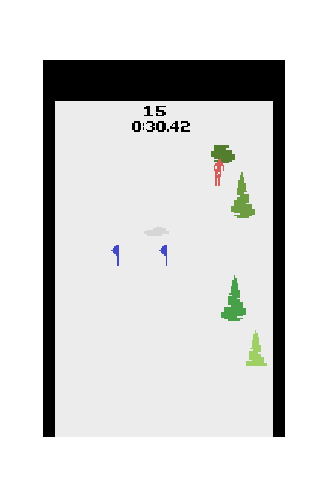
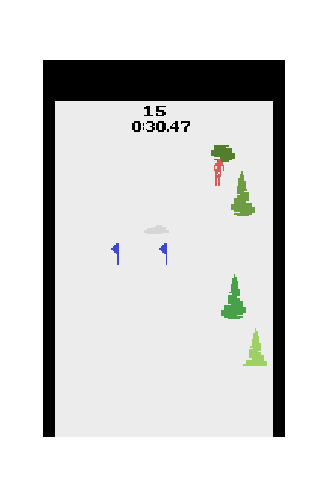
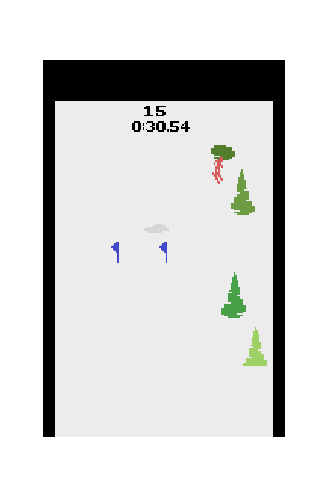
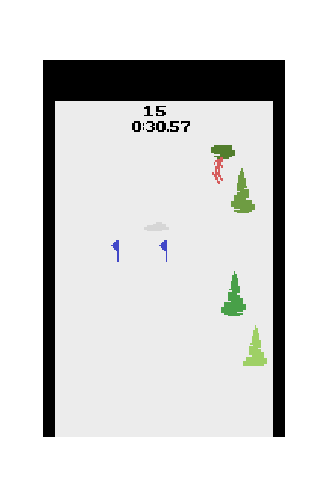
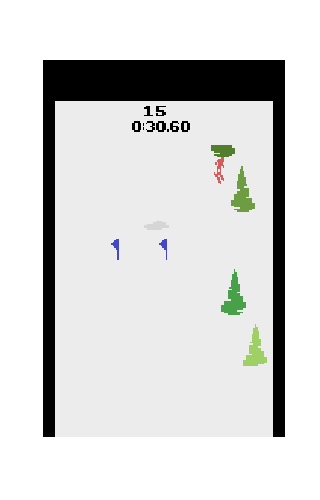
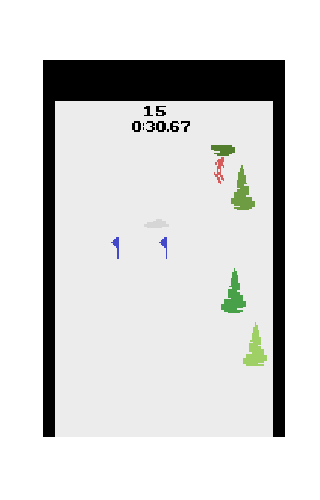
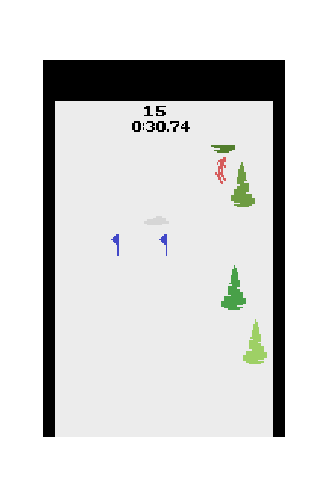
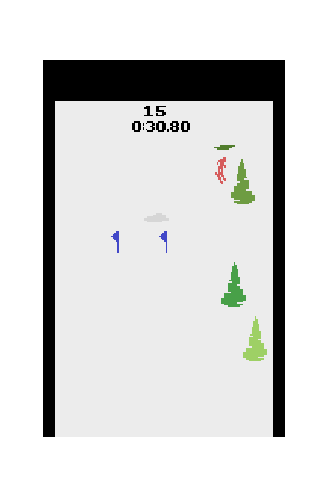
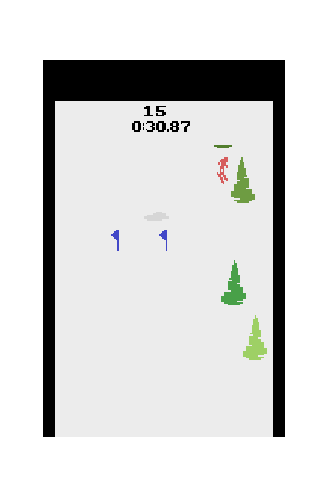
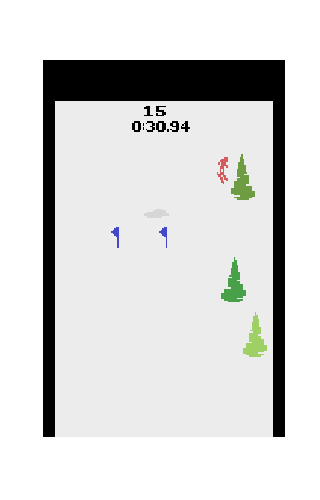
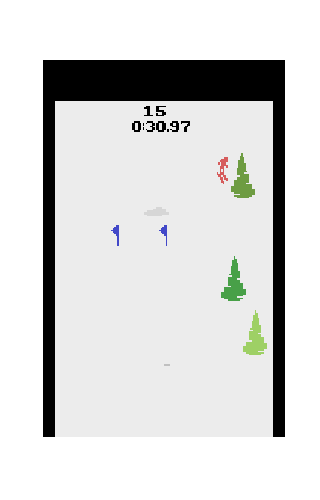
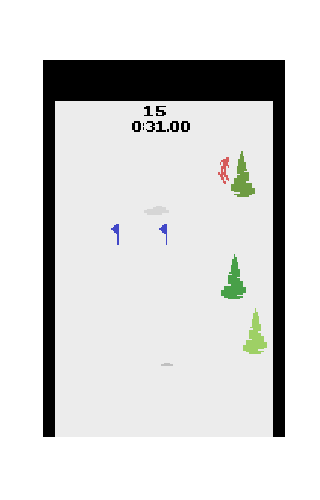
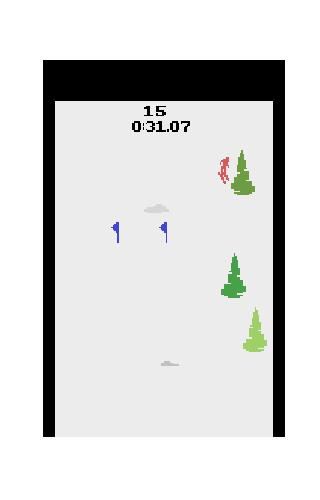
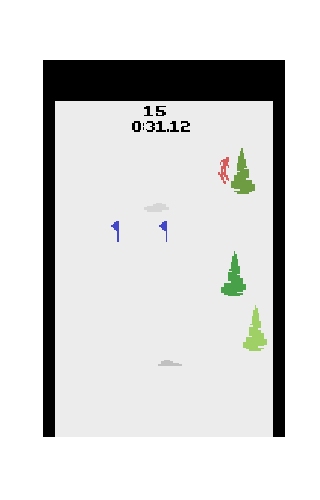
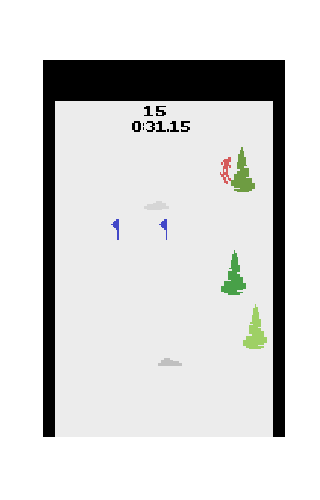
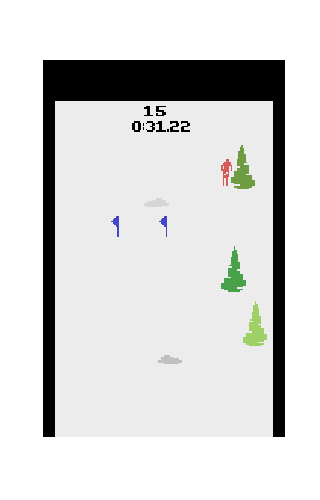
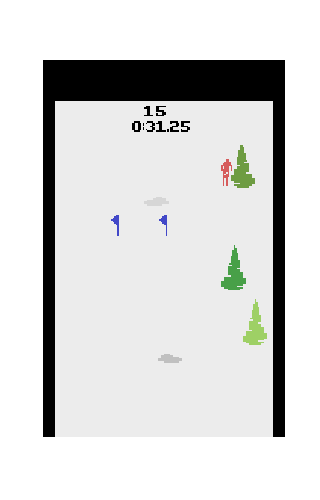
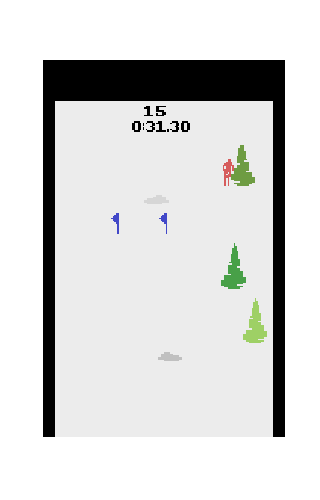
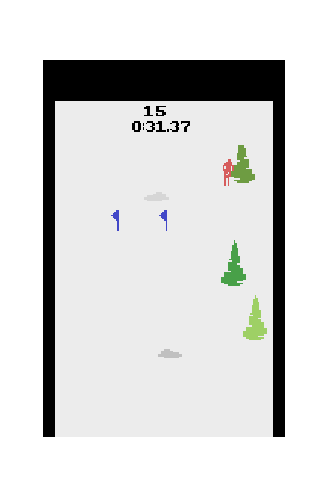
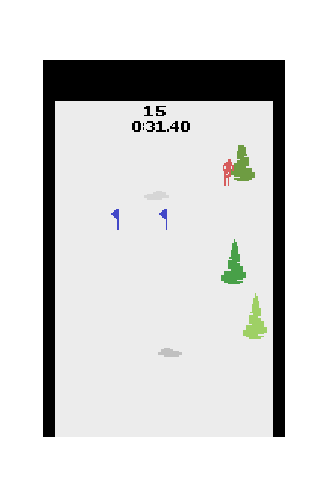
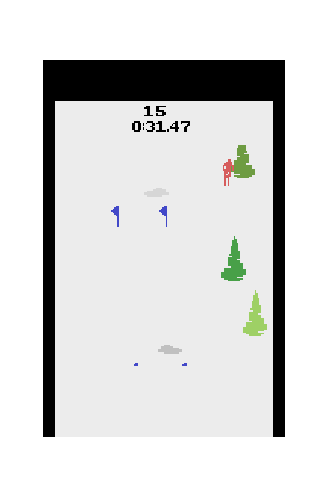
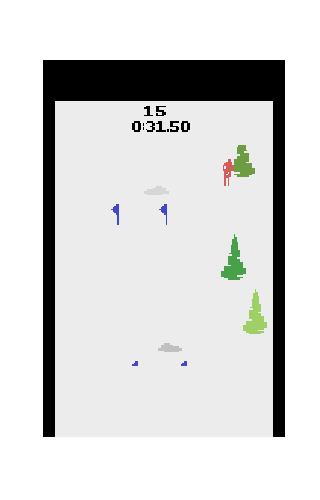
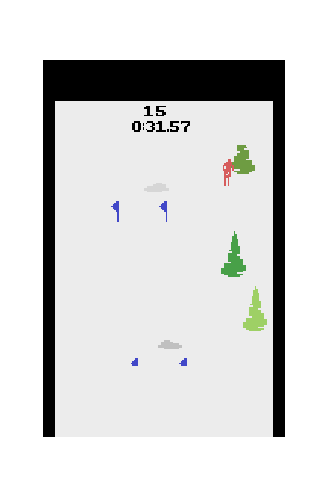
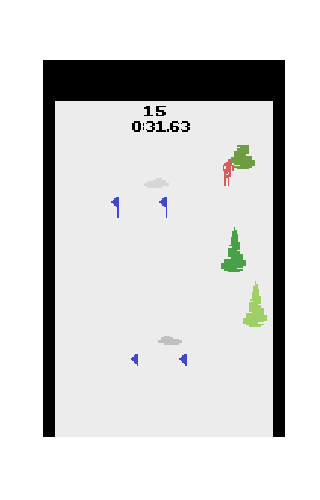
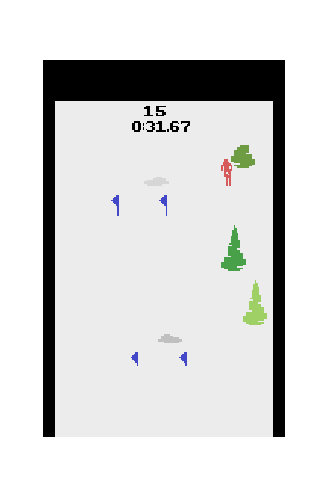
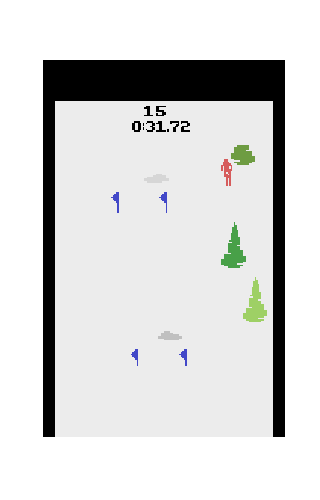
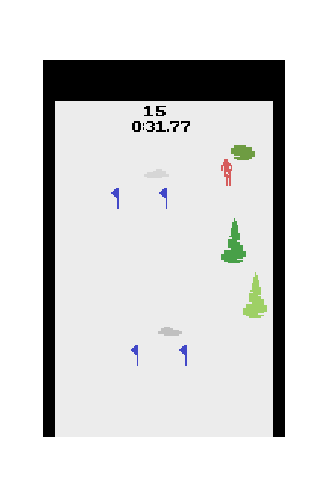
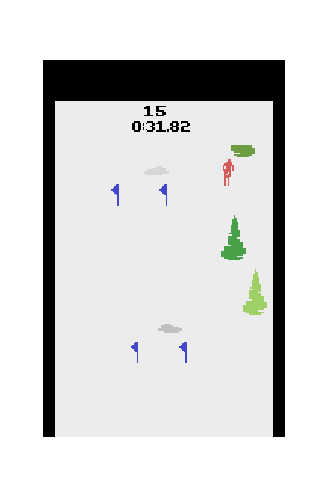
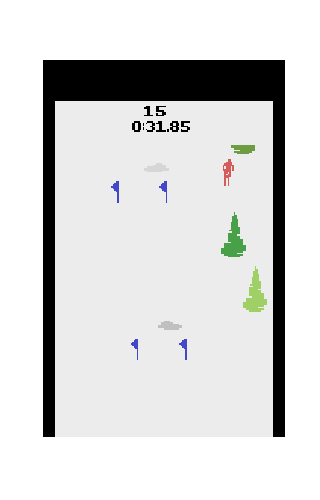
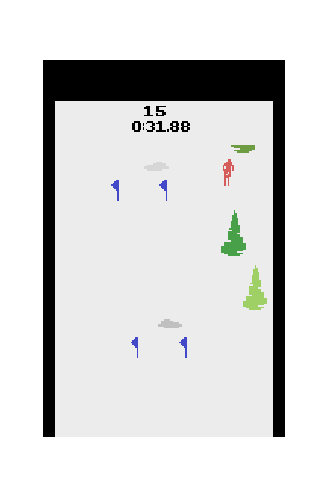
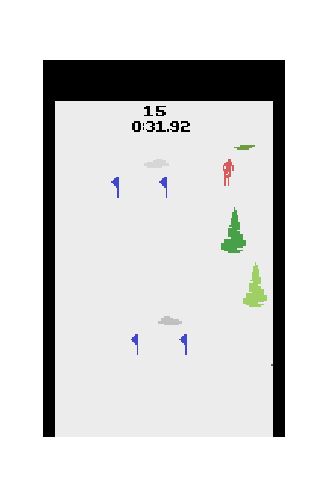
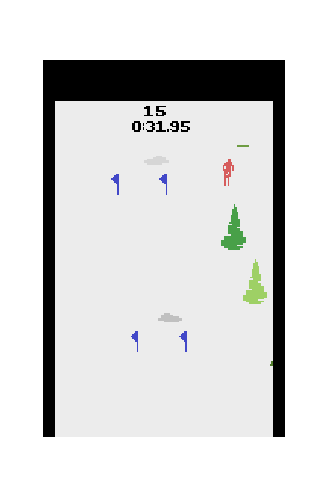
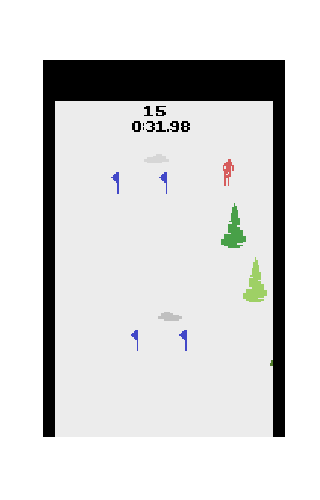
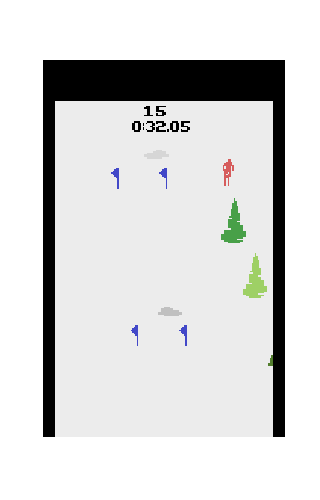
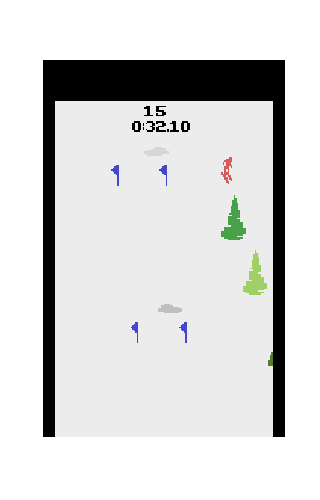
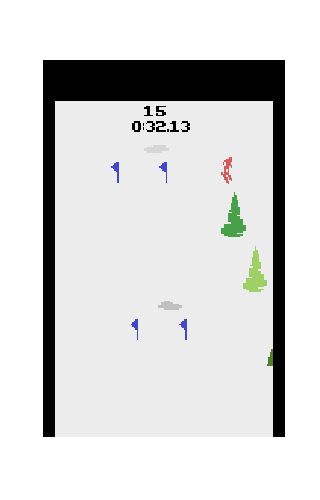
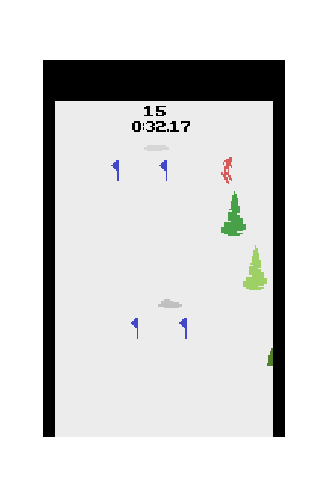
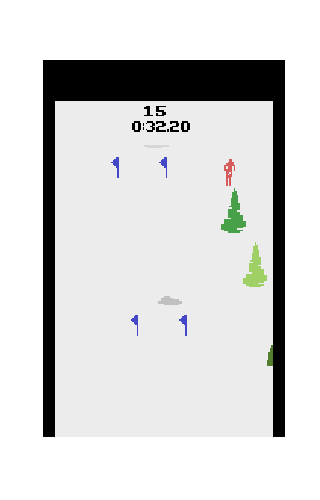
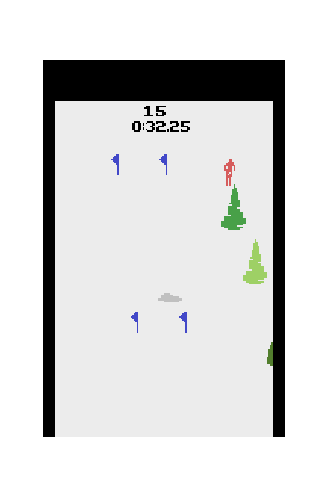
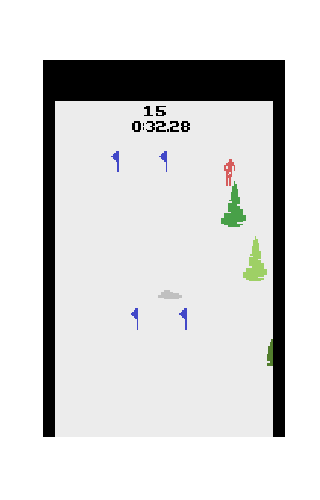
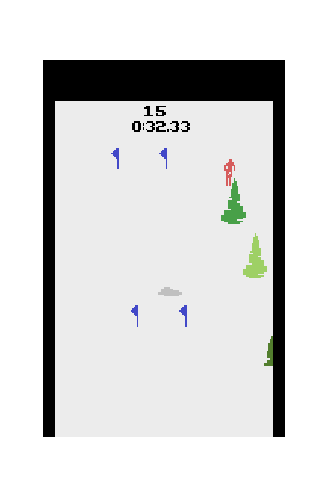
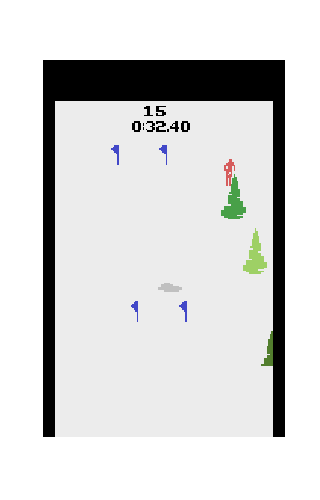
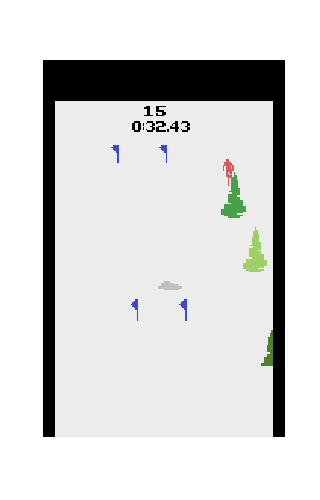
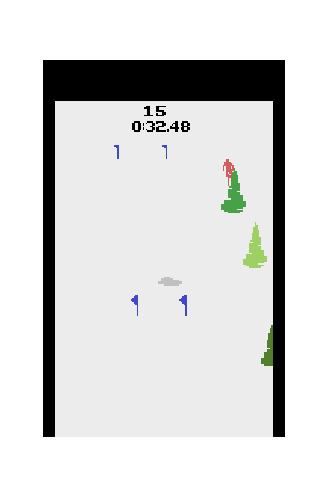
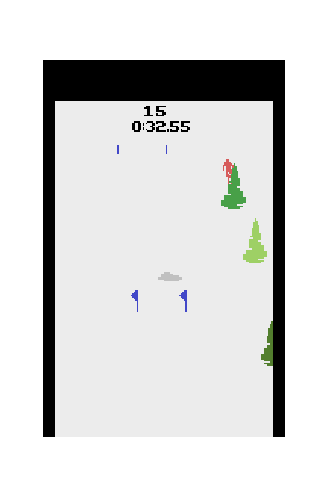
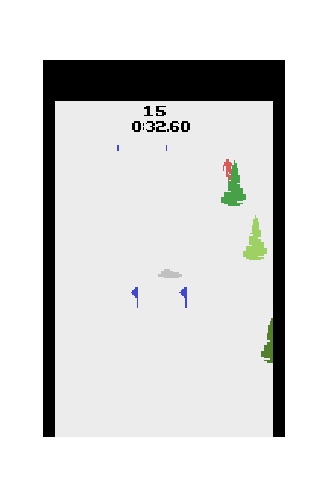
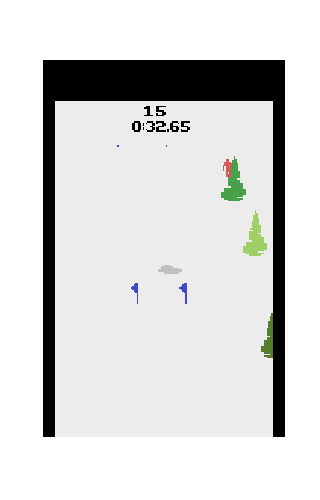
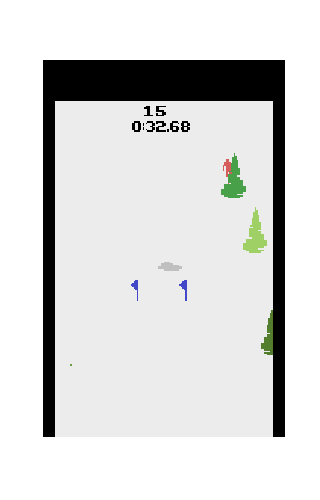
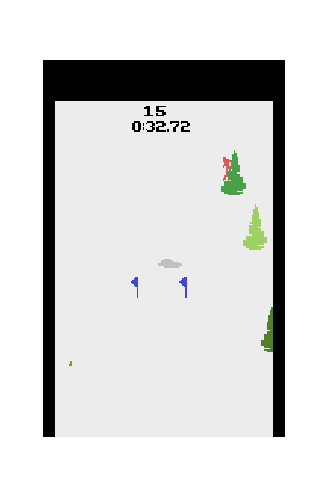
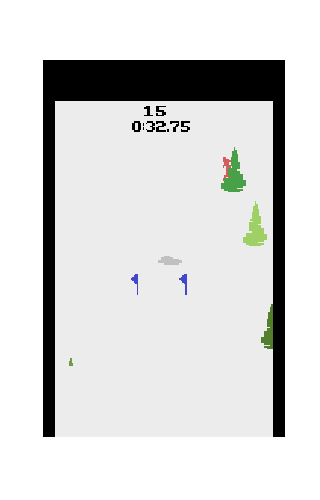
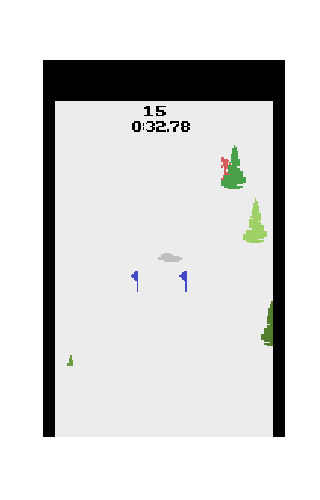
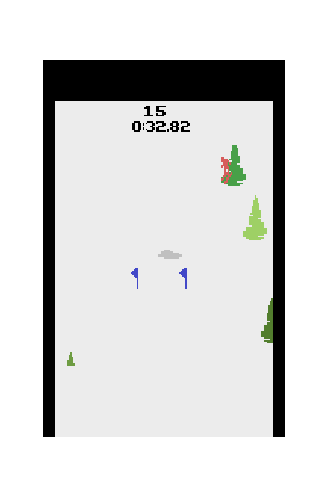
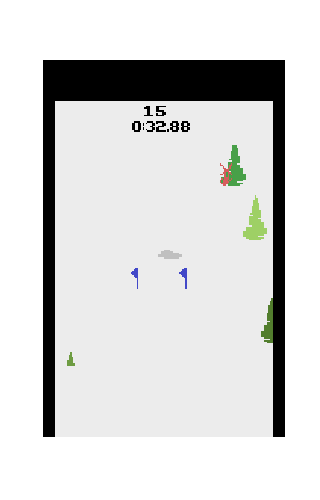
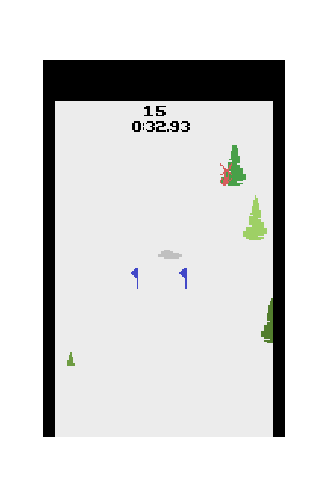
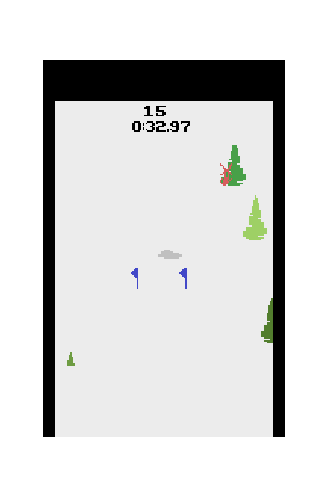
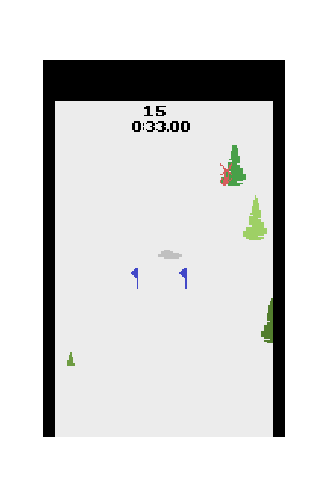
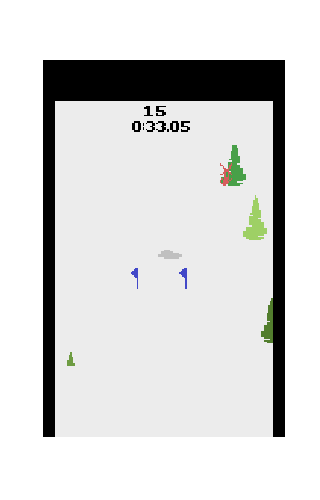
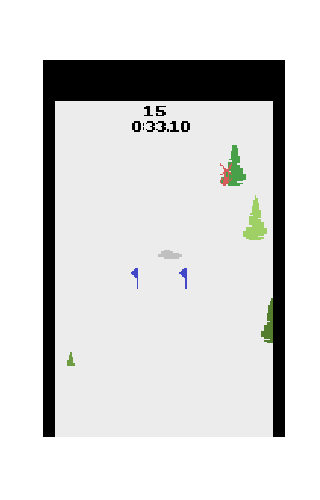
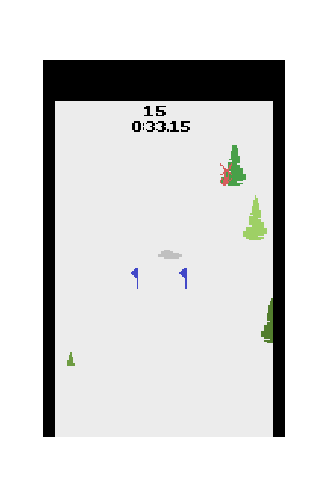
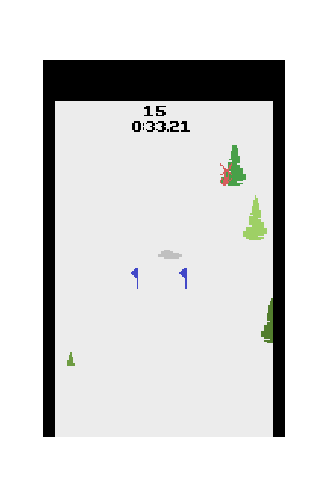
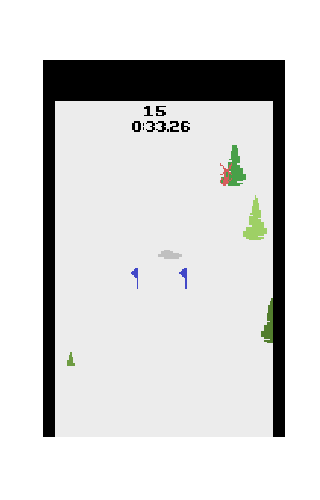
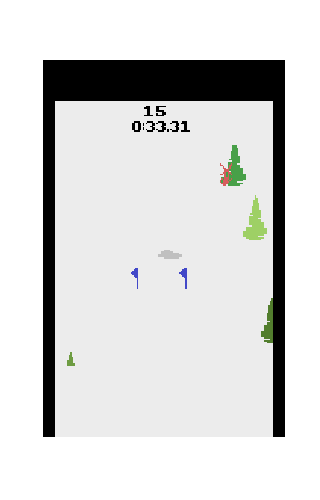
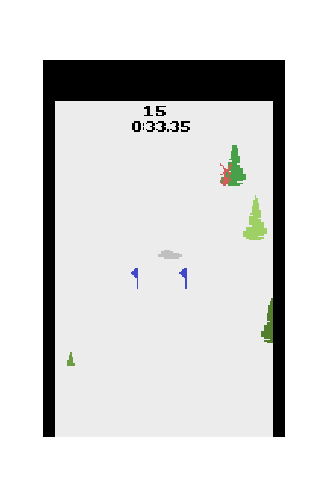
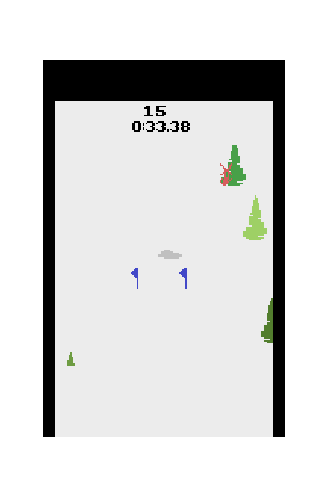
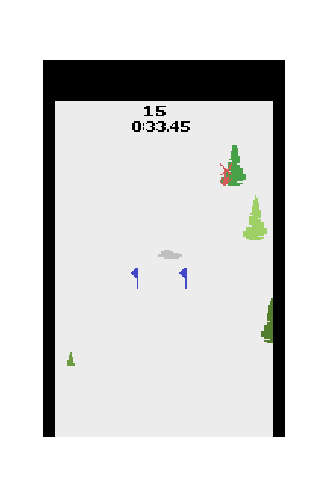
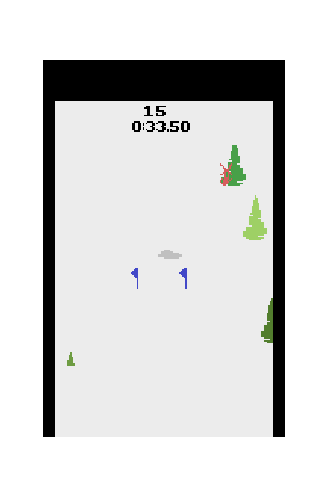
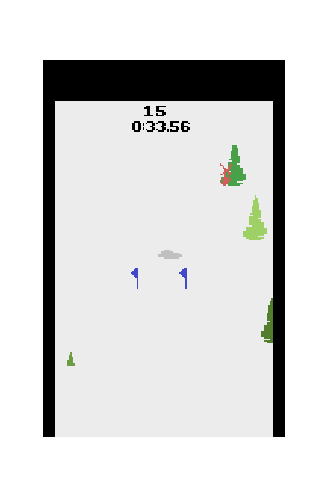
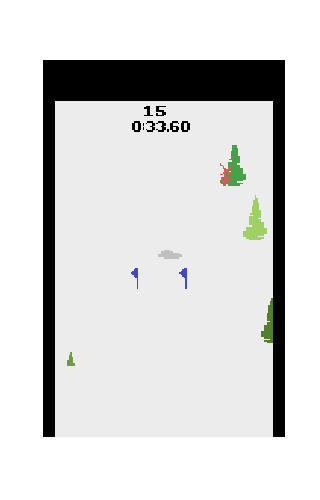
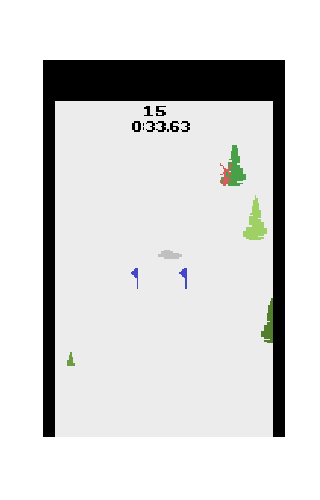
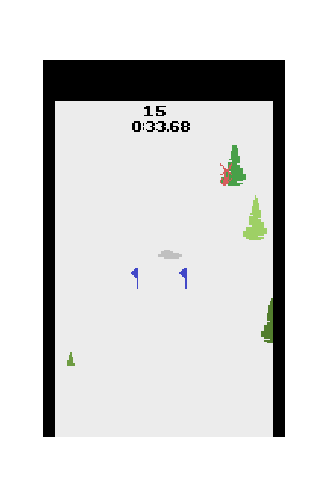
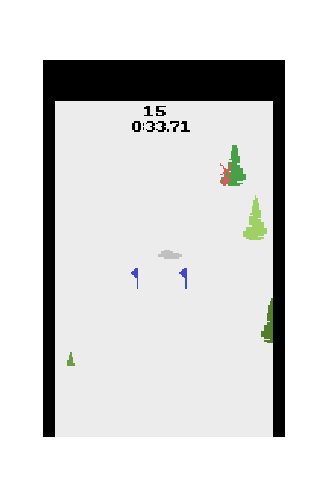
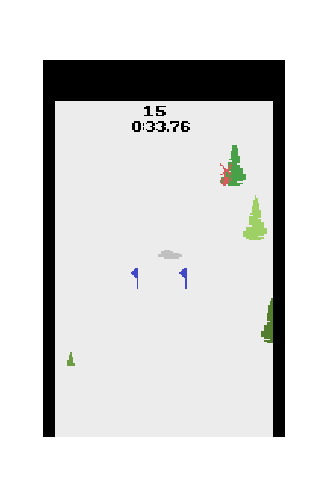
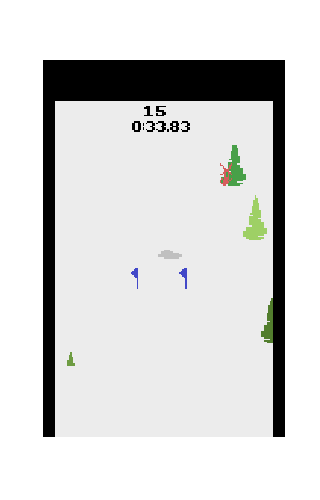
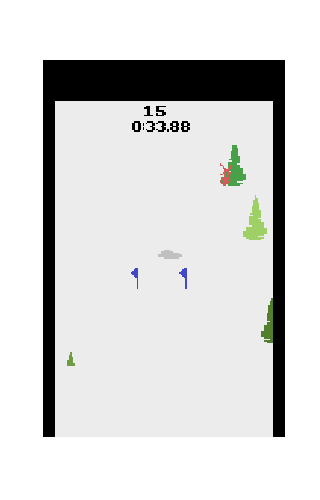
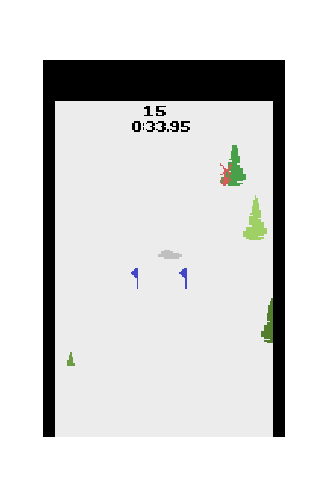
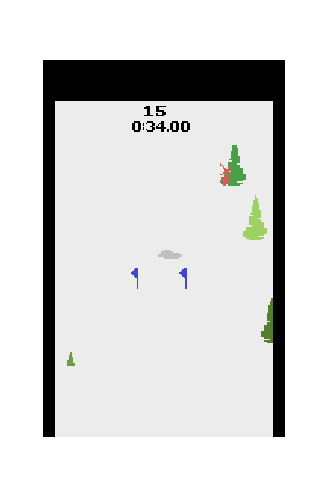
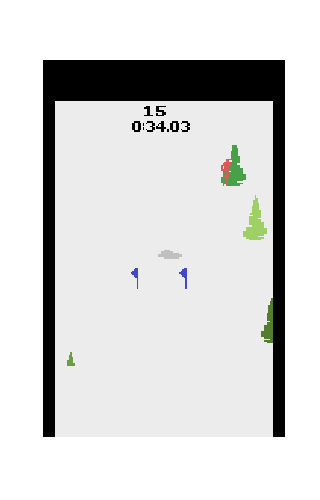
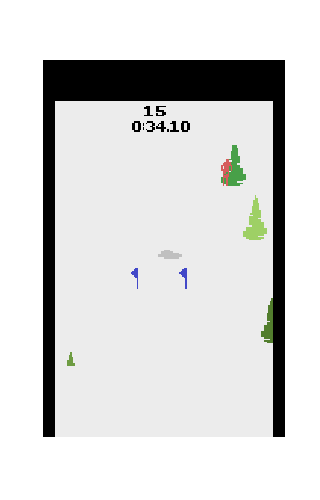
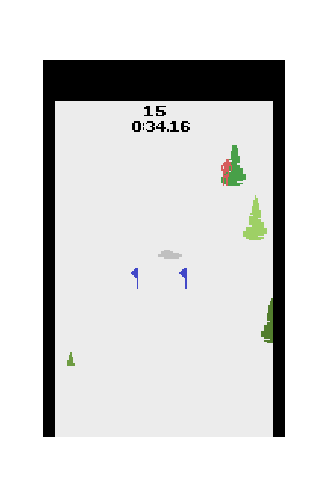
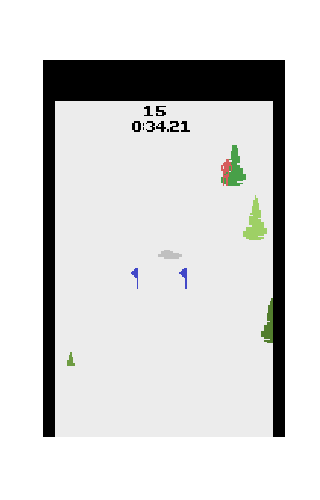
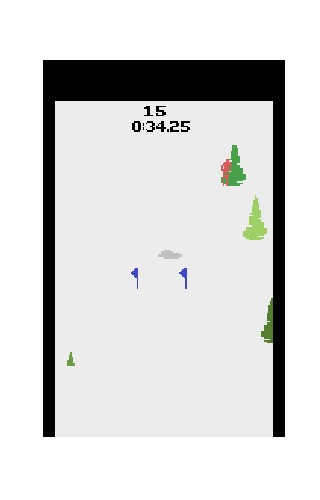
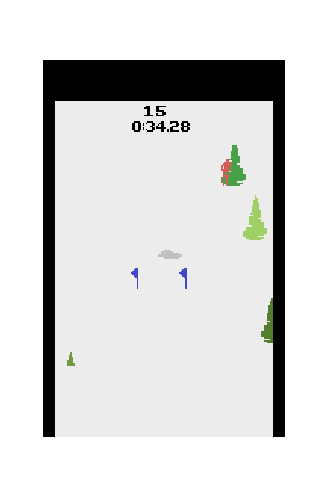
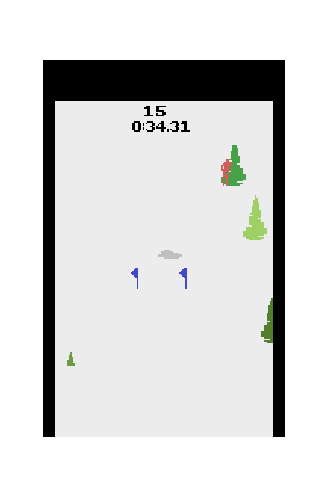
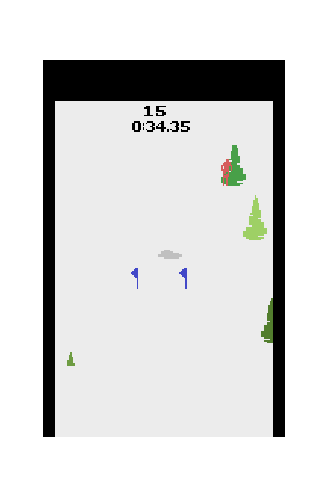
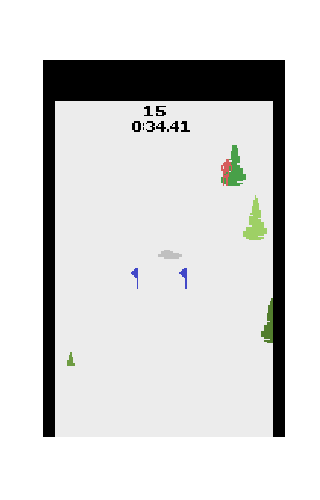
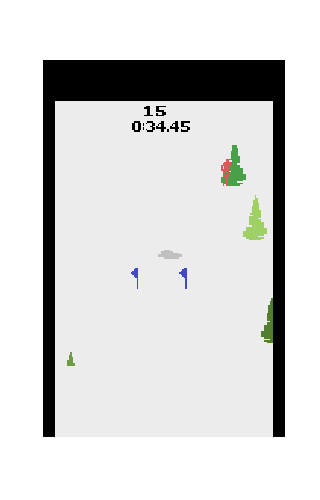
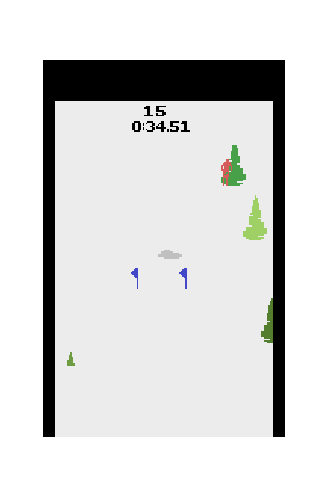
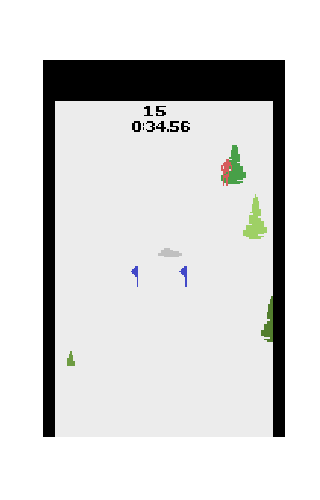
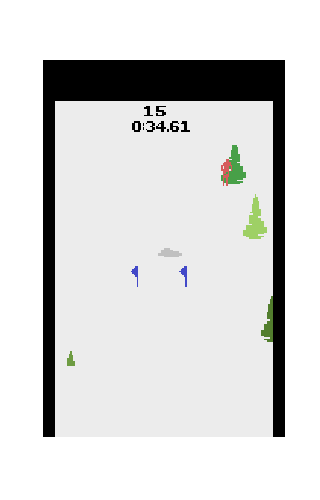
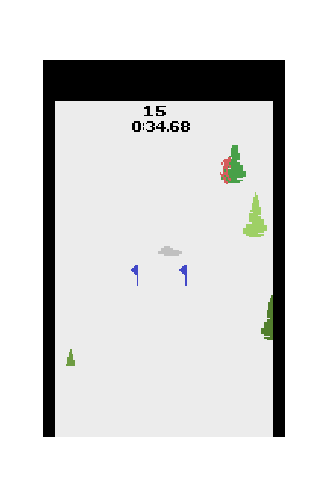
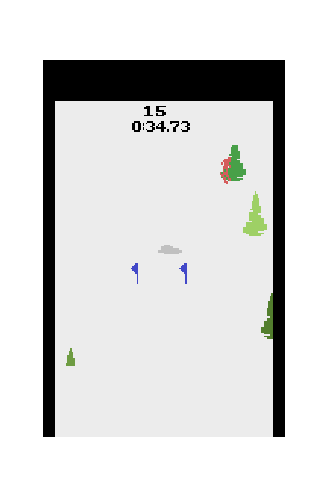
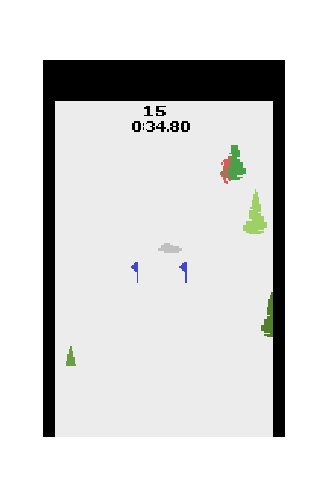
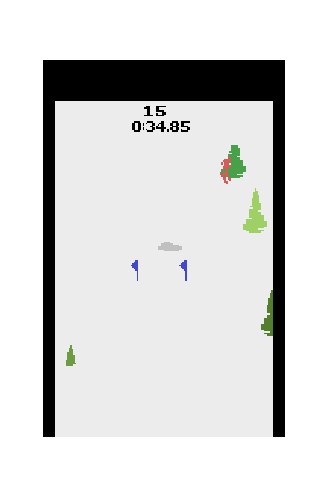
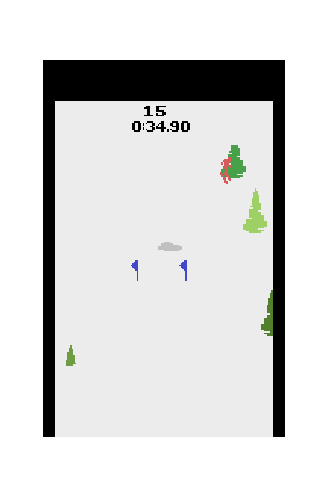
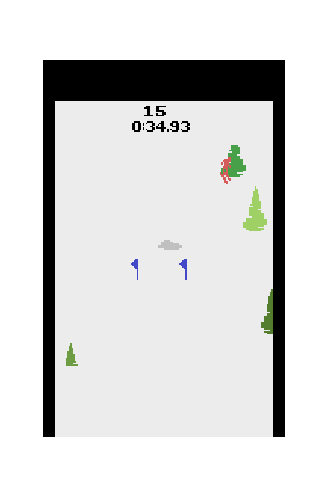
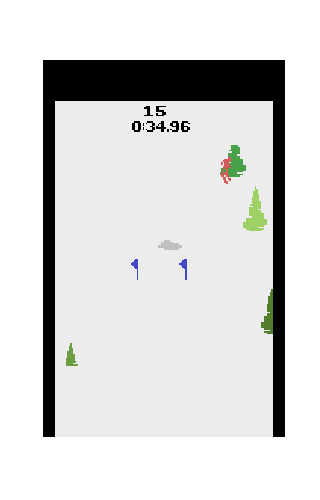
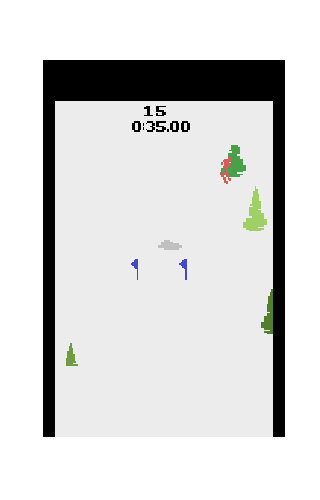
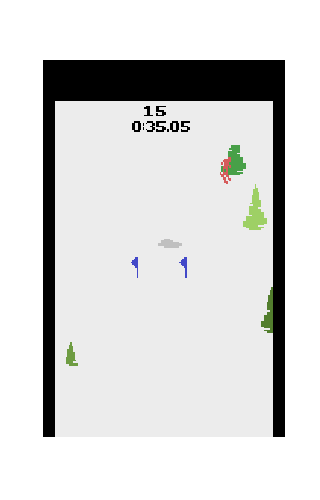
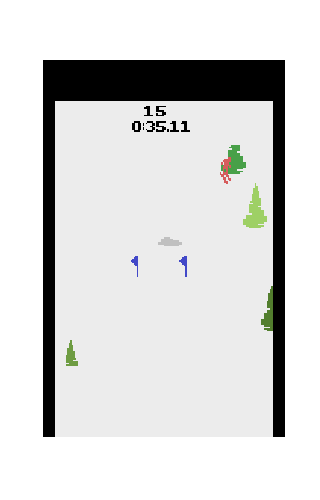
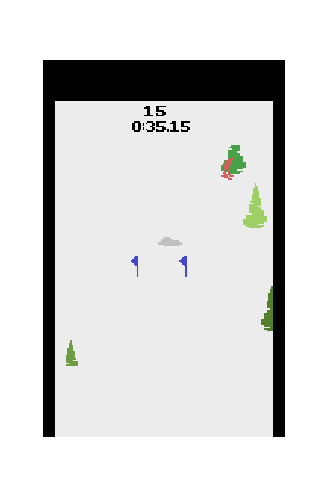
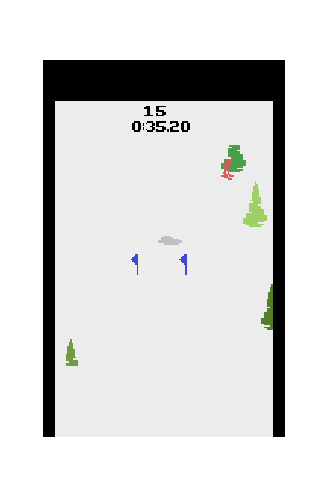
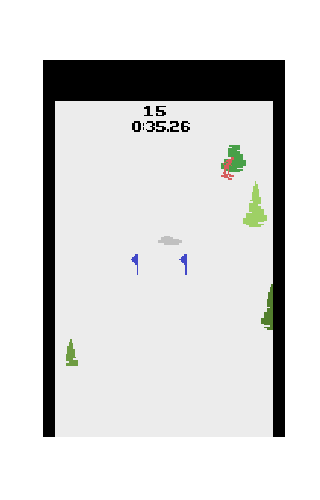
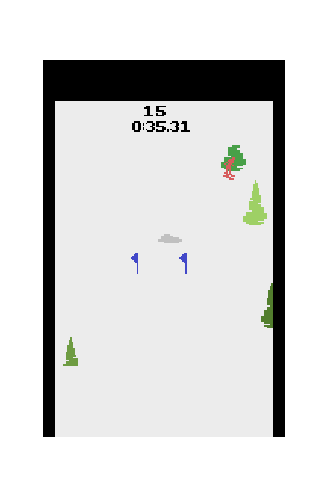
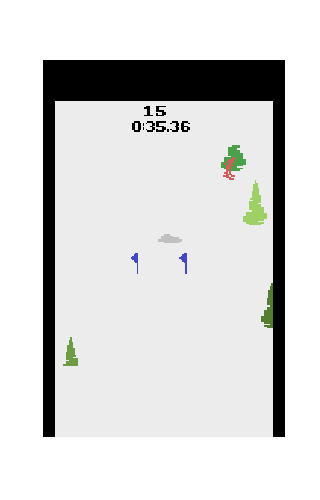
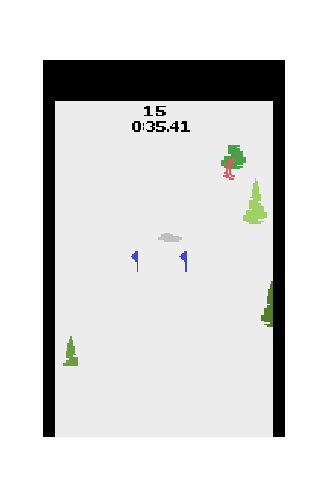
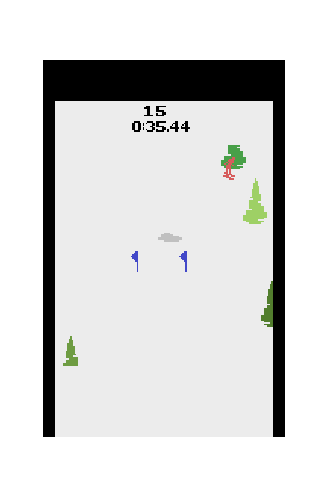
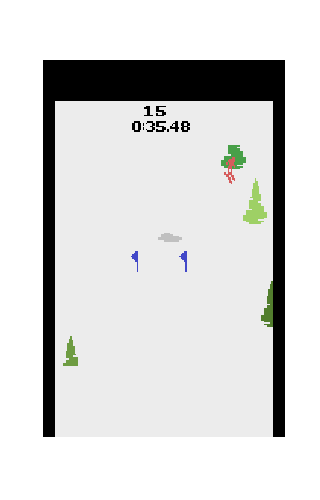
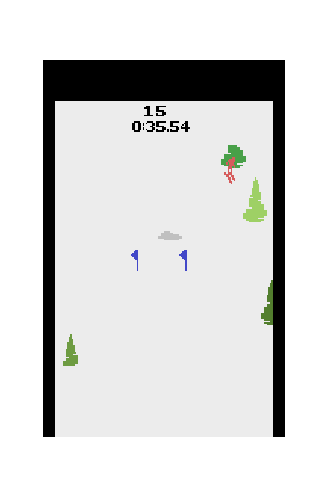
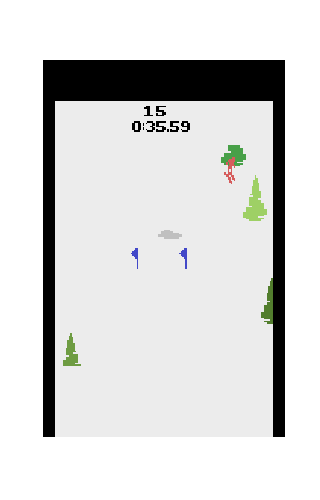
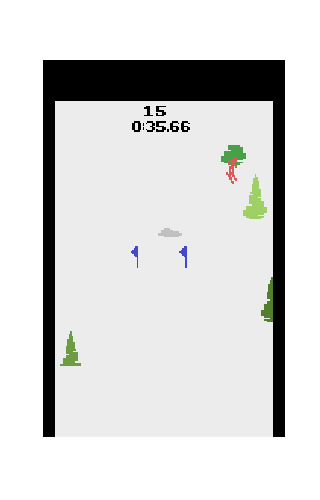
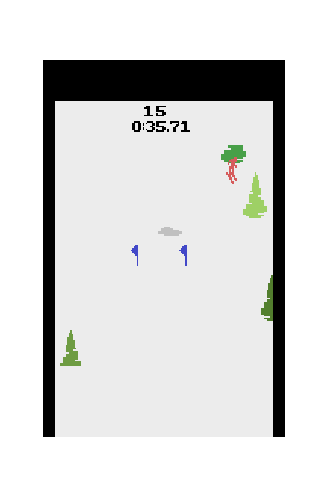
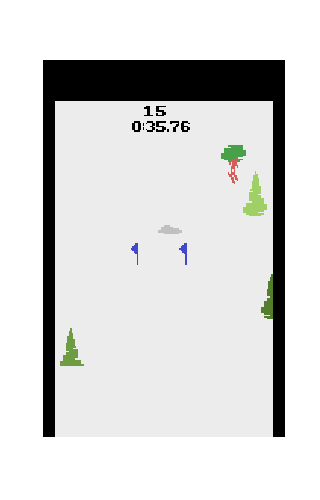
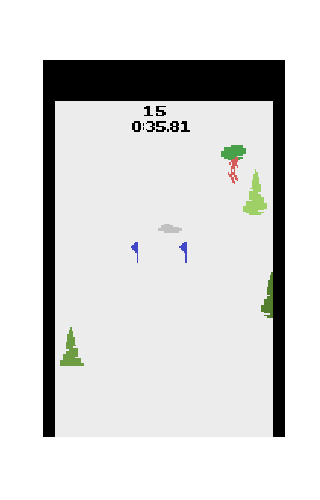
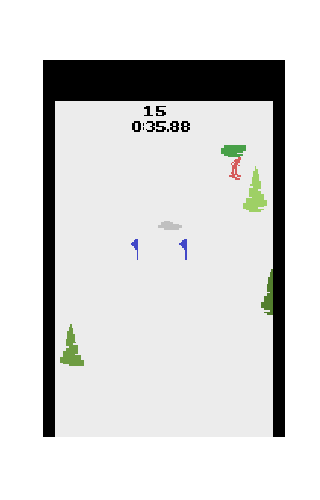
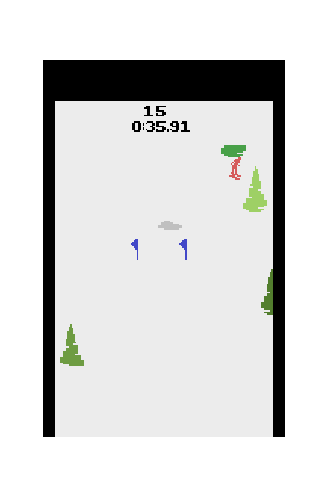
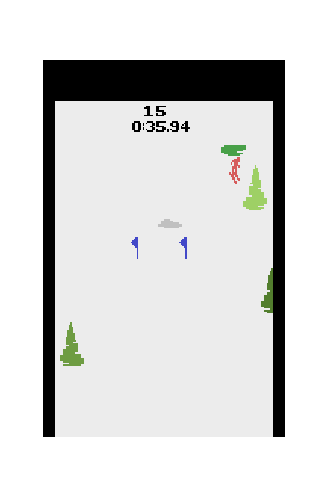
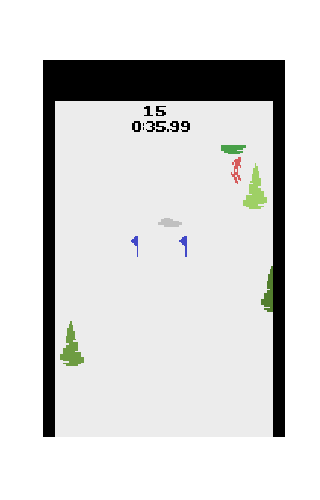
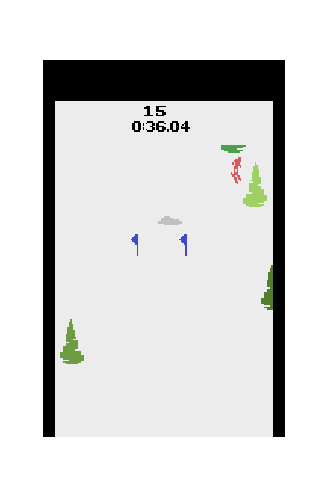
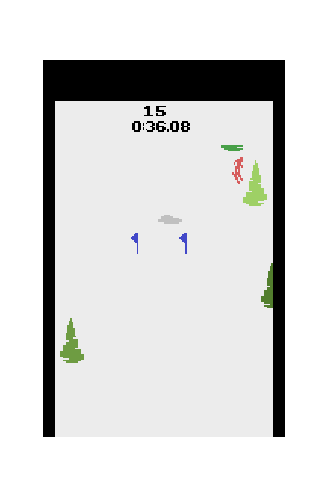
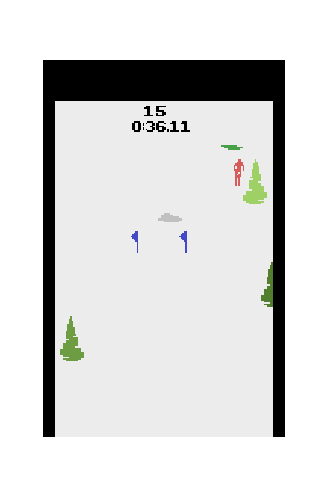
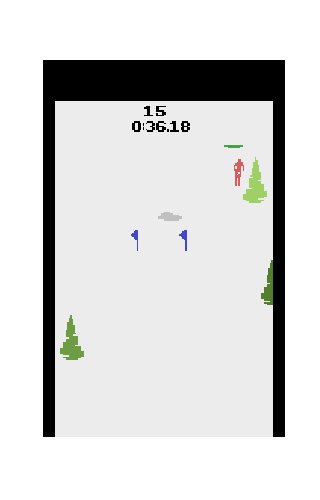
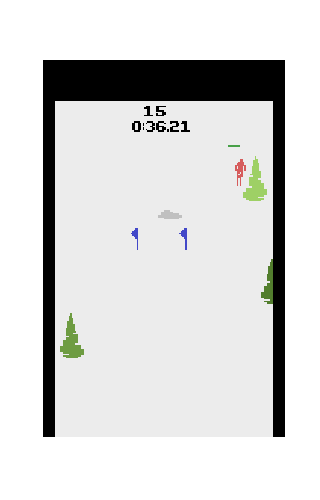
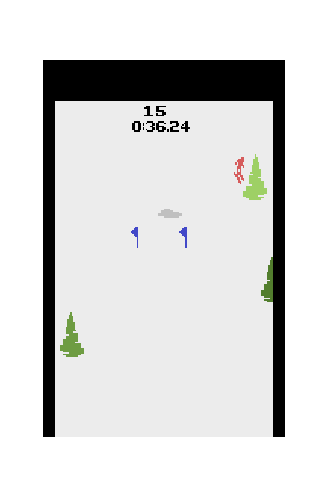
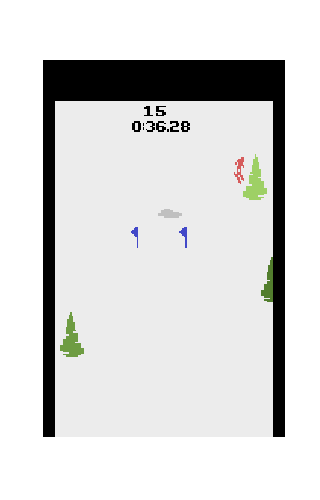
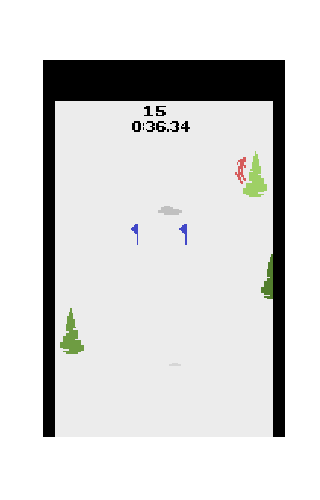
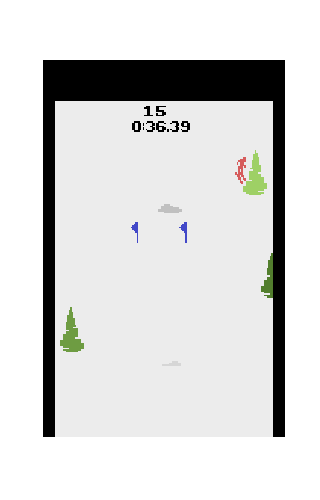
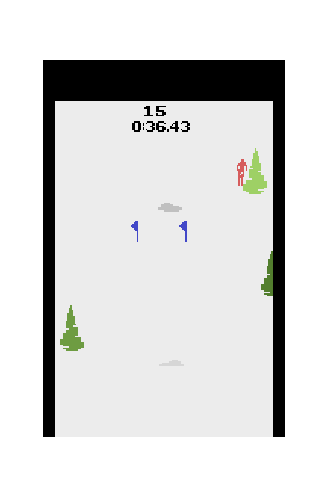
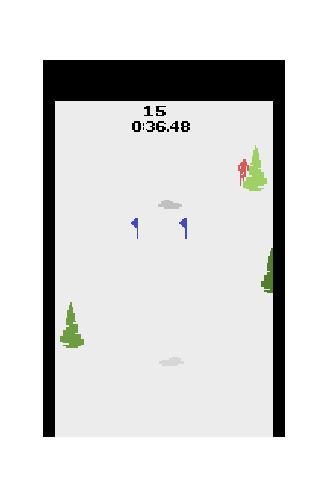
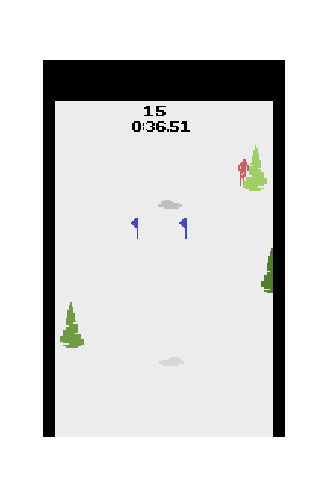
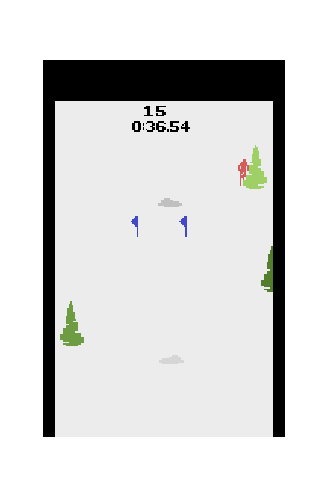
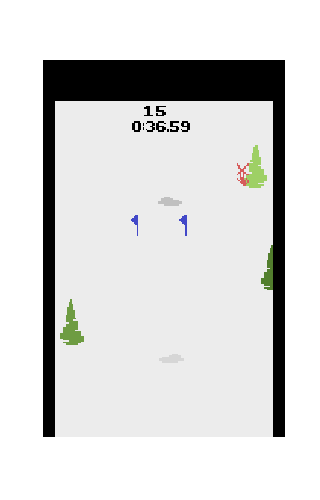
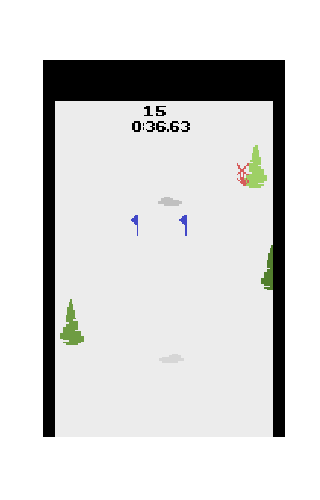
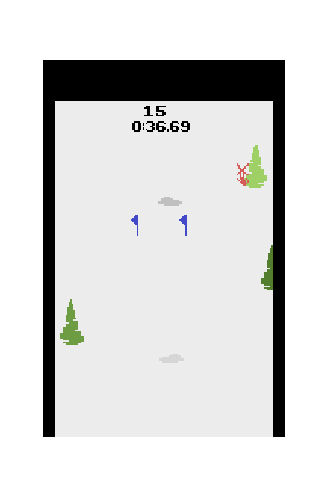
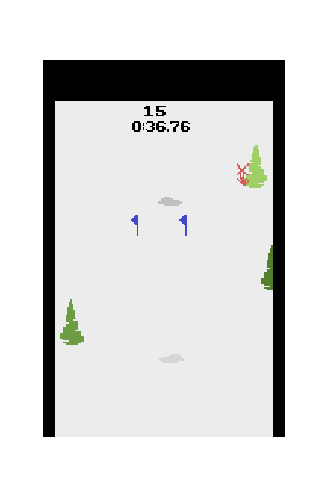
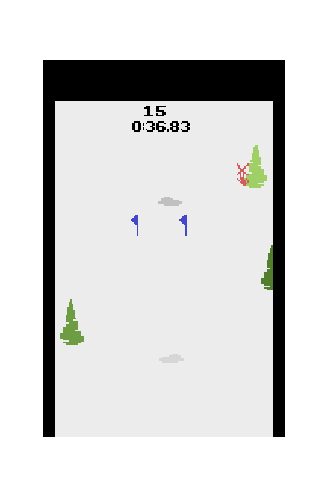
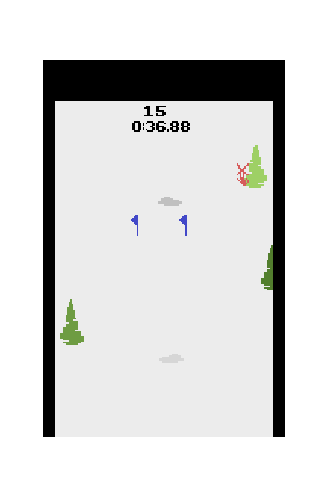
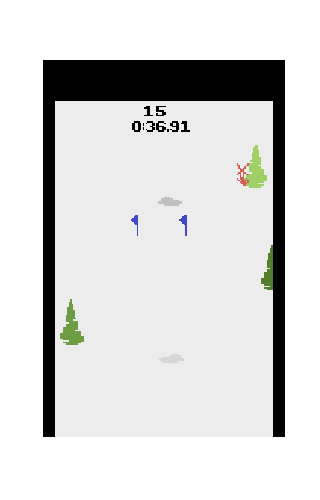
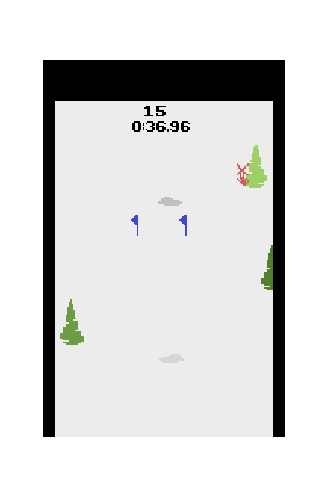
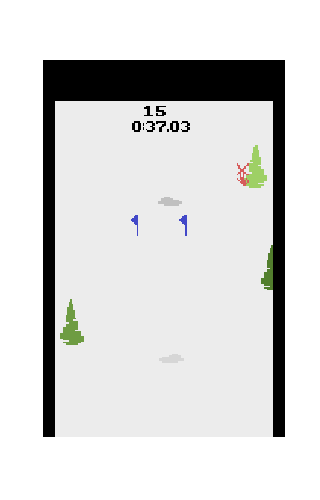
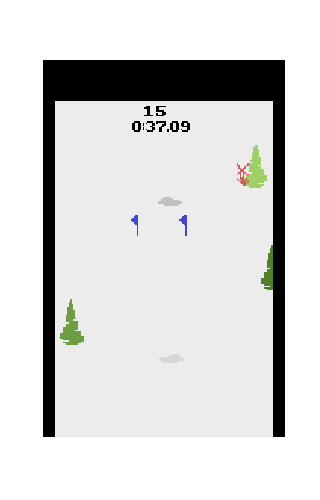
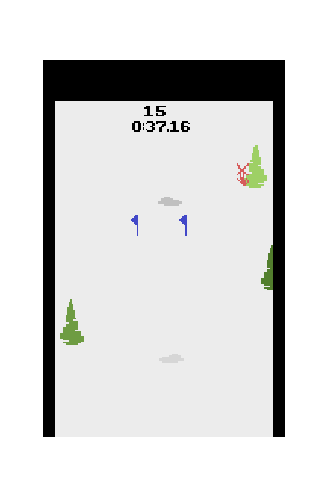
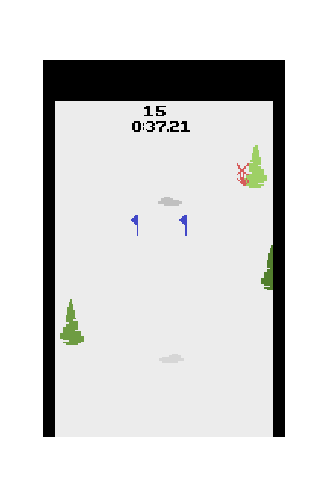
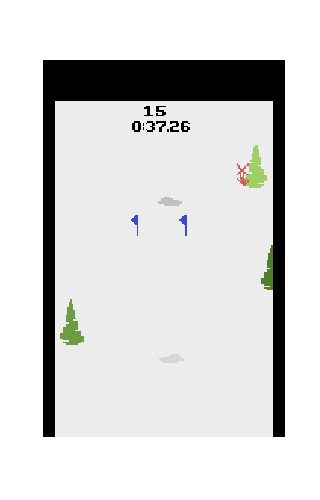
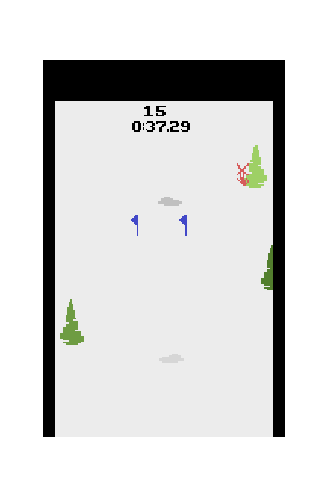
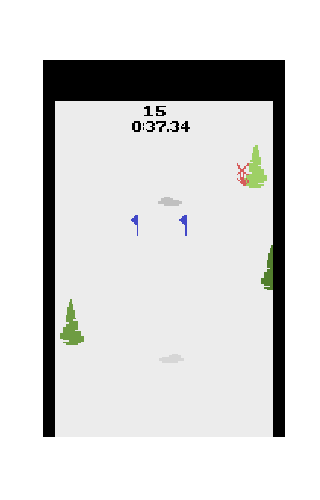
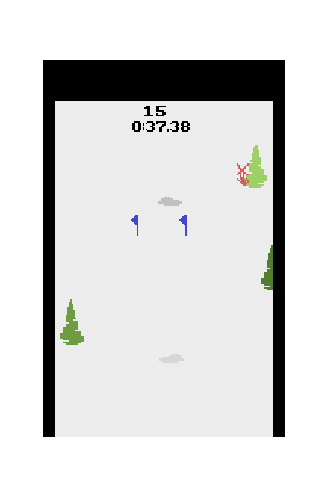
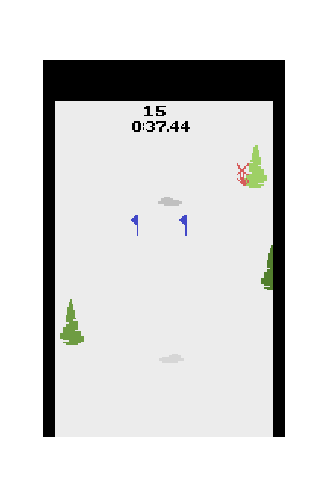
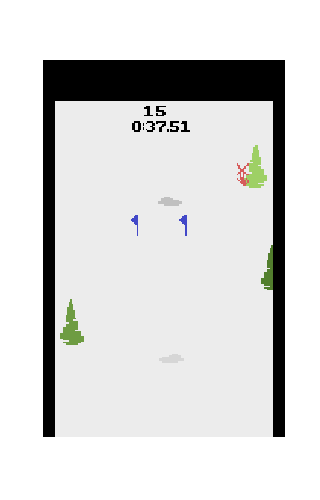
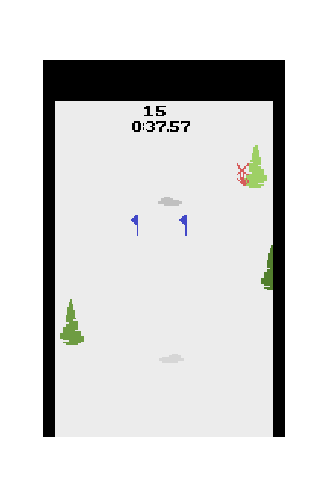
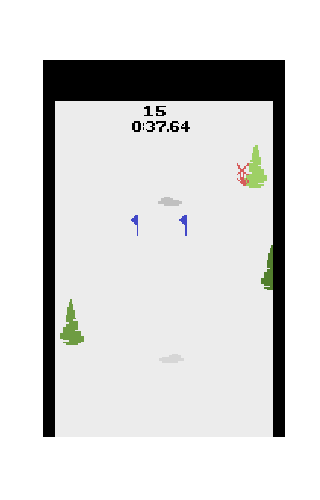
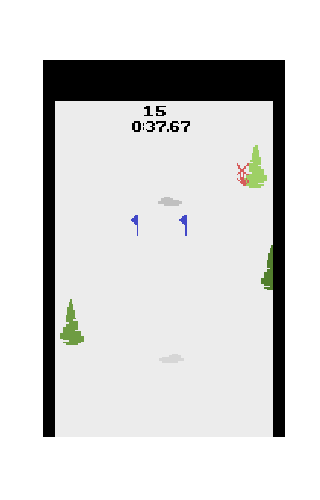
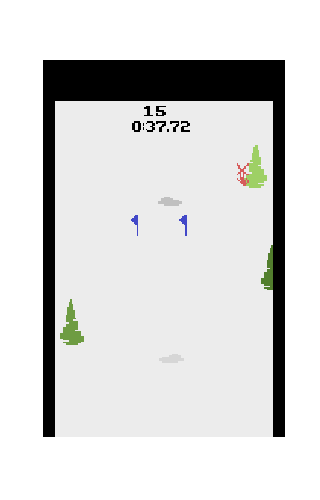
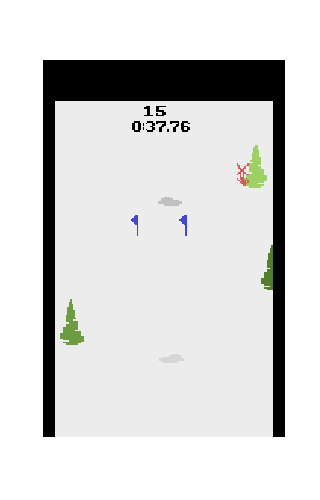
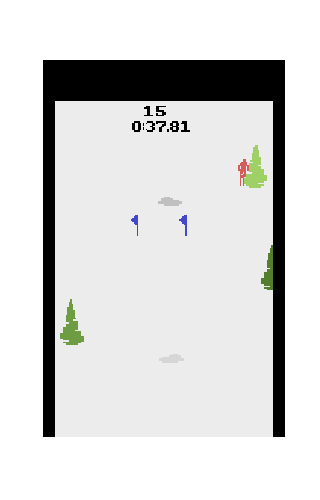
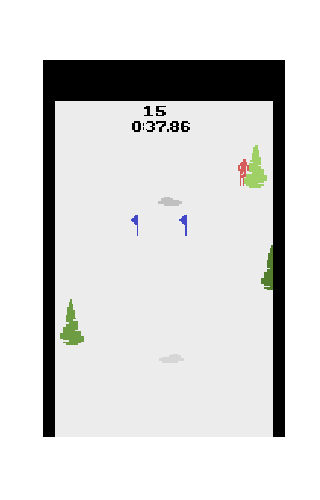
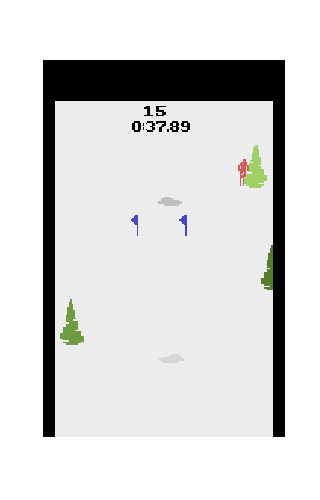
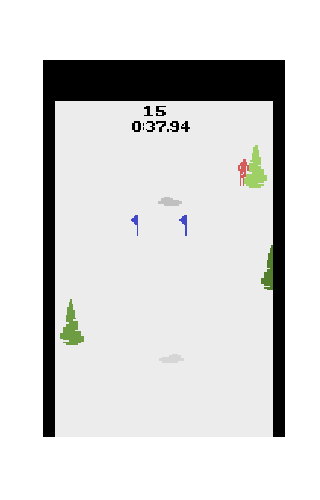
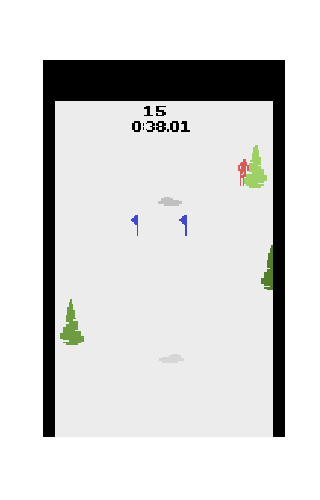
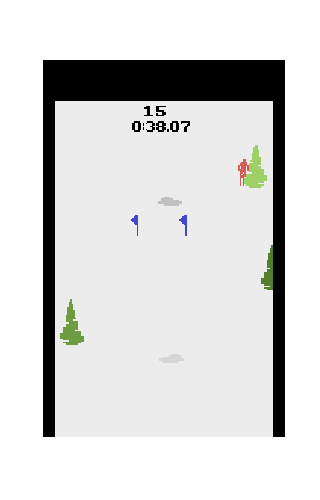
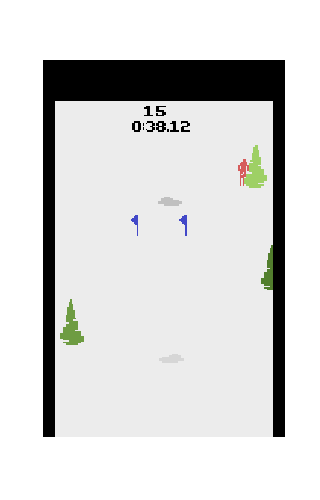
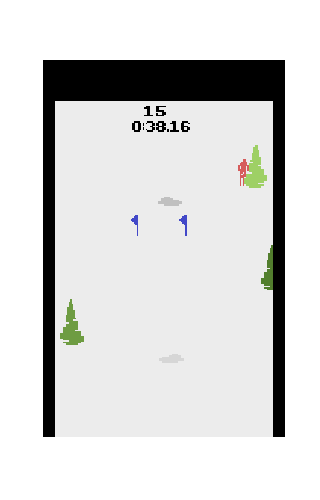
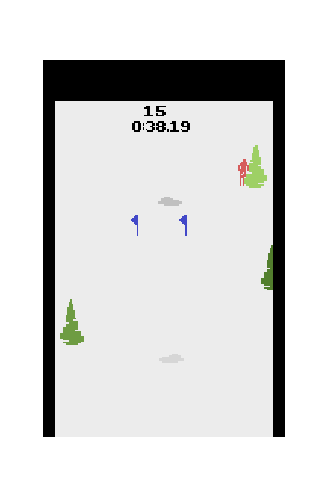
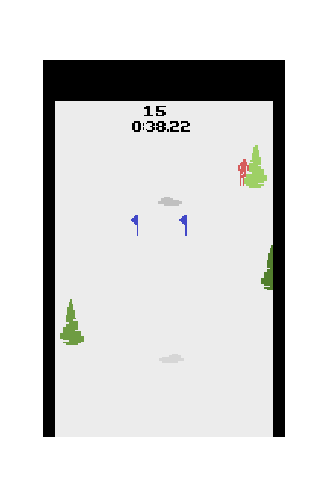
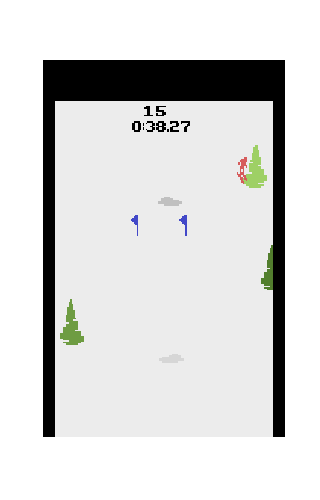
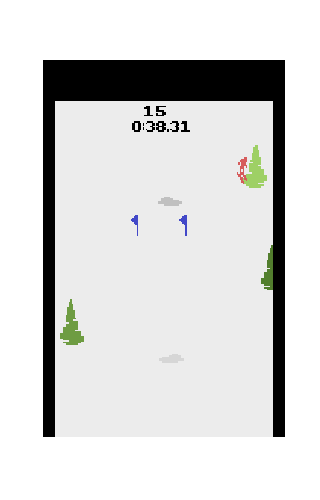
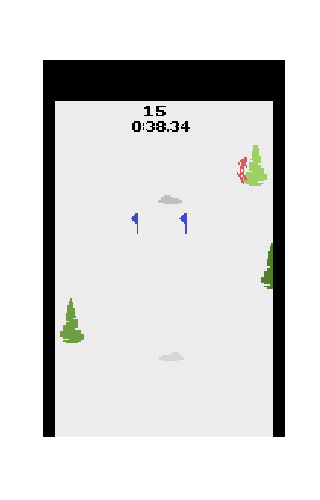
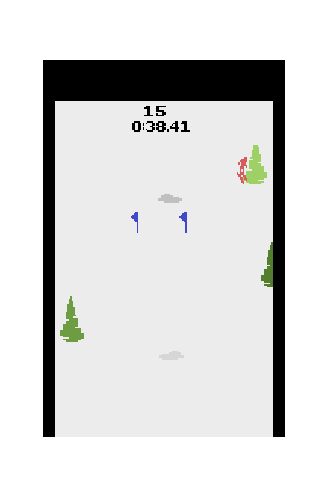
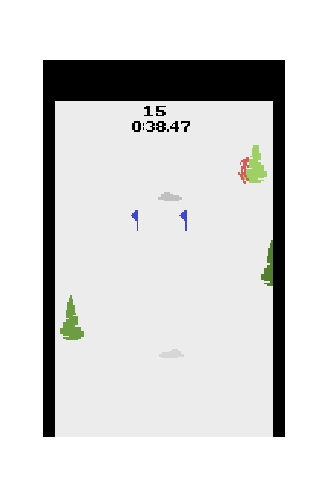
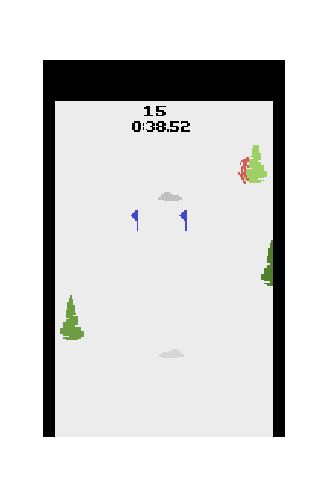
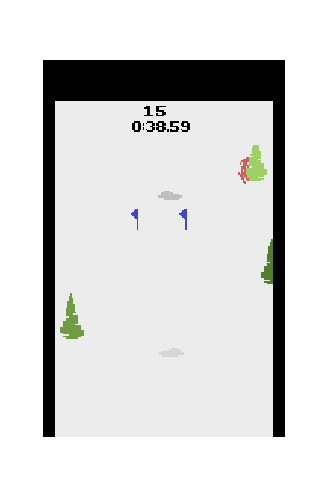
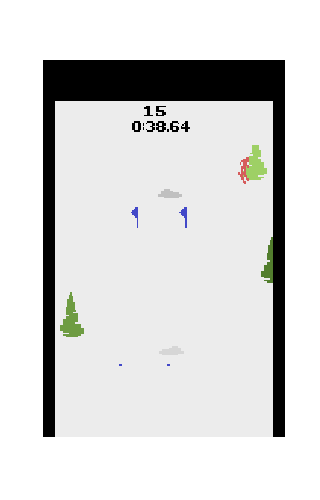
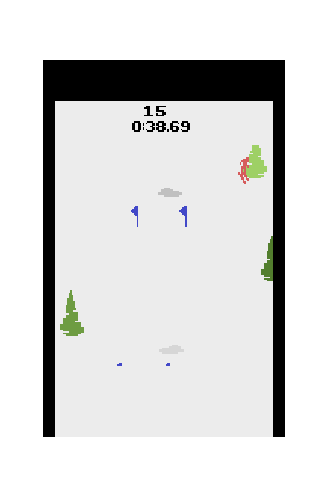
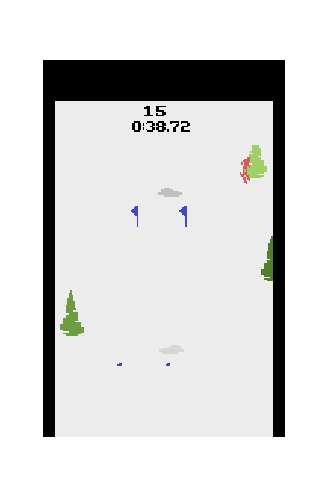
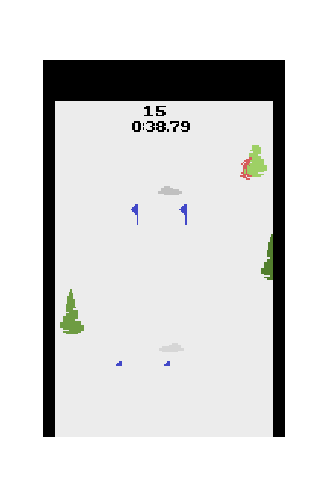
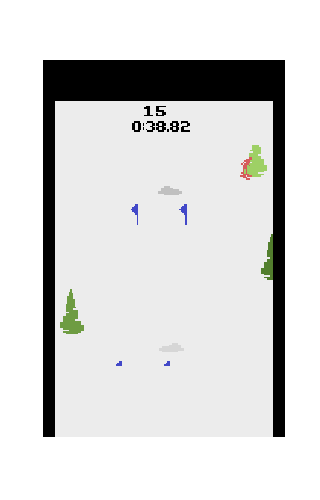
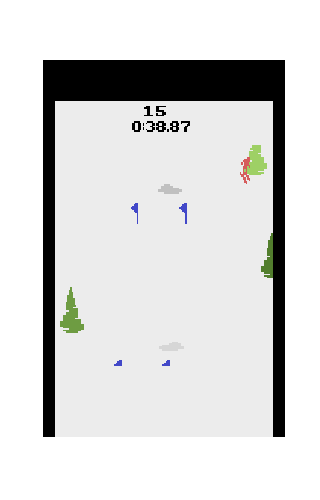
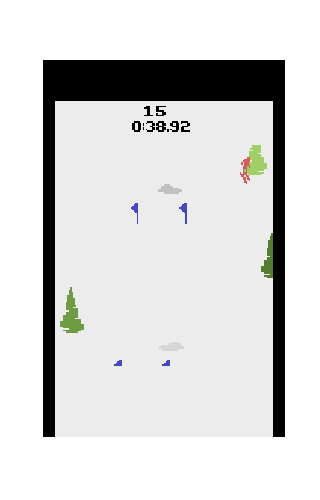
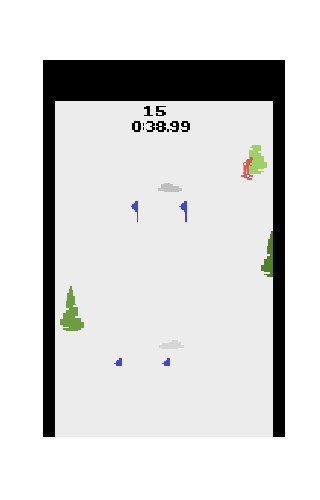
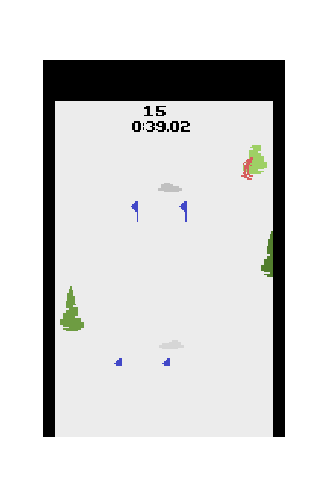
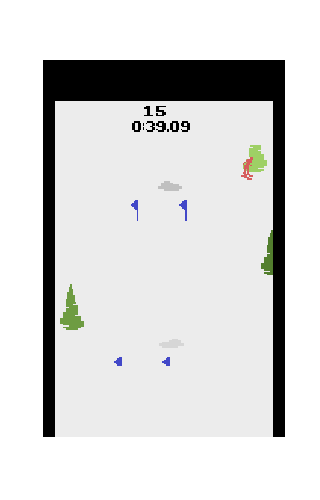
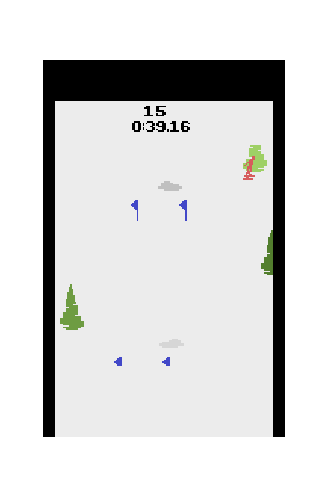
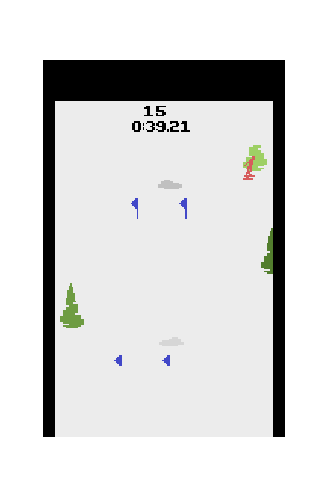
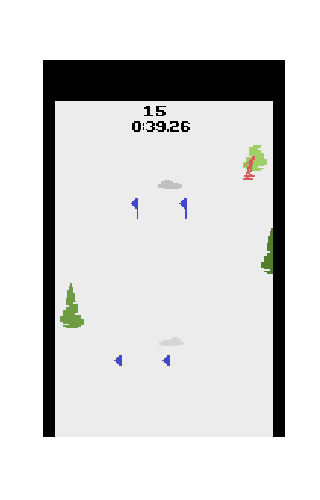
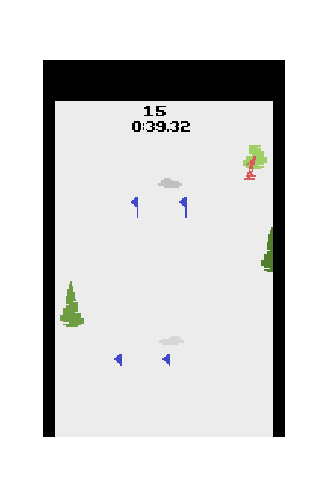
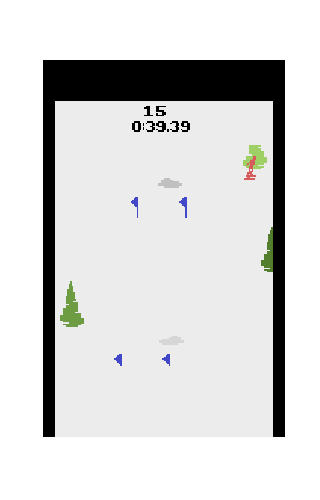
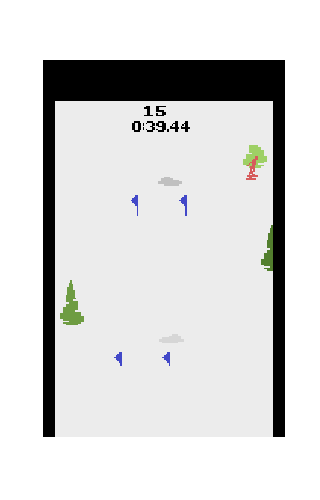
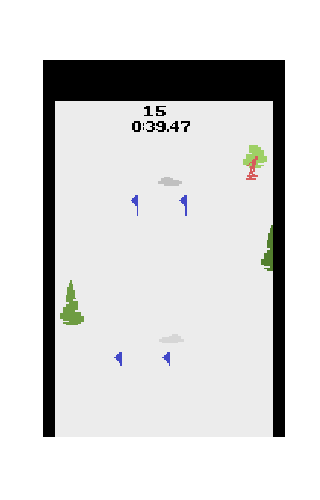
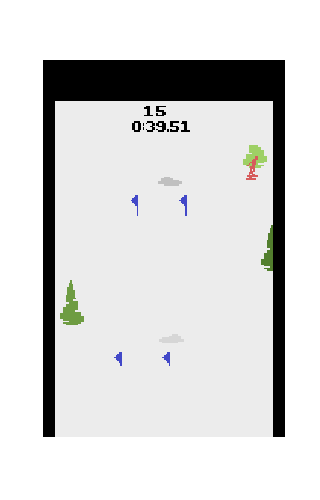
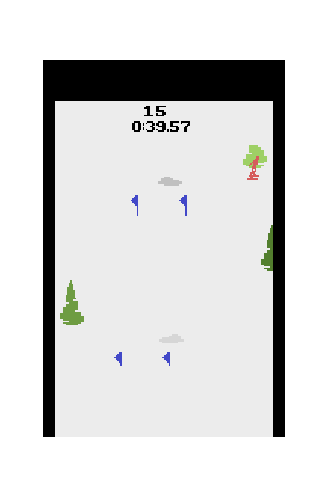
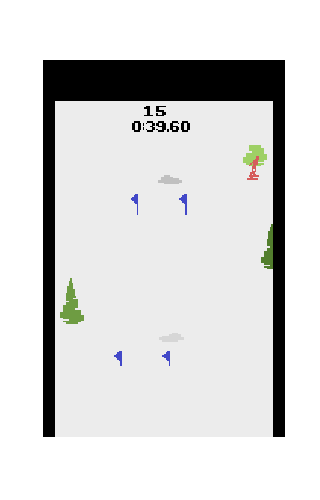
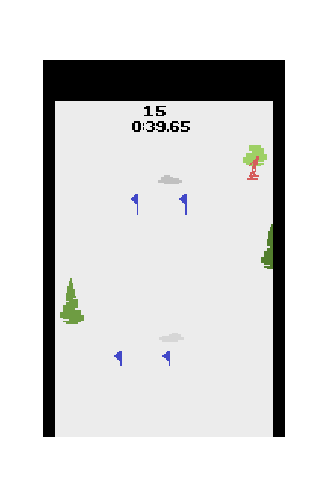
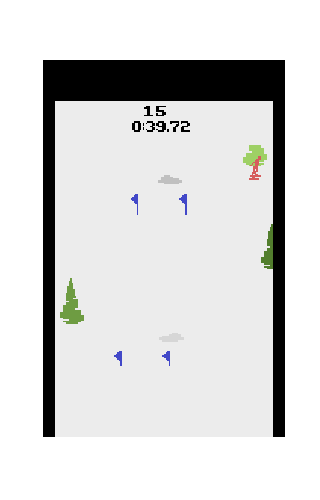
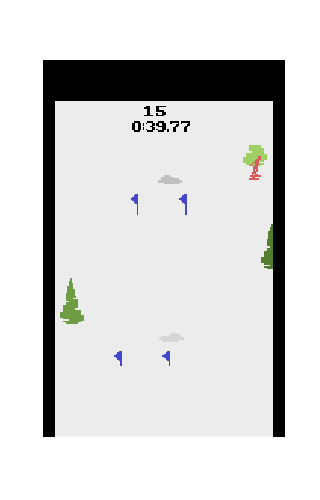
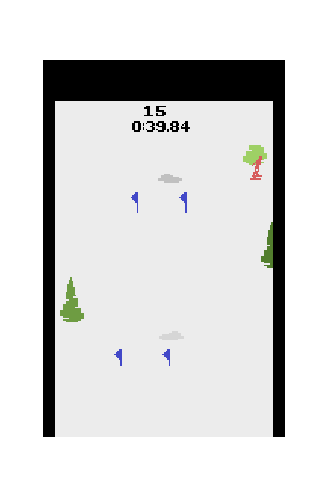
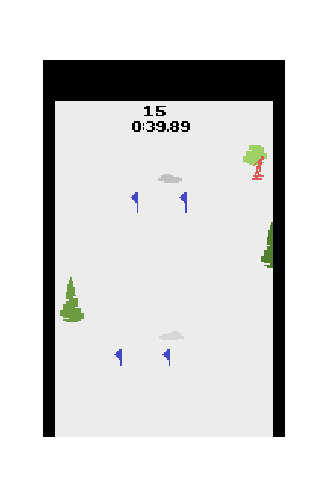
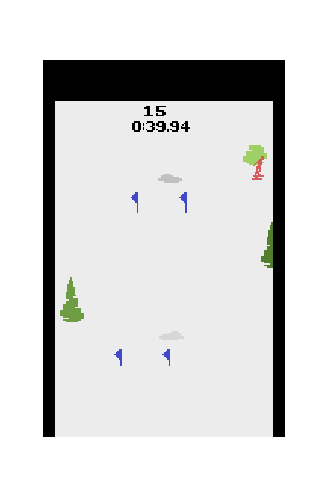
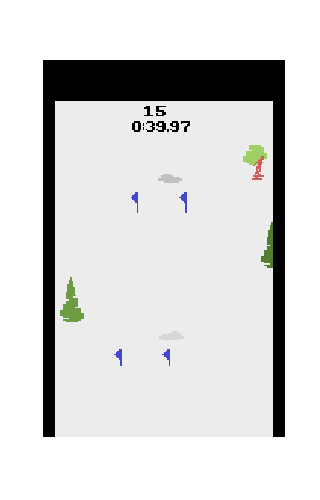
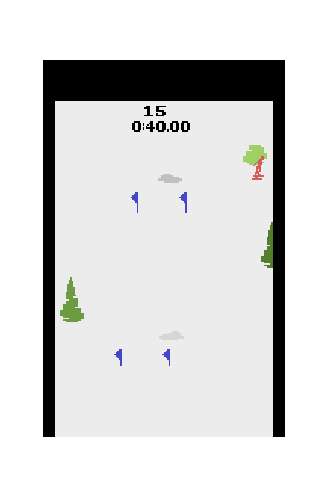
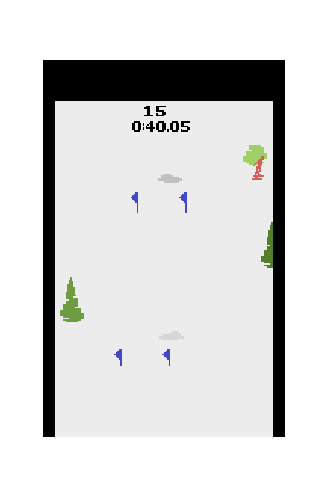
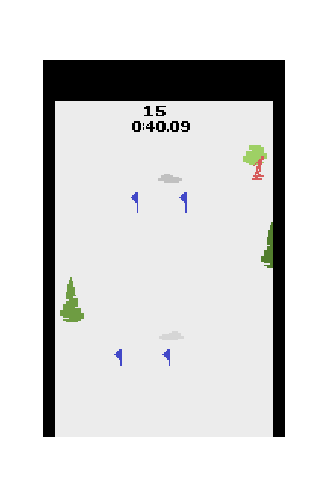
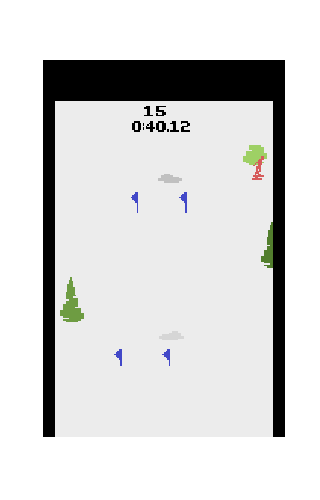
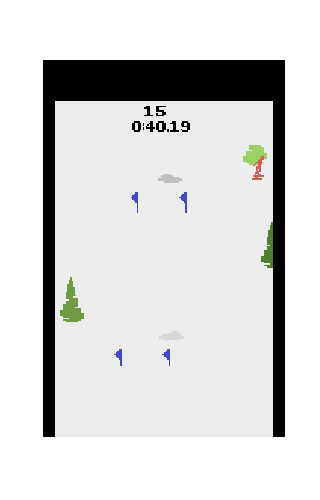
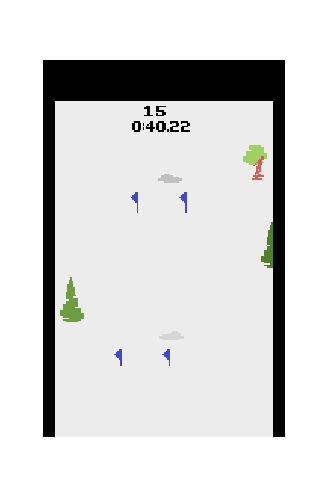
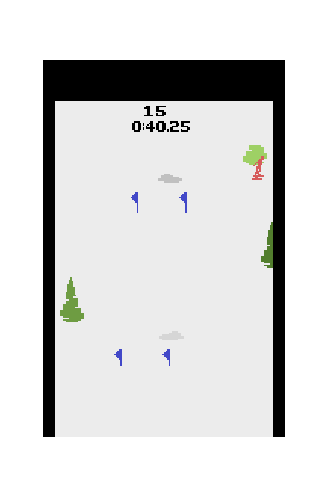
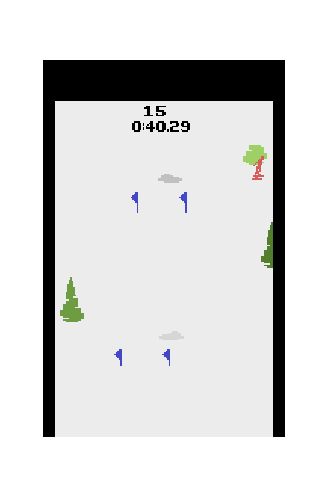
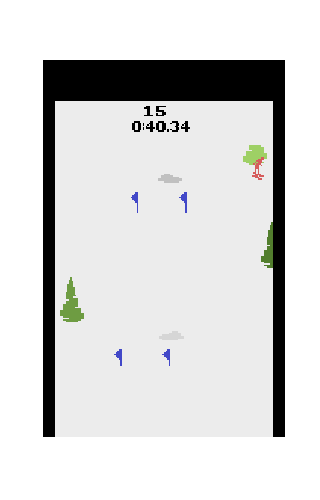
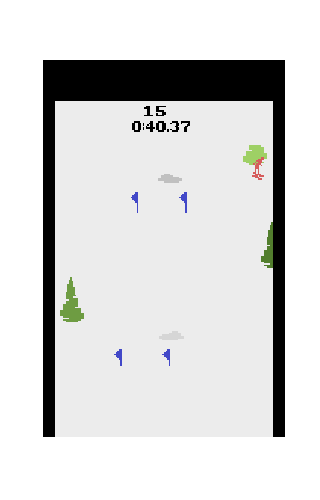
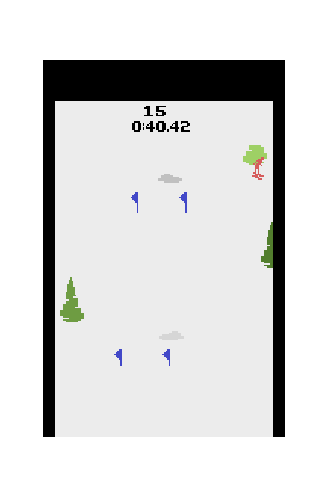
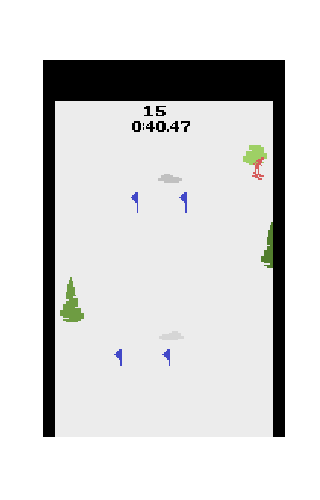
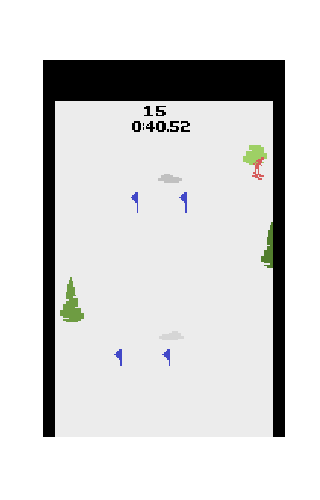
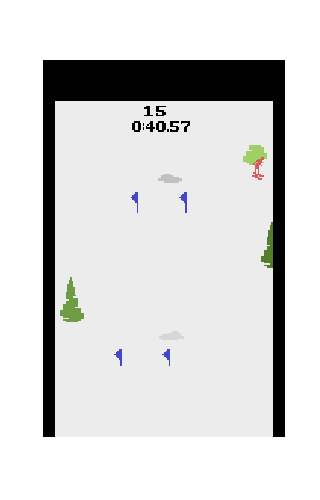
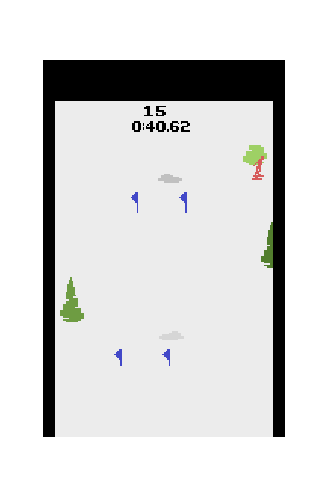
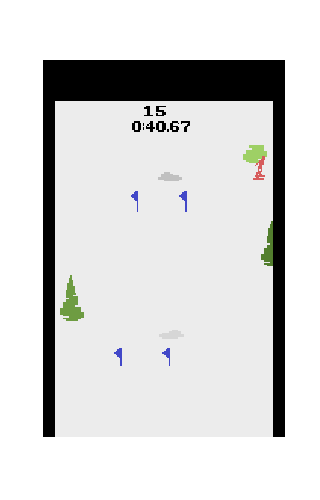
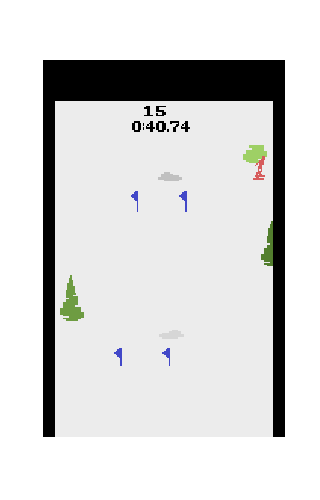
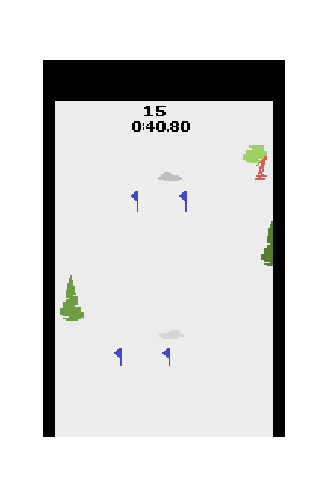
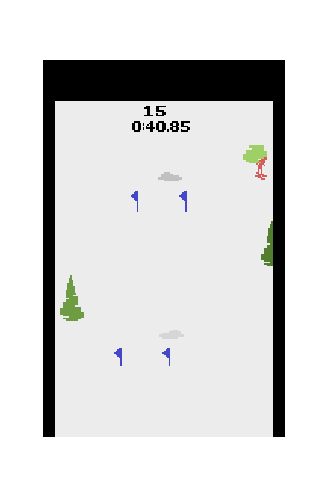
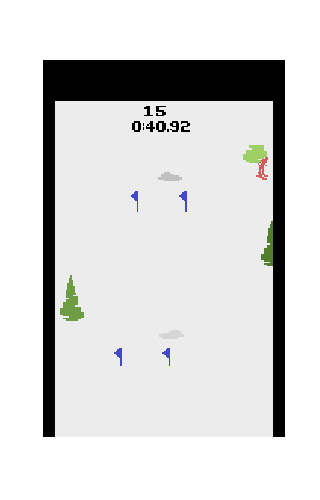
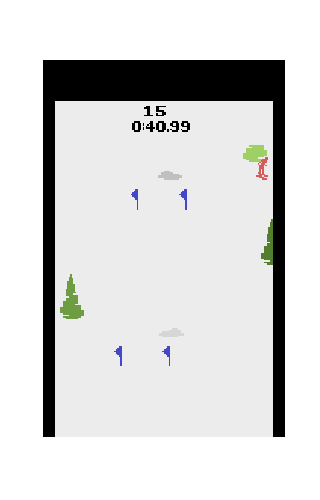
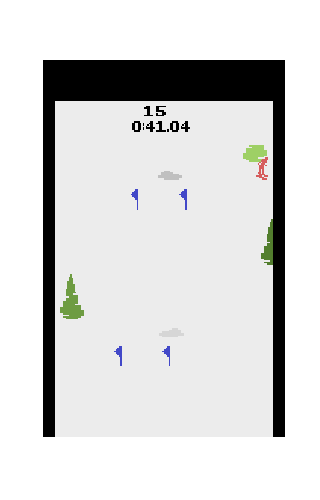
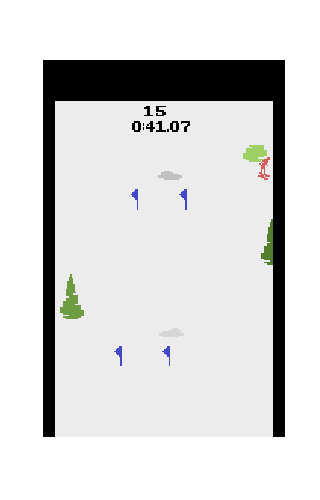
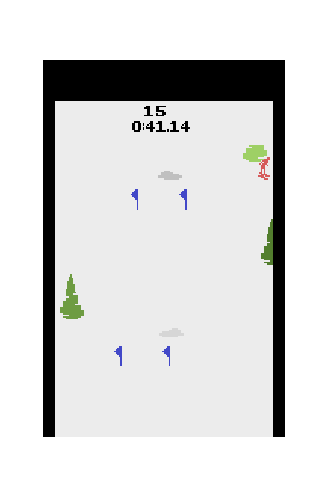
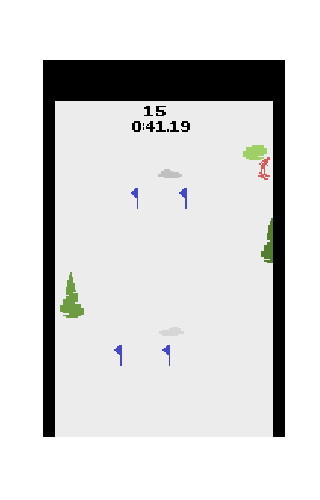
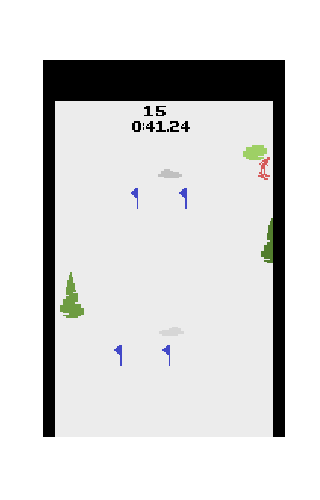
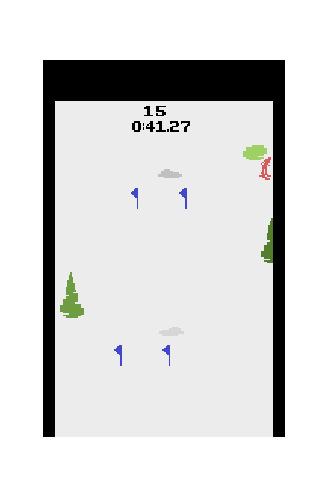
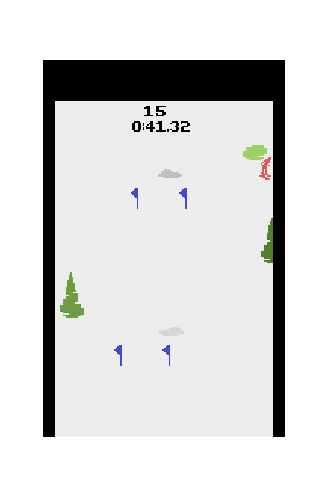
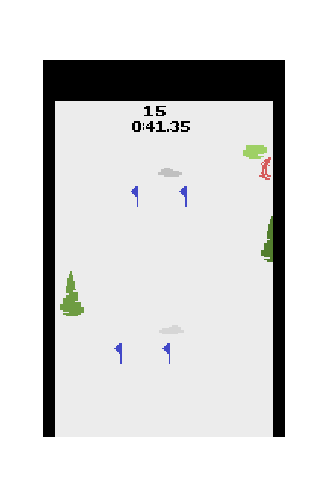
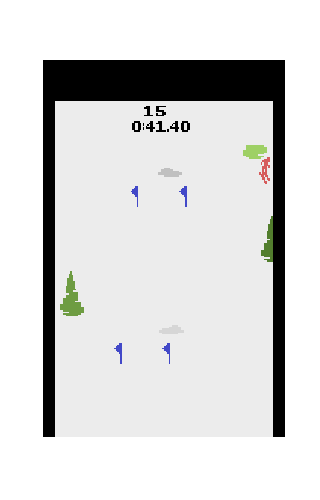
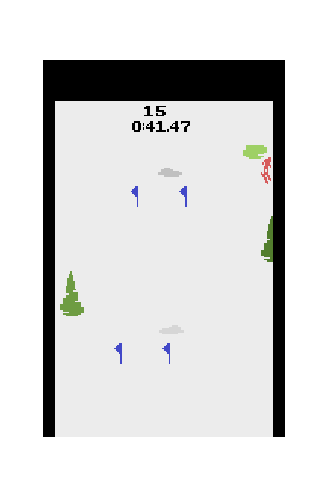
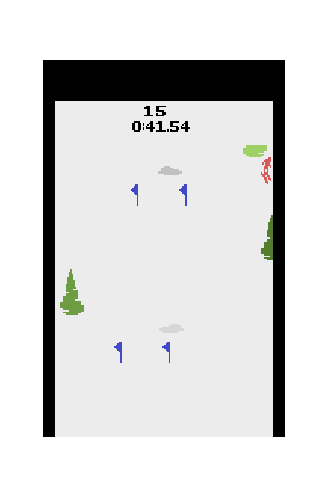
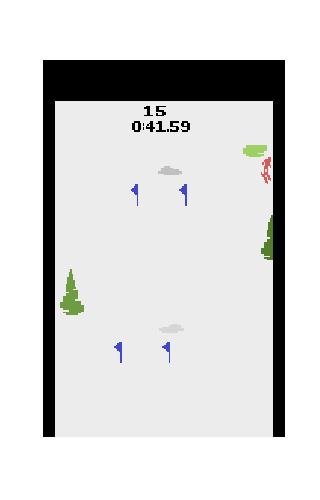
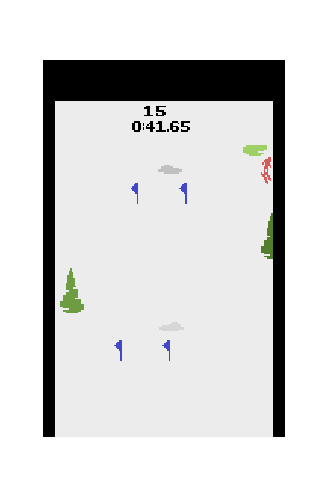
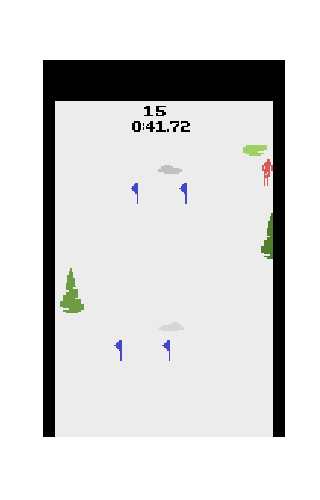
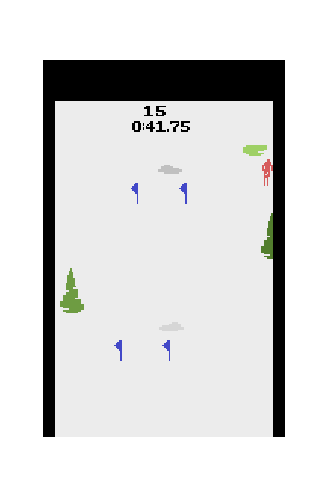
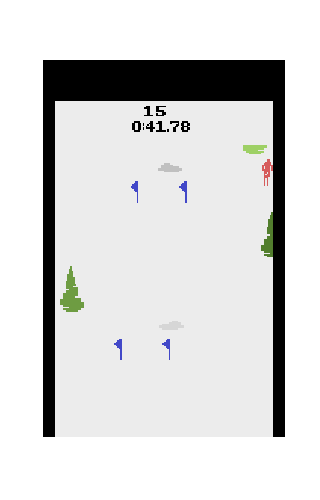
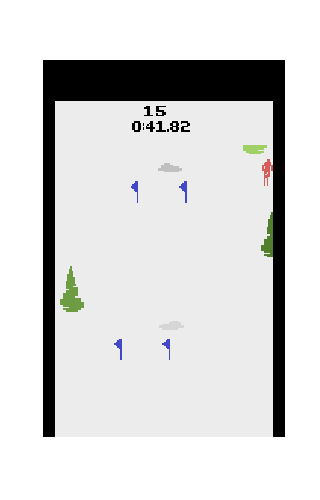
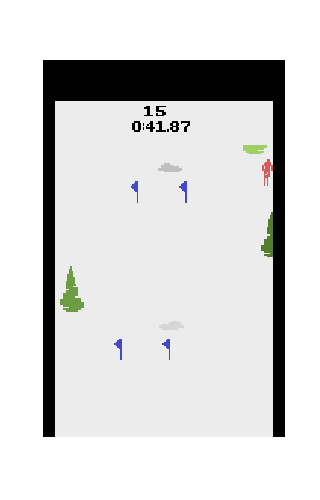
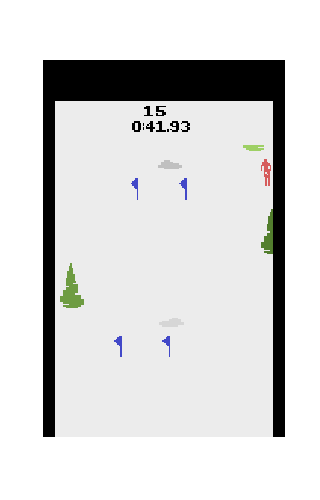
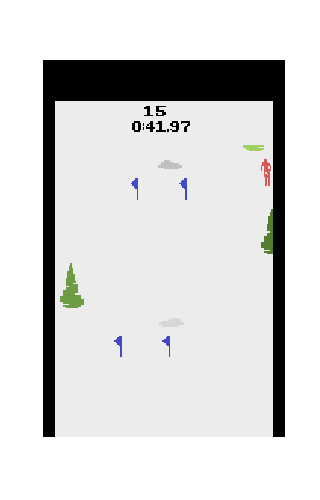
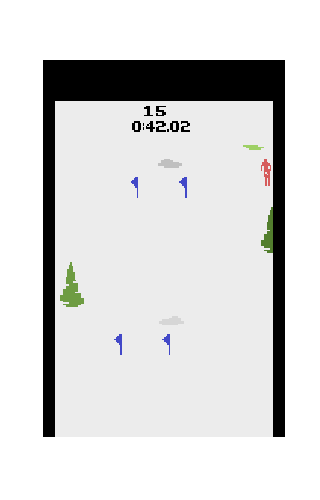
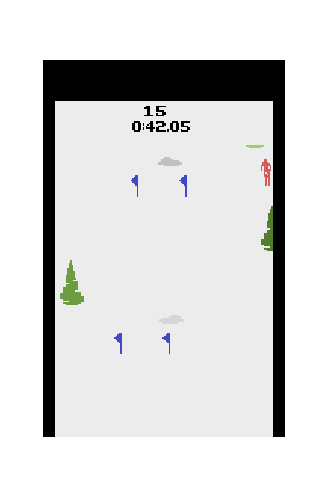
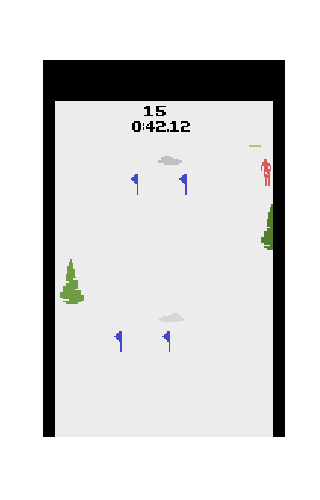
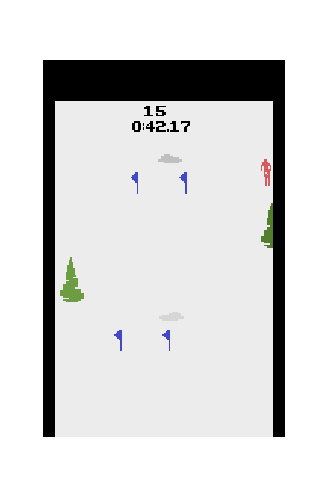
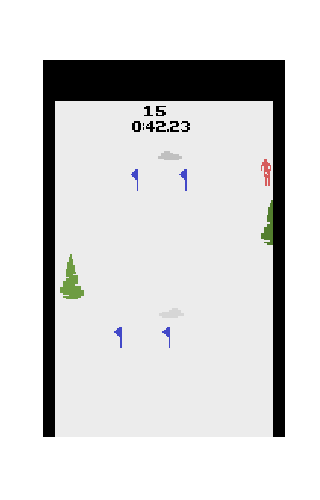
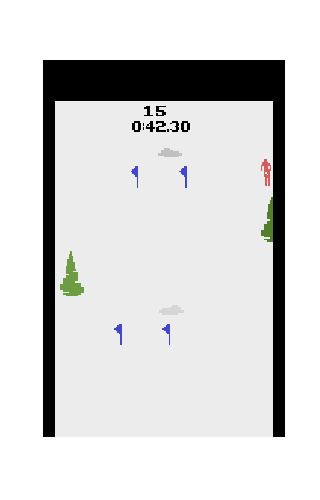
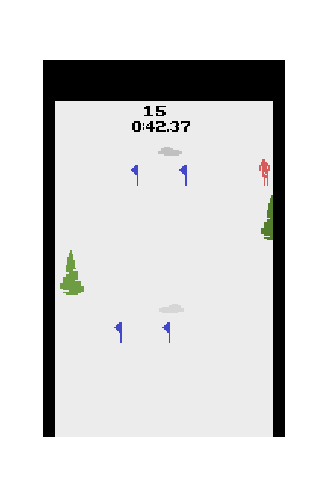
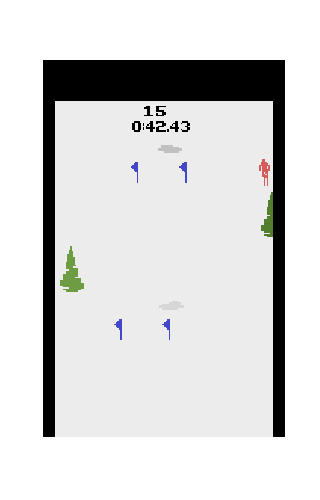
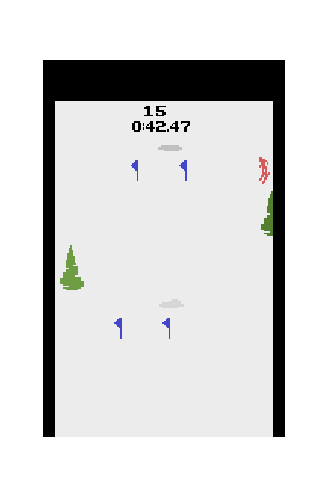
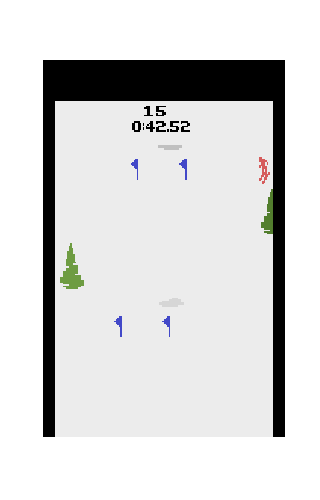
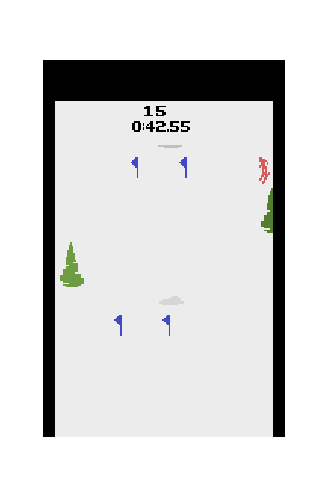
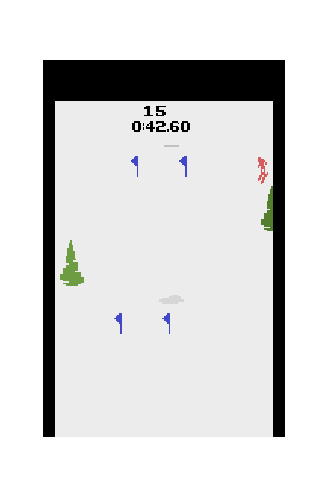
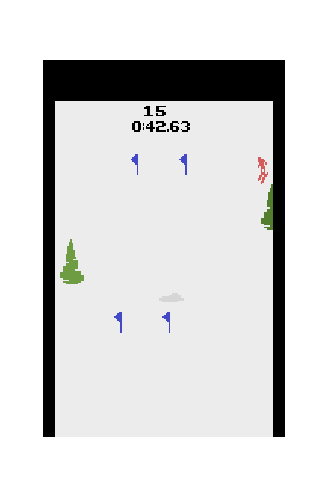
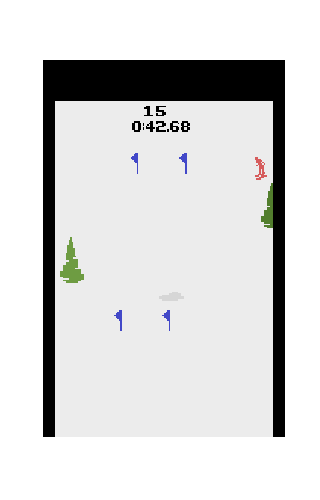
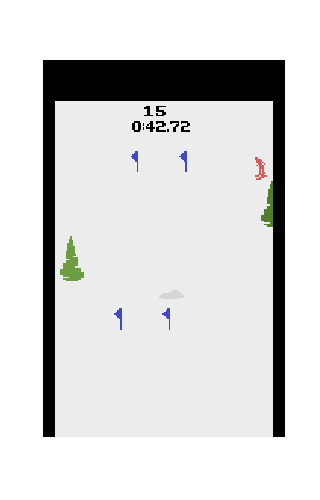
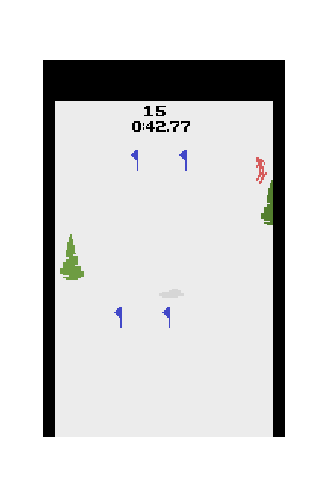
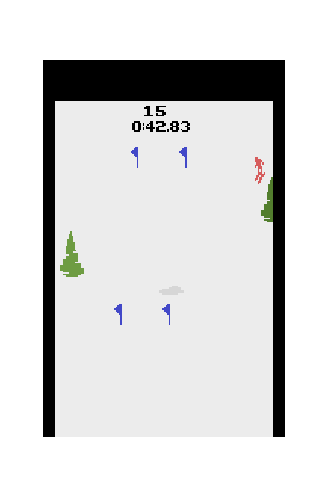
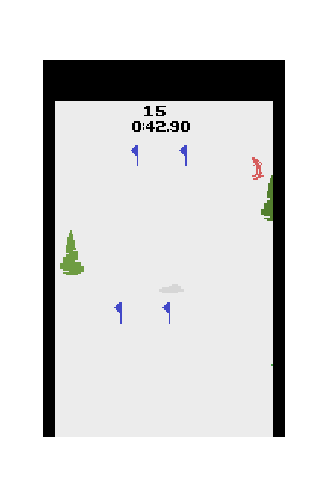
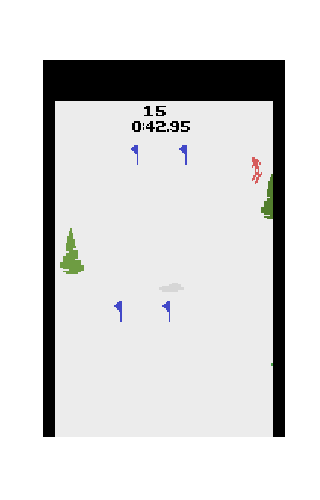
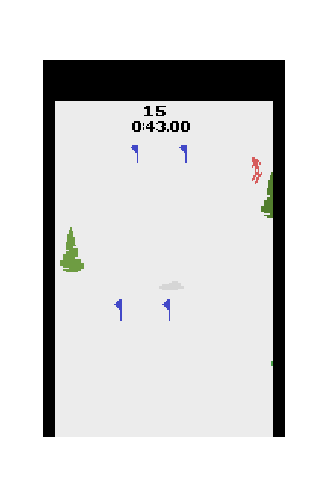
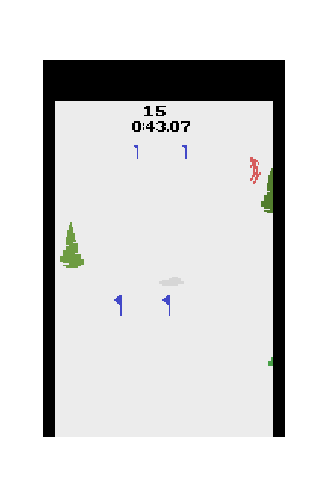
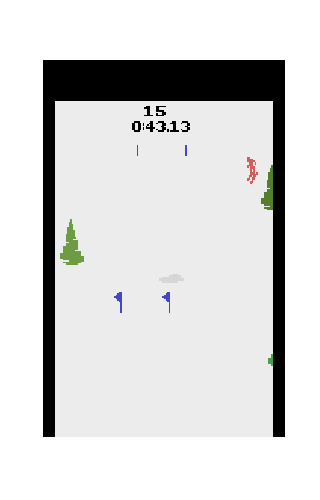
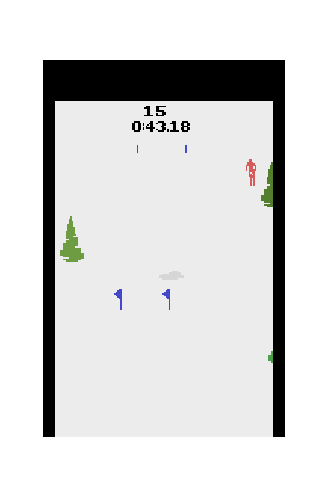
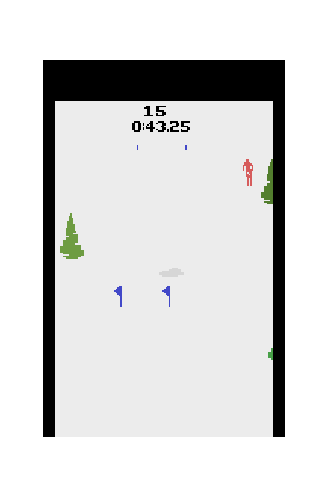
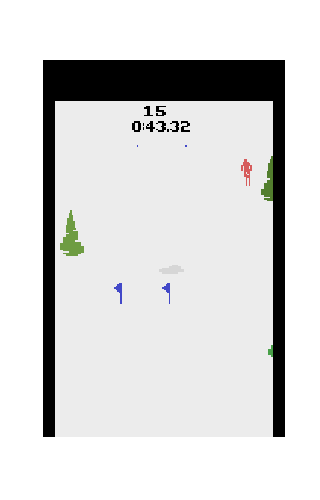
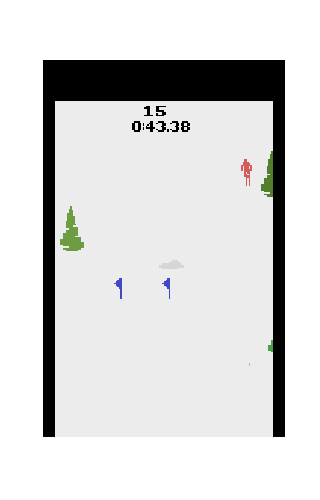
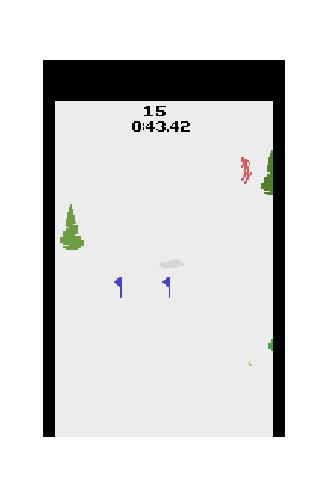
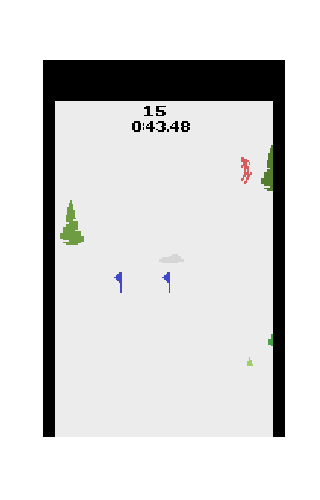
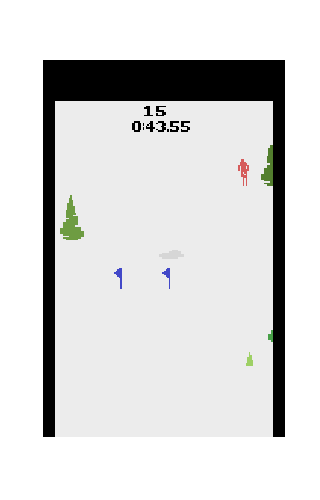
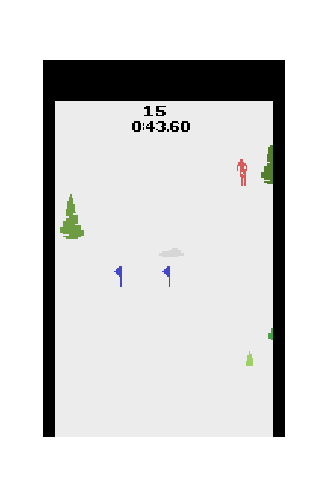
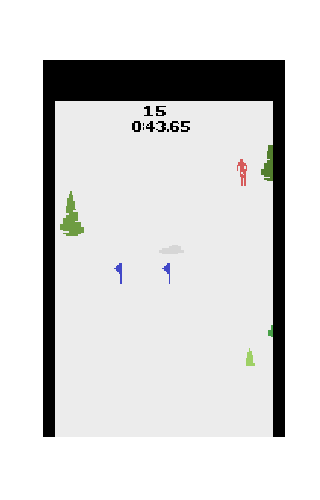
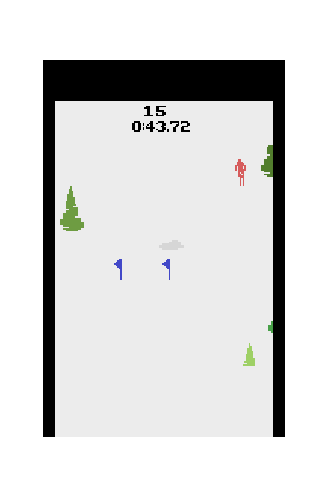
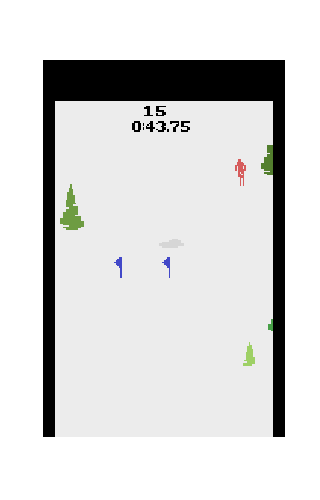
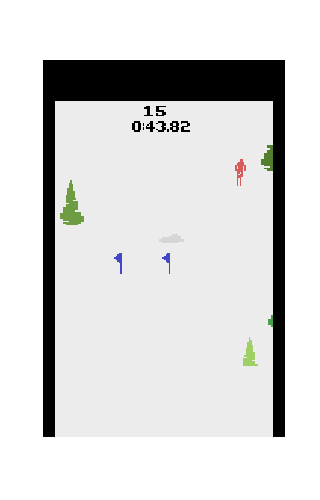
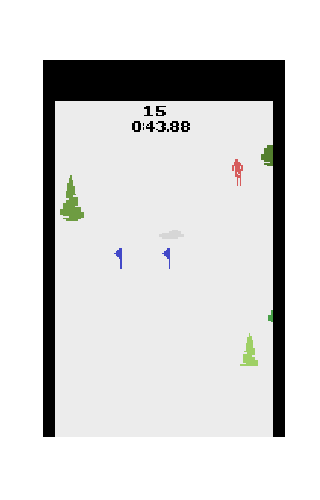
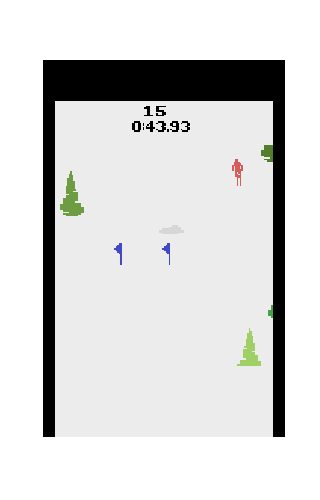
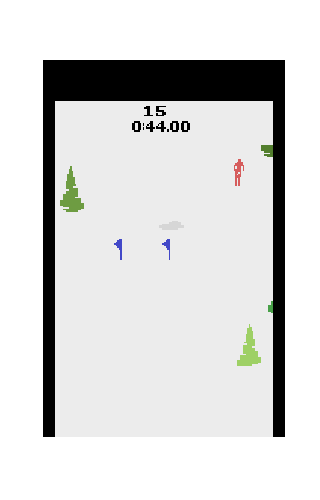
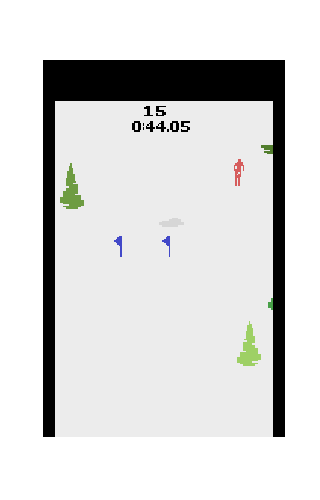
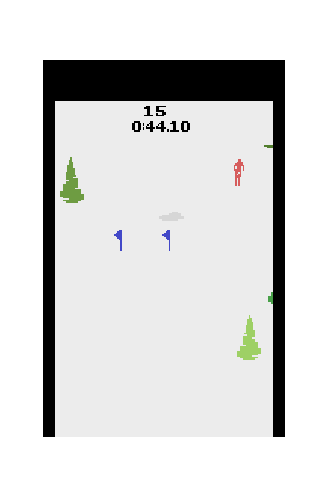
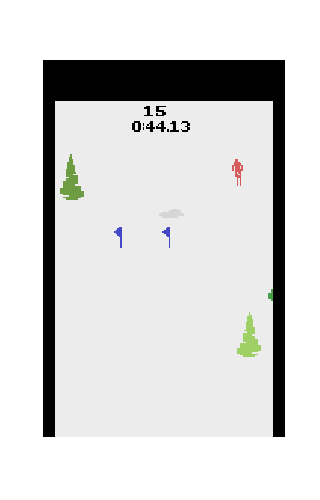
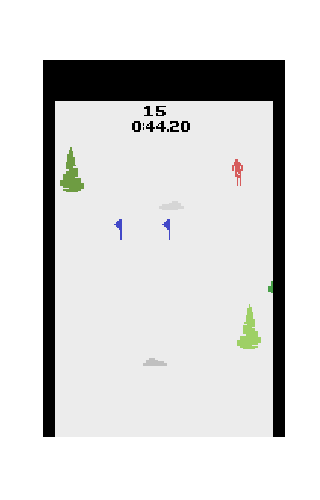
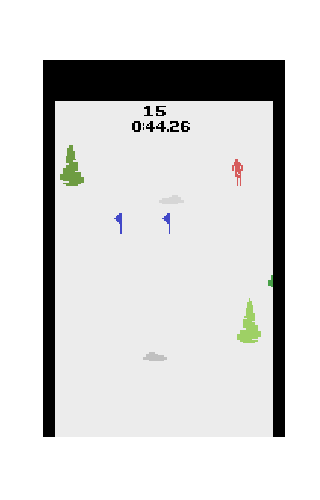
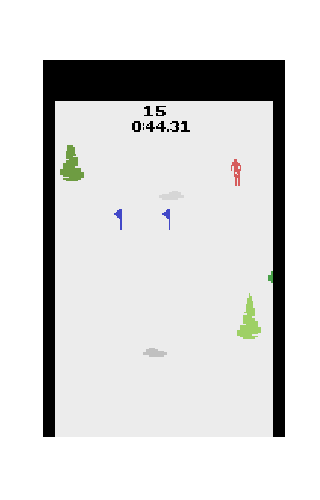
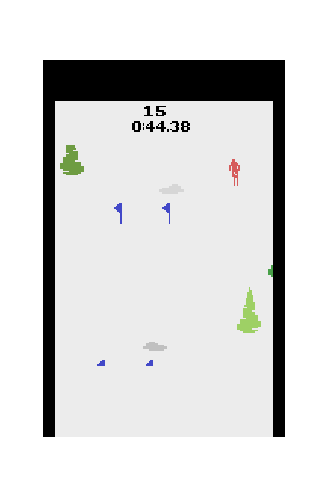
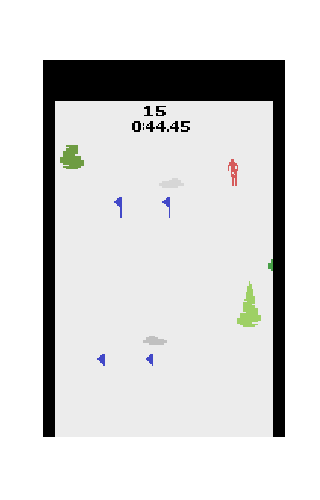
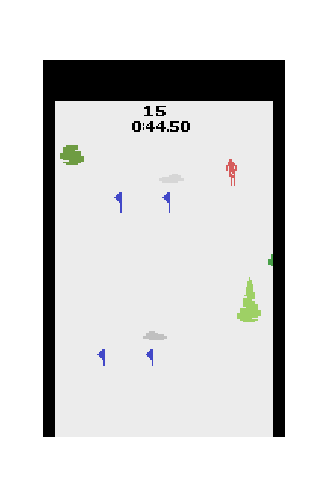
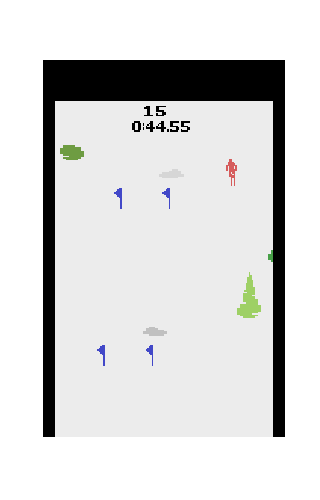
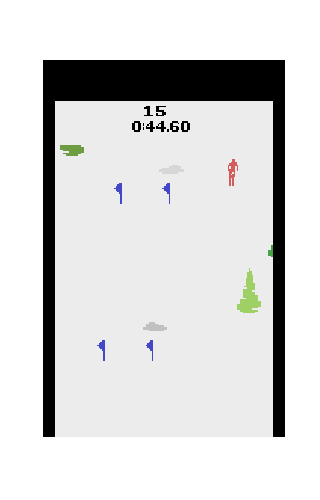
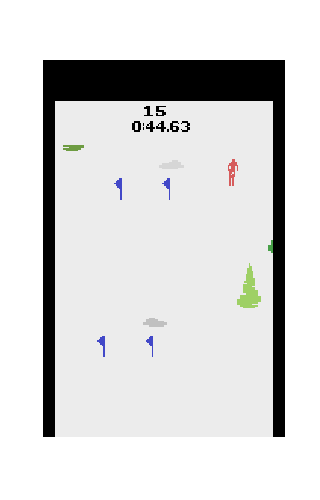
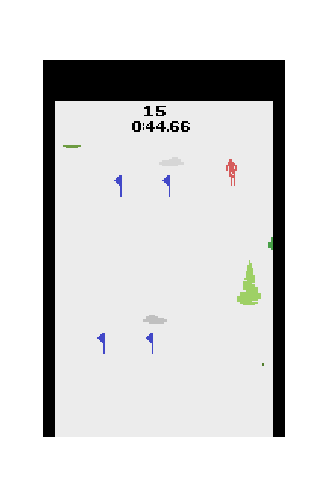
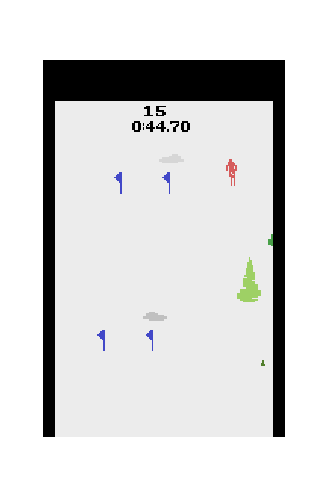
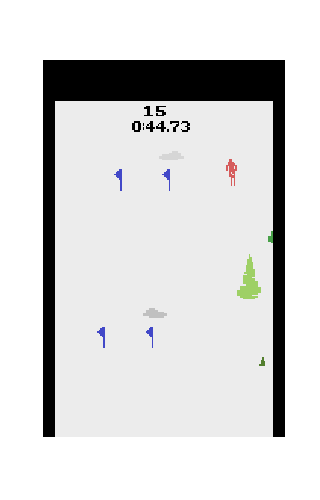
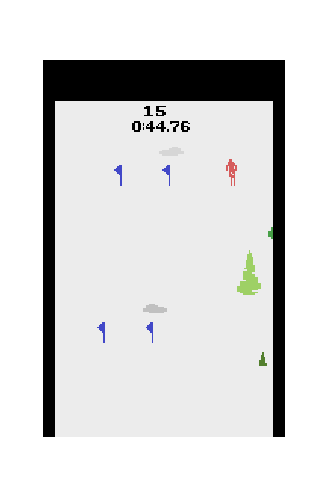
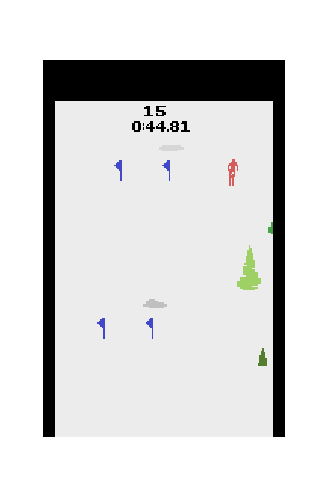
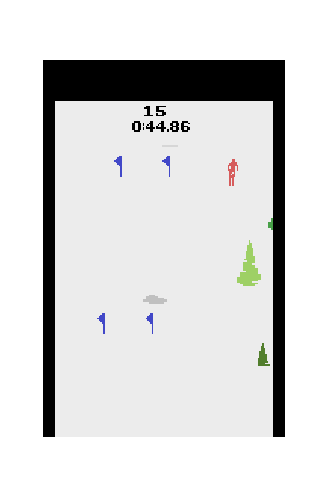
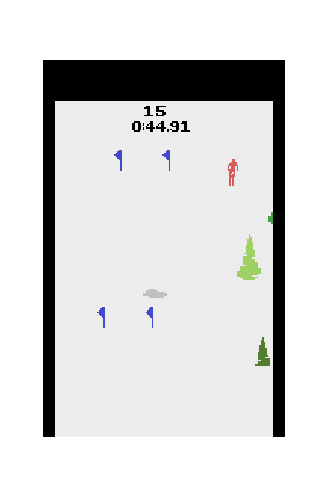
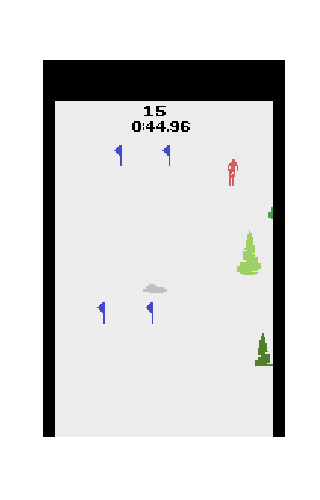
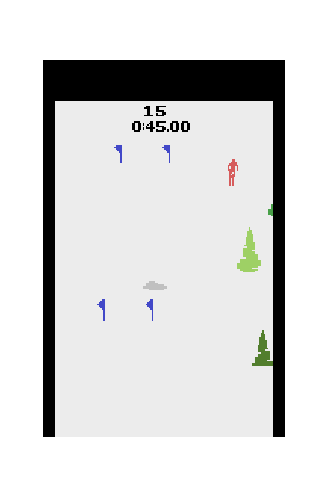
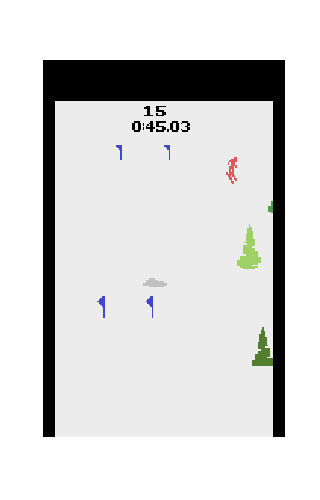
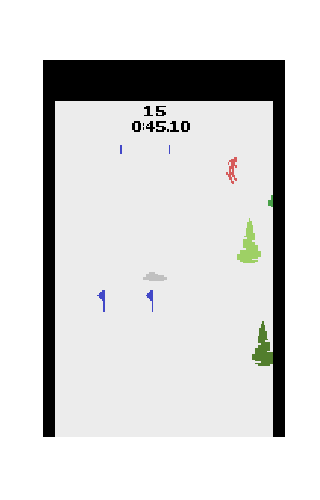
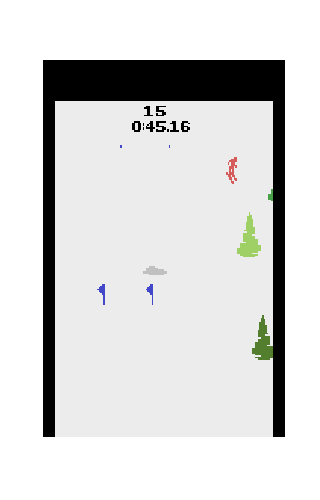
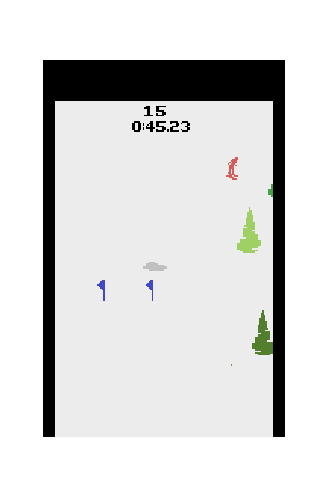
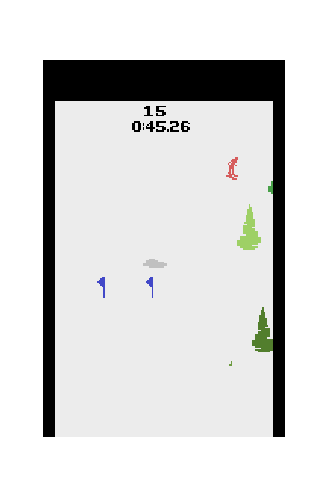
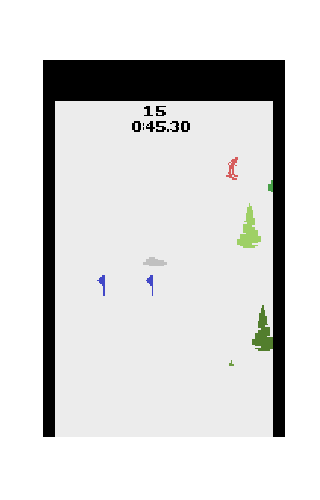
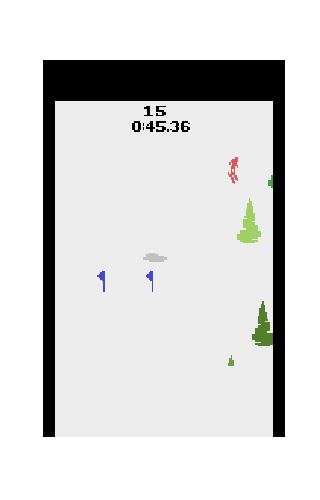
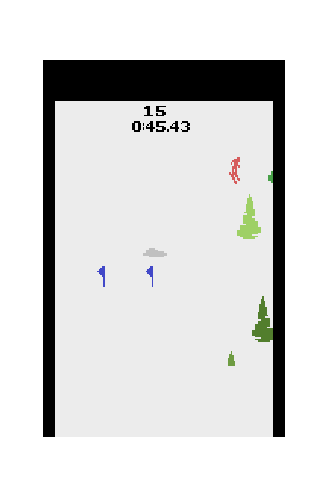
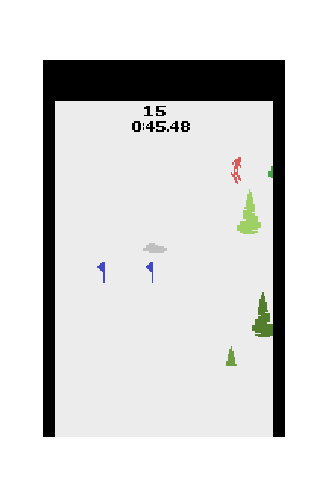
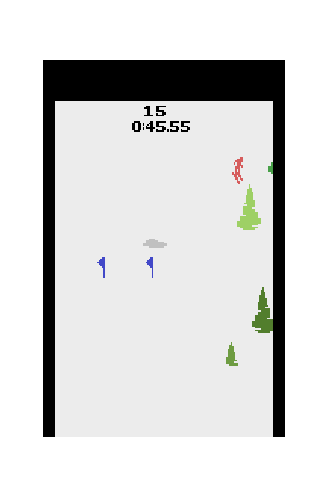
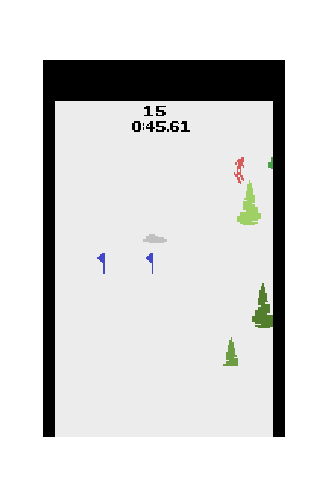
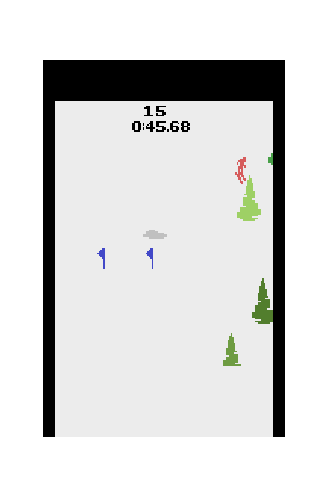
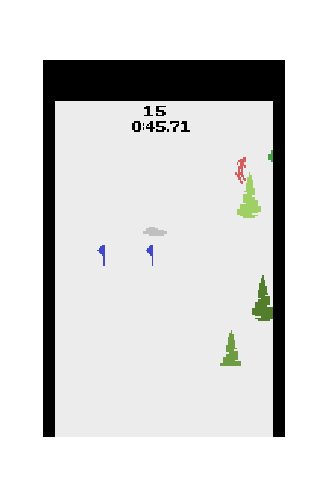
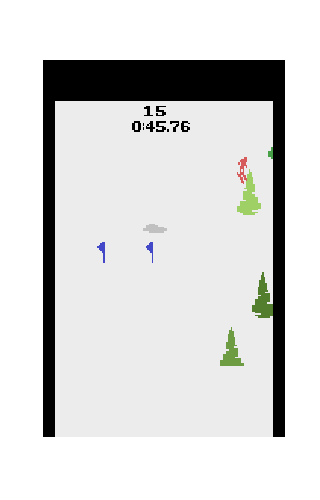
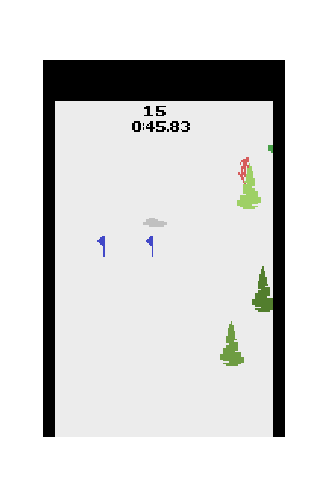
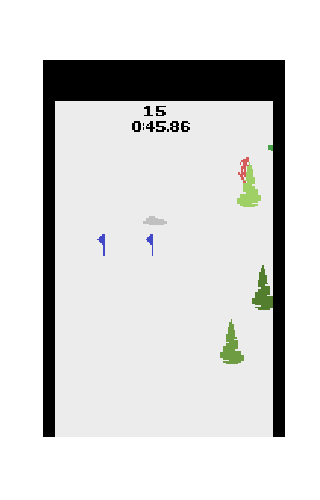
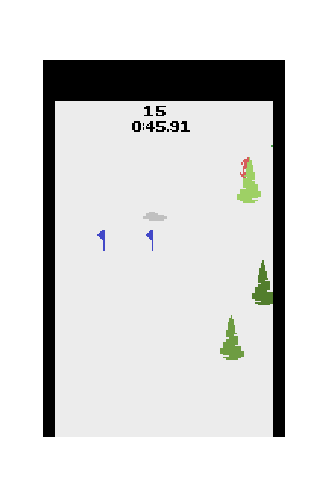
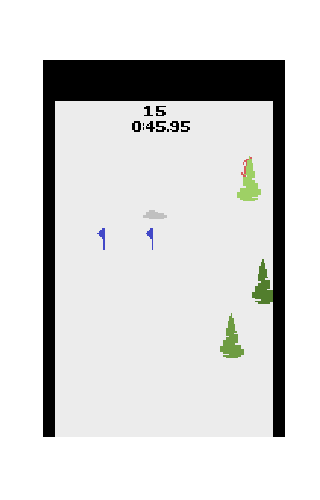
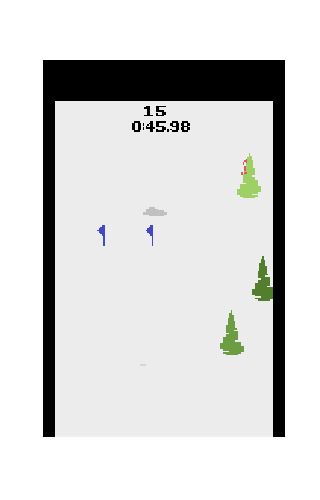
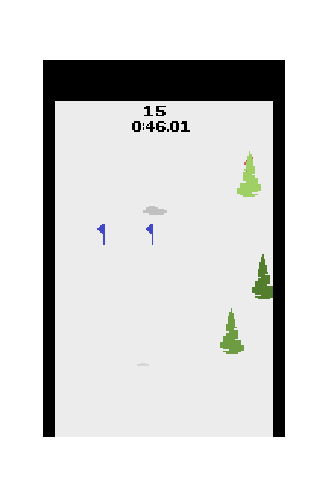
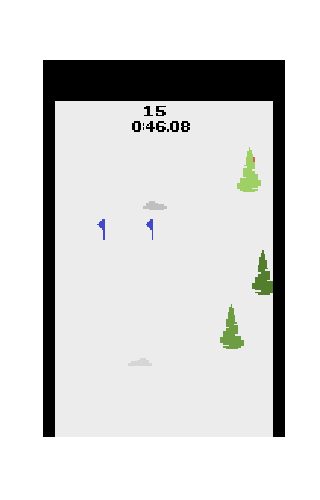
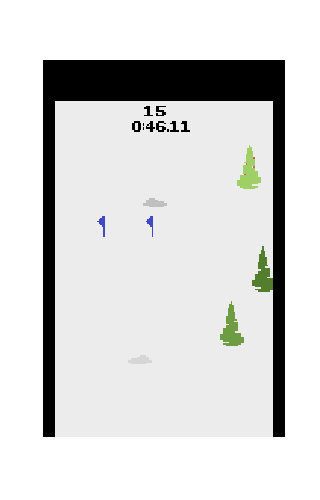
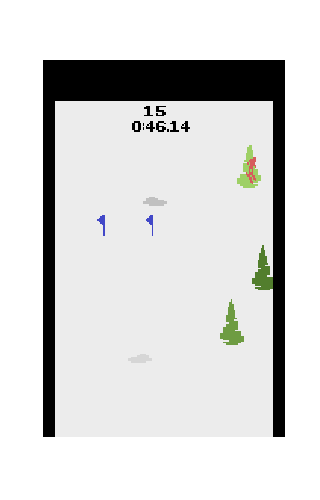
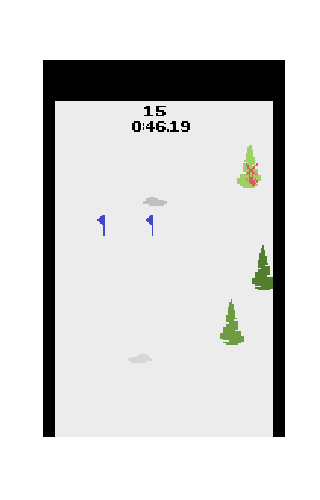
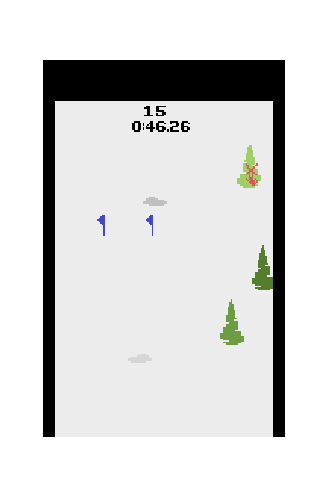
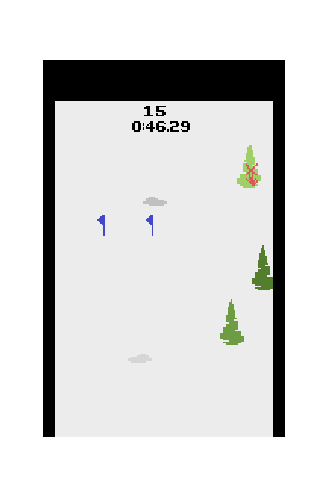
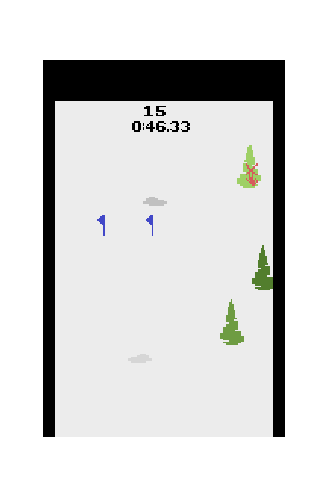
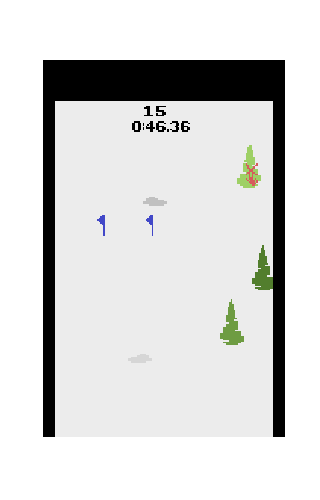
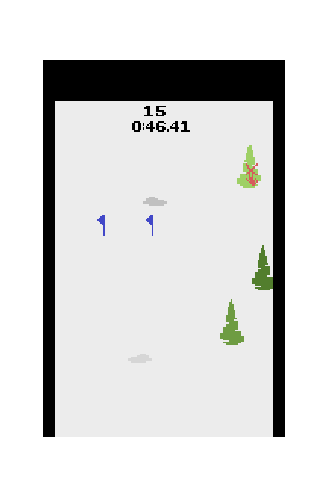
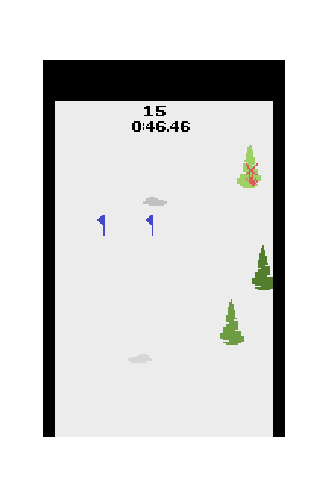
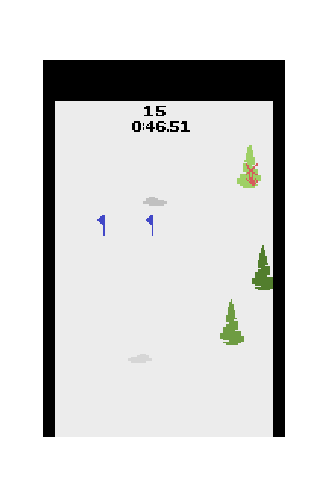
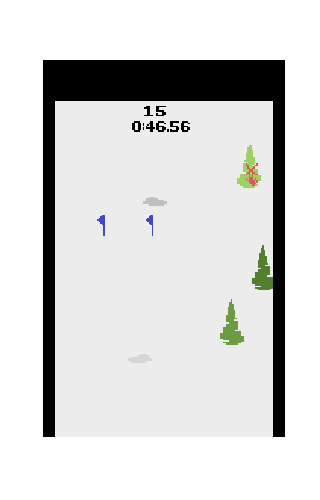
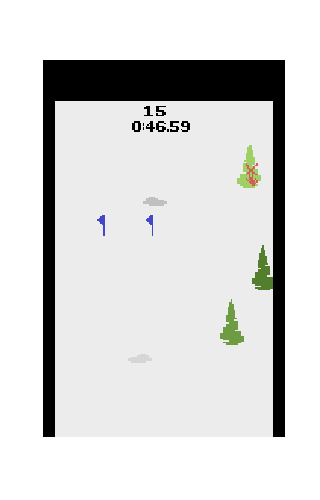
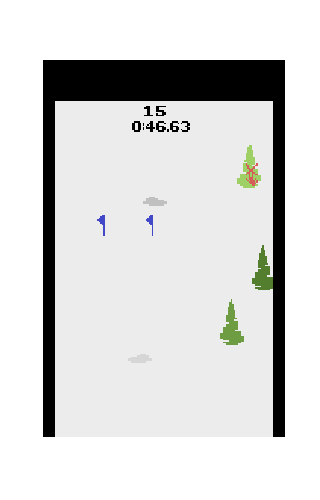
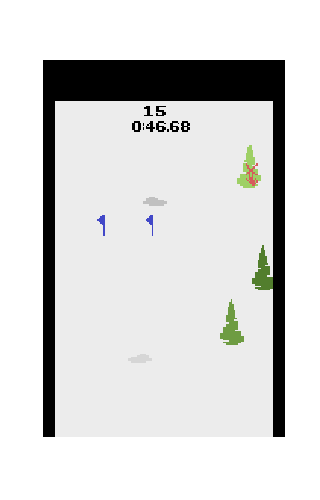
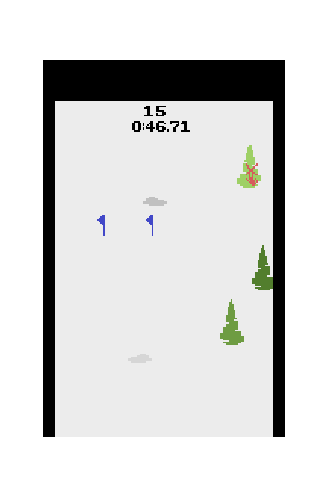
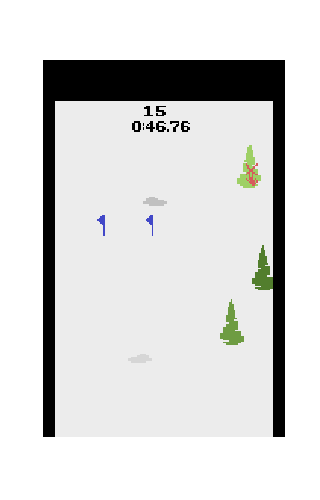
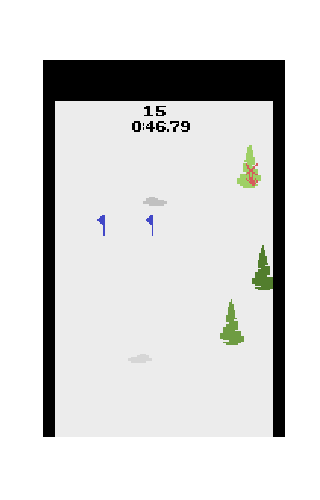
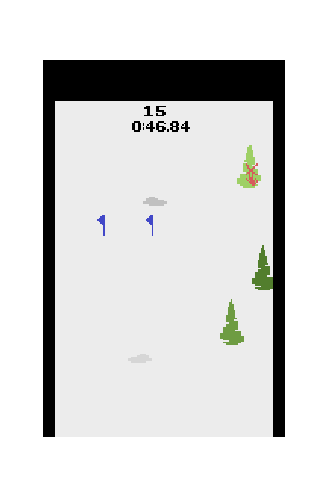
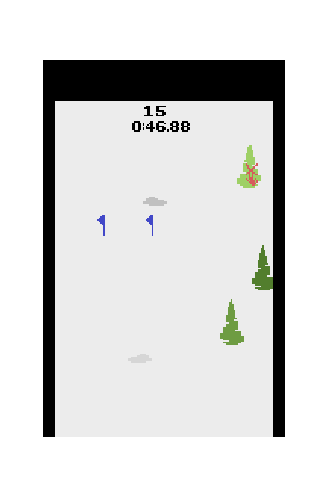
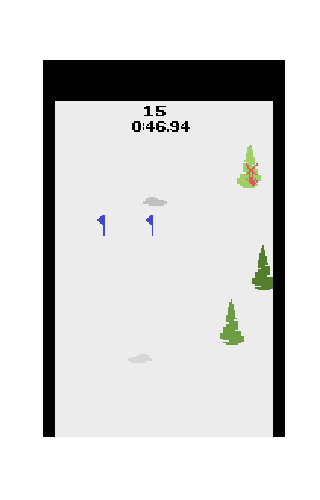
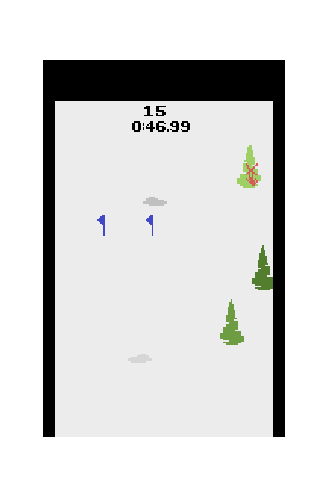
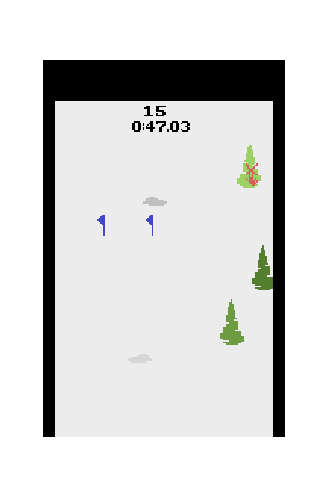
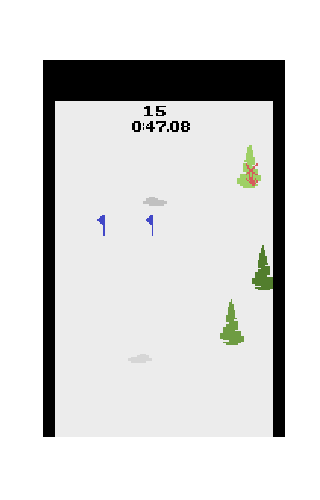
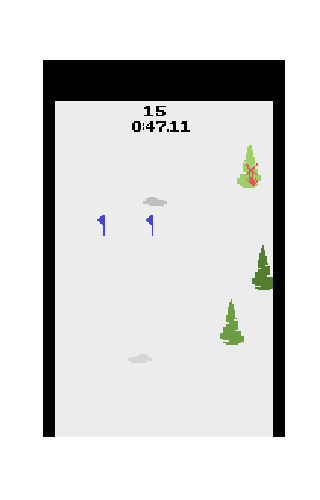
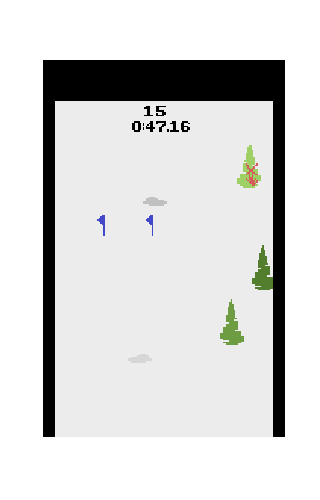
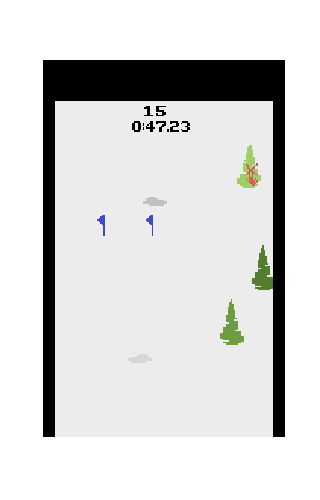
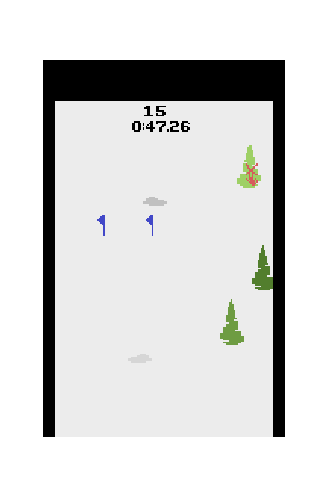
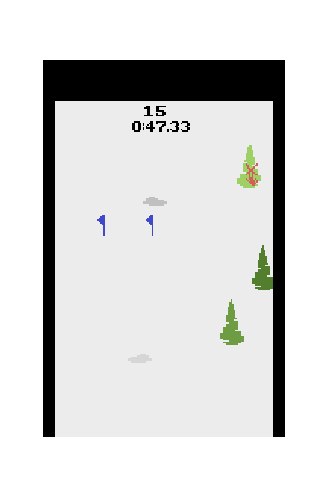
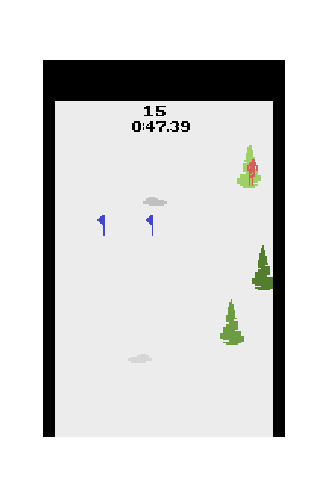
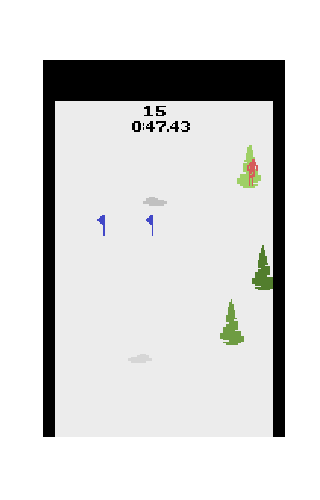
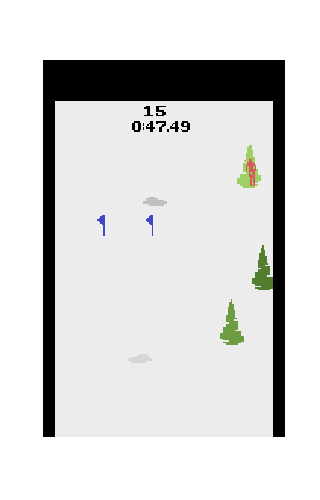
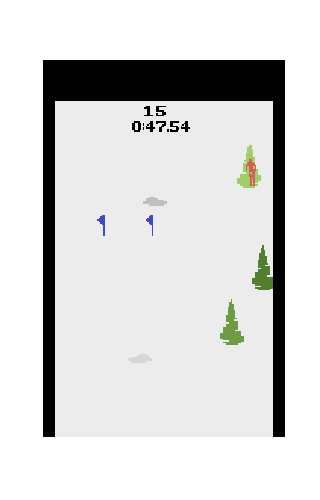
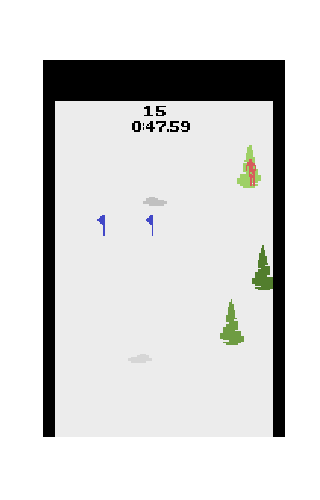
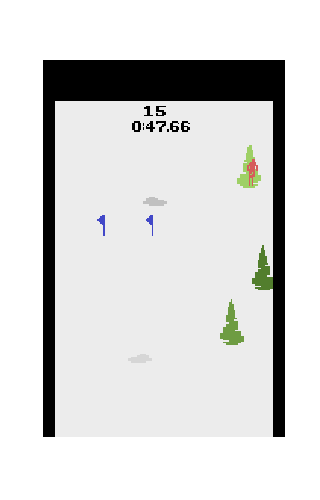
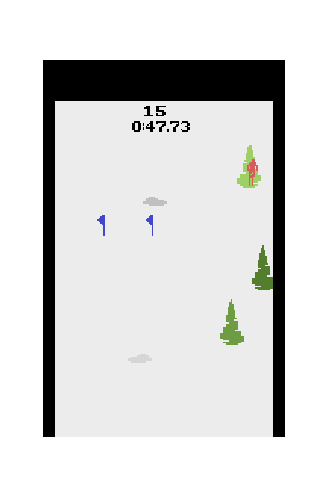
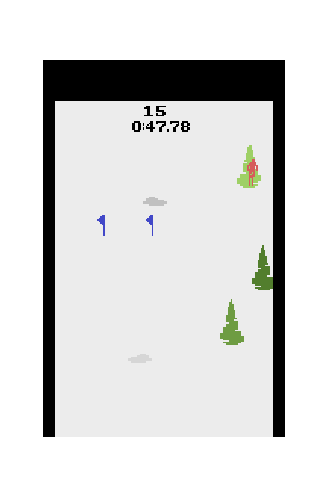
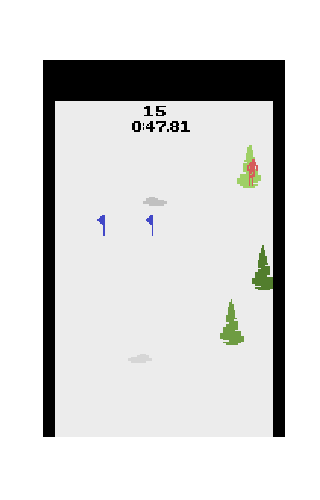
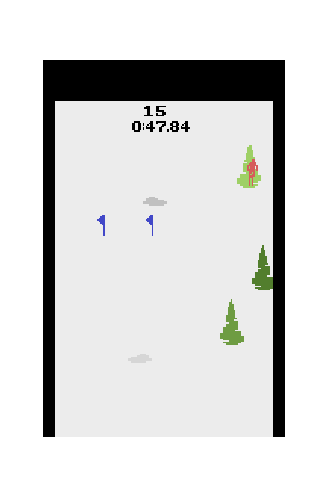
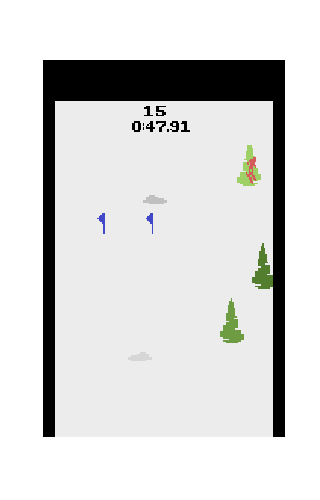
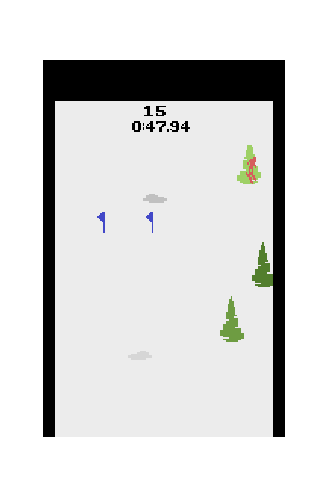
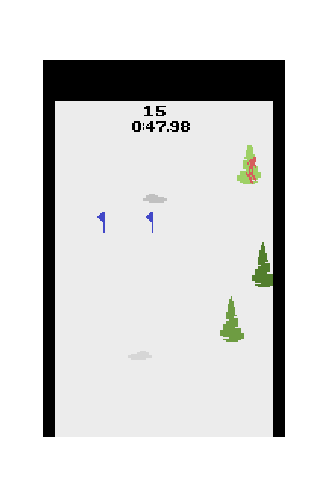
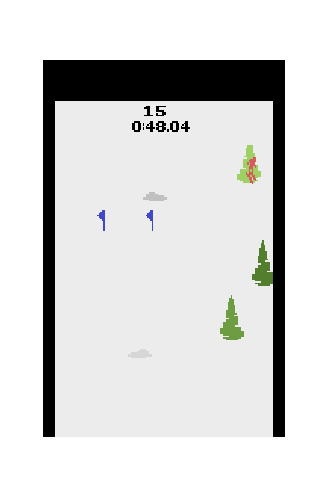
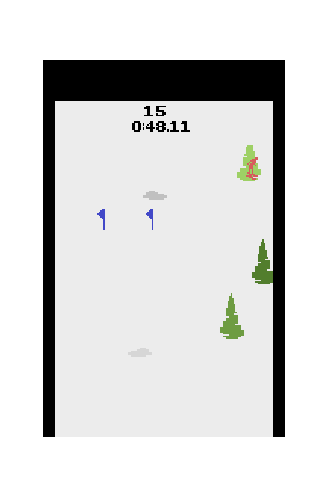
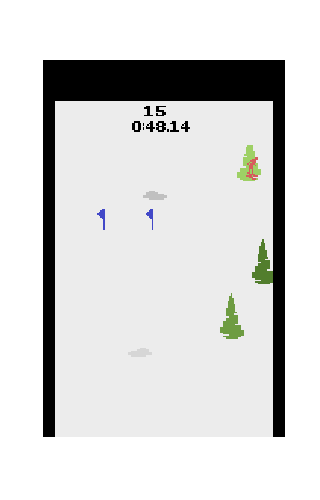
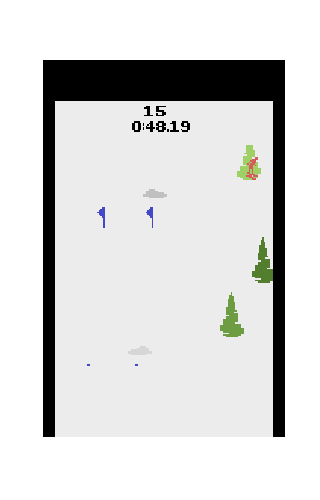
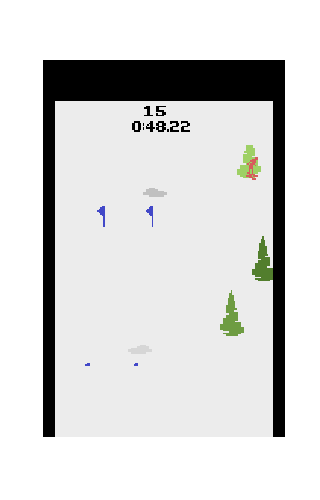
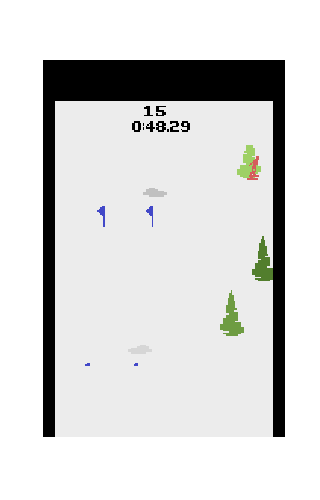
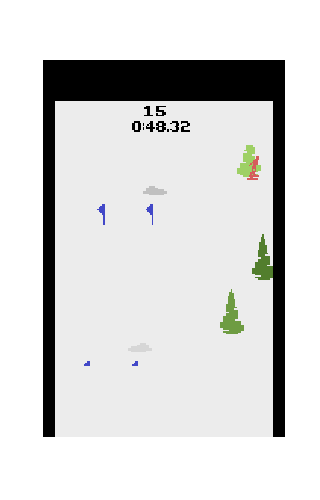
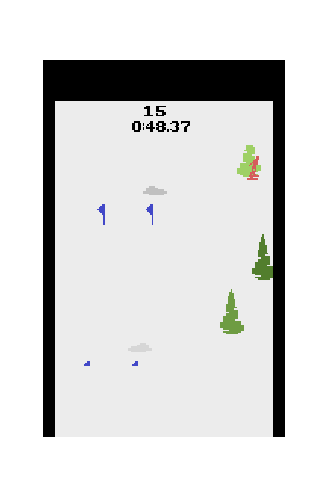
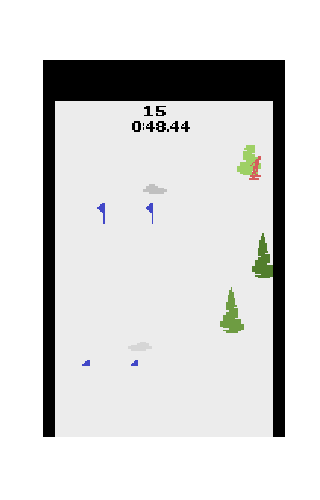
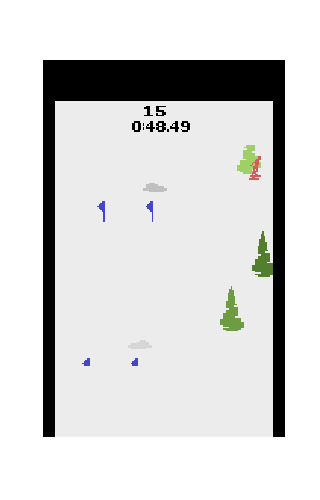
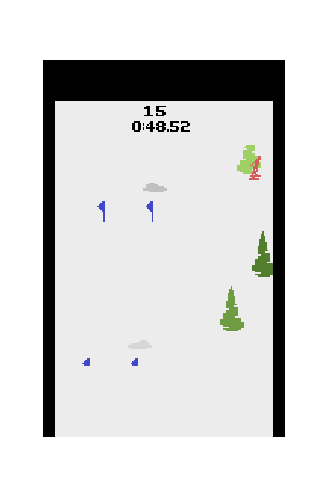
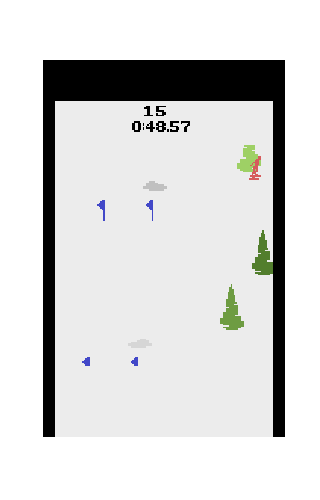
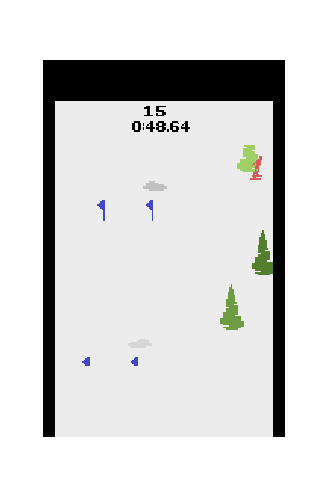
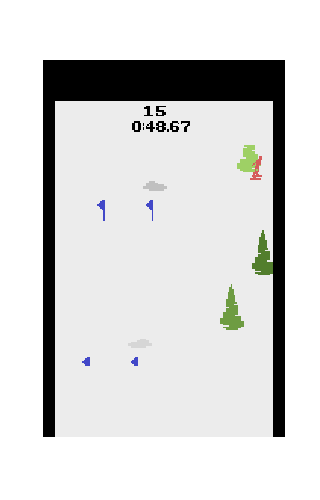
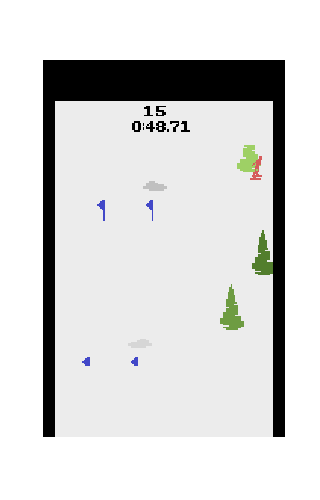
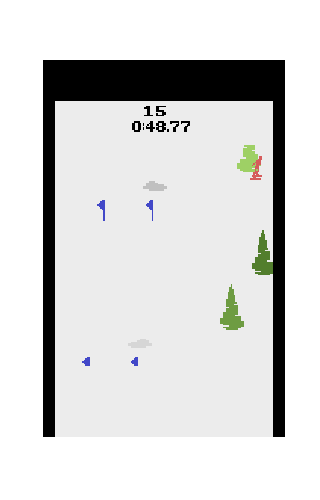
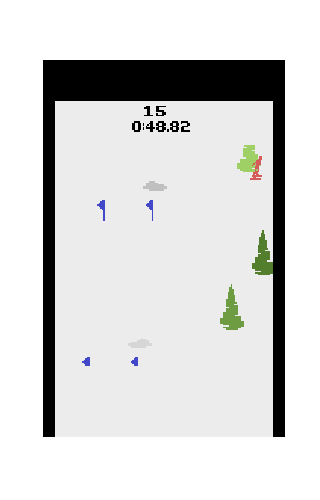
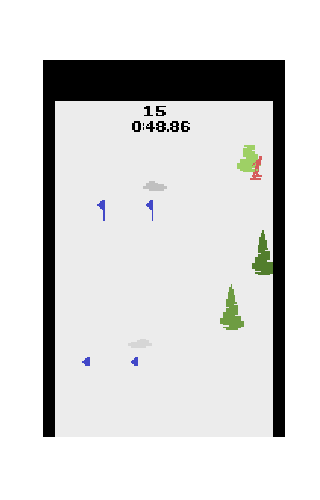
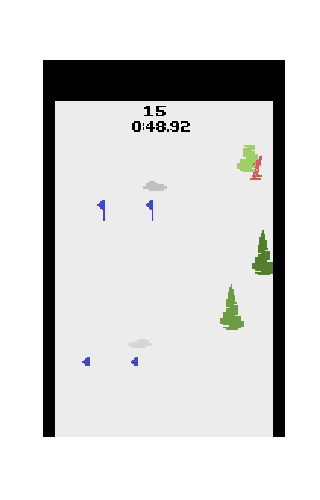
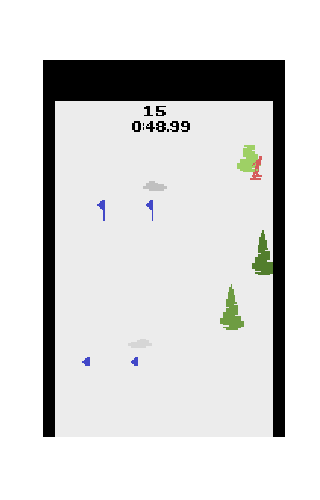
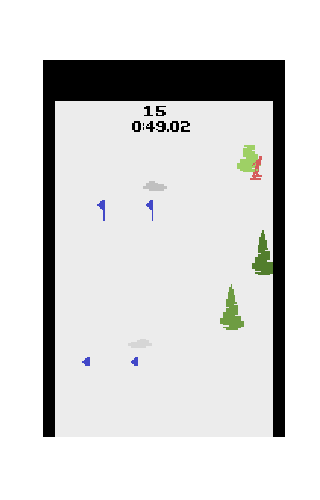
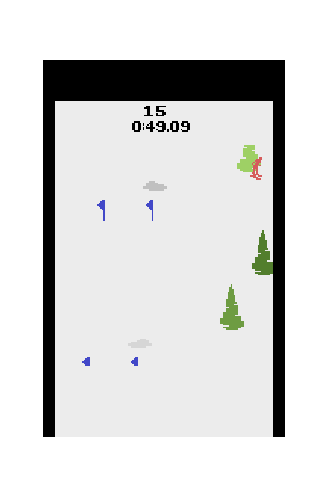
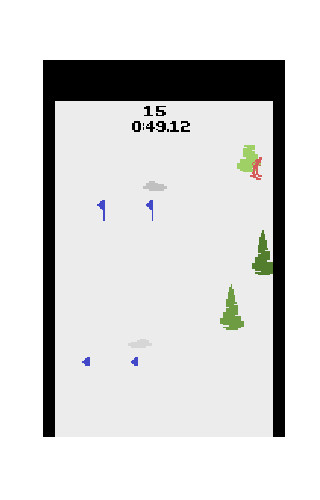
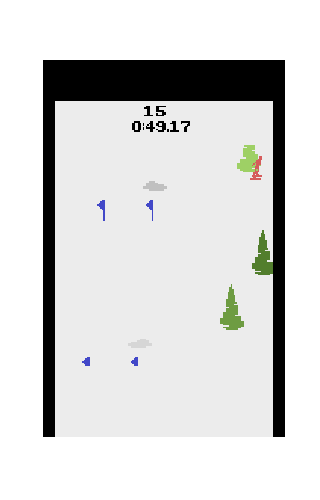
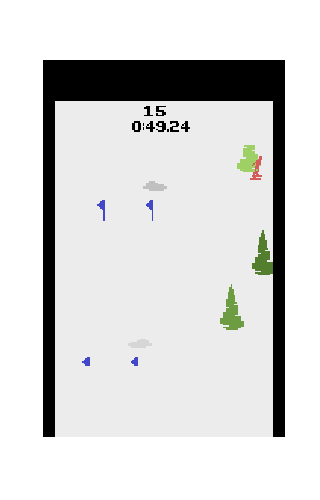
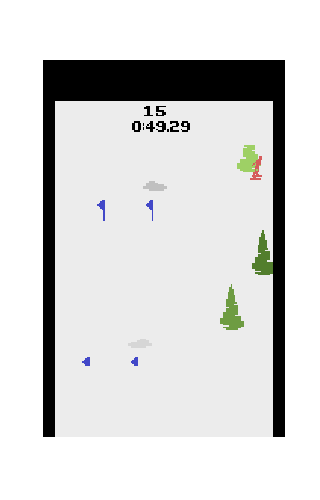
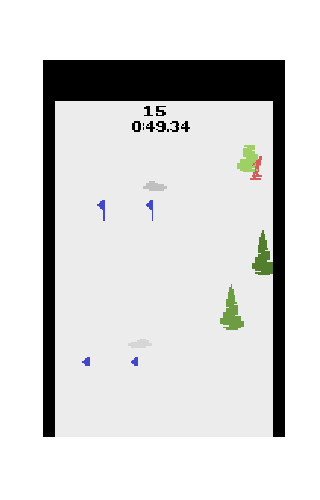
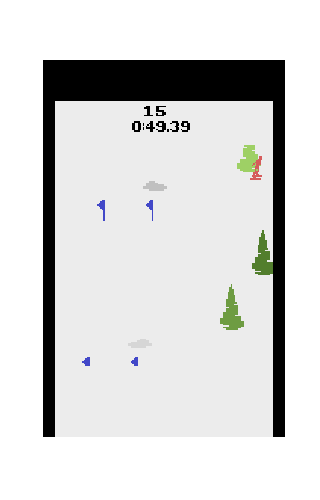
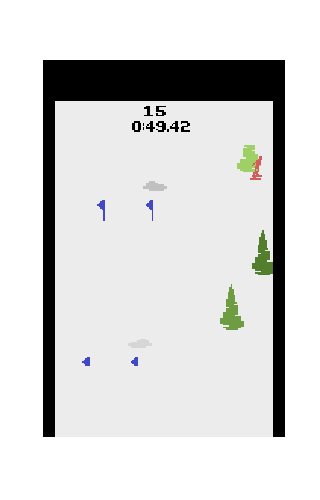
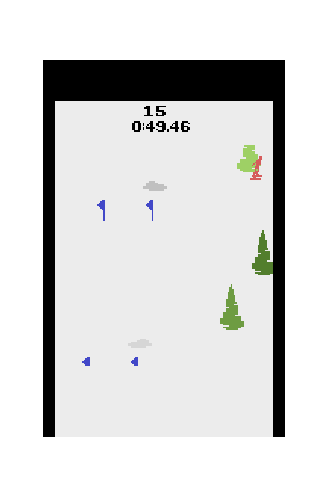
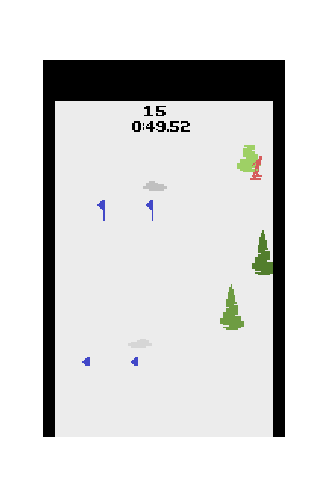
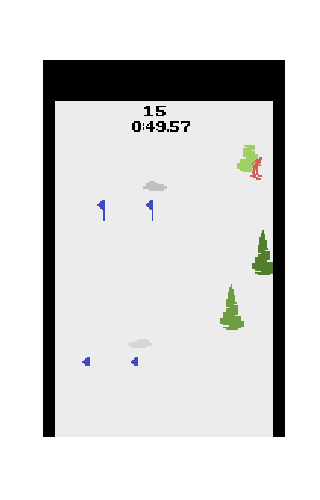
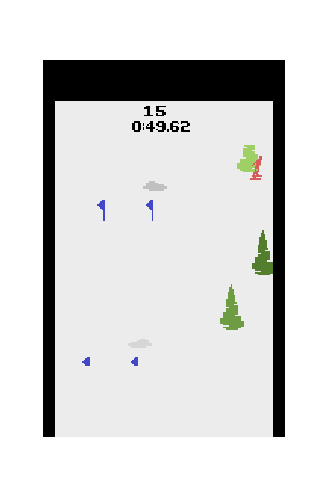
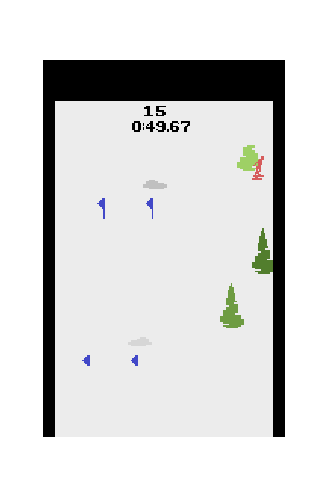
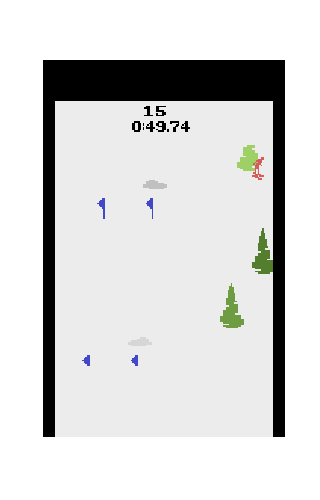
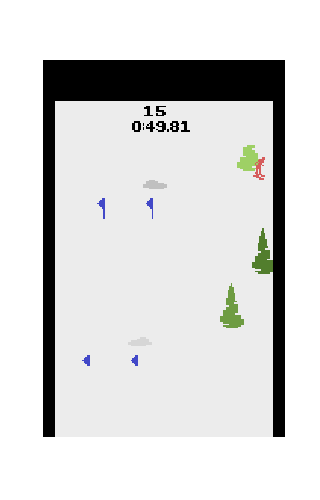
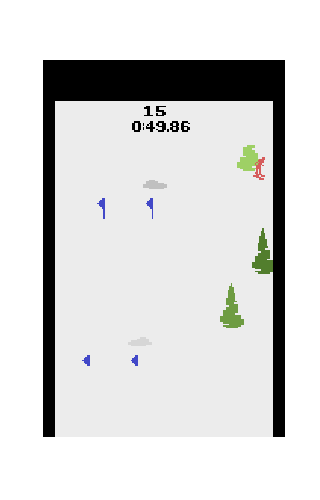
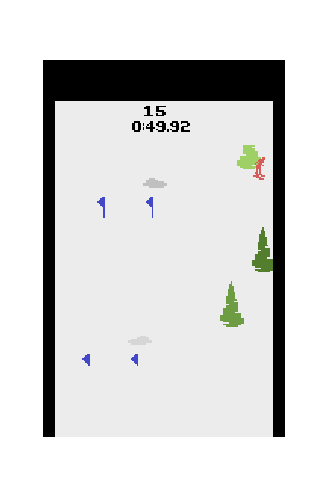
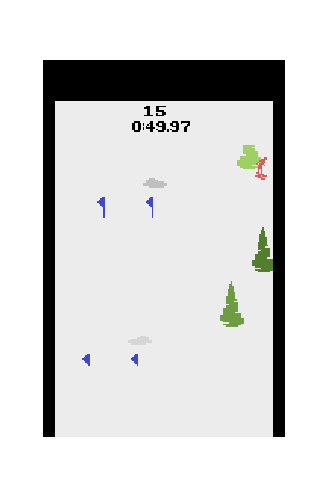
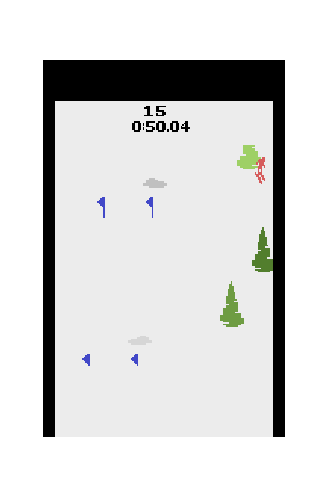
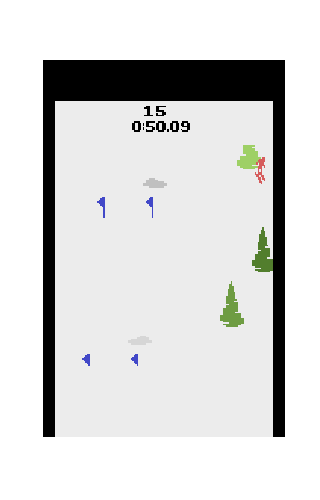
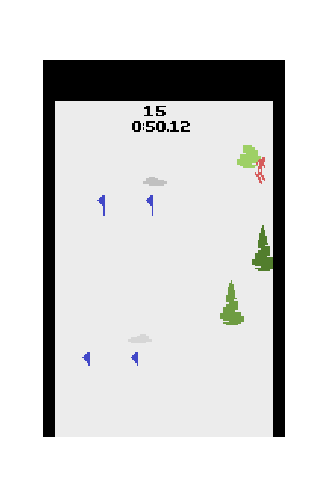
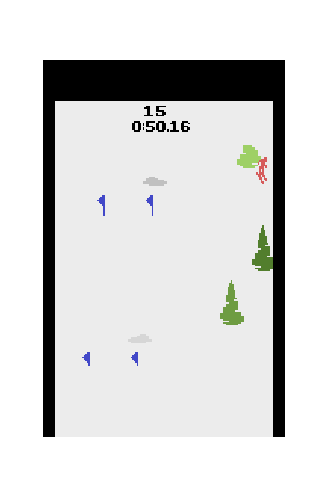
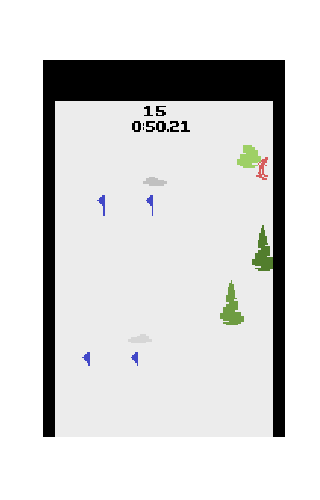
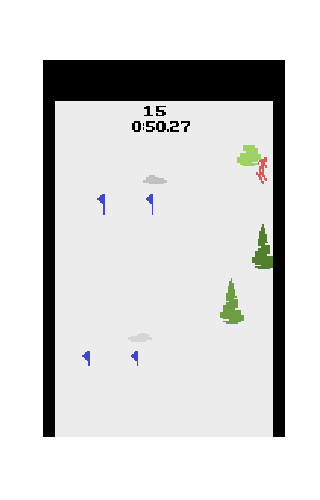
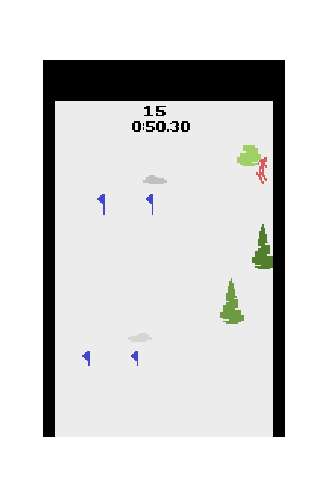
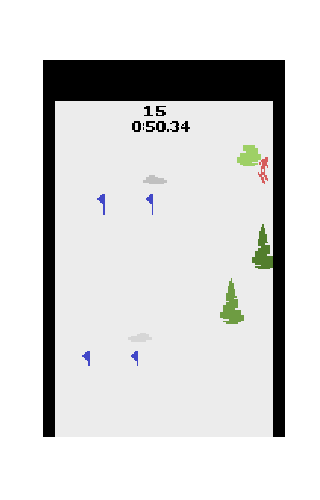
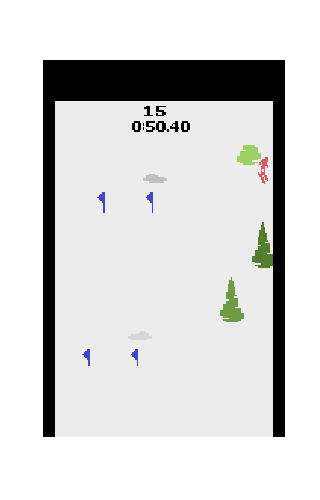
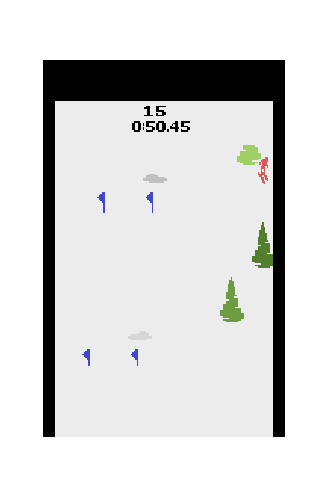
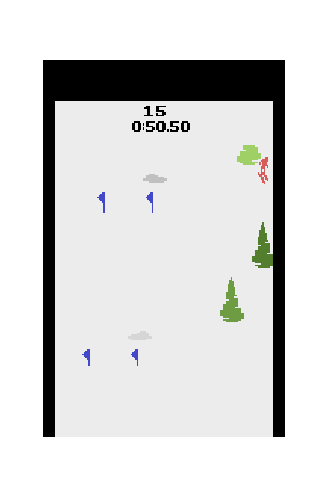
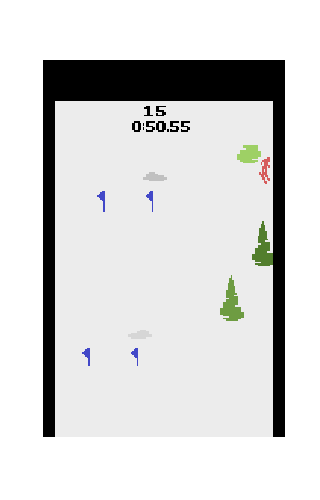
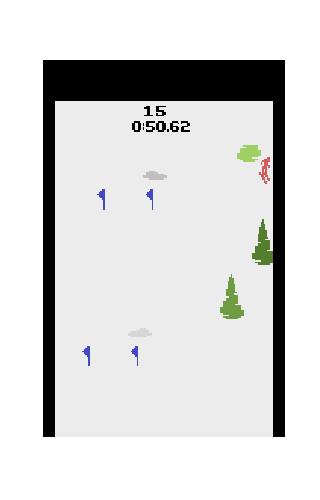
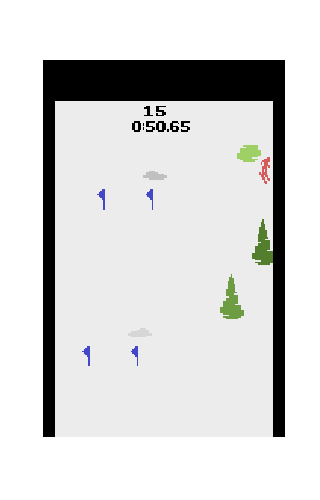
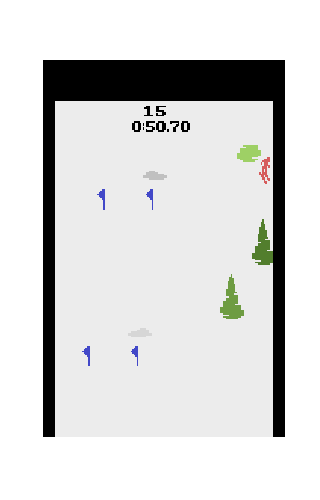
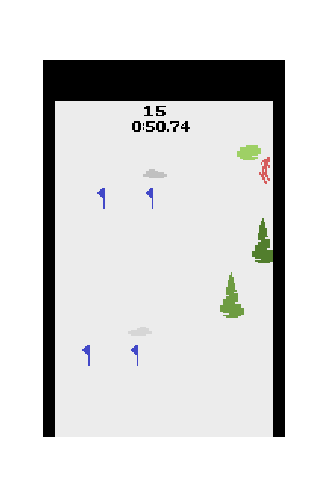
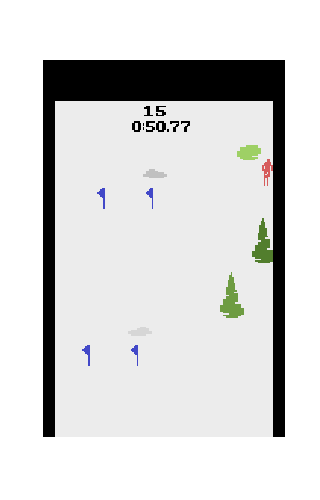
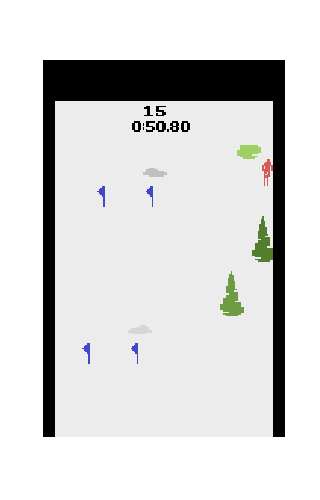
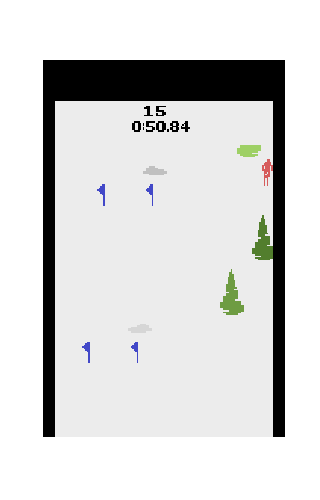
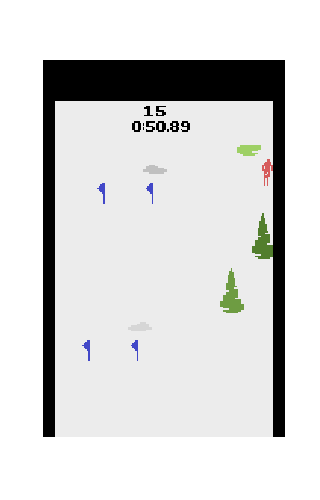
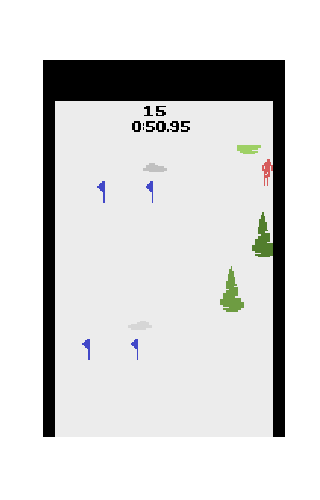
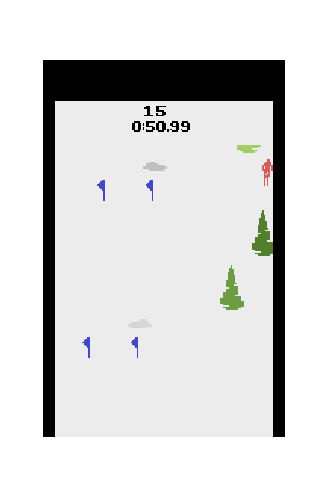
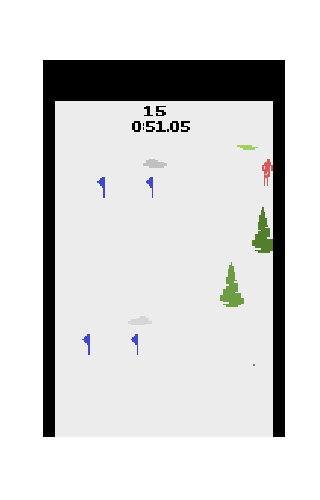
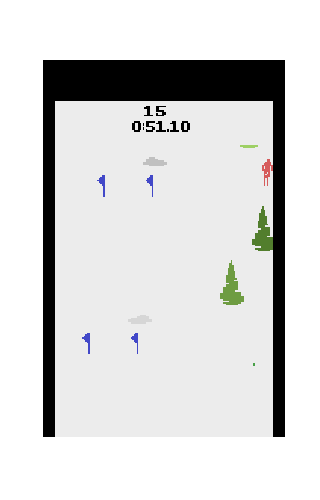
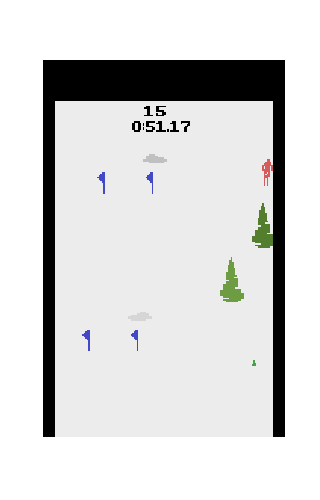
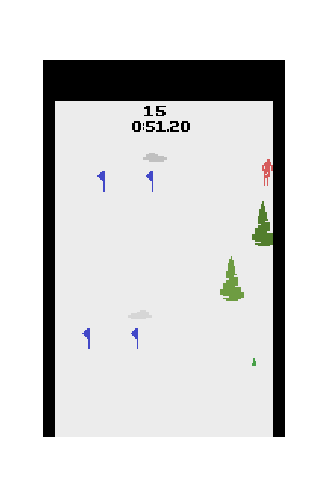
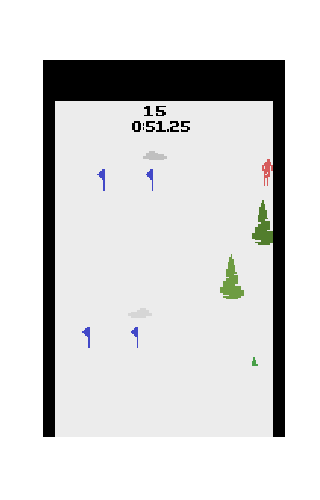
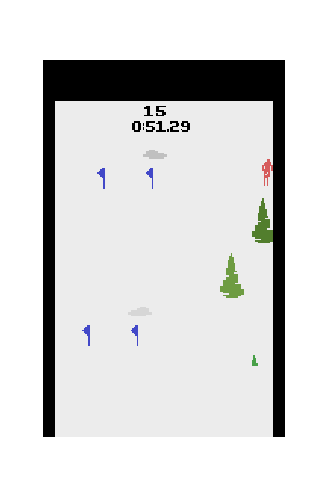
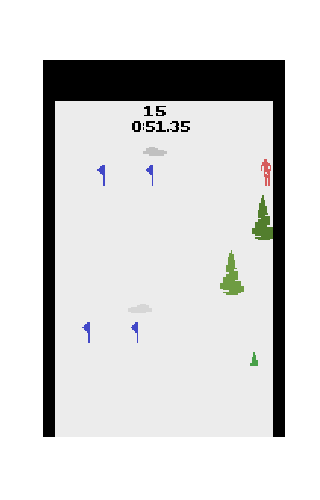
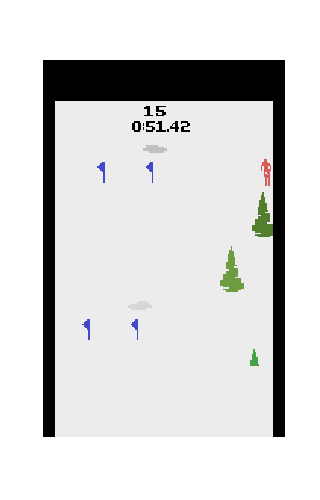
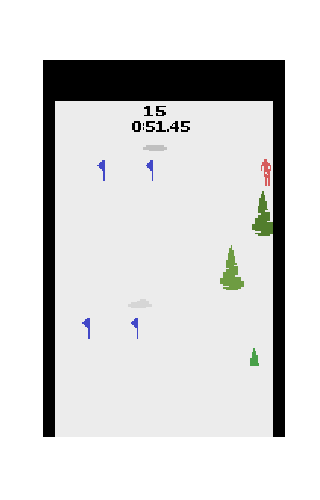
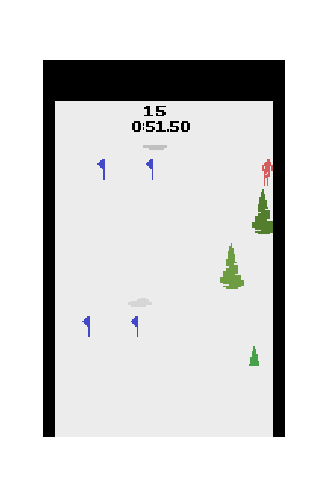
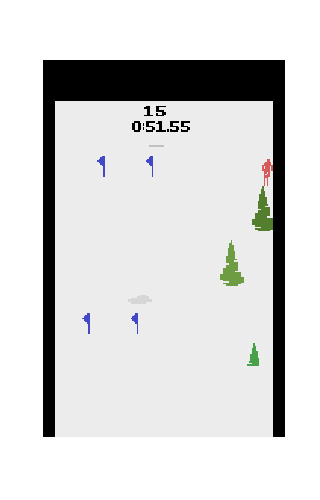
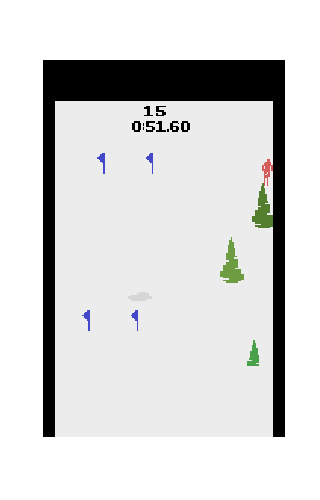
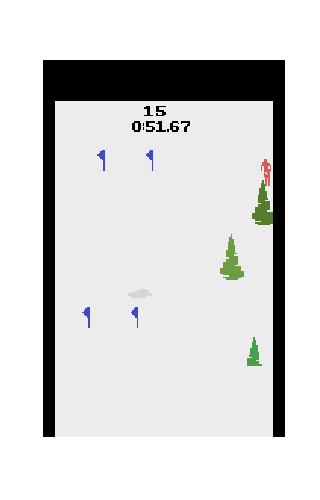
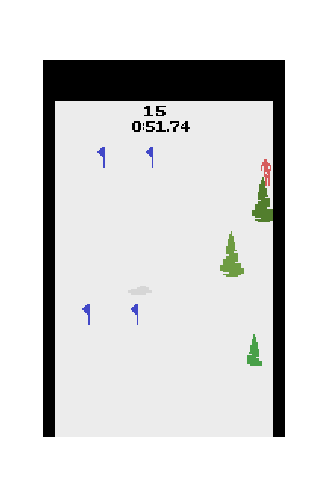
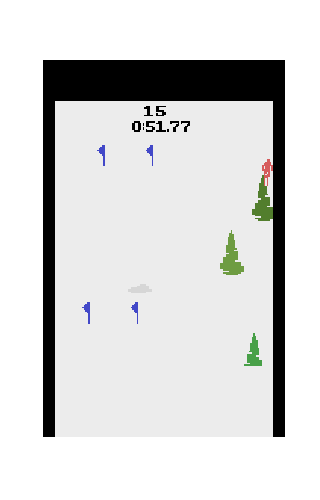
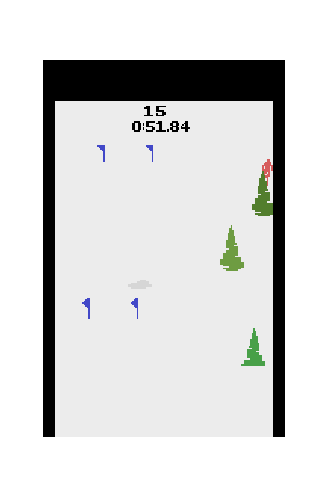
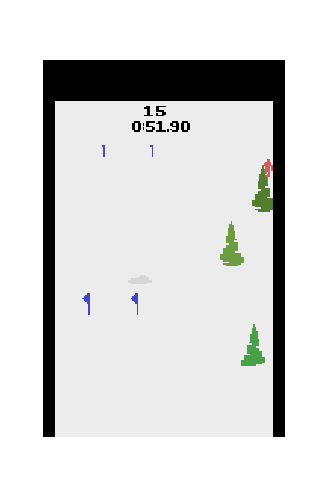
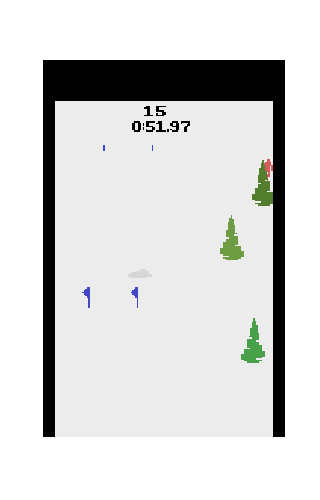
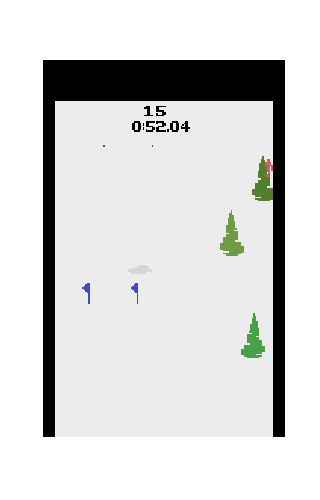
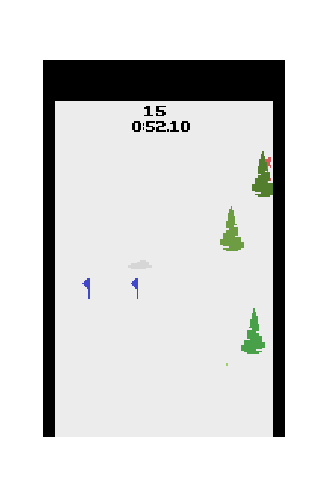
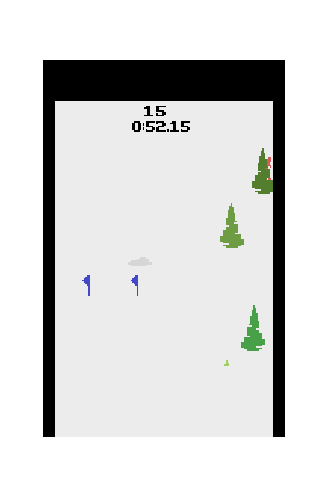
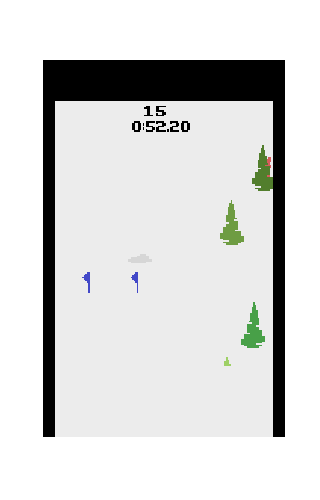
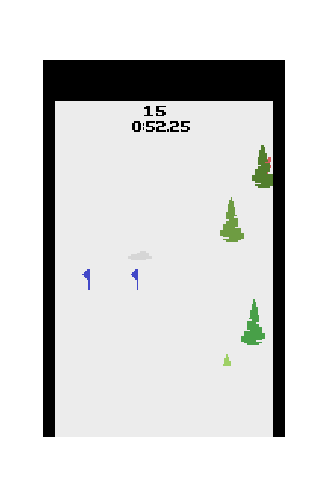
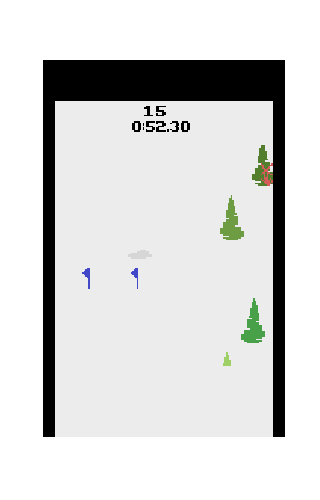
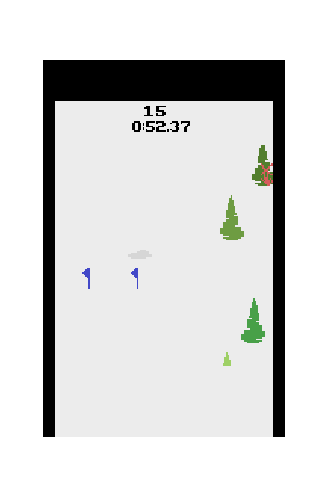
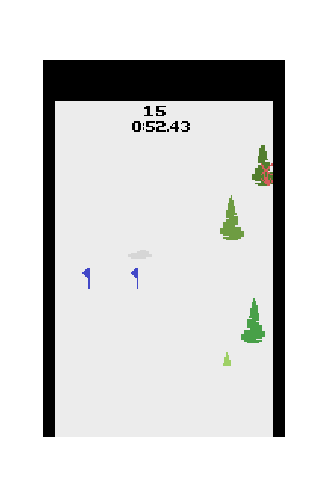
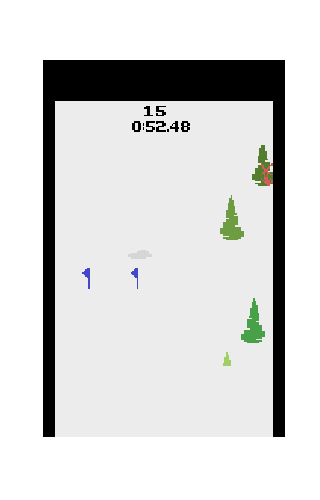
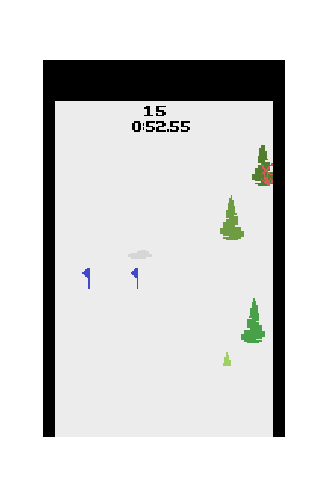
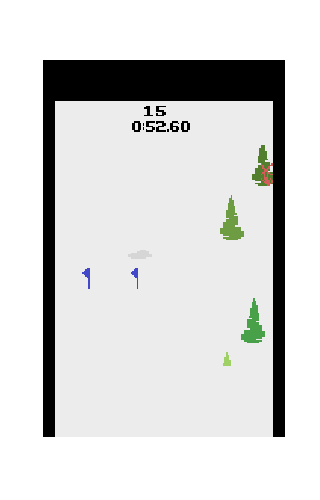
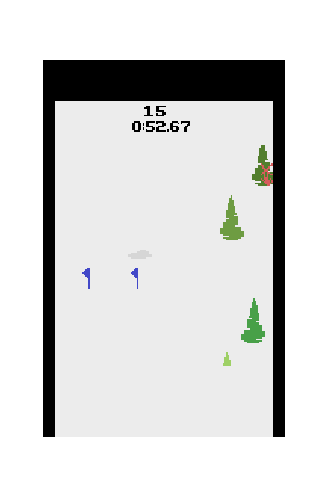
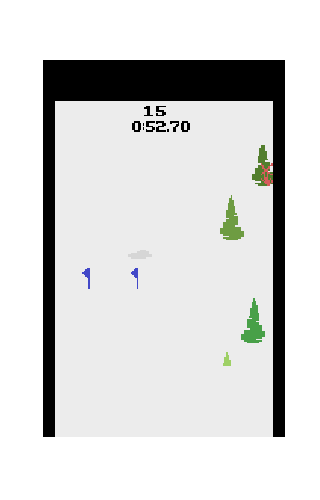
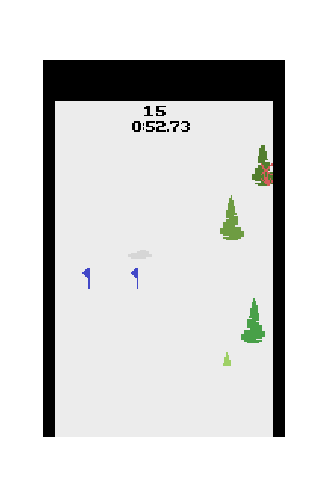
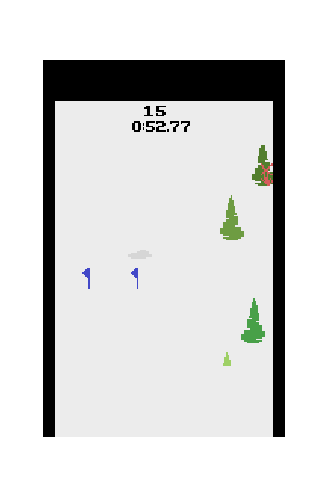
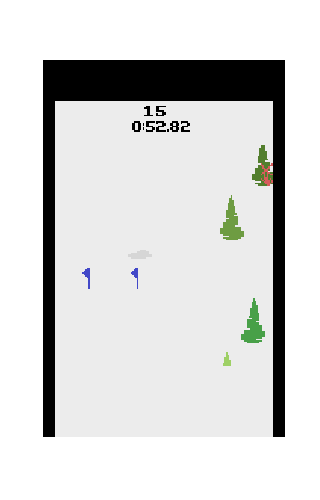
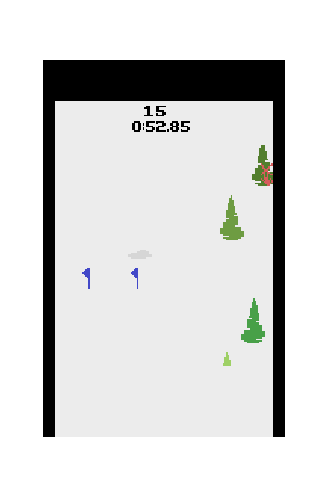
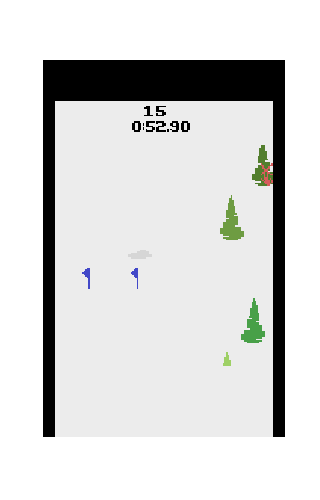
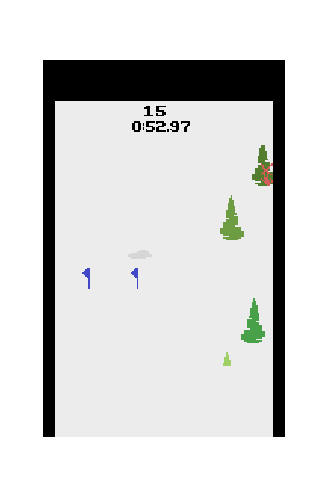
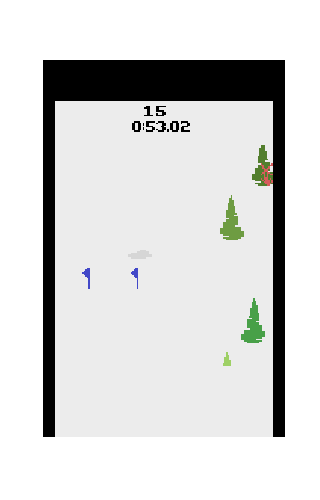
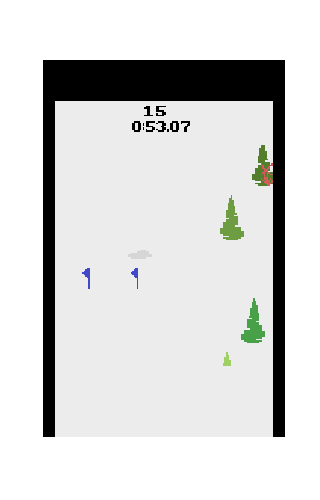
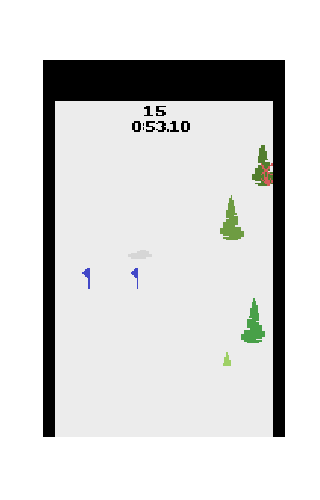
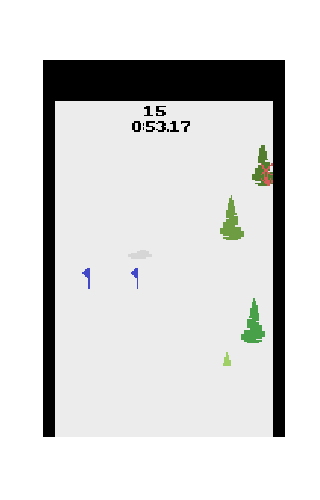
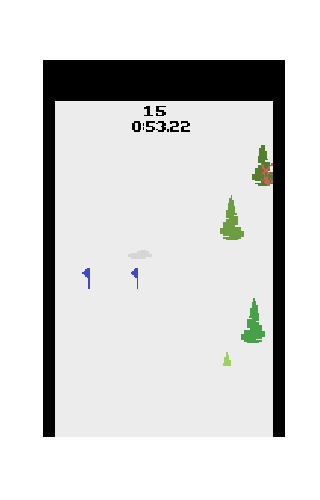
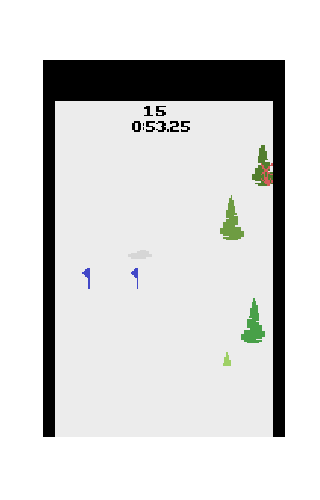
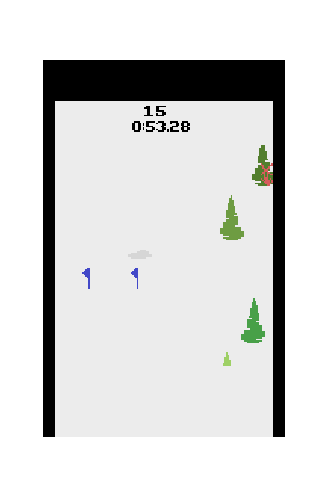
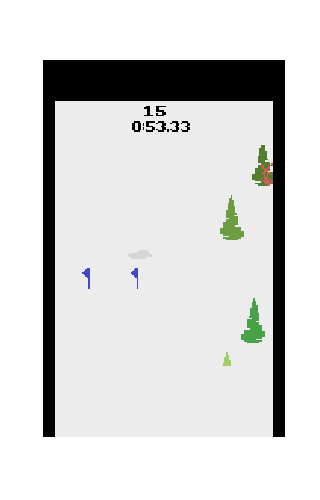
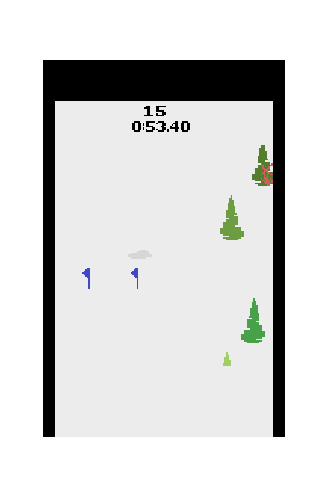
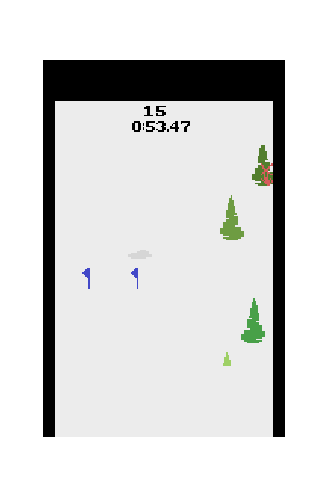
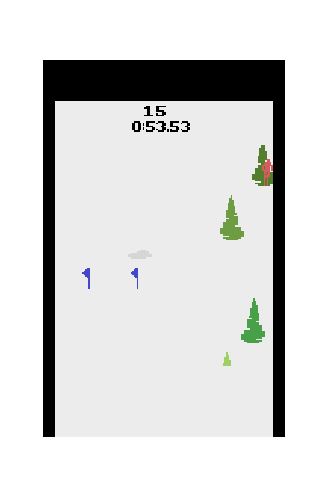
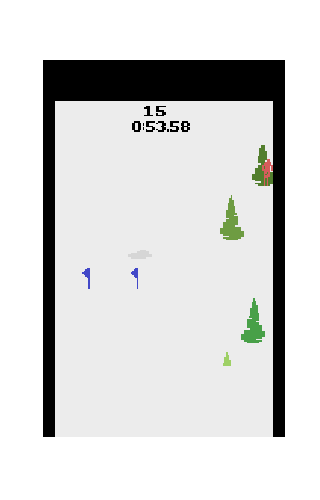
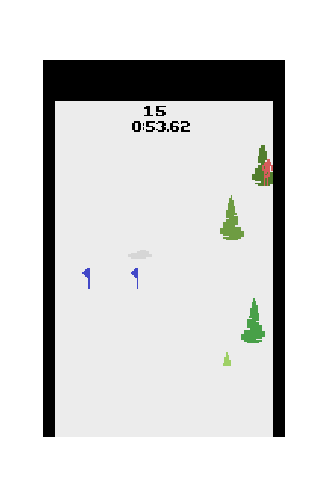
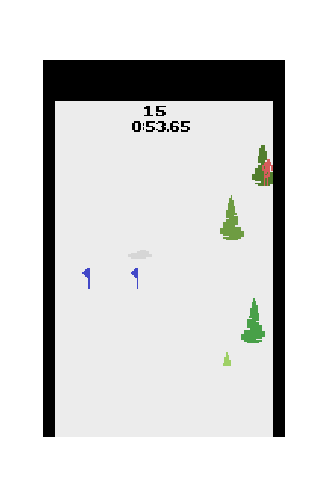
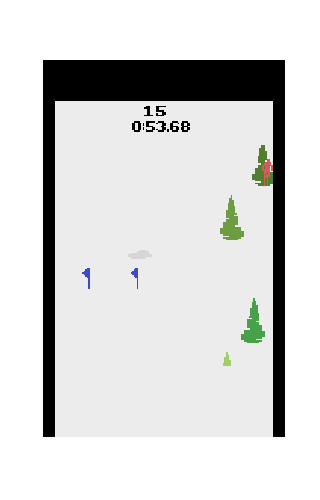
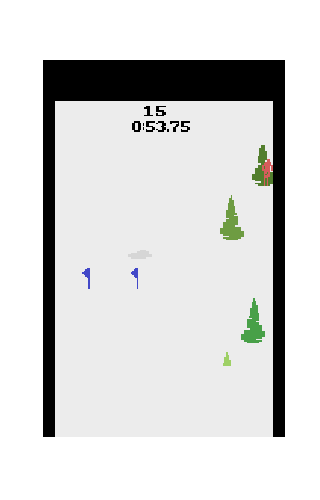
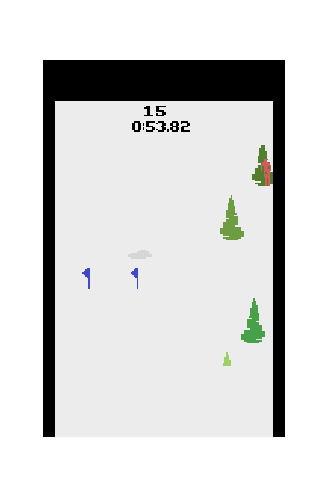
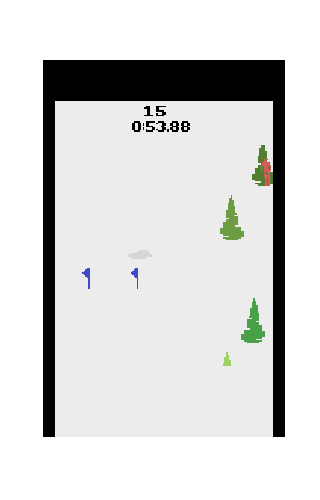
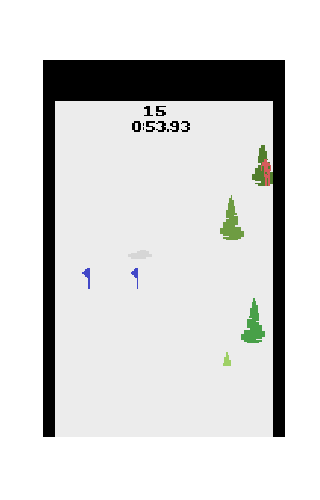
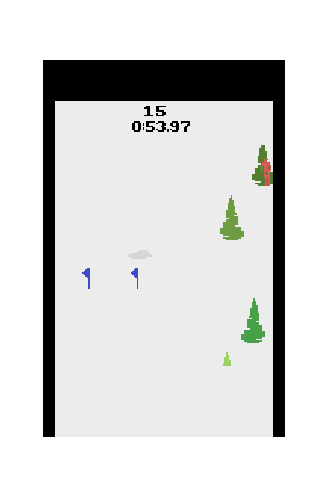
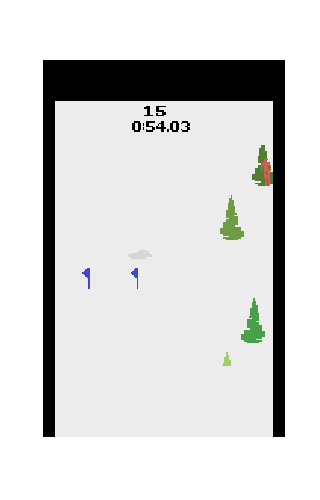
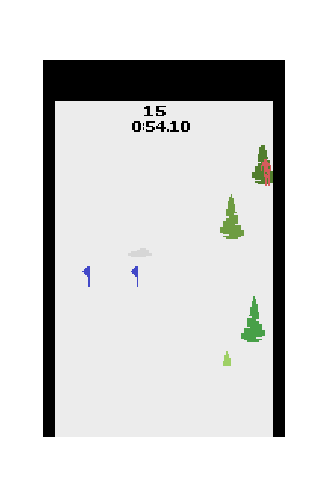
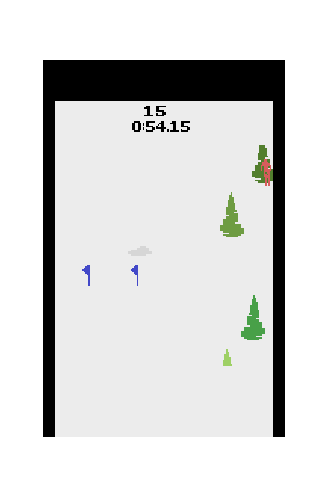
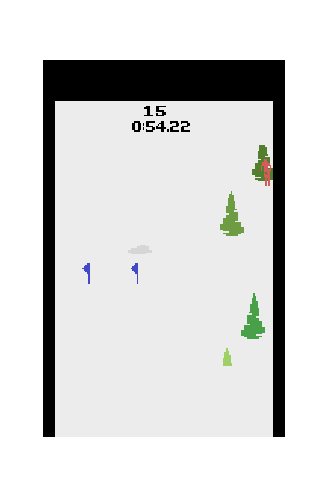
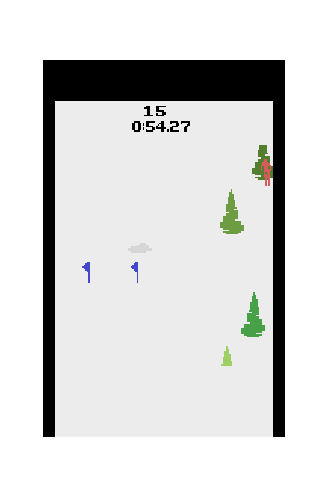
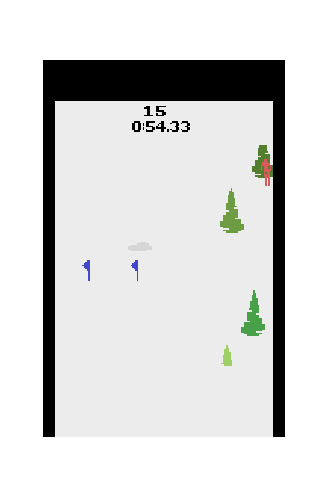
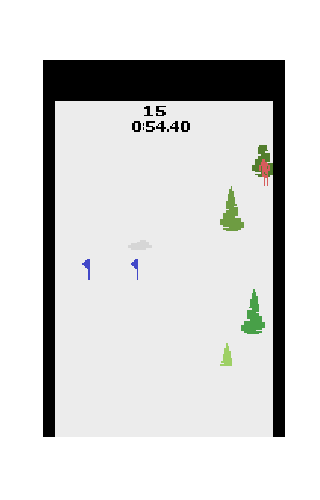
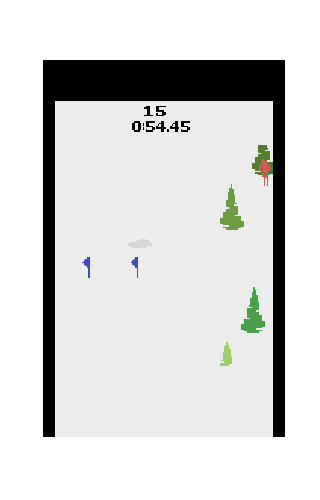
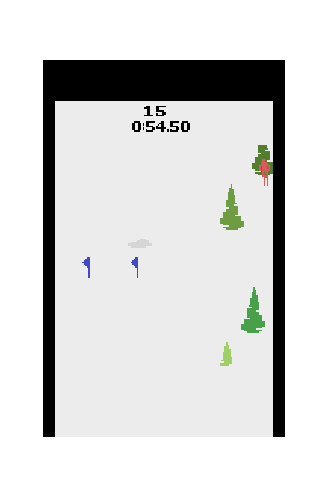
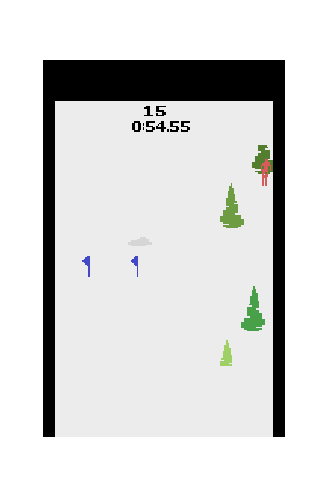
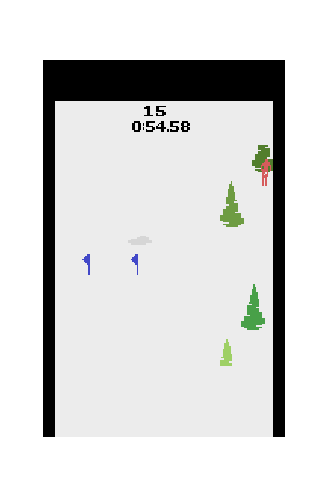
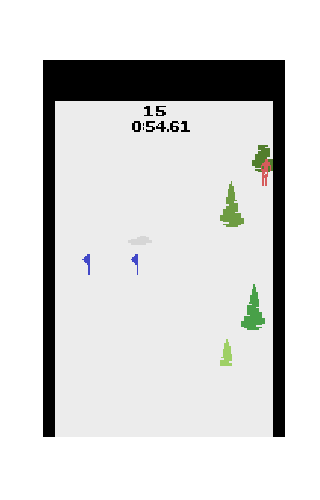
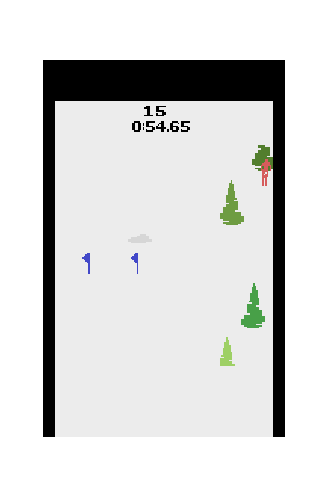
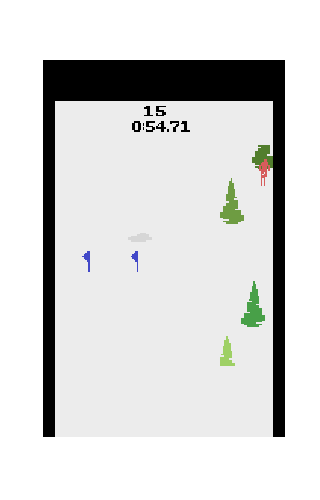
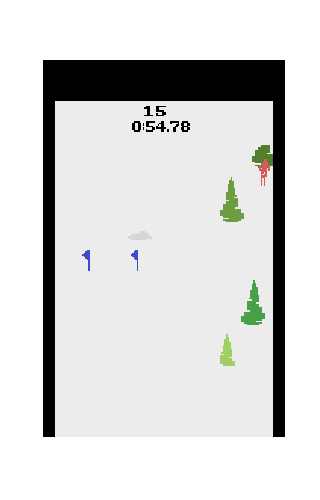
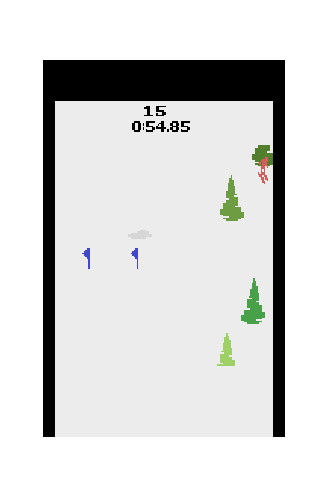
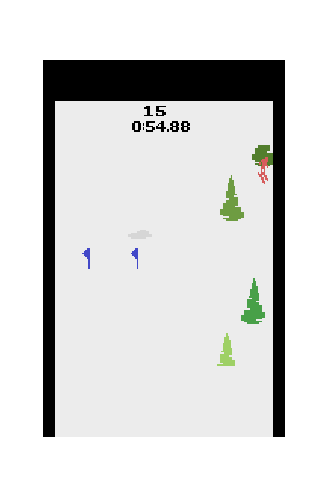
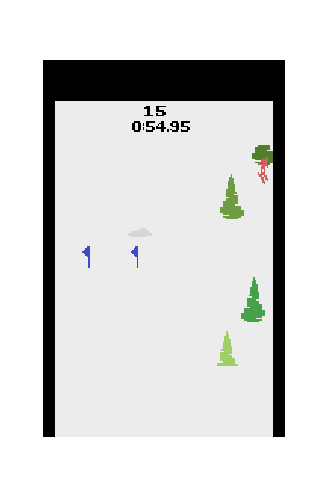
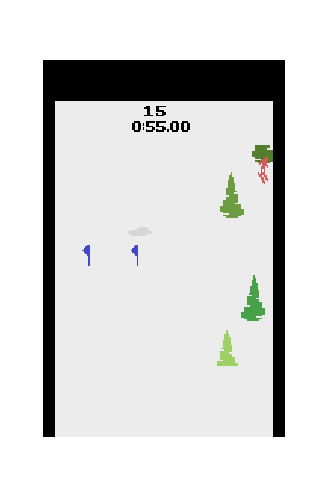
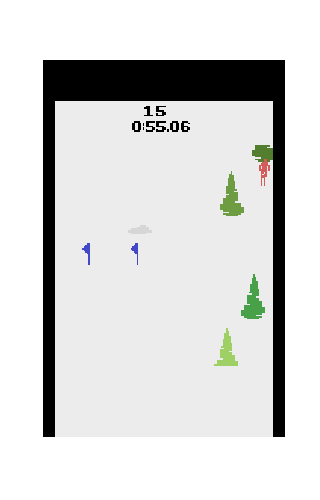
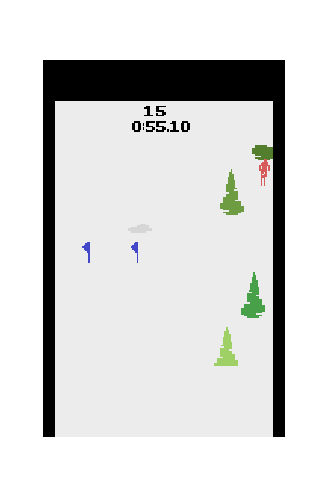
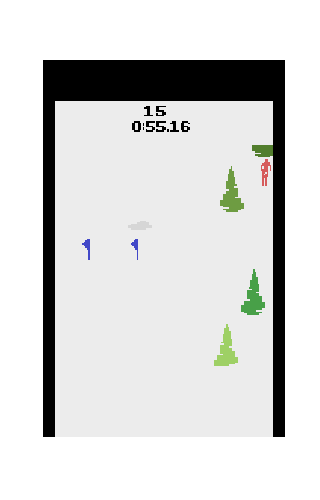
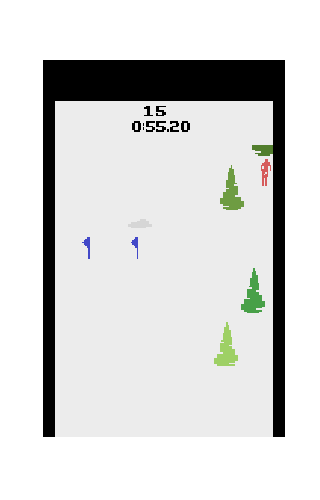
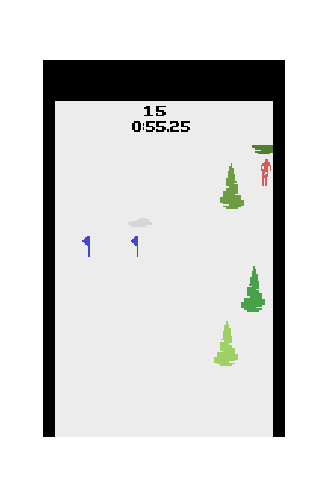
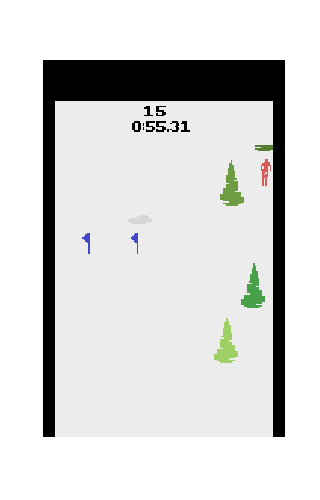
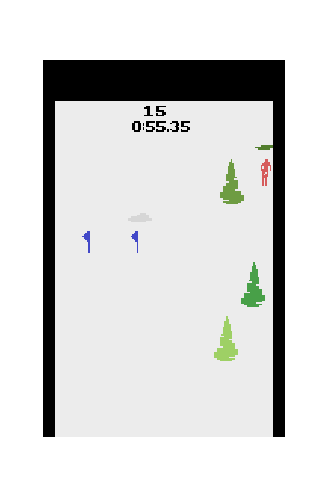
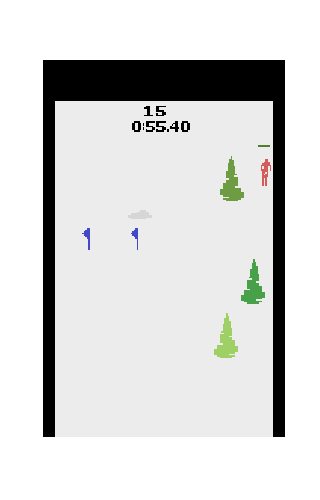
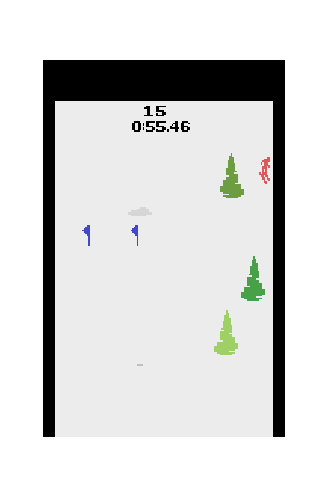
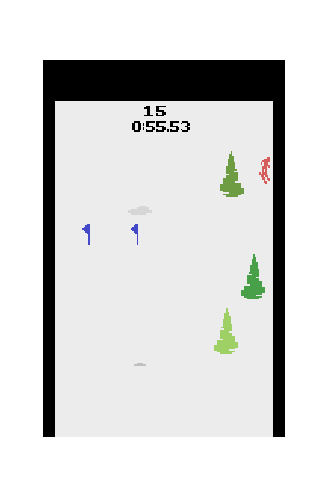
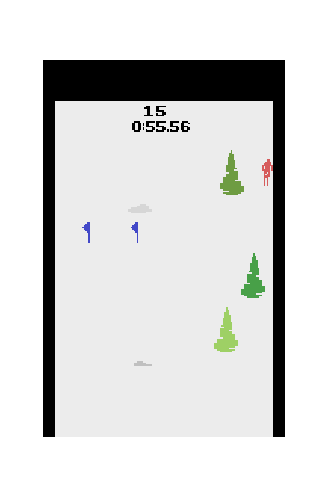
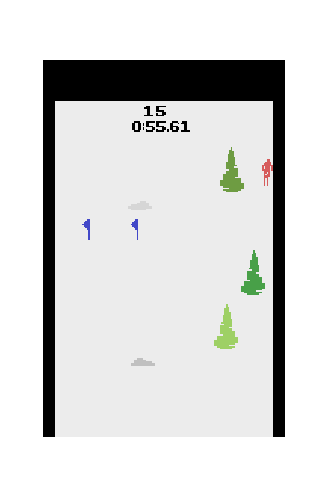
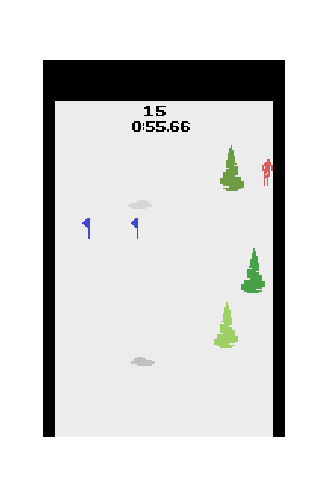
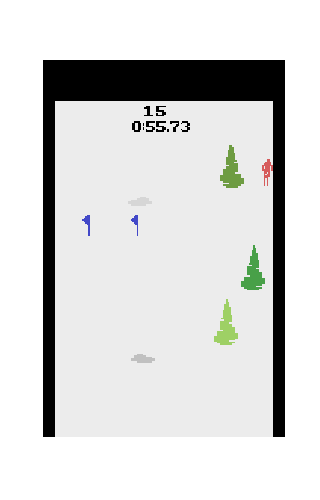
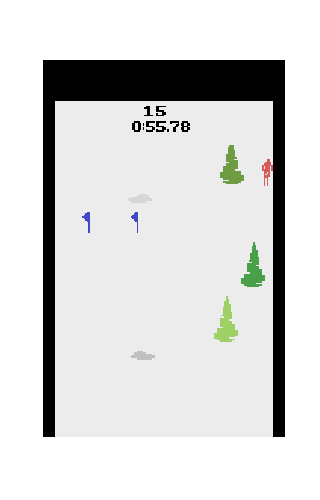
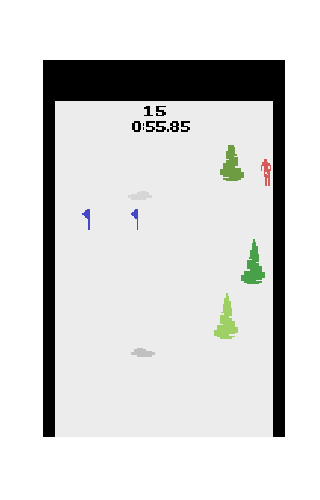
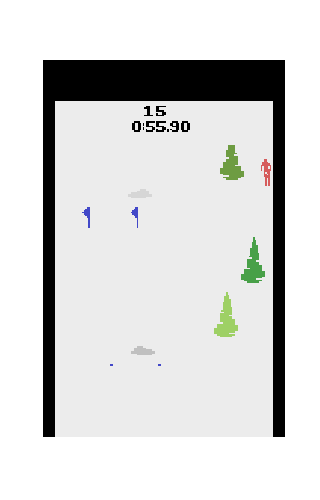
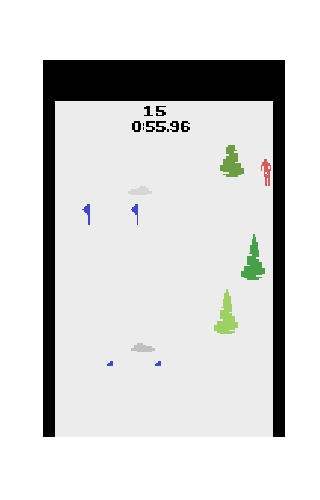
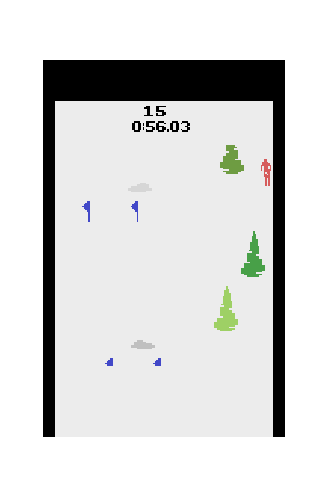
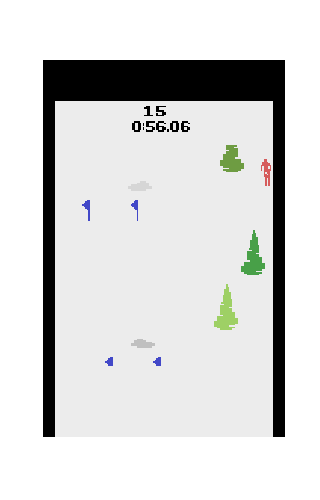
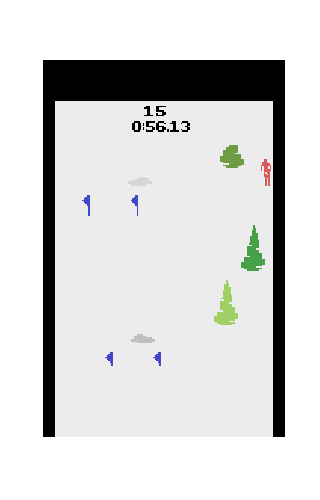
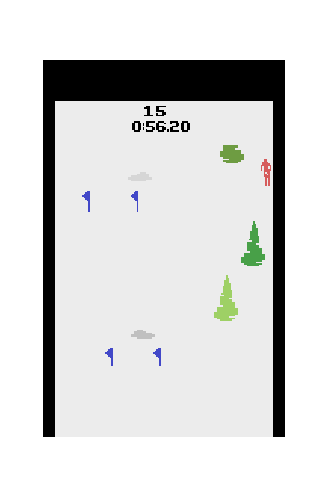
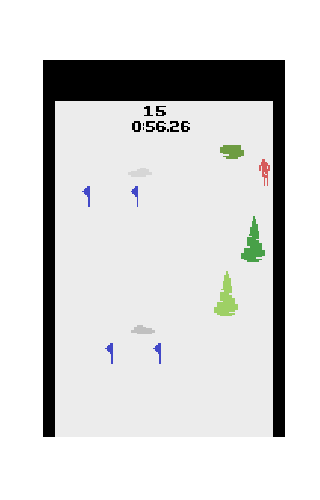
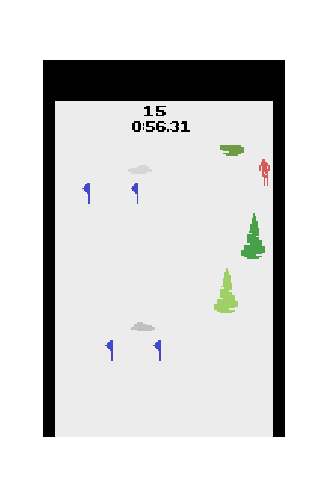
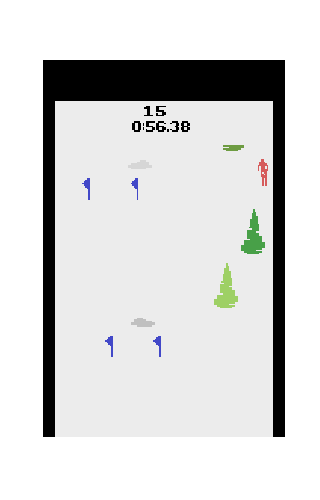
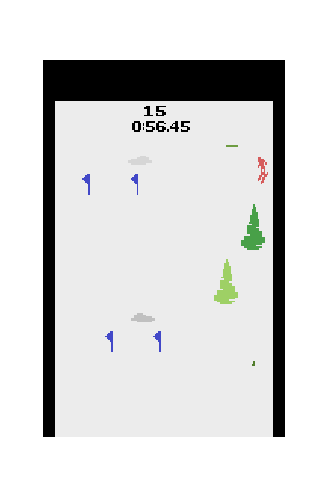
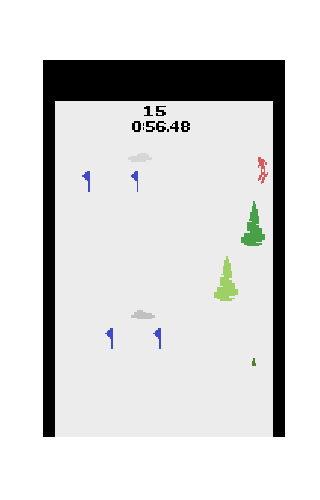
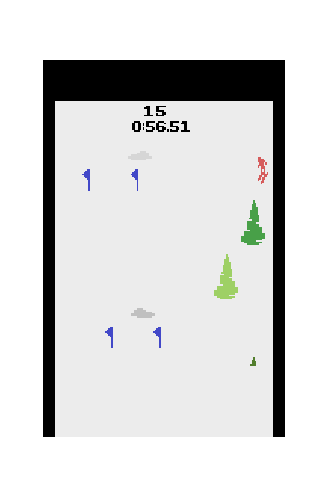
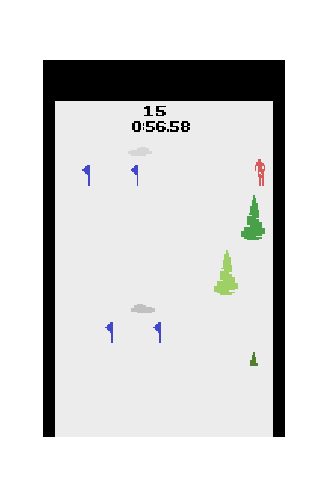
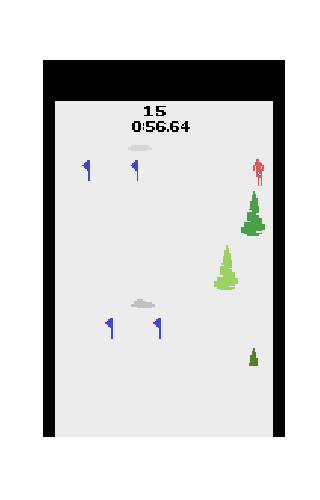
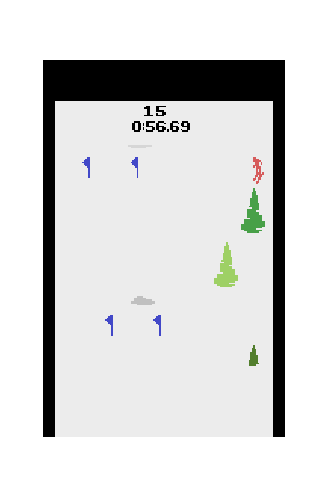
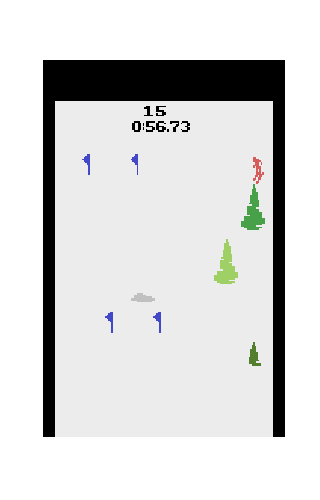
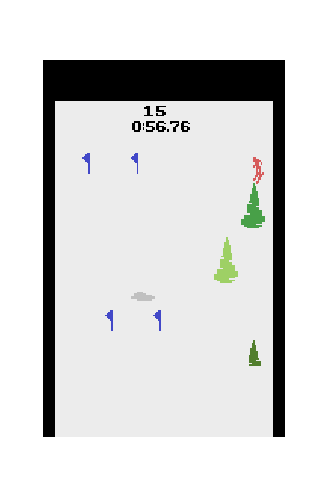
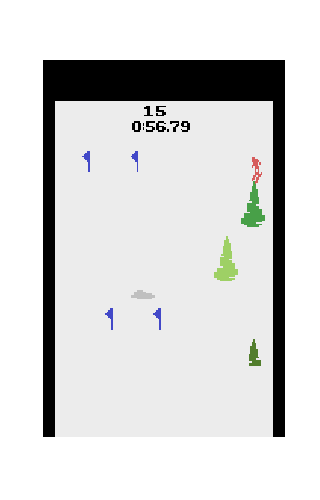
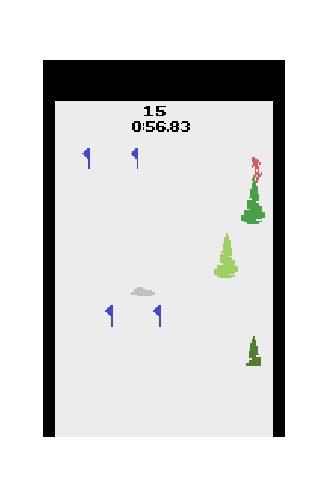
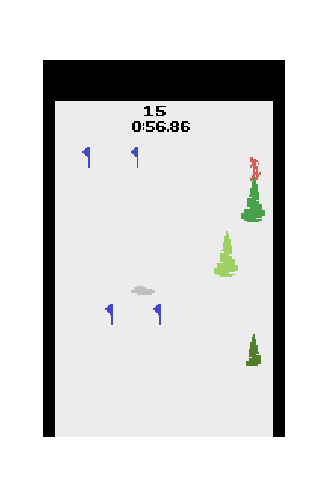
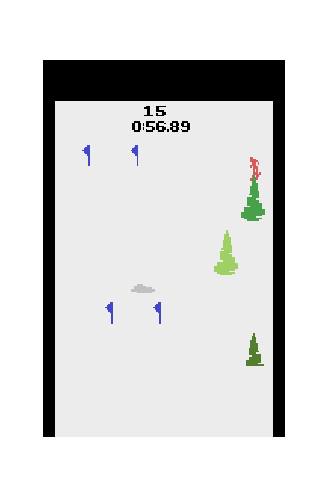
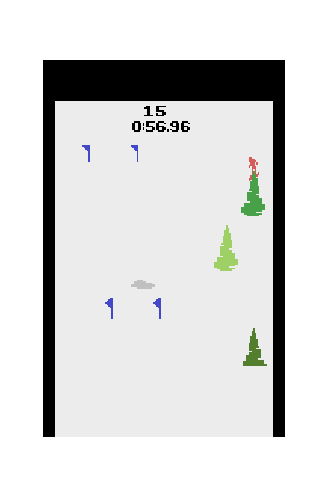
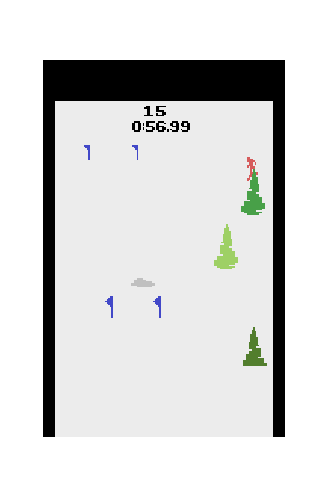
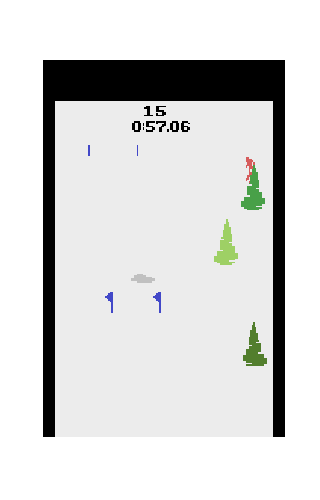
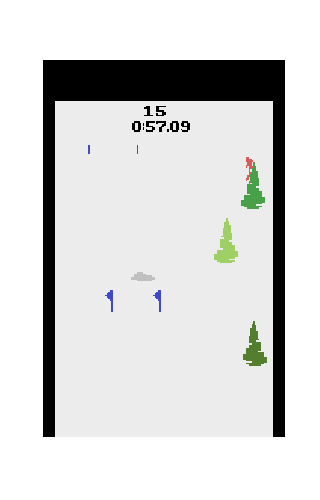
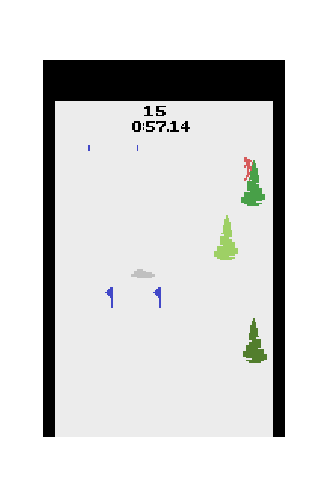
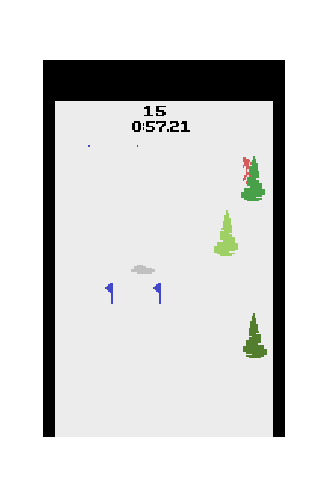
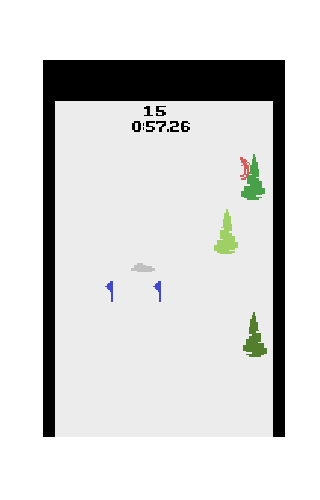
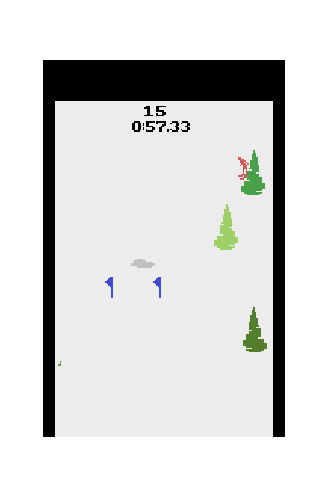
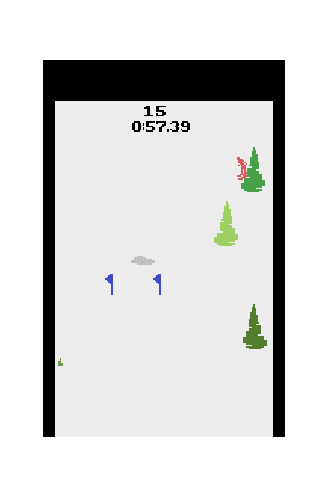
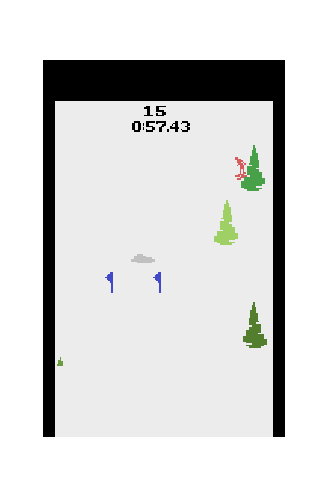
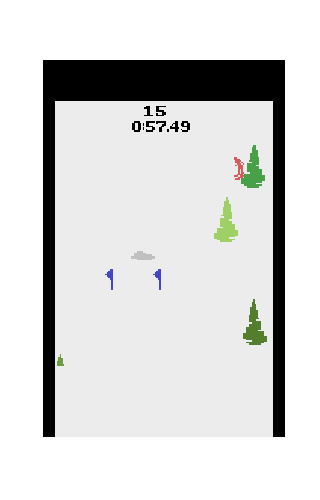
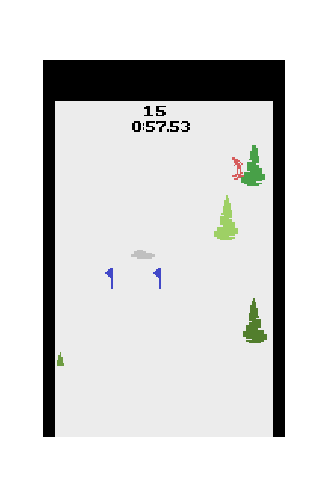
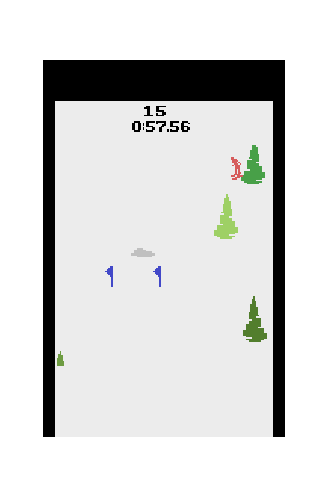
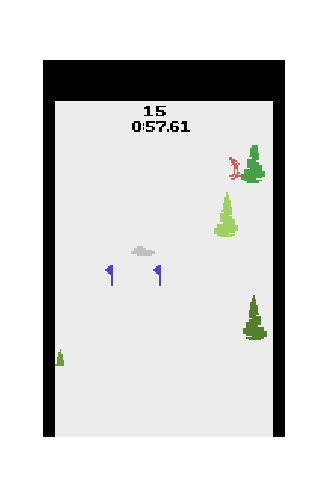
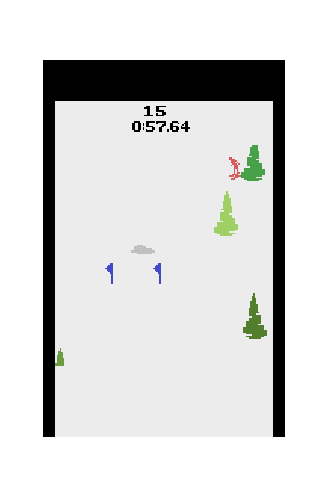
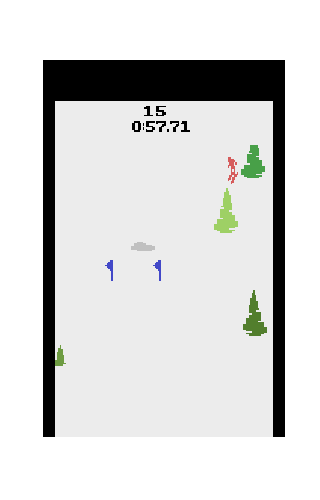
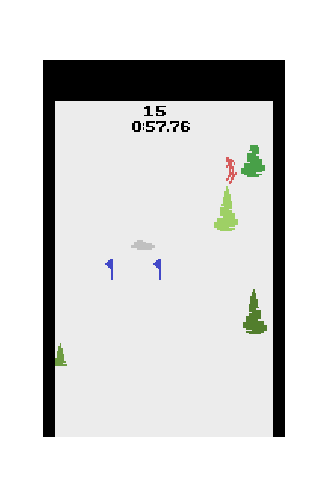
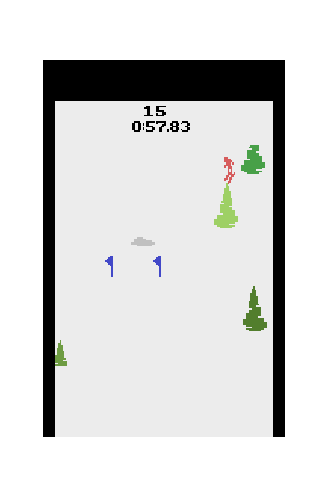
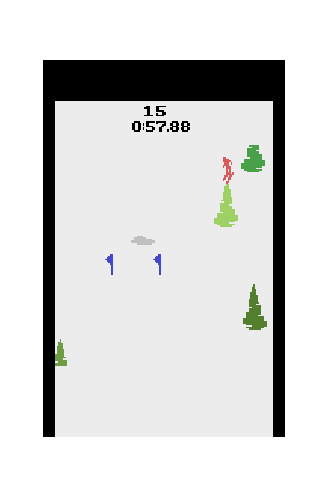
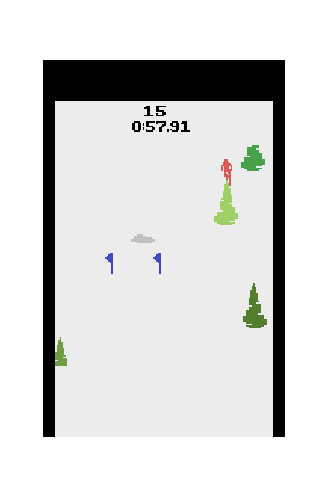
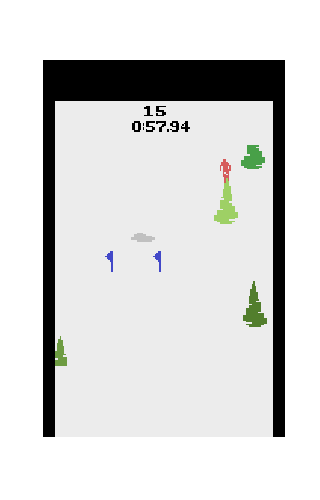
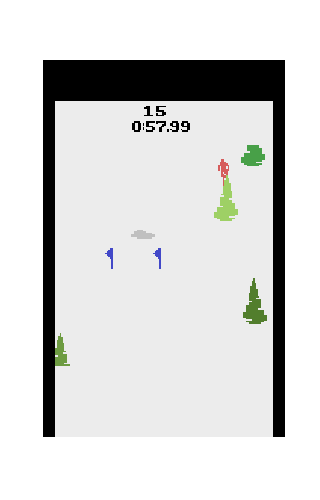
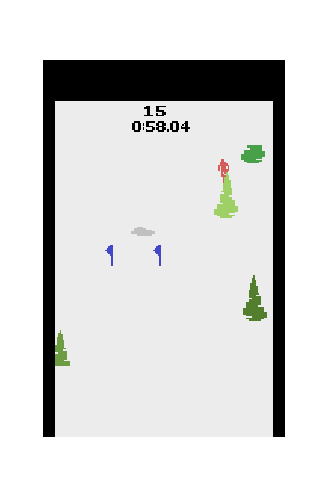
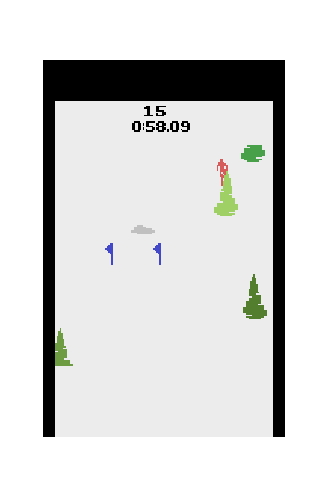
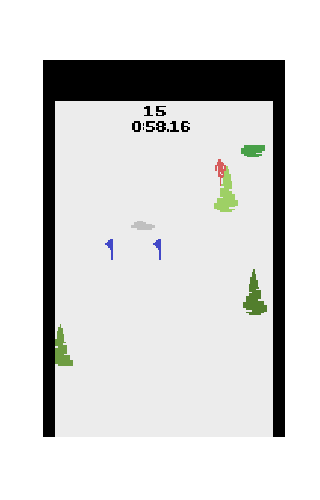
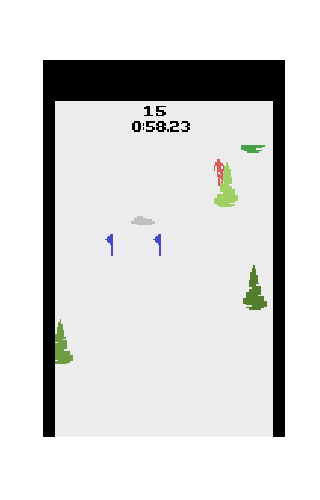
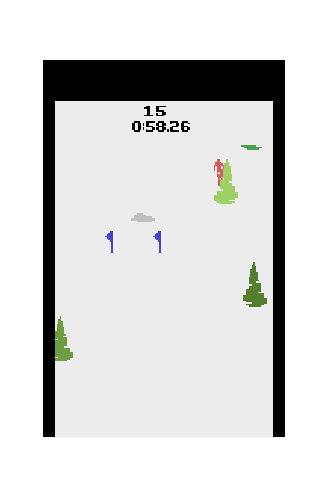
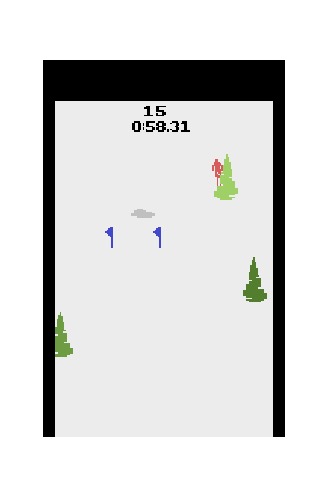
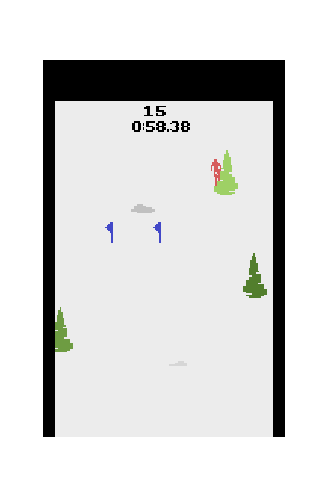
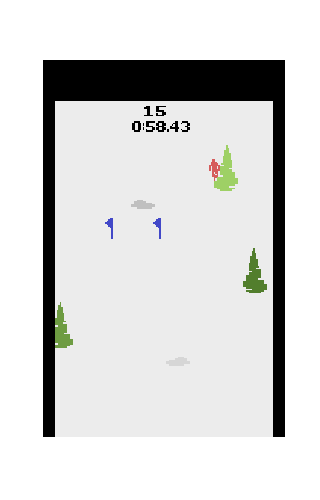
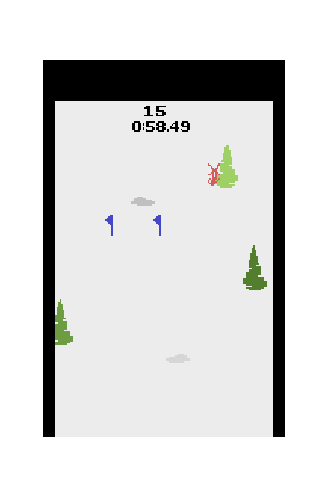
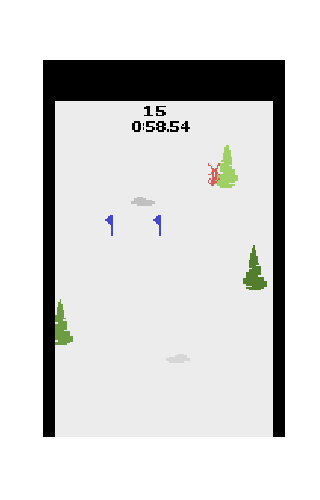
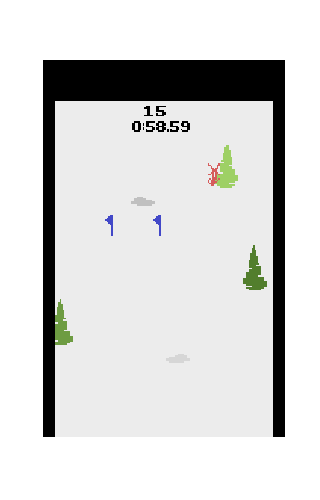
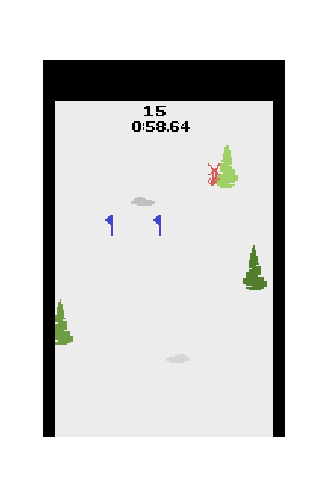
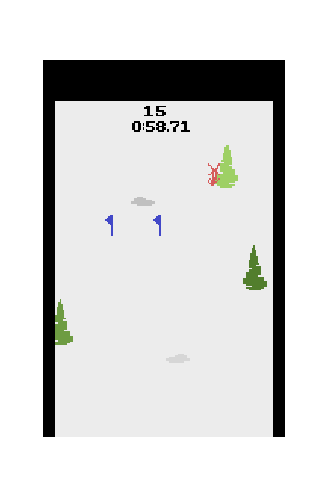
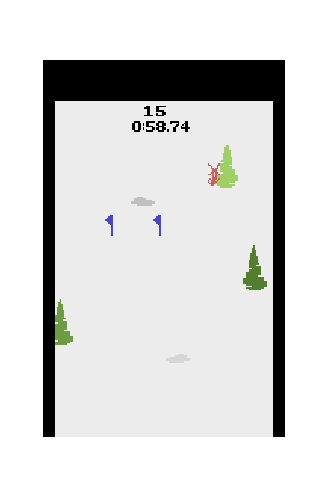
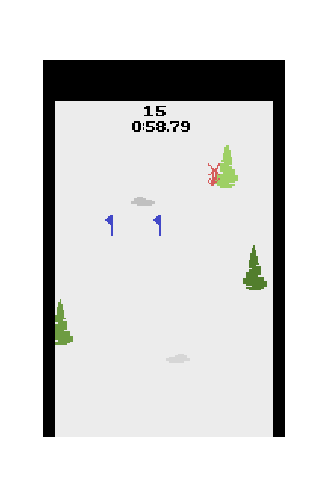
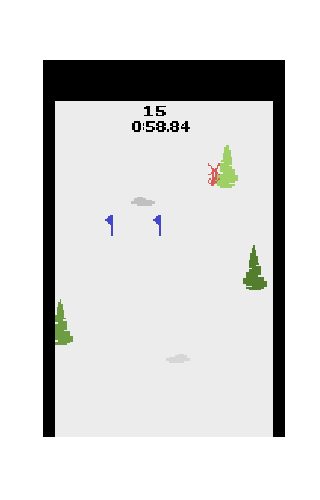
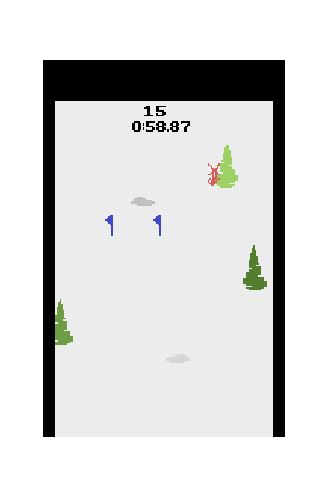
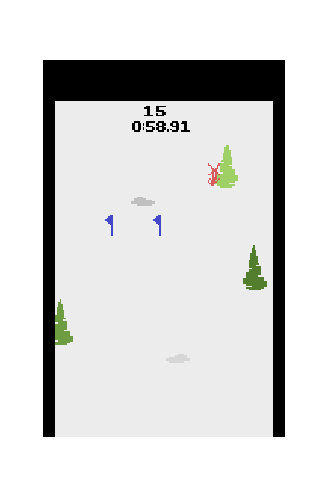
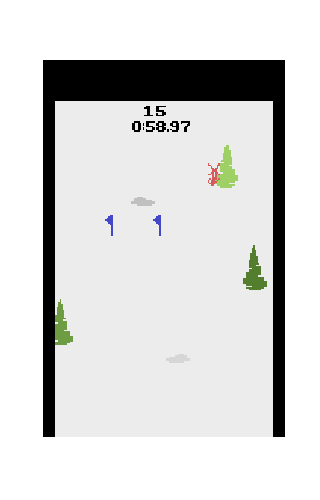
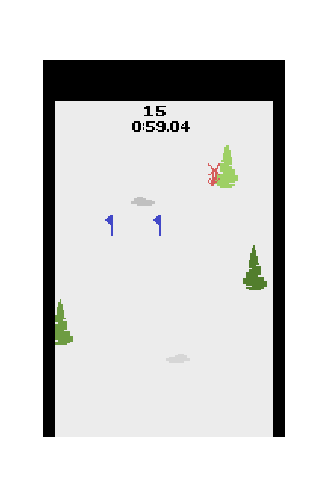
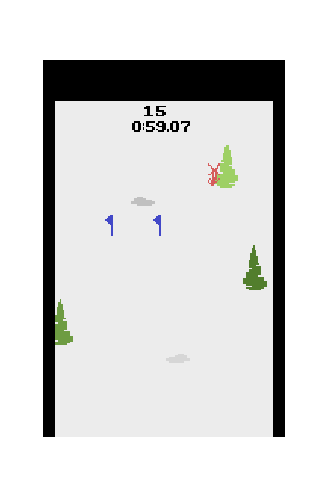
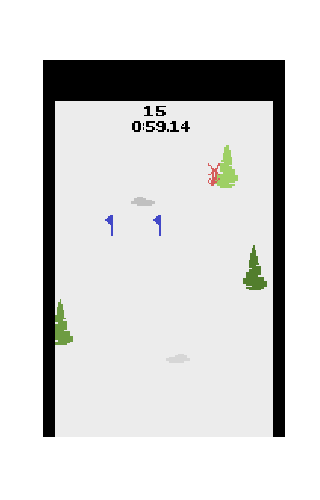
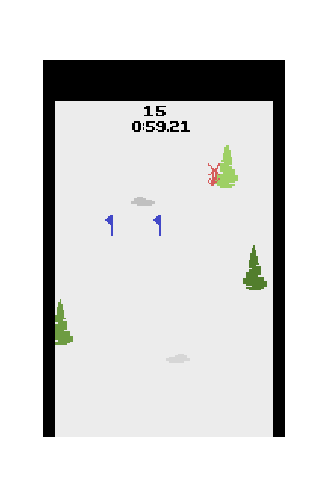
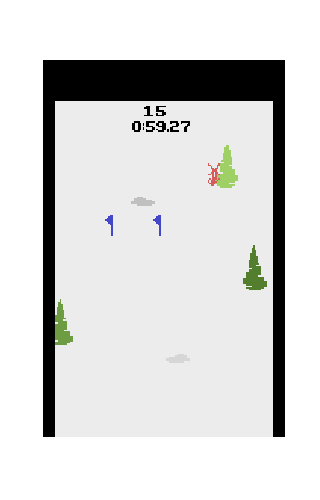
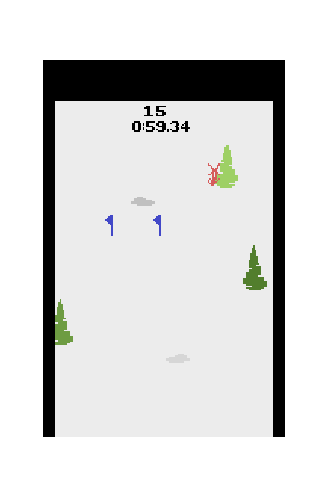
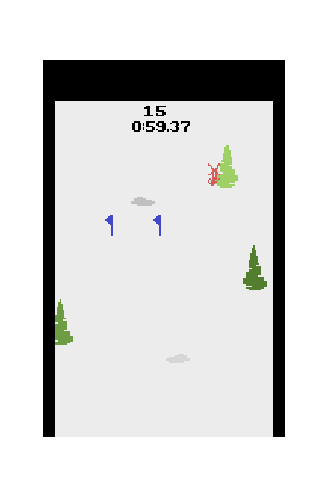
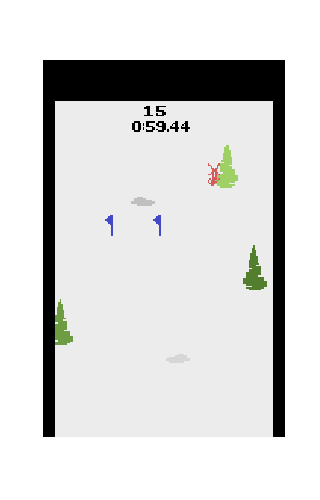
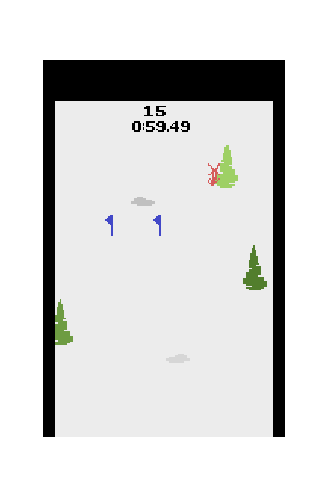
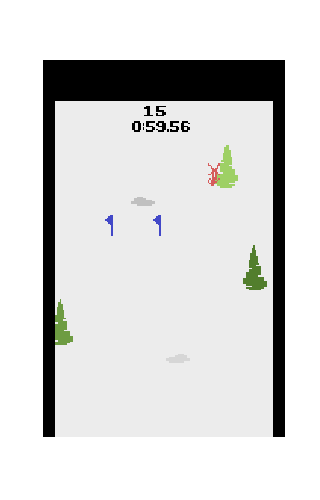
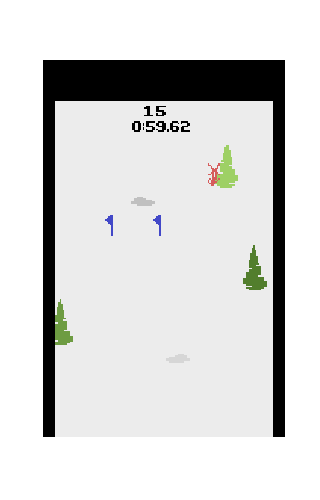
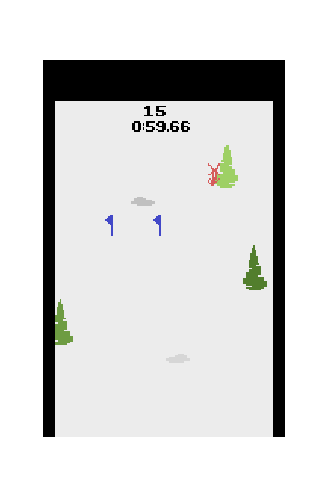
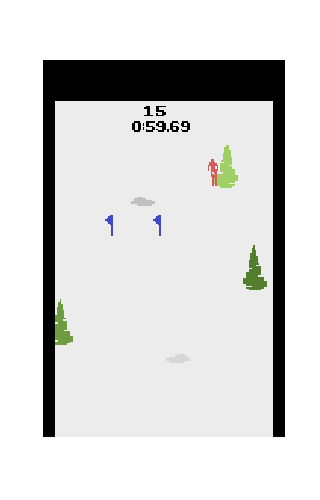
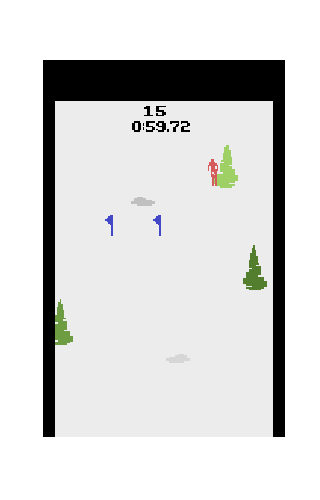
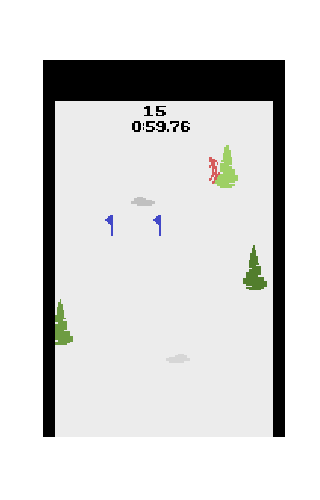
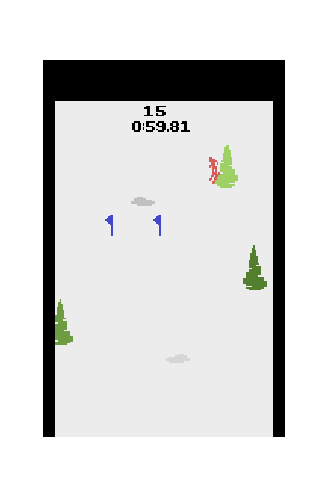
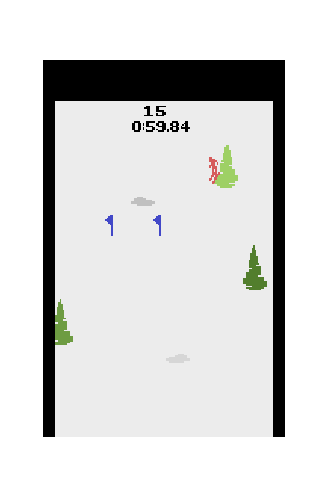
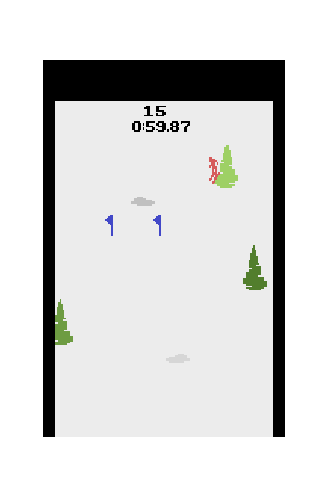
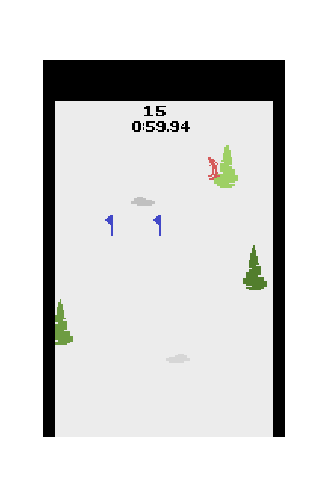
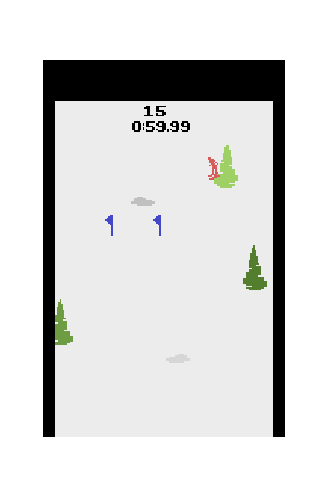
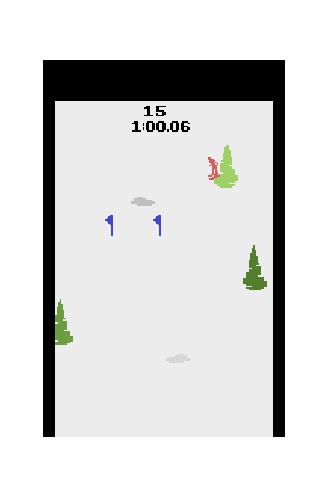
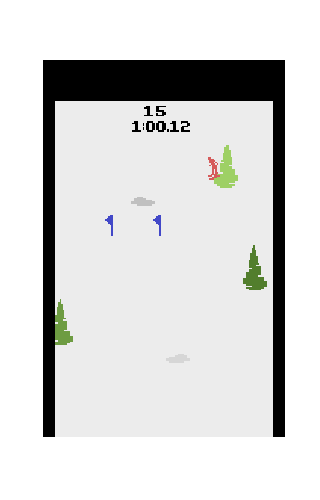
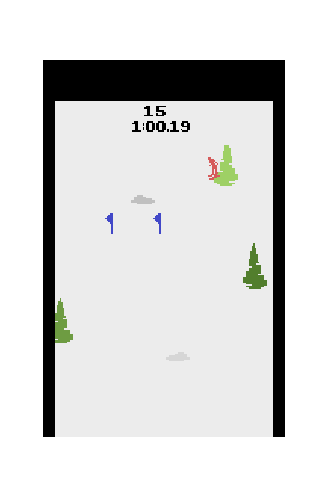
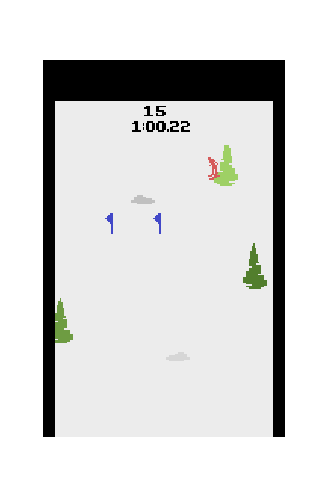
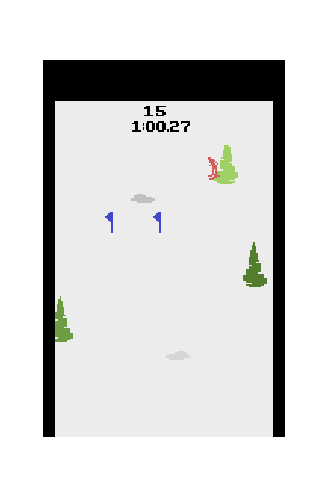
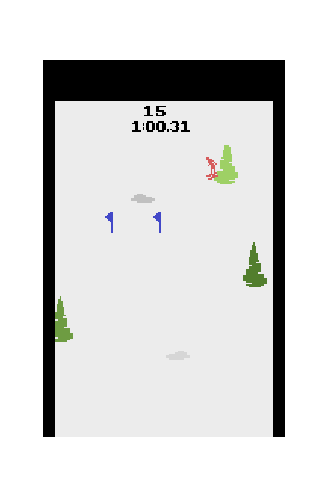
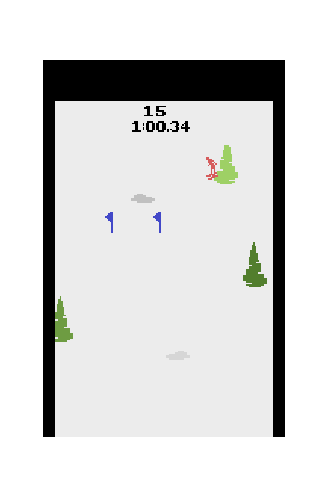
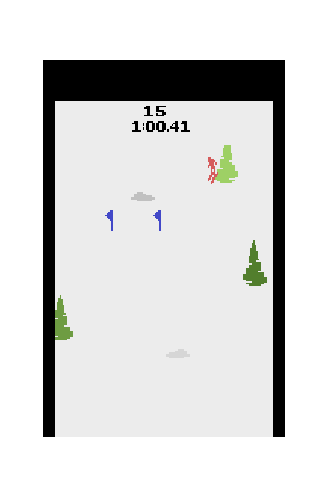
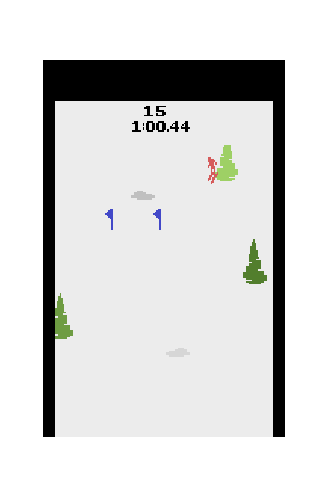
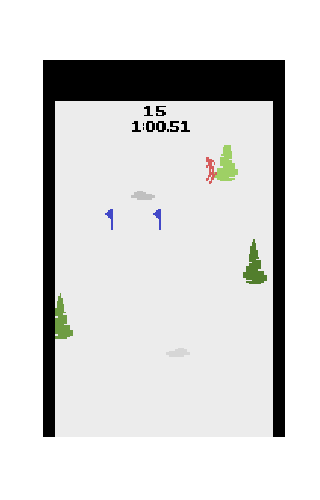
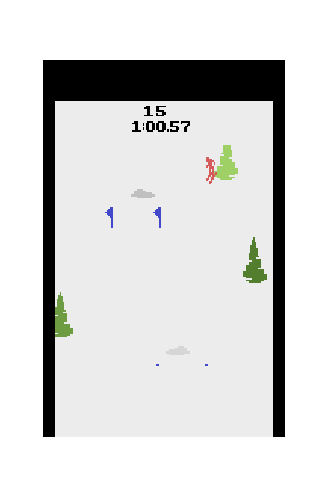
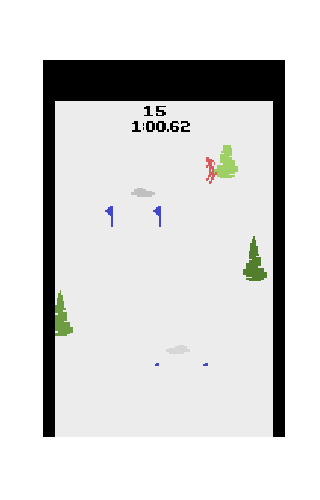
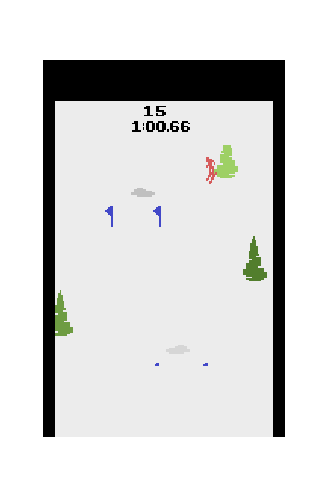
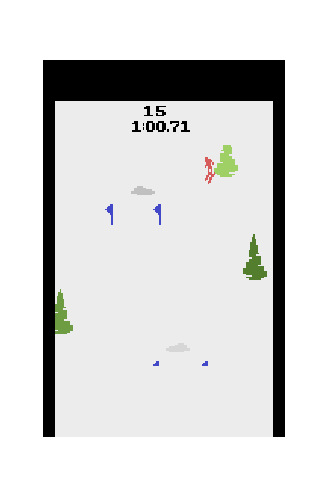
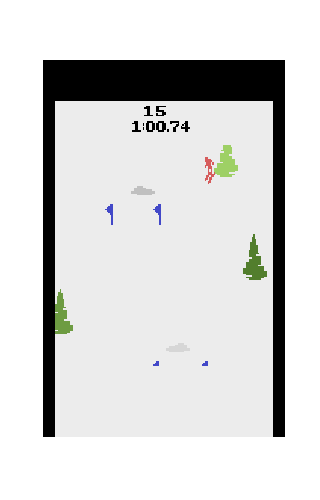
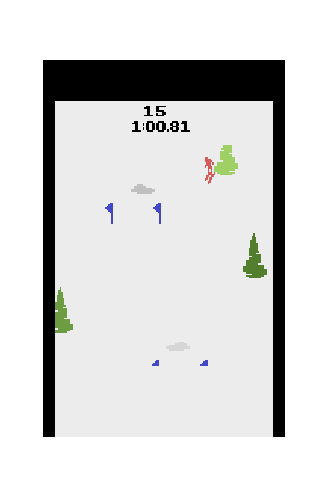
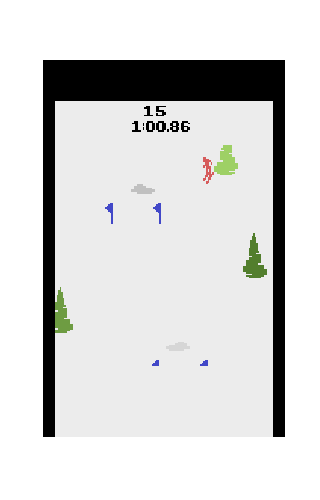
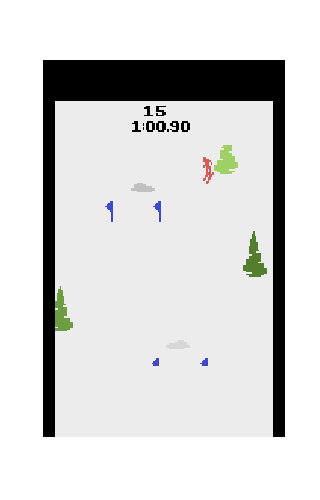
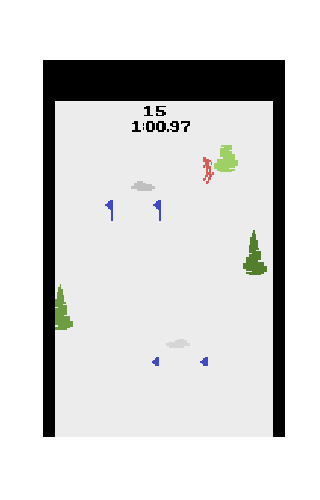
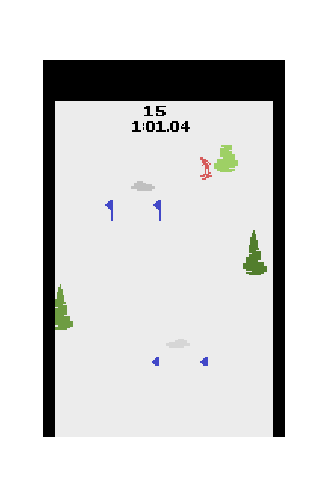
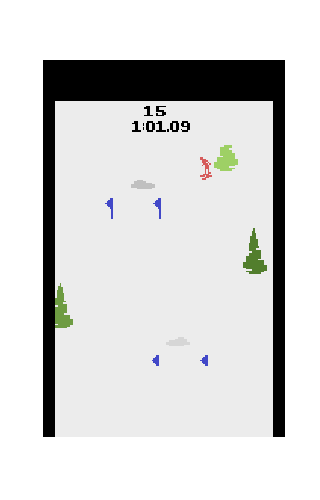
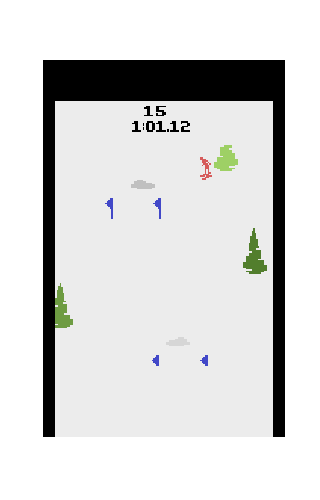
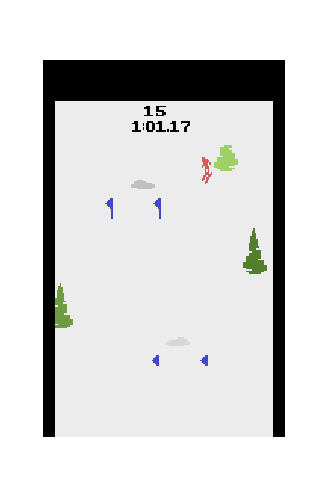
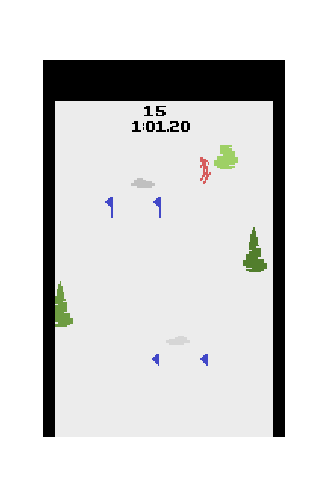
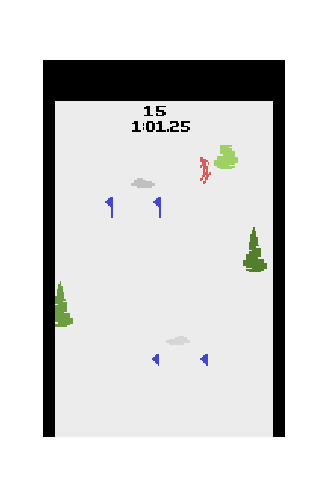
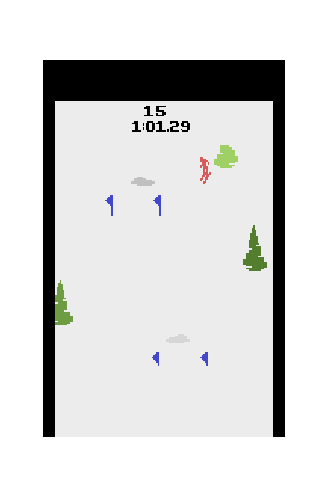
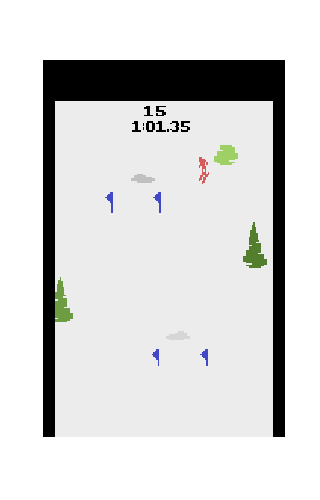
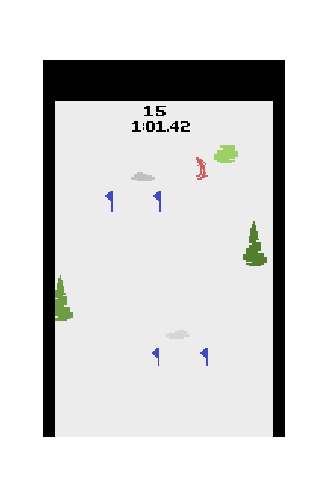
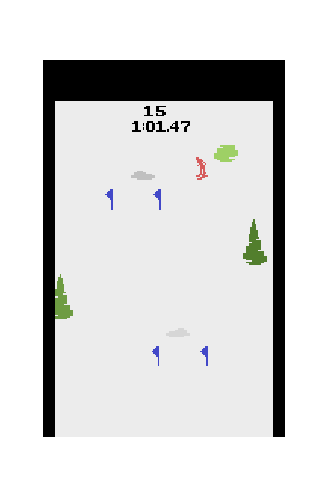
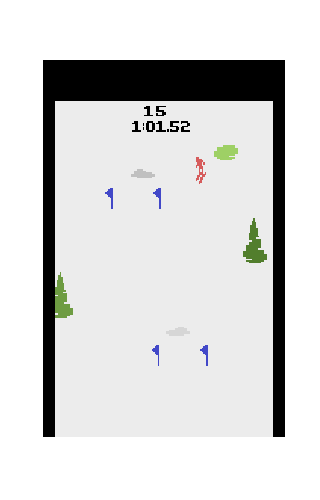
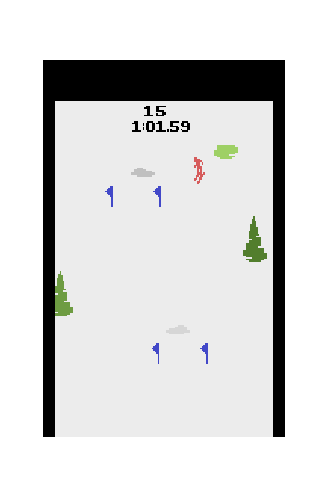
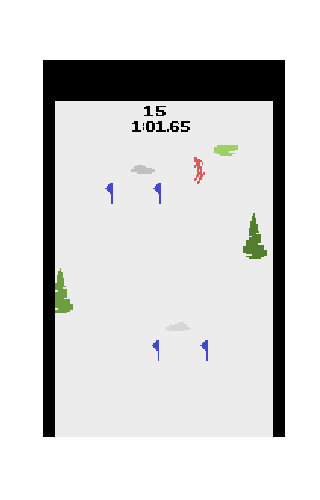
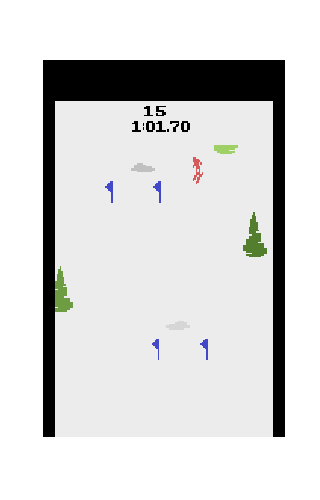
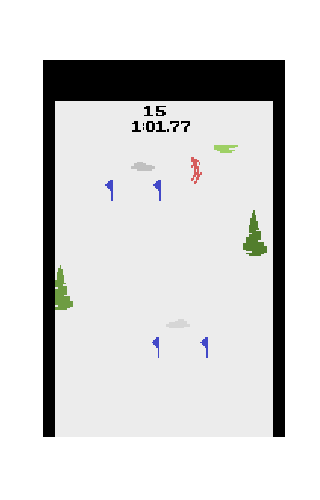
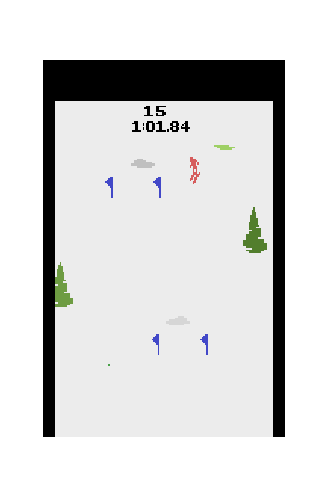
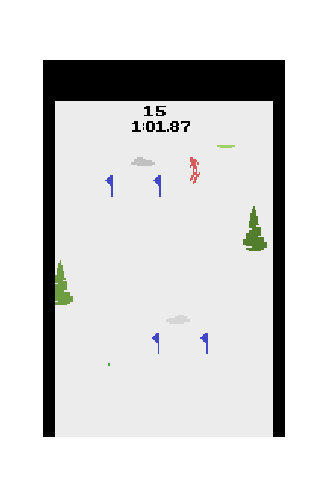
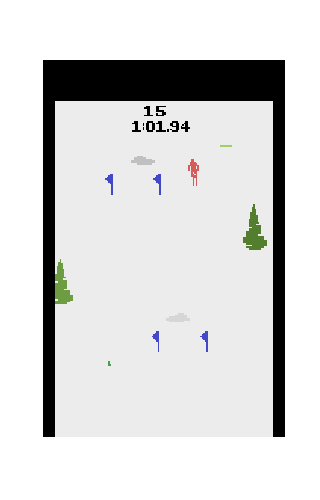
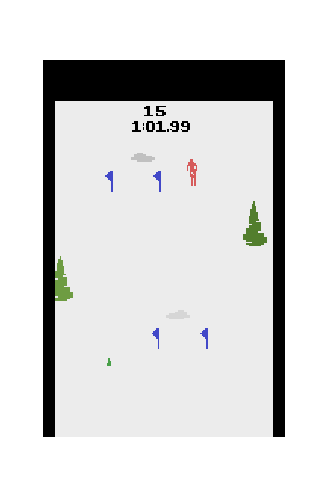
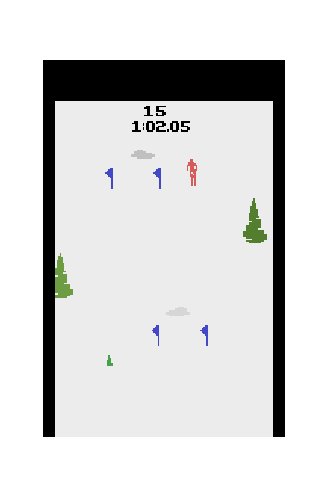
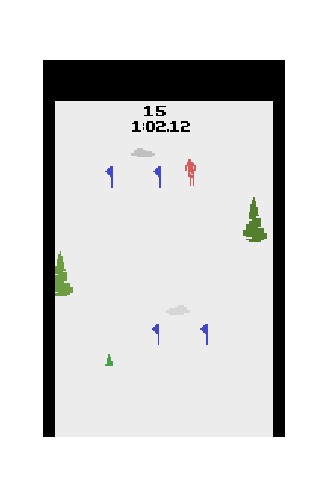
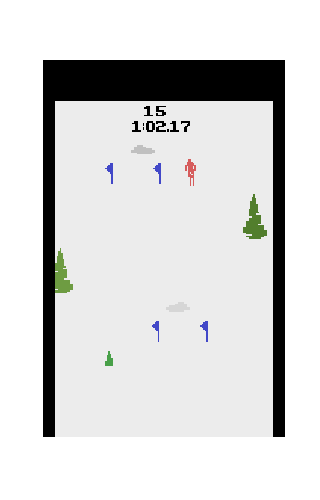
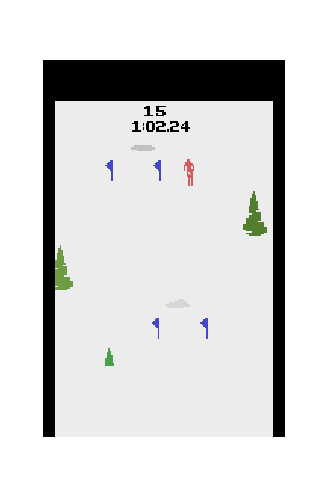
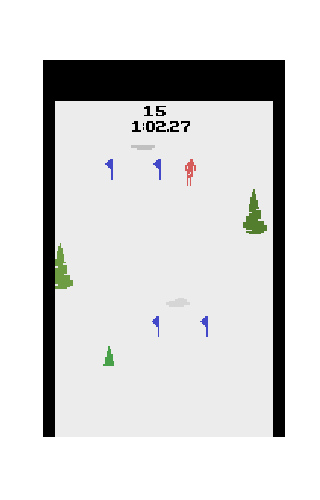
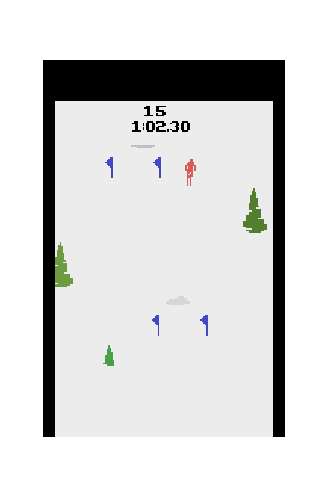
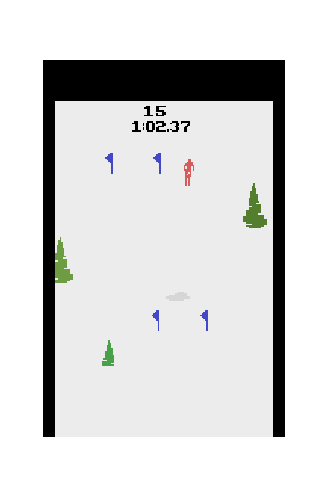
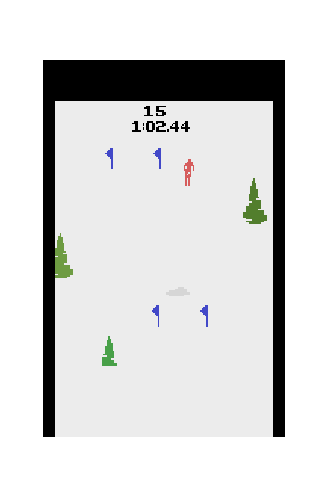
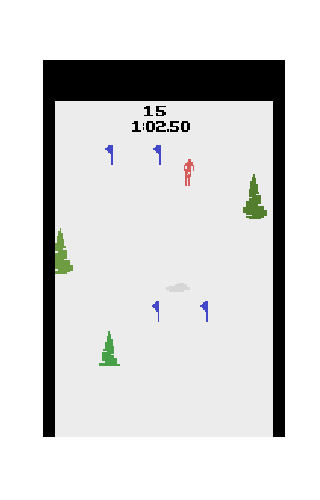
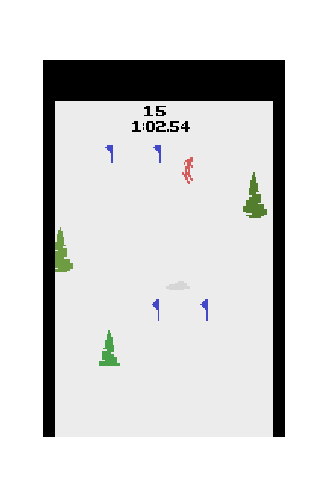
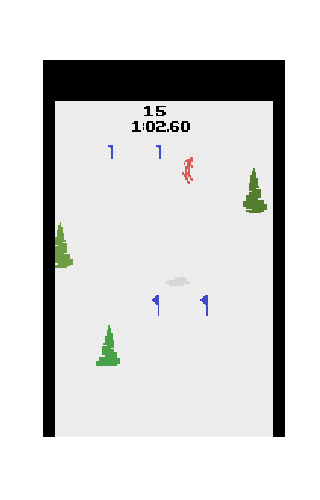
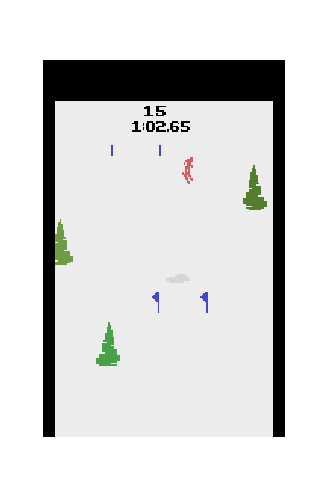
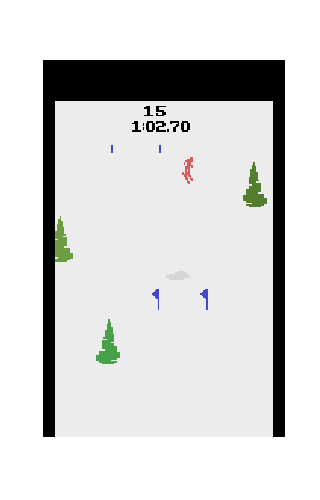
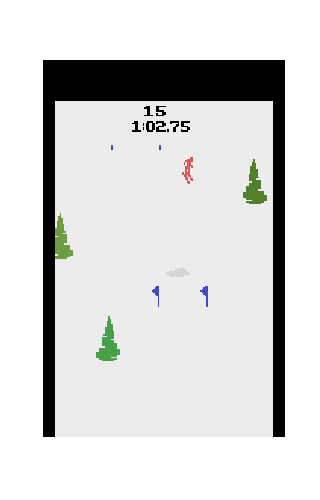
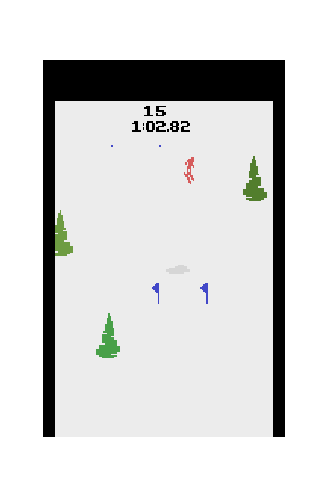
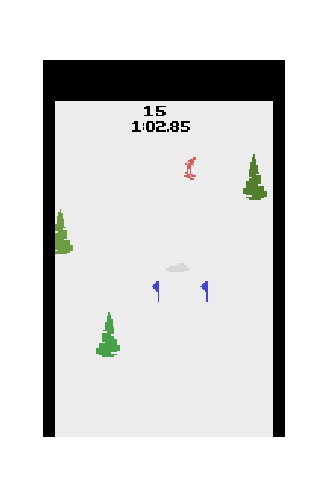
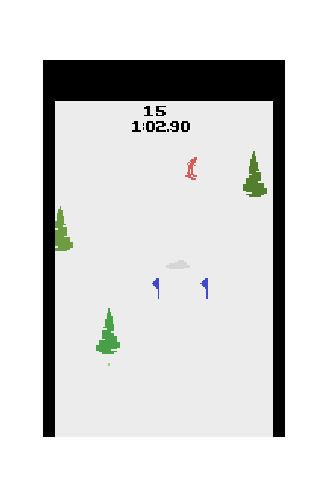
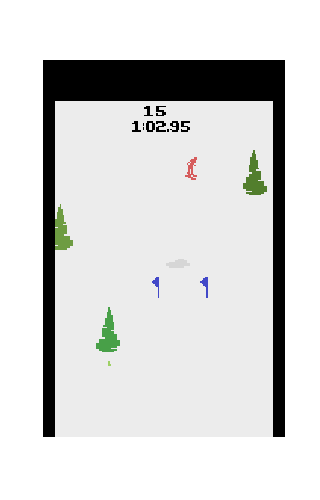
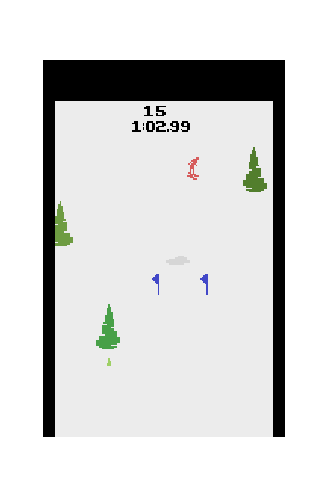
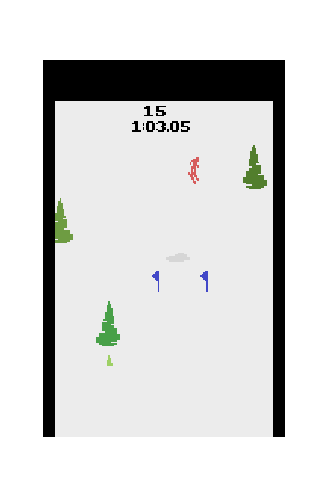
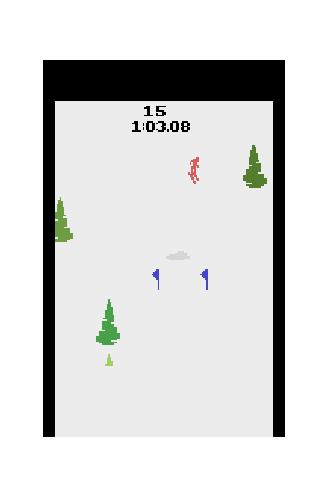
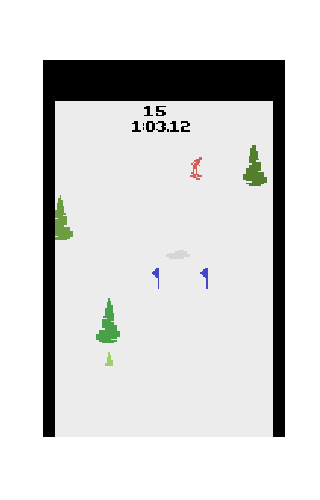
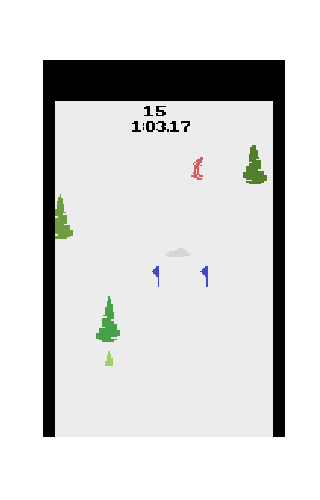
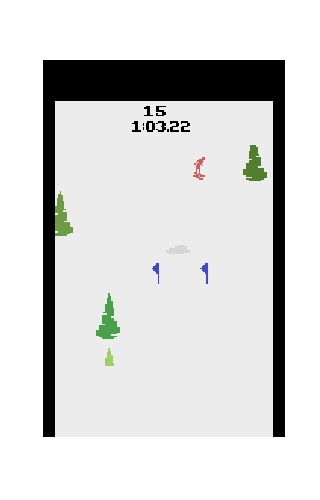
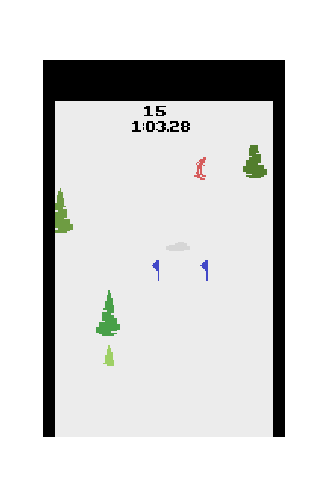
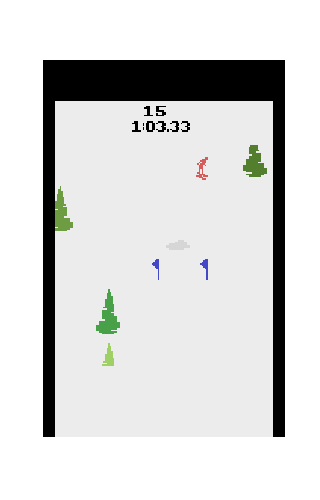
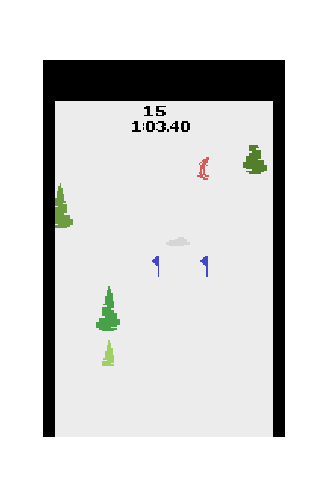
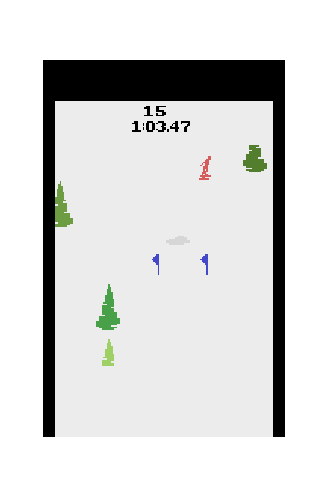
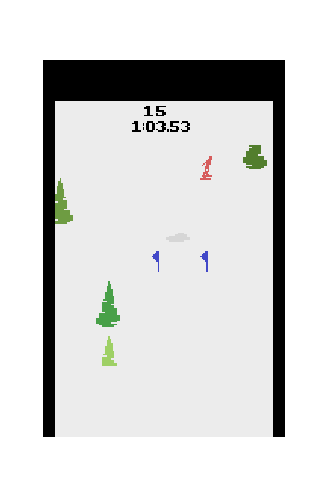
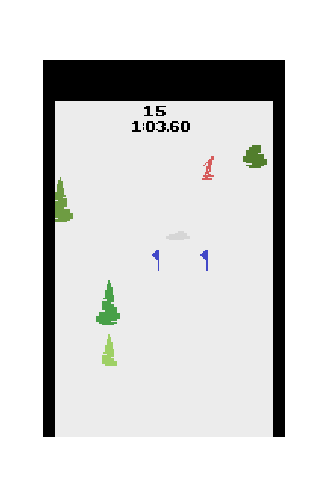
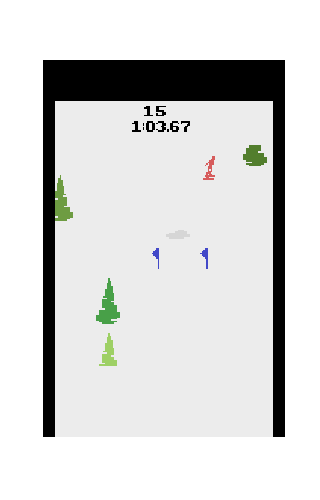
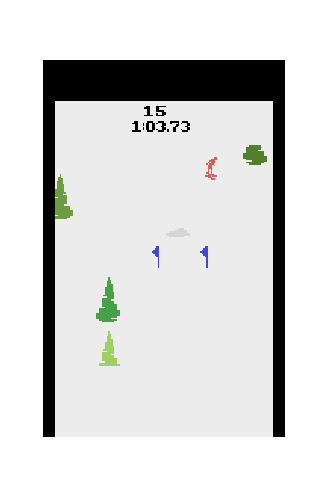
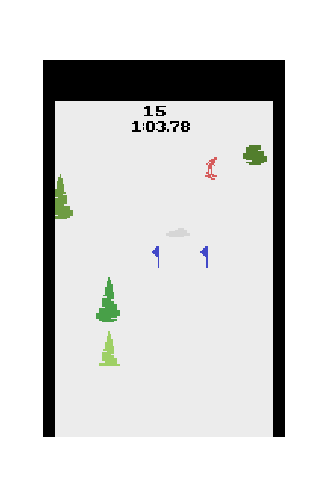
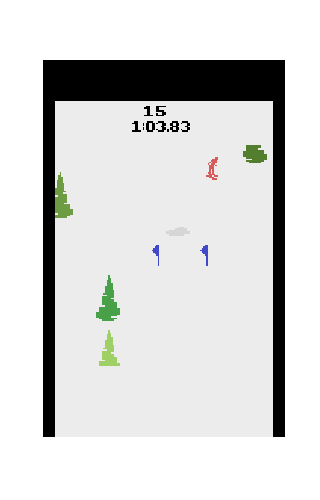
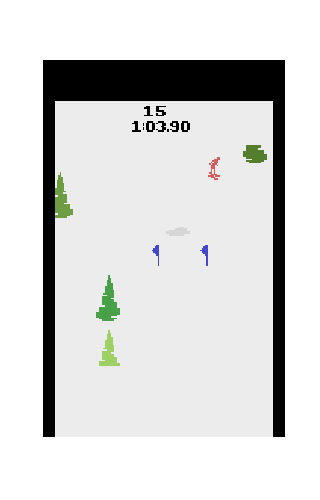
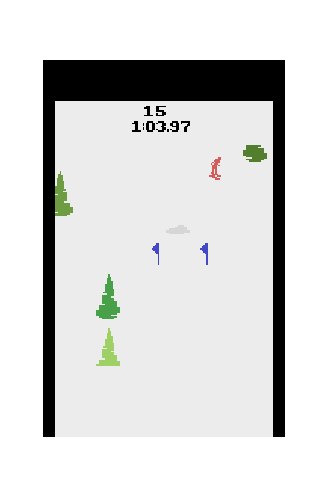
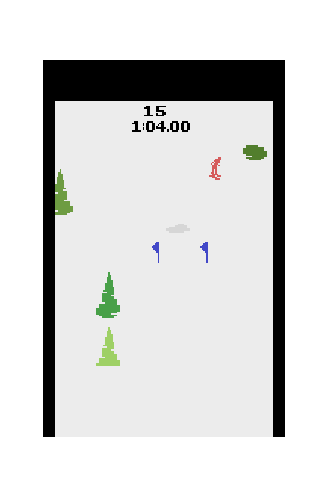
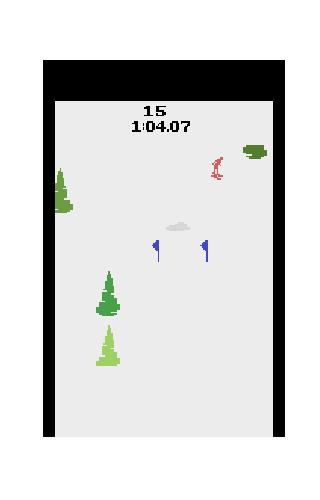
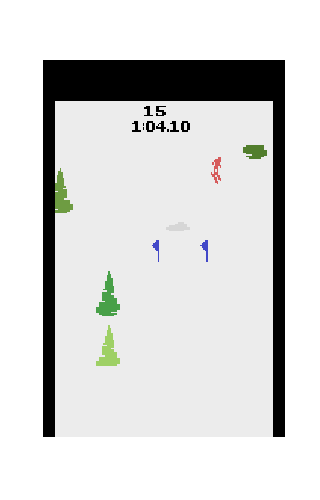
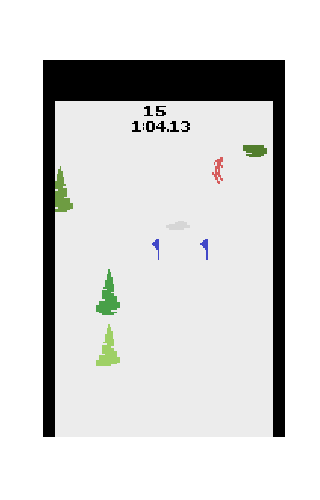
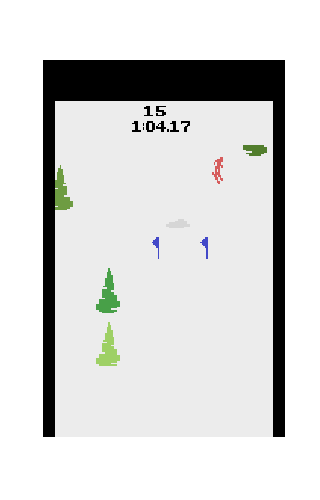
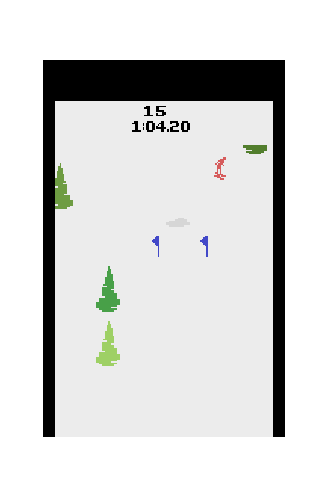
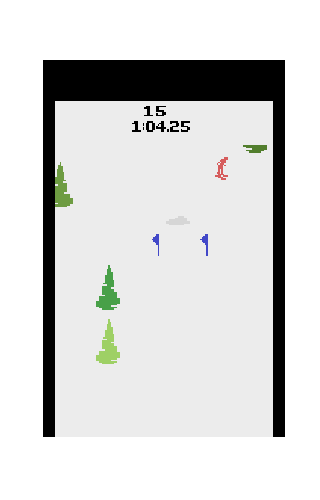
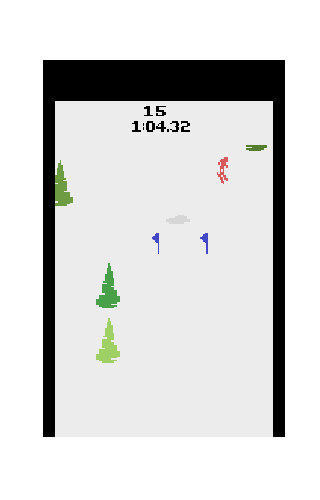
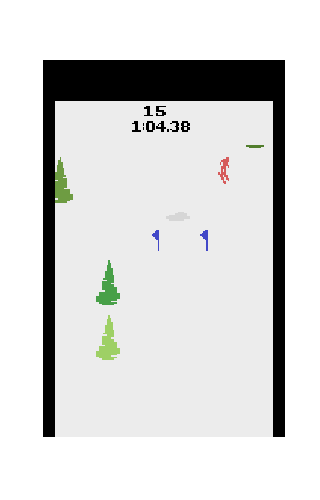
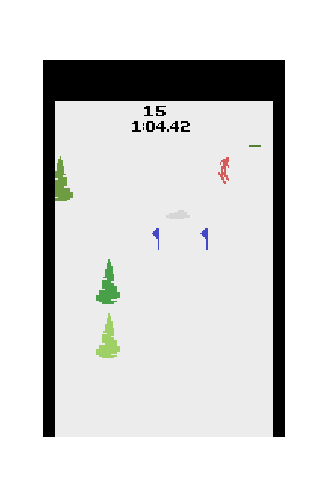
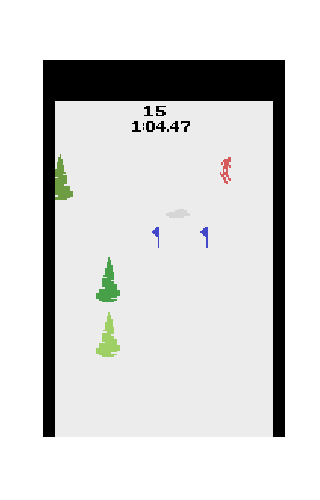
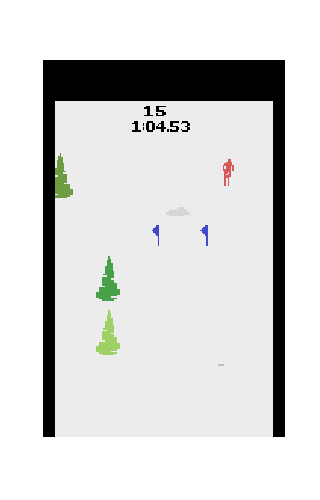
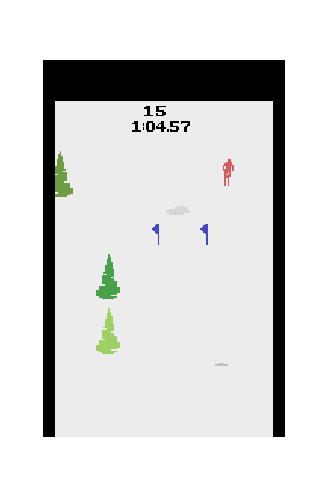
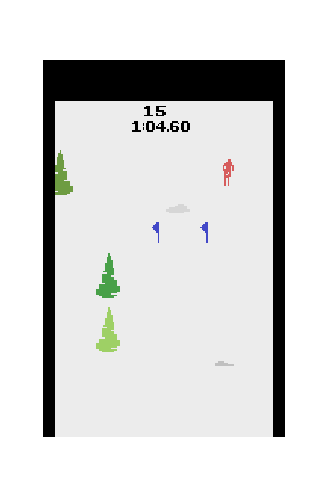
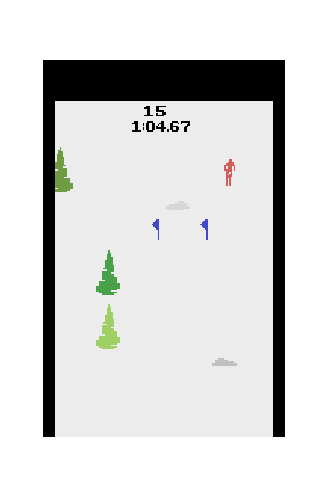
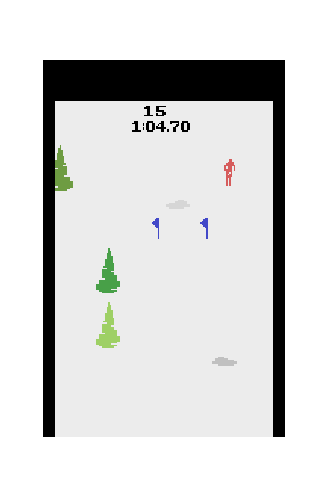
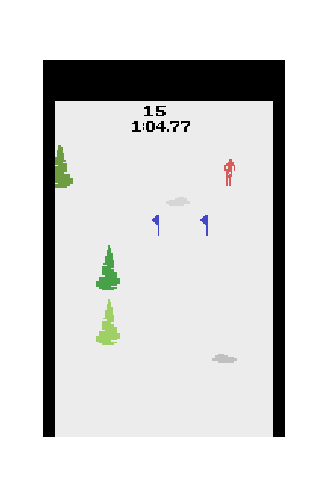
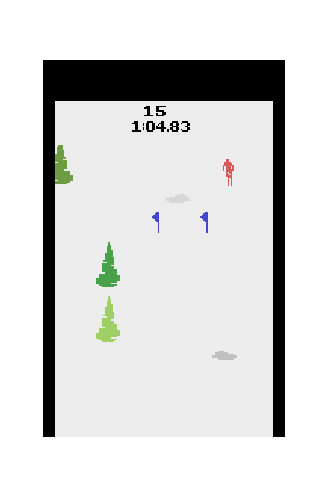
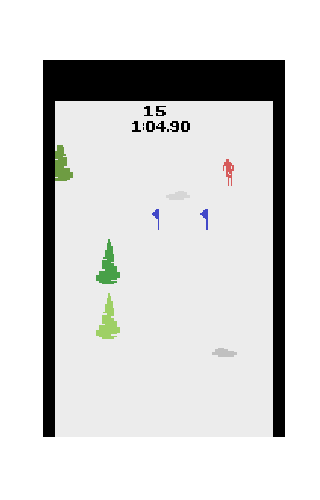
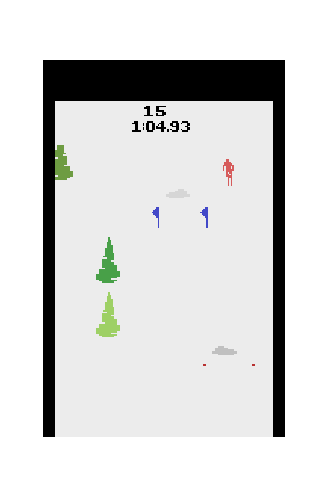
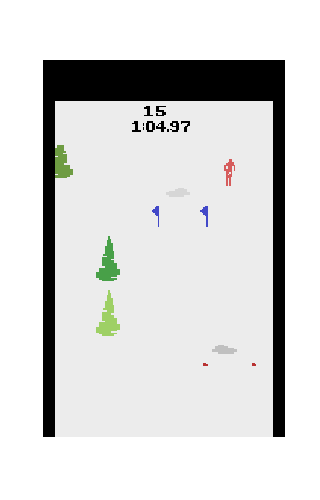
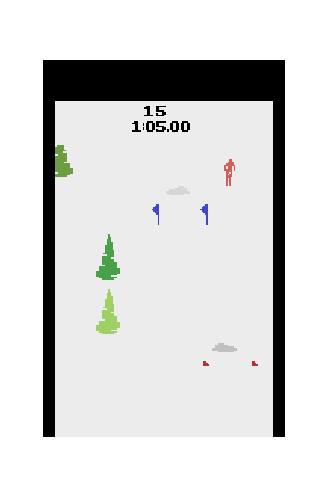
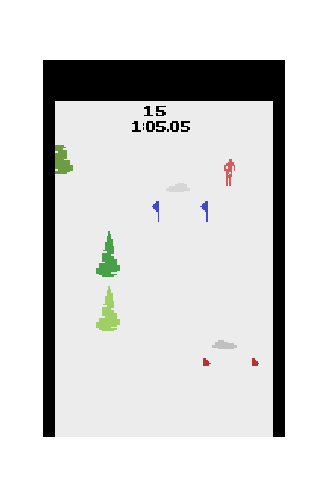
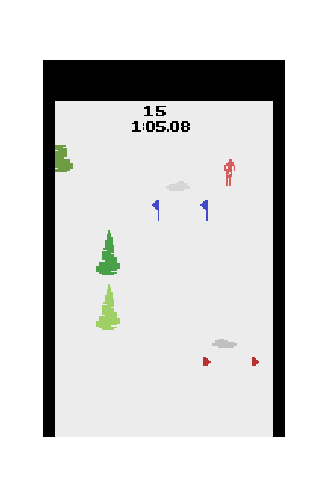
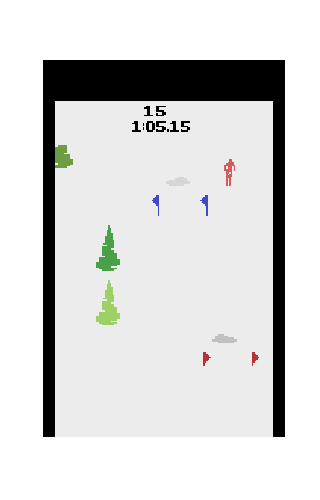
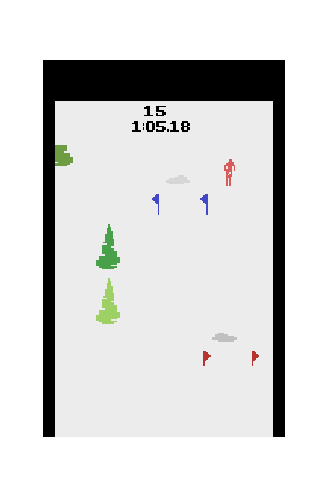
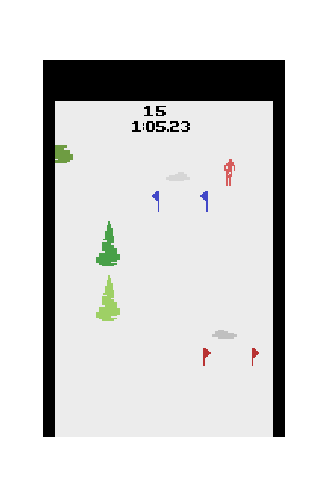
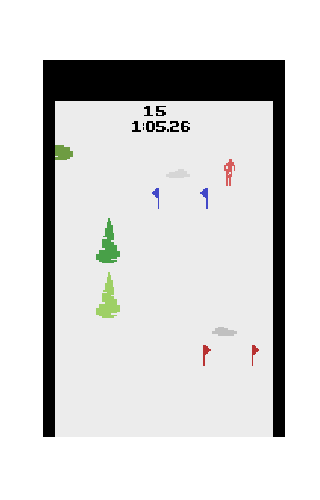
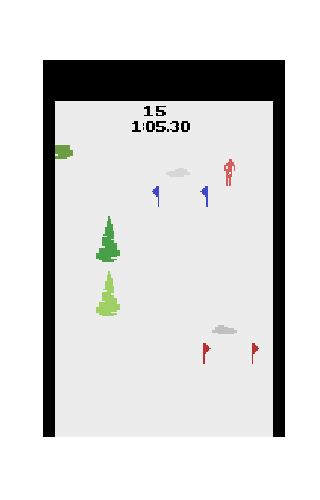
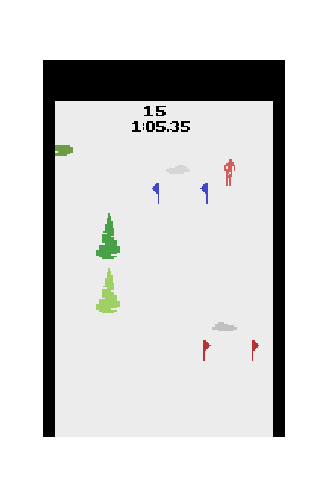
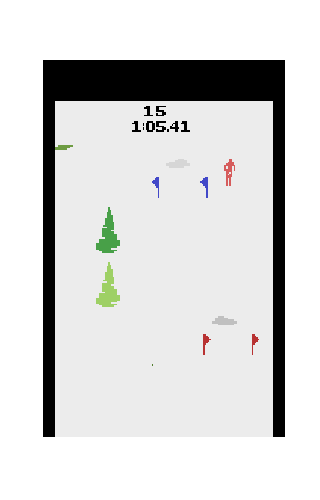
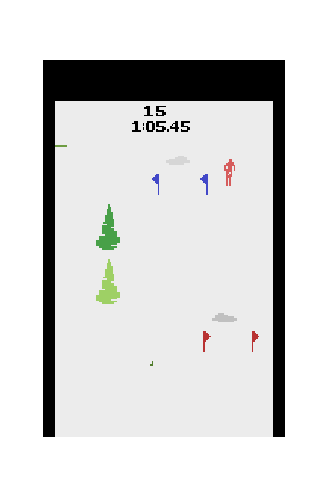
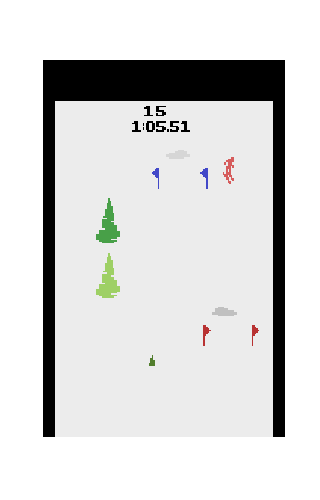
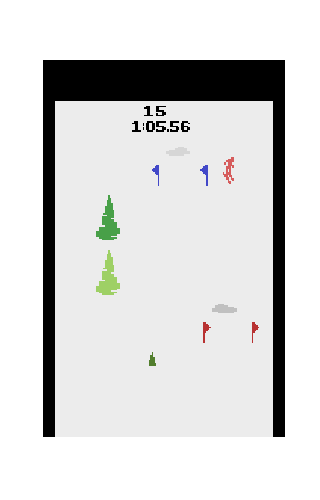
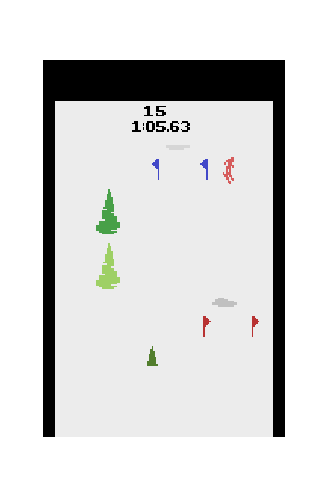
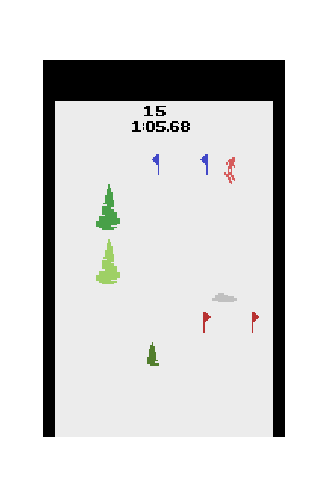
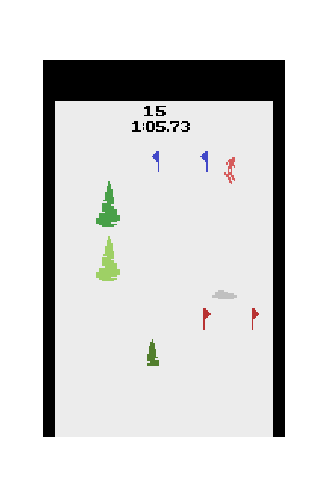
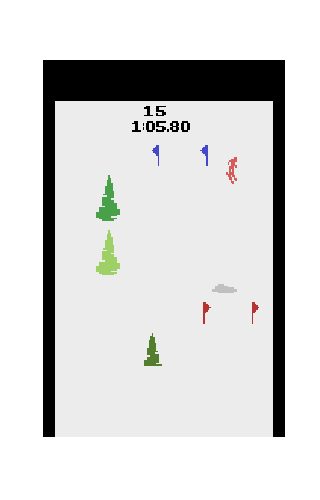
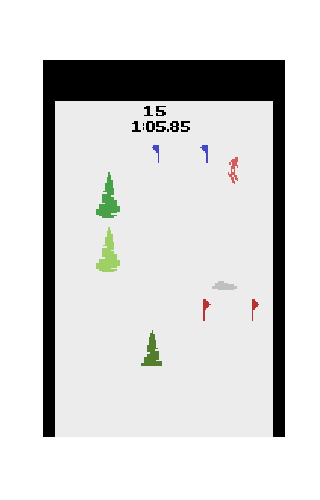
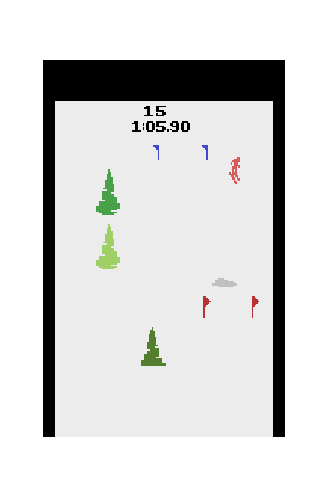
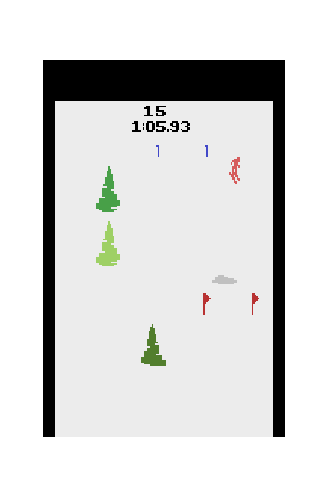
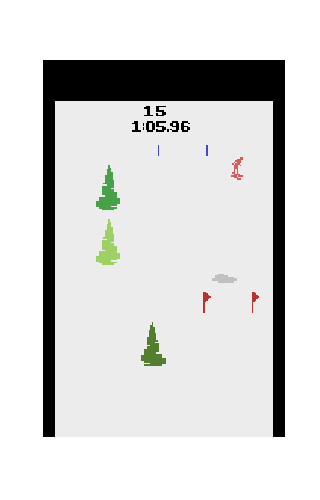
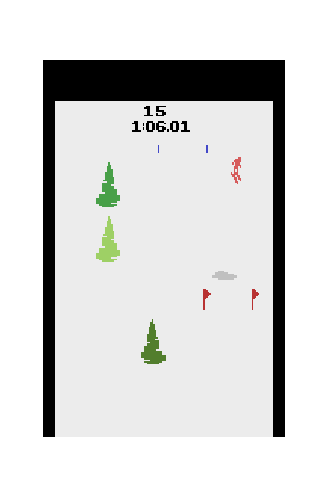
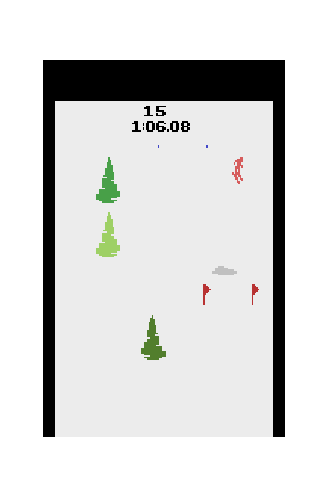
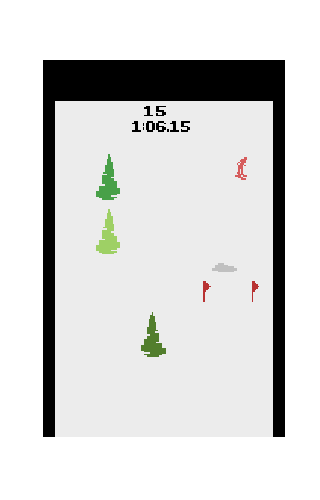
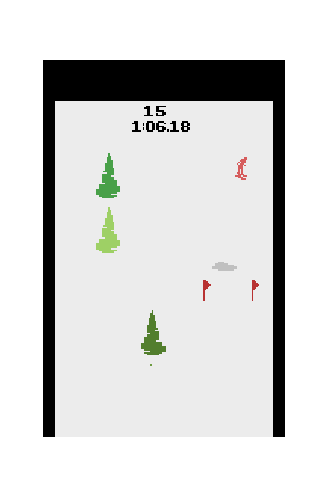
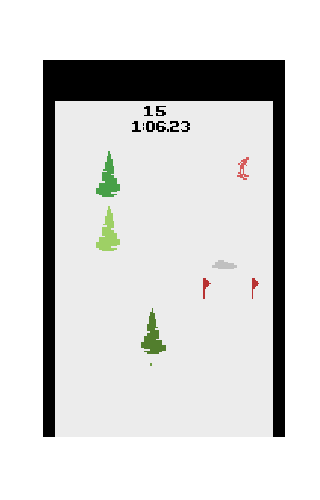
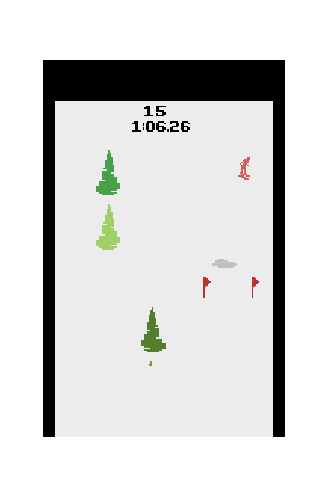
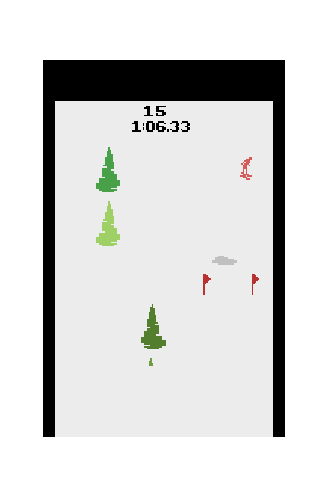
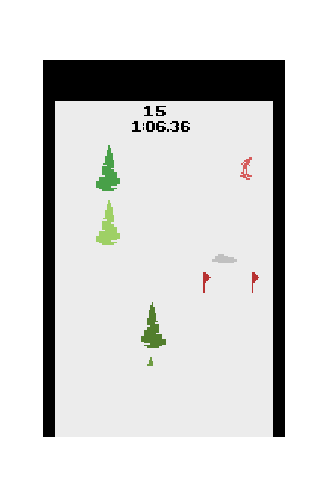
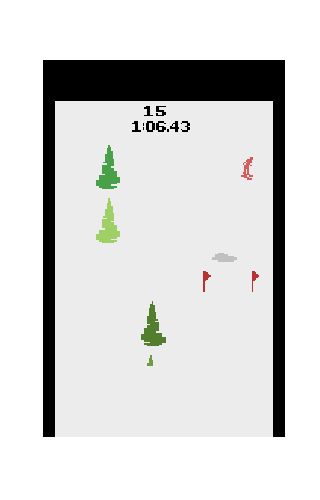
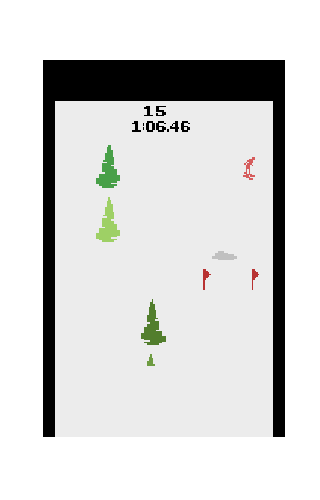
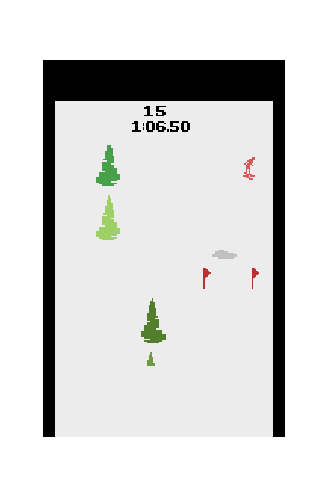
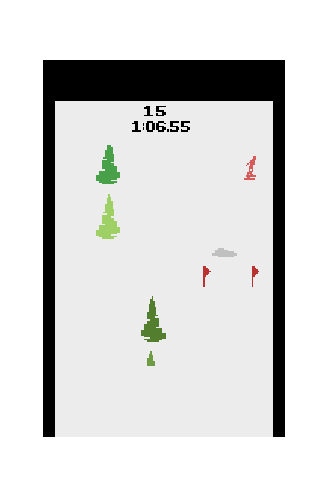
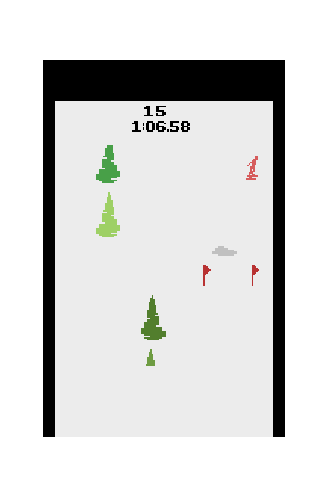
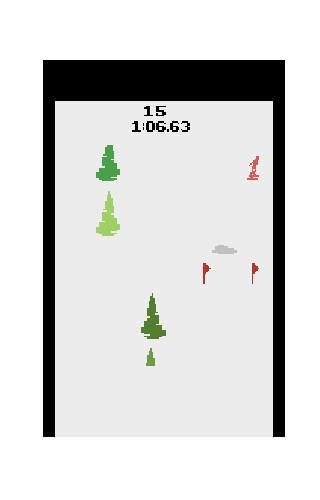
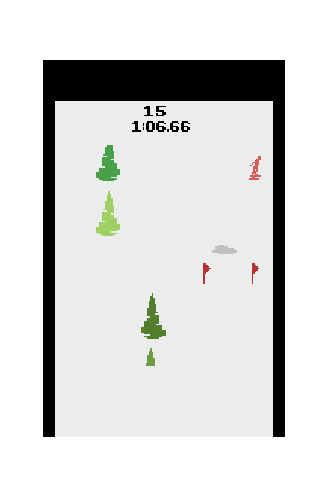
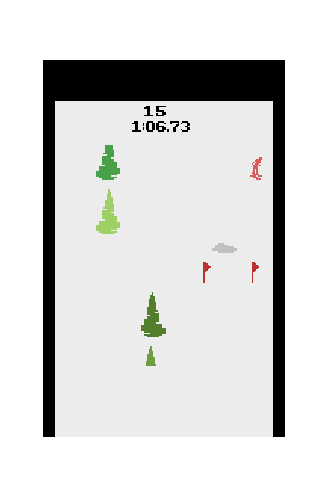
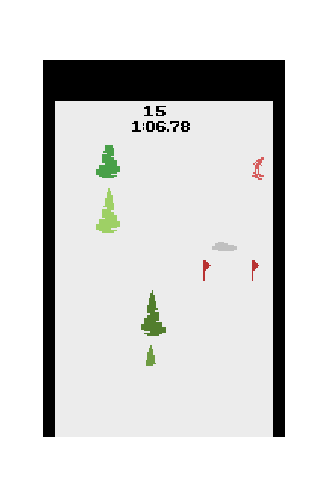
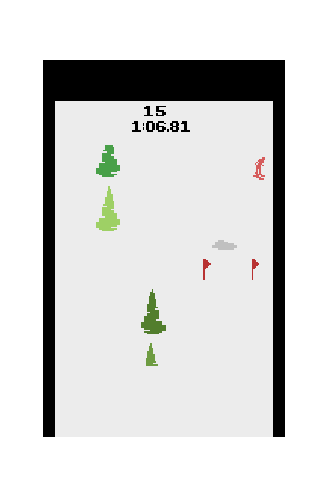
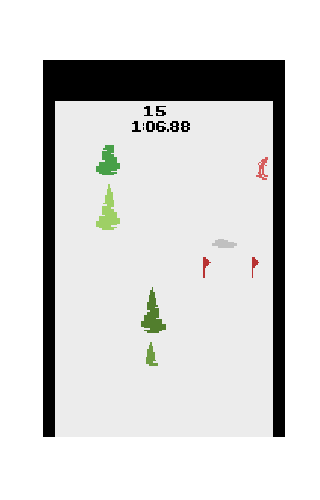
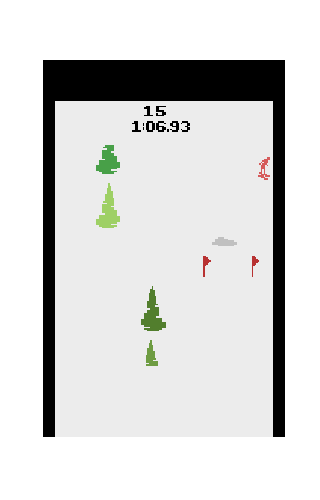
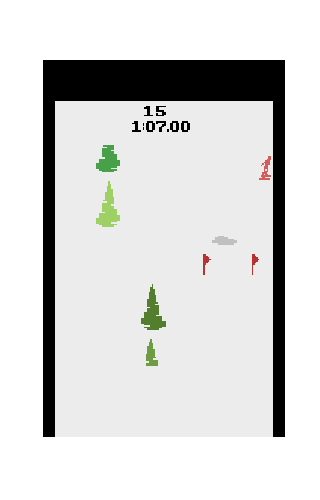
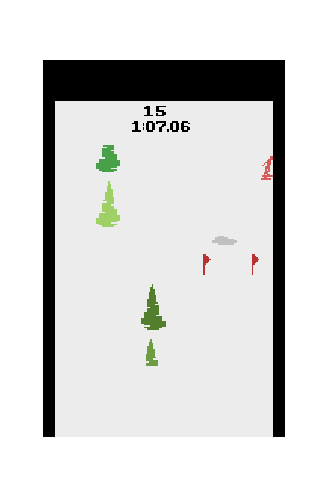
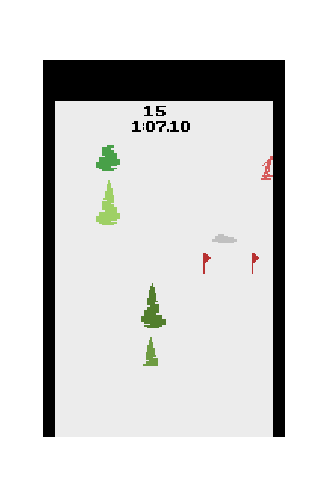
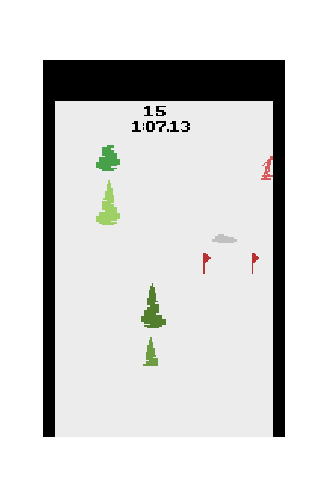
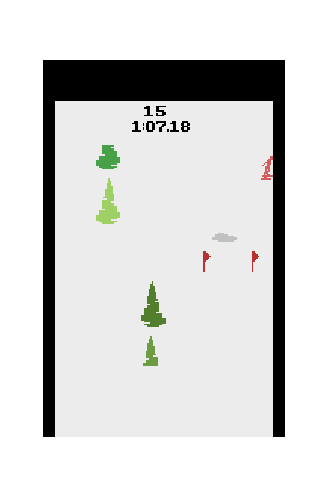
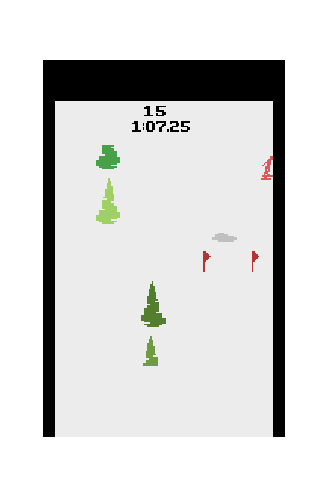
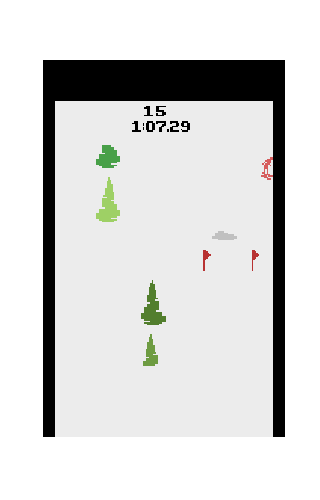
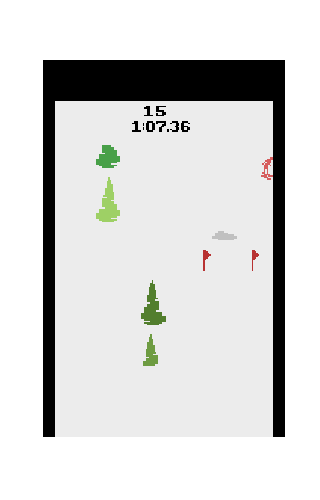
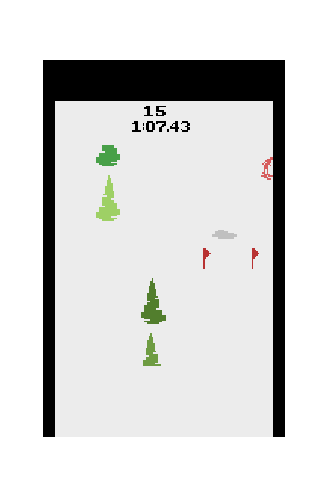
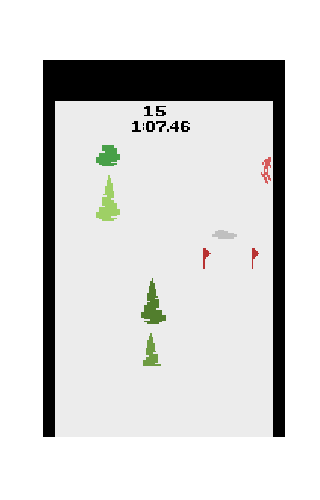
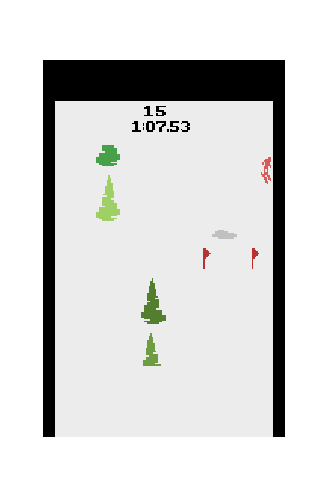
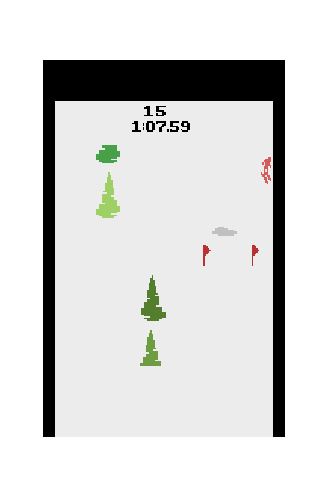
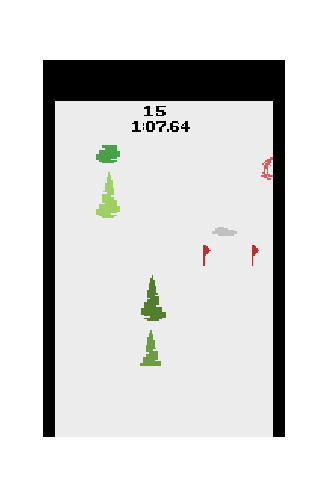
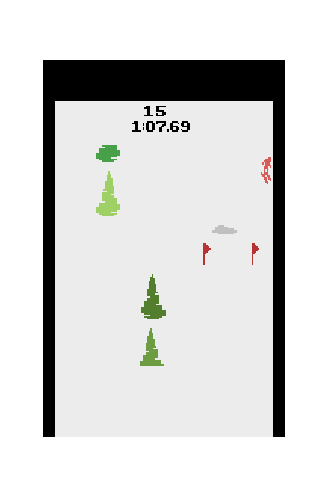
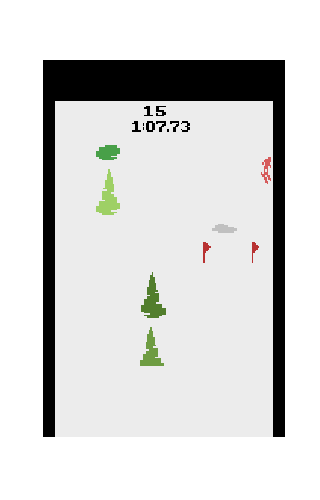
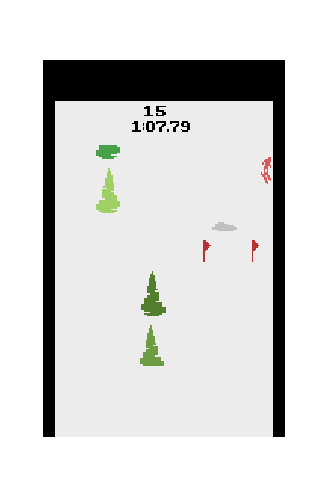
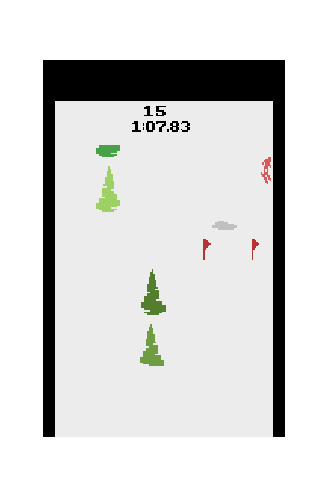
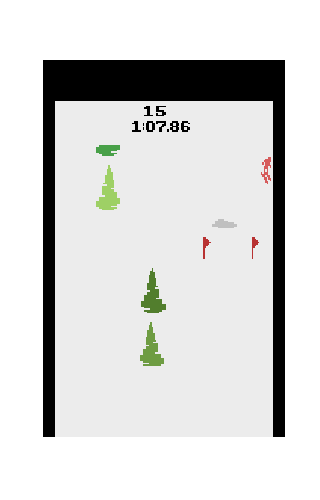
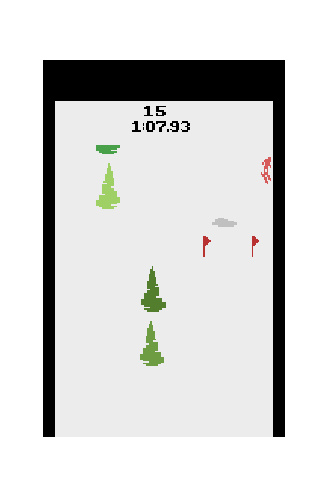
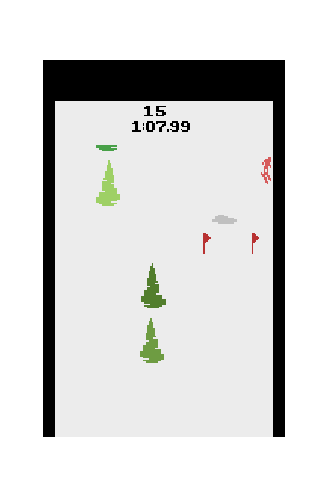
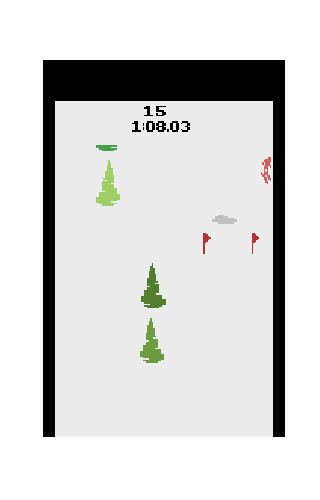
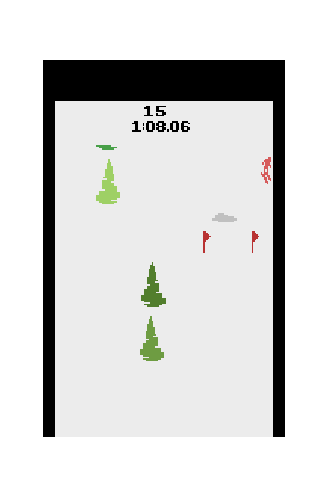
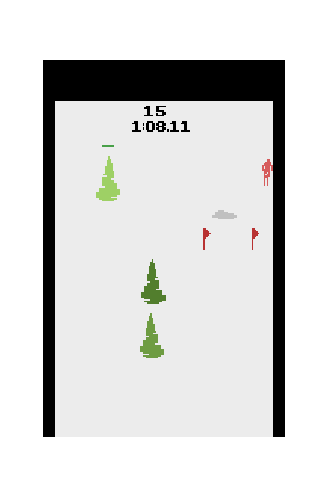
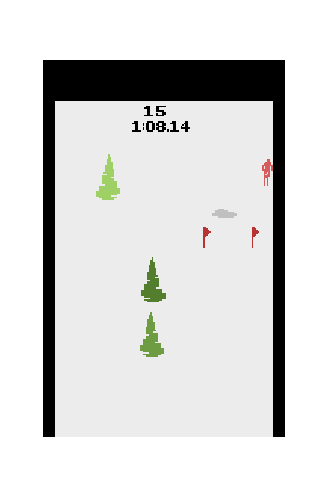
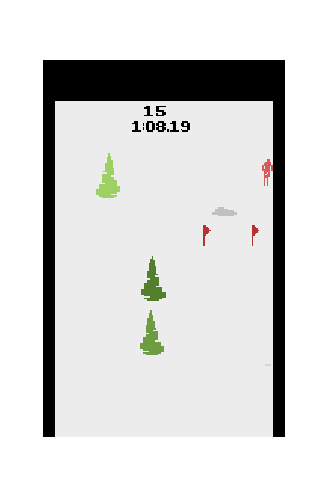
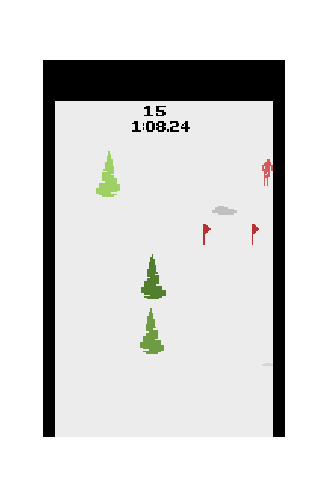
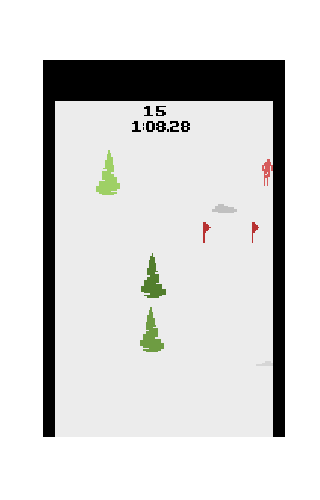
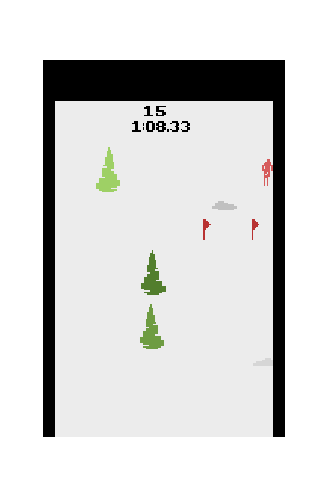
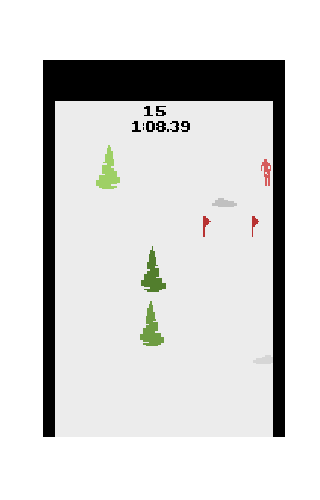
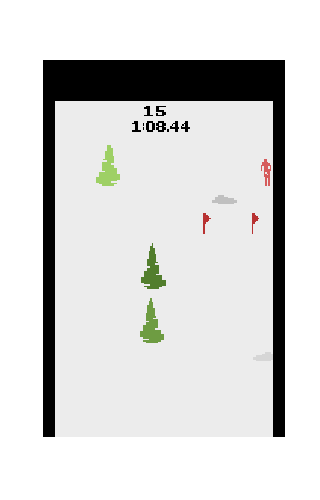
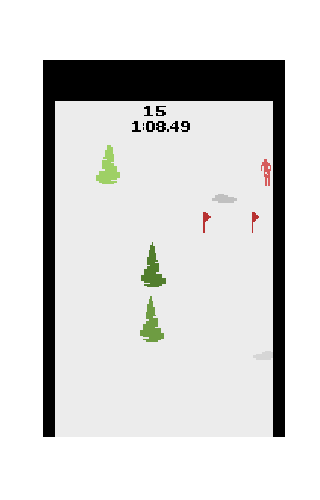
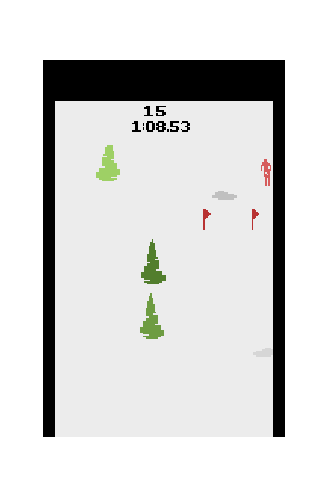
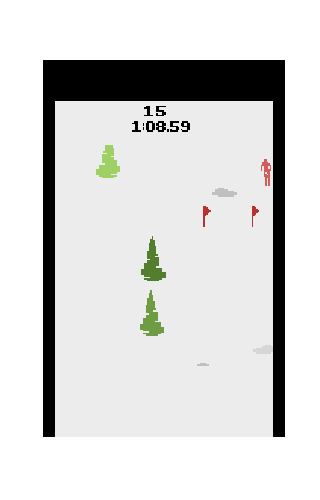
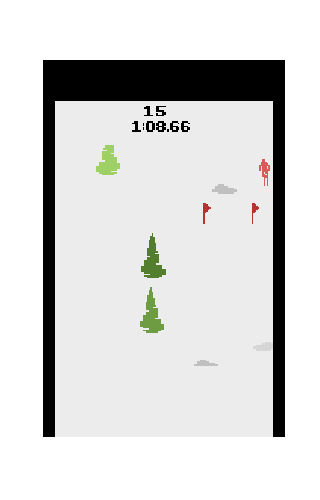
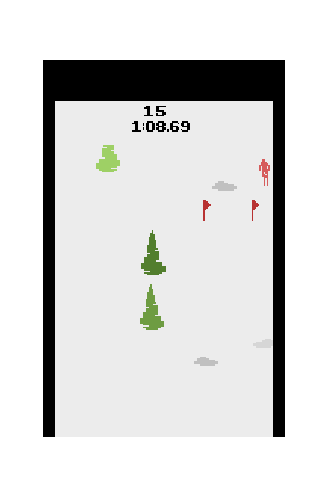
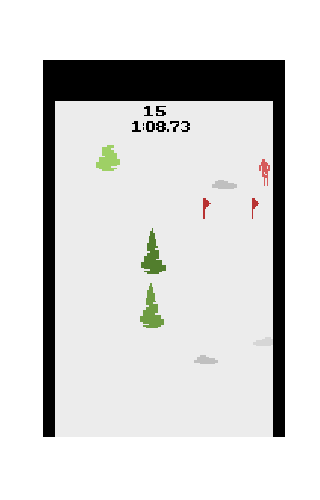
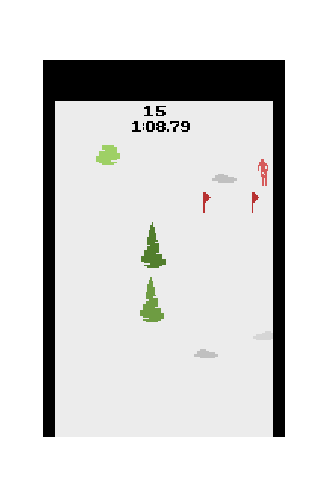
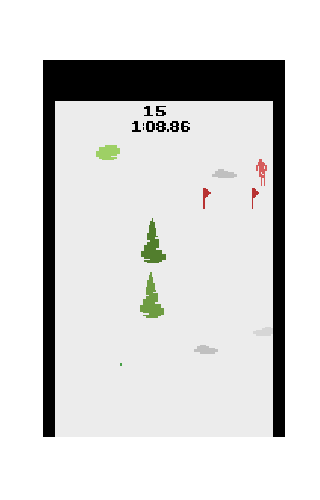
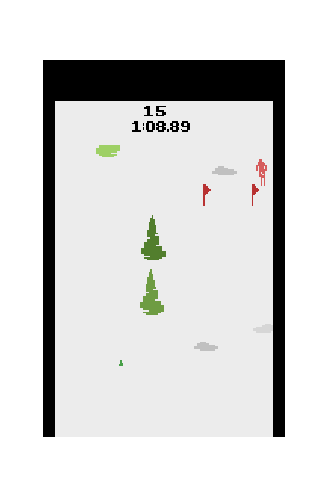
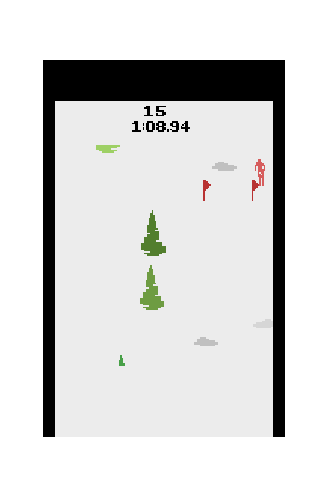
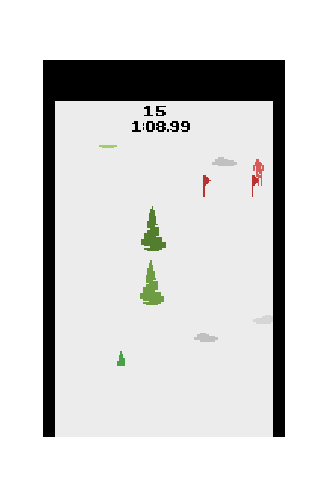
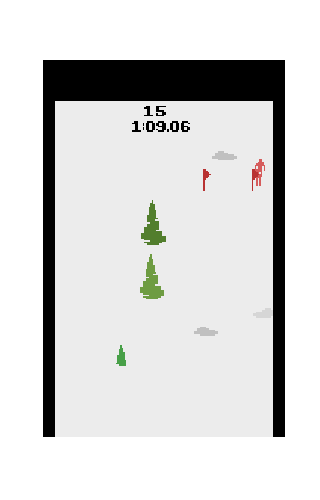
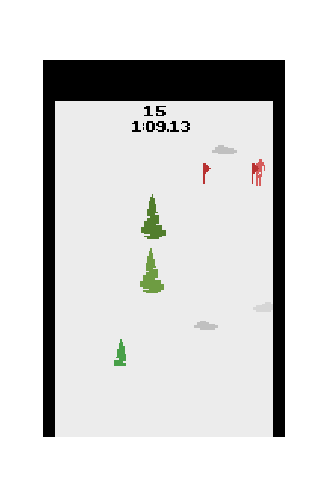
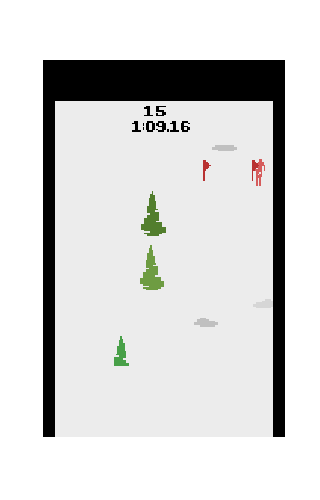
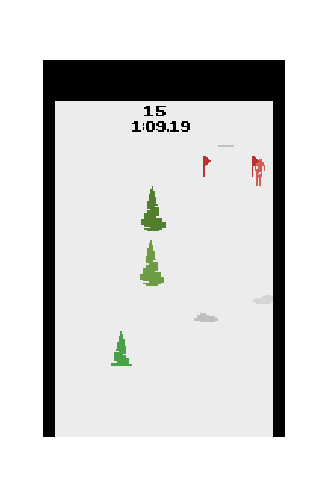
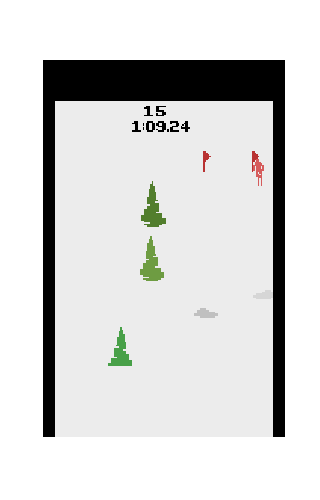
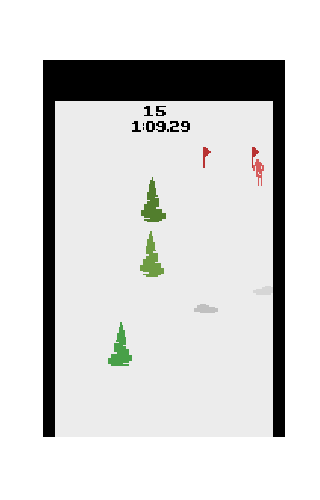
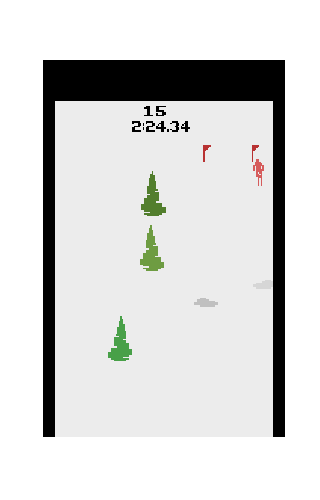

In [8]:
display_frames_as_gif(history_load[0][1])

# Preliminary analysis on rewards / steps

In [20]:
# history = [episode_id, images, states, reward, num_step]
game_outcome = pd.DataFrame(history_load[:, [0, 3, 4]], columns = ['episode_id', 'reward', 'num_steps'])
game_outcome

episode_id reward num_steps
0          0  -7503      1391
1          1  -7500      1981
2          2  -7503      1551
3          3  -9002      1993
4          4  -9002      1342
5          5  -8002      1693
6          6  -8002      1301
7          7  -9501      1672
8          8  -7502      1387
9          9  -9502      1971

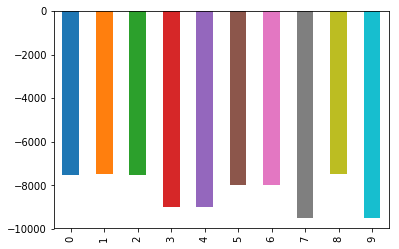

In [24]:
game_outcome['reward'].plot(kind='bar')

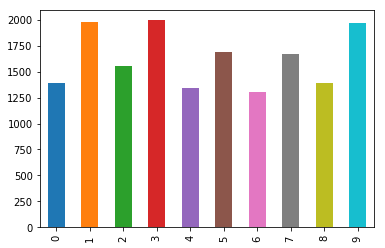

In [23]:
game_outcome['num_steps'].plot(kind='bar')

In [26]:
game_outcome.mean()

episode_id       4.5
reward       -8301.9
num_steps     1628.2
dtype: float64